## Рассмотрим основные 2 таблицы 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn import preprocessing

import csv
import random

### Таблица проектов

In [2]:
projects = pd.read_csv('data/projects.tsv', sep='\t')
projects.head()

project_creation_timestamp  project_has_audio  project_has_button  \
0                  1428398401                  0                   1   
1                  1436341103                  0                   0   
2                  1437037937                  0                   0   
3                  1439365405                  0                   0   
4                  1439968554                  0                   1   

   project_has_buttonClicked_input  project_has_checkbox_input  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   project_has_externalHtml  project_has_fileAudio_input  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   project_has_fileImg_input  project_has_fileVideo_input  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   project_has_file_input  ...  project_has_suggest_input  \
0                       0  ...                          0   
1                       0  ...                          0   
2                       0  ...                          0   
3                       0  ...                          0   
4                       0  ...                          0   

   project_has_textarea_input  project_has_video  project_id  \
0                           0                  0           1   
1                           0                  0           2   
2                           0                  0           3   
3                           0                  0           4   
4                           0                  0           5   

   project_instruction_FK  project_instruction_language  \
0               20.068254                            ru   
1               31.446345                            ru   
2              -43.736713                            ru   
3               16.488188                            ru   
4               17.768214                            ru   

   project_instruction_len  project_instruction_wordCount  \
0                   3208.0                          319.0   
1                   3289.0                          312.0   
2                   6288.0                          637.0   
3                   4369.0                          460.0   
4                  38650.0                         3565.0   

   project_required_fields  project_spec_length  
0                        1                 1196  
1                        1                 1663  
2                        1                 2483  
3                        1                  635  
4                        1                 9527  

[5 rows x 28 columns]

In [3]:
# заменим NaN-значения на 0
projects = projects.fillna(0)

### Таблица деятельности пользователей

In [4]:
assignments = pd.read_csv('data/assignments.tsv', sep='\t')
assignments.head()

assignment_gs_correct_count  assignment_gs_count  \
0                           13                   15   
1                           13                   15   
2                            9                   15   
3                            9                   15   
4                           14                   15   

                          assignment_id  assignment_price  \
0  fe52c68a-48ec-4837-a24c-4c2bd191431f               0.0   
1  d19953f6-1f53-4b54-8fa4-d7374ca0607b               0.0   
2  3aea0026-faae-4845-8708-9bf323ff8a77               0.0   
3  74144001-ee63-46ac-90a3-0ff697bd67b8               0.0   
4  786b6812-d50b-43f1-a48e-5ba0c98e5a72               0.0   

   assignment_project_id  assignment_start_time assignment_status  \
0                     14             1538145644          APPROVED   
1                     14             1538150924          APPROVED   
2                     14             1538148115          APPROVED   
3                     14             1538152210          APPROVED   
4                     14             1538144628          APPROVED   

   assignment_submit_time assignment_type    device_category  \
0              1538145992           train  PERSONAL_COMPUTER   
1              1538151375           train         SMARTPHONE   
2              1538148369           train  PERSONAL_COMPUTER   
3              1538152579           train  PERSONAL_COMPUTER   
4              1538144869           train  PERSONAL_COMPUTER   

   microtasks_count os_family                           user_id  
0                15   WINDOWS  285e5c5ae20b40309aaea1057a40c6e1  
1                15   ANDROID  83ce7022b6504a979e4ad376162b3652  
2                15   WINDOWS  49c203950e65419eb472ef7b527db377  
3                15   WINDOWS  e4106d0f26df48238b1fa7adfb14e61d  
4                15   WINDOWS  d1b97ba55c3f477ebae683faa956de14

In [5]:
len(assignments['user_id']), len(assignments['user_id'].unique()) # общее число записей, число уникальных пользователей

(18517325, 161377)

### Создадим список уникальных пользователей

In [6]:
unique_user_id = assignments['user_id'].unique() # список ID уникальных пользователей
len(unique_user_id)

161377

### На основе таблицы projects построим бинарную таблицу (наличие или отсутствие признака + One Hot Encoding)

In [7]:
projects_bin = projects.copy() # просто копируем таблицу
id_of_project = projects_bin['project_id'] # запоминаем значения данного столбца, чтобы потом поставить его в конец (для удобства)
projects_bin.drop(['project_creation_timestamp', 'project_id'], axis=1, inplace=True) # удаляем столбцы
projects_bin['project_id'] = id_of_project # ставим столбец с id проектов в конец
projects_bin.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   1                                0   
1                  0                   0                                0   
2                  0                   0                                0   
3                  0                   0                                0   
4                  0                   1                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   0   
1                            0                       0                   0   
2                            0                       0                   0   
3                            0                       0                   0   
4                            0                       0                   0   

   ...  project_has_suggest_input  project_has_textarea_input  \
0  ...                          0                           0   
1  ...                          0                           0   
2  ...                          0                           0   
3  ...                          0                           0   
4  ...                          0                           0   

   project_has_video  project_instruction_FK  project_instruction_language  \
0                  0               20.068254                            ru   
1                  0               31.446345                            ru   
2                  0              -43.736713                            ru   
3                  0               16.488188                            ru   
4                  0               17.768214                            ru   

   project_instruction_len  project_instruction_wordCount  \
0                   3208.0                          319.0   
1                   3289.0                          312.0   
2                   6288.0                          637.0   
3                   4369.0                          460.0   
4                  38650.0                         3565.0   

   project_required_fields  project_spec_length  project_id  
0                        1                 1196           1  
1                        1                 1663           2  
2                        1                 2483           3  
3                        1                  635           4  
4                        1                 9527           5  

[5 rows x 27 columns]

In [8]:
# преобразуем все признаки в бинарный вид
for i in projects_bin.iloc[:,:20].columns:
    projects_bin.loc[(projects_bin[i] > 0), i] = 1
projects_bin.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   1                                0   
1                  0                   0                                0   
2                  0                   0                                0   
3                  0                   0                                0   
4                  0                   1                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   0   
1                            0                       0                   0   
2                            0                       0                   0   
3                            0                       0                   0   
4                            0                       0                   0   

   ...  project_has_suggest_input  project_has_textarea_input  \
0  ...                          0                           0   
1  ...                          0                           0   
2  ...                          0                           0   
3  ...                          0                           0   
4  ...                          0                           0   

   project_has_video  project_instruction_FK  project_instruction_language  \
0                  0               20.068254                            ru   
1                  0               31.446345                            ru   
2                  0              -43.736713                            ru   
3                  0               16.488188                            ru   
4                  0               17.768214                            ru   

   project_instruction_len  project_instruction_wordCount  \
0                   3208.0                          319.0   
1                   3289.0                          312.0   
2                   6288.0                          637.0   
3                   4369.0                          460.0   
4                  38650.0                         3565.0   

   project_required_fields  project_spec_length  project_id  
0                        1                 1196           1  
1                        1                 1663           2  
2                        1                 2483           3  
3                        1                  635           4  
4                        1                 9527           5  

[5 rows x 27 columns]

Рассмотрим столбец, связанный с языками, на который написана инструкция

In [9]:
projects_bin['project_instruction_language'].value_counts()

ru    734
0      18
en      5
tr      4
vi      2
uk      2
bg      1
id      1
Name: project_instruction_language, dtype: int64

In [10]:
# работа со столбцом "языки"
projects_bin['project_language_ru'] = projects_bin['project_instruction_language'].replace({'ru' : 1, 'en' : 0, 'tr' : 0, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_bin['project_language_en'] = projects_bin['project_instruction_language'].replace({'ru' : 0, 'en' : 1, 'tr' : 0, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_bin['project_language_tr'] = projects_bin['project_instruction_language'].replace({'ru' : 0, 'en' : 0, 'tr' : 1, 'uk' : 0, 'vi' : 0, 'id' : 0, 'bg' : 0})
projects_bin['project_language_other'] = projects_bin['project_instruction_language'].replace({'ru' : 0, 'en' : 0, 'tr' : 0, 'uk' : 1, 'vi' : 1, 'id' : 1, 'bg' : 1})
projects_bin.drop('project_instruction_language', axis=1, inplace=True)
projects_bin.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   1                                0   
1                  0                   0                                0   
2                  0                   0                                0   
3                  0                   0                                0   
4                  0                   1                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   0   
1                            0                       0                   0   
2                            0                       0                   0   
3                            0                       0                   0   
4                            0                       0                   0   

   ...  project_instruction_FK  project_instruction_len  \
0  ...               20.068254                   3208.0   
1  ...               31.446345                   3289.0   
2  ...              -43.736713                   6288.0   
3  ...               16.488188                   4369.0   
4  ...               17.768214                  38650.0   

   project_instruction_wordCount  project_required_fields  \
0                          319.0                        1   
1                          312.0                        1   
2                          637.0                        1   
3                          460.0                        1   
4                         3565.0                        1   

   project_spec_length  project_id  project_language_ru  project_language_en  \
0                 1196           1                    1                    0   
1                 1663           2                    1                    0   
2                 2483           3                    1                    0   
3                  635           4                    1                    0   
4                 9527           5                    1                    0   

   project_language_tr  project_language_other  
0                    0                       0  
1                    0                       0  
2                    0                       0  
3                    0                       0  
4                    0                       0  

[5 rows x 30 columns]

In [11]:
# разделим на 3 интервала и бинарно закодируем принадлежность каждому интервалу
for i in projects_bin.iloc[:,20:25].columns:
    range_column = projects_bin[i].sort_values().to_numpy() # отсортируем данные по возрастанию
    length = len(range_column) # количество записей в таблице
    
    part1 = range_column[:round(length*0.33)][-1] # граница первого промежутка
    part2 = range_column[:round(length*0.66)][-1] # граница второго промежутка
    
    for j in range(length):
        num = projects_bin[i].iloc[j]
        if num <= part1:
            projects_bin[i].iloc[j] = '1'
        elif num >= part2:
            projects_bin[i].iloc[j] = '3'
        else:
            projects_bin[i].iloc[j] = '2'
projects_bin.head()

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   1                                0   
1                  0                   0                                0   
2                  0                   0                                0   
3                  0                   0                                0   
4                  0                   1                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   0   
1                            0                       0                   0   
2                            0                       0                   0   
3                            0                       0                   0   
4                            0                       0                   0   

   ...  project_instruction_FK  project_instruction_len  \
0  ...                       3                        3   
1  ...                       3                        3   
2  ...                       1                        3   
3  ...                       2                        3   
4  ...                       3                        3   

   project_instruction_wordCount  project_required_fields  \
0                              3                        1   
1                              3                        1   
2                              3                        1   
3                              3                        1   
4                              3                        1   

   project_spec_length  project_id  project_language_ru  project_language_en  \
0                    3           1                    1                    0   
1                    3           2                    1                    0   
2                    3           3                    1                    0   
3                    2           4                    1                    0   
4                    3           5                    1                    0   

   project_language_tr  project_language_other  
0                    0                       0  
1                    0                       0  
2                    0                       0  
3                    0                       0  
4                    0                       0  

[5 rows x 30 columns]

In [12]:
bin_col = pd.get_dummies(projects_bin.iloc[:,20:25], drop_first=True) # теперь столбцы с 1, 2 и 3 преобразуем в бинарные
projects_bin.drop(list(projects_bin.iloc[:,20:25].columns), axis=1, inplace=True) # удаляем предыдущее преобразование по интервалам
projects_bin = pd.concat([projects_bin, bin_col], axis=1)# объединяем начальный df и новый с бинарной кодировкой
projects_bin.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   1                                0   
1                  0                   0                                0   
2                  0                   0                                0   
3                  0                   0                                0   
4                  0                   1                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   0   
1                            0                       0                   0   
2                            0                       0                   0   
3                            0                       0                   0   
4                            0                       0                   0   

   ...  project_language_other  project_instruction_FK_2  \
0  ...                       0                         0   
1  ...                       0                         0   
2  ...                       0                         0   
3  ...                       0                         1   
4  ...                       0                         0   

   project_instruction_FK_3  project_instruction_len_2  \
0                         1                          0   
1                         1                          0   
2                         0                          0   
3                         0                          0   
4                         1                          0   

   project_instruction_len_3  project_instruction_wordCount_2  \
0                          1                                0   
1                          1                                0   
2                          1                                0   
3                          1                                0   
4                          1                                0   

   project_instruction_wordCount_3  project_required_fields_3  \
0                                1                          0   
1                                1                          0   
2                                1                          0   
3                                1                          0   
4                                1                          0   

   project_spec_length_2  project_spec_length_3  
0                      0                      1  
1                      0                      1  
2                      0                      1  
3                      1                      0  
4                      0                      1  

[5 rows x 34 columns]

In [13]:
# преобразуем все столбцы в тип int
for i in projects_bin.columns:
    projects_bin = projects_bin.astype({i: np.int64})

## Работа с данными

In [14]:
user = unique_user_id[2]

1.	Выведем все проекты, которые выполнял выбранный пользователь из бинарной таблицы. Просуммируем каждый столбец. Таким образом можно будет определить, например, какова доля аудиофайлов в общем объеме проектов. Можно вывести гистограмму по суммарной строке

Выведем для данного пользователя список его проектов

In [15]:
users_projects = list(assignments[assignments['user_id'] == user]['assignment_project_id']) # список id проектов, которые выполнил пользователь

In [16]:
index_list = np.array(users_projects) - 1 # список индексов проектов

In [17]:
users_projects_bin = projects_bin.iloc[list(index_list)] # все выполненные проекты, представленные бинарной таблицей
users_projects_bin.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
13                   0                   0                                0   
59                   0                   0                                0   
52                   0                   0                                0   
40                   0                   1                                0   
302                  0                   0                                0   

     project_has_checkbox_input  project_has_externalHtml  \
13                            0                         0   
59                            0                         0   
52                            0                         0   
40                            0                         0   
302                           0                         0   

     project_has_fileAudio_input  project_has_fileImg_input  \
13                             0                          0   
59                             0                          0   
52                             0                          0   
40                             0                          0   
302                            0                          0   

     project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
13                             0                       0                   0   
59                             0                       0                   0   
52                             0                       0                   0   
40                             0                       0                   0   
302                            0                       0                   0   

     ...  project_language_other  project_instruction_FK_2  \
13   ...                       0                         0   
59   ...                       0                         0   
52   ...                       0                         1   
40   ...                       0                         1   
302  ...                       0                         0   

     project_instruction_FK_3  project_instruction_len_2  \
13                          1                          0   
59                          1                          1   
52                          0                          1   
40                          0                          1   
302                         0                          0   

     project_instruction_len_3  project_instruction_wordCount_2  \
13                           1                                0   
59                           0                                1   
52                           0                                1   
40                           0                                1   
302                          1                                0   

     project_instruction_wordCount_3  project_required_fields_3  \
13                                 1                          0   
59                                 0                          0   
52                                 0                          1   
40                                 0                          0   
302                                1                          0   

     project_spec_length_2  project_spec_length_3  
13                       1                      0  
59                       1                      0  
52                       1                      0  
40                       1                      0  
302                      0                      1  

[5 rows x 34 columns]

In [19]:
# просуммируем каждый столбец
sm = []
for i in users_projects_bin.columns:
    sm.append(sum(users_projects_bin[i]))
    
summ_df = pd.DataFrame(data = [sm], columns = list(users_projects_bin.columns))
summ_df

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   5                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           2                         0   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   2   

   ...  project_language_other  project_instruction_FK_2  \
0  ...                       0                        81   

   project_instruction_FK_3  project_instruction_len_2  \
0                        15                         21   

   project_instruction_len_3  project_instruction_wordCount_2  \
0                         81                               22   

   project_instruction_wordCount_3  project_required_fields_3  \
0                               81                          4   

   project_spec_length_2  project_spec_length_3  
0                     94                     10  

[1 rows x 34 columns]

In [20]:
summ_df.drop('project_id', axis=1, inplace=True) # удаляем столбец с Id проектов

In [21]:
# выделим ненулевые значения
val = list((summ_df.values)[0])
names = summ_df.columns
x = []
y = []
for i in range(len(val)):
    if val[i] != 0:
        y.append(val[i])
        x.append(names[i])

Гистограмма по полученным данным для выбранного пользователя

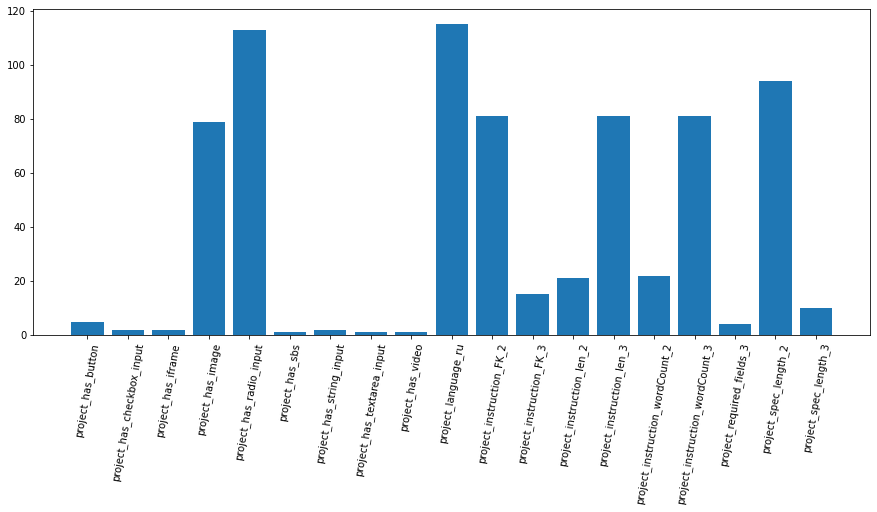

In [22]:
fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(15)  
fig.set_figheight(6) 

plt.xticks(rotation = 80)

plt.show()

2.	Можно проделать это для каждого пользователя и узнать общую тенденцию в выборе заданий. Возможно есть некий универсальный набор признаков, который устраивает большинство пользователей.

### Проделаем аналогичные действия для каждого пользователя

In [66]:
# объединим предыдущие этапы в одну функцию
def bin_sum(user, assignments, projects_bin):
    users_projects = list(assignments[assignments['user_id'] == user]['assignment_project_id']) # список id проектов, которые выполнил пользователь
    index_list = np.array(users_projects) - 1 # список индексов проектов
    users_projects_bin = projects_bin.iloc[list(index_list)] # все выполненные проекты, представленные бинарной таблицей
    # просуммируем каждый столбец
    sm = []
    for i in users_projects_bin.columns:
        sm.append(sum(users_projects_bin[i]))
    return sm

In [69]:
res = []
j = 0
l = len(unique_user_id)
for i in unique_user_id:
    res.append(bin_sum(i, assignments, projects_bin))
    print(j, ' из ', l)
    j += 1

0  из  161377
1  из  161377
2  из  161377
3  из  161377
4  из  161377
5  из  161377
6  из  161377
7  из  161377
8  из  161377
9  из  161377
10  из  161377
11  из  161377
12  из  161377
13  из  161377
14  из  161377
15  из  161377
16  из  161377
17  из  161377
18  из  161377
19  из  161377
20  из  161377
21  из  161377
22  из  161377
23  из  161377
24  из  161377
25  из  161377
26  из  161377
27  из  161377
28  из  161377
29  из  161377
30  из  161377
31  из  161377
32  из  161377
33  из  161377
34  из  161377
35  из  161377
36  из  161377
37  из  161377
38  из  161377
39  из  161377
40  из  161377
41  из  161377
42  из  161377
43  из  161377
44  из  161377
45  из  161377
46  из  161377
47  из  161377
48  из  161377
49  из  161377
50  из  161377
51  из  161377
52  из  161377
53  из  161377
54  из  161377
55  из  161377
56  из  161377
57  из  161377
58  из  161377
59  из  161377
60  из  161377
61  из  161377
62  из  161377
63  из  161377
64  из  161377
65  из  161377
66  из  161377
67  и

519  из  161377
520  из  161377
521  из  161377
522  из  161377
523  из  161377
524  из  161377
525  из  161377
526  из  161377
527  из  161377
528  из  161377
529  из  161377
530  из  161377
531  из  161377
532  из  161377
533  из  161377
534  из  161377
535  из  161377
536  из  161377
537  из  161377
538  из  161377
539  из  161377
540  из  161377
541  из  161377
542  из  161377
543  из  161377
544  из  161377
545  из  161377
546  из  161377
547  из  161377
548  из  161377
549  из  161377
550  из  161377
551  из  161377
552  из  161377
553  из  161377
554  из  161377
555  из  161377
556  из  161377
557  из  161377
558  из  161377
559  из  161377
560  из  161377
561  из  161377
562  из  161377
563  из  161377
564  из  161377
565  из  161377
566  из  161377
567  из  161377
568  из  161377
569  из  161377
570  из  161377
571  из  161377
572  из  161377
573  из  161377
574  из  161377
575  из  161377
576  из  161377
577  из  161377
578  из  161377
579  из  161377
580  из  161377
581  из 

1030  из  161377
1031  из  161377
1032  из  161377
1033  из  161377
1034  из  161377
1035  из  161377
1036  из  161377
1037  из  161377
1038  из  161377
1039  из  161377
1040  из  161377
1041  из  161377
1042  из  161377
1043  из  161377
1044  из  161377
1045  из  161377
1046  из  161377
1047  из  161377
1048  из  161377
1049  из  161377
1050  из  161377
1051  из  161377
1052  из  161377
1053  из  161377
1054  из  161377
1055  из  161377
1056  из  161377
1057  из  161377
1058  из  161377
1059  из  161377
1060  из  161377
1061  из  161377
1062  из  161377
1063  из  161377
1064  из  161377
1065  из  161377
1066  из  161377
1067  из  161377
1068  из  161377
1069  из  161377
1070  из  161377
1071  из  161377
1072  из  161377
1073  из  161377
1074  из  161377
1075  из  161377
1076  из  161377
1077  из  161377
1078  из  161377
1079  из  161377
1080  из  161377
1081  из  161377
1082  из  161377
1083  из  161377
1084  из  161377
1085  из  161377
1086  из  161377
1087  из  161377
1088  из  1613

1512  из  161377
1513  из  161377
1514  из  161377
1515  из  161377
1516  из  161377
1517  из  161377
1518  из  161377
1519  из  161377
1520  из  161377
1521  из  161377
1522  из  161377
1523  из  161377
1524  из  161377
1525  из  161377
1526  из  161377
1527  из  161377
1528  из  161377
1529  из  161377
1530  из  161377
1531  из  161377
1532  из  161377
1533  из  161377
1534  из  161377
1535  из  161377
1536  из  161377
1537  из  161377
1538  из  161377
1539  из  161377
1540  из  161377
1541  из  161377
1542  из  161377
1543  из  161377
1544  из  161377
1545  из  161377
1546  из  161377
1547  из  161377
1548  из  161377
1549  из  161377
1550  из  161377
1551  из  161377
1552  из  161377
1553  из  161377
1554  из  161377
1555  из  161377
1556  из  161377
1557  из  161377
1558  из  161377
1559  из  161377
1560  из  161377
1561  из  161377
1562  из  161377
1563  из  161377
1564  из  161377
1565  из  161377
1566  из  161377
1567  из  161377
1568  из  161377
1569  из  161377
1570  из  1613

1994  из  161377
1995  из  161377
1996  из  161377
1997  из  161377
1998  из  161377
1999  из  161377
2000  из  161377
2001  из  161377
2002  из  161377
2003  из  161377
2004  из  161377
2005  из  161377
2006  из  161377
2007  из  161377
2008  из  161377
2009  из  161377
2010  из  161377
2011  из  161377
2012  из  161377
2013  из  161377
2014  из  161377
2015  из  161377
2016  из  161377
2017  из  161377
2018  из  161377
2019  из  161377
2020  из  161377
2021  из  161377
2022  из  161377
2023  из  161377
2024  из  161377
2025  из  161377
2026  из  161377
2027  из  161377
2028  из  161377
2029  из  161377
2030  из  161377
2031  из  161377
2032  из  161377
2033  из  161377
2034  из  161377
2035  из  161377
2036  из  161377
2037  из  161377
2038  из  161377
2039  из  161377
2040  из  161377
2041  из  161377
2042  из  161377
2043  из  161377
2044  из  161377
2045  из  161377
2046  из  161377
2047  из  161377
2048  из  161377
2049  из  161377
2050  из  161377
2051  из  161377
2052  из  1613

2478  из  161377
2479  из  161377
2480  из  161377
2481  из  161377
2482  из  161377
2483  из  161377
2484  из  161377
2485  из  161377
2486  из  161377
2487  из  161377
2488  из  161377
2489  из  161377
2490  из  161377
2491  из  161377
2492  из  161377
2493  из  161377
2494  из  161377
2495  из  161377
2496  из  161377
2497  из  161377
2498  из  161377
2499  из  161377
2500  из  161377
2501  из  161377
2502  из  161377
2503  из  161377
2504  из  161377
2505  из  161377
2506  из  161377
2507  из  161377
2508  из  161377
2509  из  161377
2510  из  161377
2511  из  161377
2512  из  161377
2513  из  161377
2514  из  161377
2515  из  161377
2516  из  161377
2517  из  161377
2518  из  161377
2519  из  161377
2520  из  161377
2521  из  161377
2522  из  161377
2523  из  161377
2524  из  161377
2525  из  161377
2526  из  161377
2527  из  161377
2528  из  161377
2529  из  161377
2530  из  161377
2531  из  161377
2532  из  161377
2533  из  161377
2534  из  161377
2535  из  161377
2536  из  1613

2961  из  161377
2962  из  161377
2963  из  161377
2964  из  161377
2965  из  161377
2966  из  161377
2967  из  161377
2968  из  161377
2969  из  161377
2970  из  161377
2971  из  161377
2972  из  161377
2973  из  161377
2974  из  161377
2975  из  161377
2976  из  161377
2977  из  161377
2978  из  161377
2979  из  161377
2980  из  161377
2981  из  161377
2982  из  161377
2983  из  161377
2984  из  161377
2985  из  161377
2986  из  161377
2987  из  161377
2988  из  161377
2989  из  161377
2990  из  161377
2991  из  161377
2992  из  161377
2993  из  161377
2994  из  161377
2995  из  161377
2996  из  161377
2997  из  161377
2998  из  161377
2999  из  161377
3000  из  161377
3001  из  161377
3002  из  161377
3003  из  161377
3004  из  161377
3005  из  161377
3006  из  161377
3007  из  161377
3008  из  161377
3009  из  161377
3010  из  161377
3011  из  161377
3012  из  161377
3013  из  161377
3014  из  161377
3015  из  161377
3016  из  161377
3017  из  161377
3018  из  161377
3019  из  1613

3443  из  161377
3444  из  161377
3445  из  161377
3446  из  161377
3447  из  161377
3448  из  161377
3449  из  161377
3450  из  161377
3451  из  161377
3452  из  161377
3453  из  161377
3454  из  161377
3455  из  161377
3456  из  161377
3457  из  161377
3458  из  161377
3459  из  161377
3460  из  161377
3461  из  161377
3462  из  161377
3463  из  161377
3464  из  161377
3465  из  161377
3466  из  161377
3467  из  161377
3468  из  161377
3469  из  161377
3470  из  161377
3471  из  161377
3472  из  161377
3473  из  161377
3474  из  161377
3475  из  161377
3476  из  161377
3477  из  161377
3478  из  161377
3479  из  161377
3480  из  161377
3481  из  161377
3482  из  161377
3483  из  161377
3484  из  161377
3485  из  161377
3486  из  161377
3487  из  161377
3488  из  161377
3489  из  161377
3490  из  161377
3491  из  161377
3492  из  161377
3493  из  161377
3494  из  161377
3495  из  161377
3496  из  161377
3497  из  161377
3498  из  161377
3499  из  161377
3500  из  161377
3501  из  1613

3925  из  161377
3926  из  161377
3927  из  161377
3928  из  161377
3929  из  161377
3930  из  161377
3931  из  161377
3932  из  161377
3933  из  161377
3934  из  161377
3935  из  161377
3936  из  161377
3937  из  161377
3938  из  161377
3939  из  161377
3940  из  161377
3941  из  161377
3942  из  161377
3943  из  161377
3944  из  161377
3945  из  161377
3946  из  161377
3947  из  161377
3948  из  161377
3949  из  161377
3950  из  161377
3951  из  161377
3952  из  161377
3953  из  161377
3954  из  161377
3955  из  161377
3956  из  161377
3957  из  161377
3958  из  161377
3959  из  161377
3960  из  161377
3961  из  161377
3962  из  161377
3963  из  161377
3964  из  161377
3965  из  161377
3966  из  161377
3967  из  161377
3968  из  161377
3969  из  161377
3970  из  161377
3971  из  161377
3972  из  161377
3973  из  161377
3974  из  161377
3975  из  161377
3976  из  161377
3977  из  161377
3978  из  161377
3979  из  161377
3980  из  161377
3981  из  161377
3982  из  161377
3983  из  1613

4408  из  161377
4409  из  161377
4410  из  161377
4411  из  161377
4412  из  161377
4413  из  161377
4414  из  161377
4415  из  161377
4416  из  161377
4417  из  161377
4418  из  161377
4419  из  161377
4420  из  161377
4421  из  161377
4422  из  161377
4423  из  161377
4424  из  161377
4425  из  161377
4426  из  161377
4427  из  161377
4428  из  161377
4429  из  161377
4430  из  161377
4431  из  161377
4432  из  161377
4433  из  161377
4434  из  161377
4435  из  161377
4436  из  161377
4437  из  161377
4438  из  161377
4439  из  161377
4440  из  161377
4441  из  161377
4442  из  161377
4443  из  161377
4444  из  161377
4445  из  161377
4446  из  161377
4447  из  161377
4448  из  161377
4449  из  161377
4450  из  161377
4451  из  161377
4452  из  161377
4453  из  161377
4454  из  161377
4455  из  161377
4456  из  161377
4457  из  161377
4458  из  161377
4459  из  161377
4460  из  161377
4461  из  161377
4462  из  161377
4463  из  161377
4464  из  161377
4465  из  161377
4466  из  1613

4892  из  161377
4893  из  161377
4894  из  161377
4895  из  161377
4896  из  161377
4897  из  161377
4898  из  161377
4899  из  161377
4900  из  161377
4901  из  161377
4902  из  161377
4903  из  161377
4904  из  161377
4905  из  161377
4906  из  161377
4907  из  161377
4908  из  161377
4909  из  161377
4910  из  161377
4911  из  161377
4912  из  161377
4913  из  161377
4914  из  161377
4915  из  161377
4916  из  161377
4917  из  161377
4918  из  161377
4919  из  161377
4920  из  161377
4921  из  161377
4922  из  161377
4923  из  161377
4924  из  161377
4925  из  161377
4926  из  161377
4927  из  161377
4928  из  161377
4929  из  161377
4930  из  161377
4931  из  161377
4932  из  161377
4933  из  161377
4934  из  161377
4935  из  161377
4936  из  161377
4937  из  161377
4938  из  161377
4939  из  161377
4940  из  161377
4941  из  161377
4942  из  161377
4943  из  161377
4944  из  161377
4945  из  161377
4946  из  161377
4947  из  161377
4948  из  161377
4949  из  161377
4950  из  1613

5375  из  161377
5376  из  161377
5377  из  161377
5378  из  161377
5379  из  161377
5380  из  161377
5381  из  161377
5382  из  161377
5383  из  161377
5384  из  161377
5385  из  161377
5386  из  161377
5387  из  161377
5388  из  161377
5389  из  161377
5390  из  161377
5391  из  161377
5392  из  161377
5393  из  161377
5394  из  161377
5395  из  161377
5396  из  161377
5397  из  161377
5398  из  161377
5399  из  161377
5400  из  161377
5401  из  161377
5402  из  161377
5403  из  161377
5404  из  161377
5405  из  161377
5406  из  161377
5407  из  161377
5408  из  161377
5409  из  161377
5410  из  161377
5411  из  161377
5412  из  161377
5413  из  161377
5414  из  161377
5415  из  161377
5416  из  161377
5417  из  161377
5418  из  161377
5419  из  161377
5420  из  161377
5421  из  161377
5422  из  161377
5423  из  161377
5424  из  161377
5425  из  161377
5426  из  161377
5427  из  161377
5428  из  161377
5429  из  161377
5430  из  161377
5431  из  161377
5432  из  161377
5433  из  1613

5858  из  161377
5859  из  161377
5860  из  161377
5861  из  161377
5862  из  161377
5863  из  161377
5864  из  161377
5865  из  161377
5866  из  161377
5867  из  161377
5868  из  161377
5869  из  161377
5870  из  161377
5871  из  161377
5872  из  161377
5873  из  161377
5874  из  161377
5875  из  161377
5876  из  161377
5877  из  161377
5878  из  161377
5879  из  161377
5880  из  161377
5881  из  161377
5882  из  161377
5883  из  161377
5884  из  161377
5885  из  161377
5886  из  161377
5887  из  161377
5888  из  161377
5889  из  161377
5890  из  161377
5891  из  161377
5892  из  161377
5893  из  161377
5894  из  161377
5895  из  161377
5896  из  161377
5897  из  161377
5898  из  161377
5899  из  161377
5900  из  161377
5901  из  161377
5902  из  161377
5903  из  161377
5904  из  161377
5905  из  161377
5906  из  161377
5907  из  161377
5908  из  161377
5909  из  161377
5910  из  161377
5911  из  161377
5912  из  161377
5913  из  161377
5914  из  161377
5915  из  161377
5916  из  1613

6341  из  161377
6342  из  161377
6343  из  161377
6344  из  161377
6345  из  161377
6346  из  161377
6347  из  161377
6348  из  161377
6349  из  161377
6350  из  161377
6351  из  161377
6352  из  161377
6353  из  161377
6354  из  161377
6355  из  161377
6356  из  161377
6357  из  161377
6358  из  161377
6359  из  161377
6360  из  161377
6361  из  161377
6362  из  161377
6363  из  161377
6364  из  161377
6365  из  161377
6366  из  161377
6367  из  161377
6368  из  161377
6369  из  161377
6370  из  161377
6371  из  161377
6372  из  161377
6373  из  161377
6374  из  161377
6375  из  161377
6376  из  161377
6377  из  161377
6378  из  161377
6379  из  161377
6380  из  161377
6381  из  161377
6382  из  161377
6383  из  161377
6384  из  161377
6385  из  161377
6386  из  161377
6387  из  161377
6388  из  161377
6389  из  161377
6390  из  161377
6391  из  161377
6392  из  161377
6393  из  161377
6394  из  161377
6395  из  161377
6396  из  161377
6397  из  161377
6398  из  161377
6399  из  1613

6823  из  161377
6824  из  161377
6825  из  161377
6826  из  161377
6827  из  161377
6828  из  161377
6829  из  161377
6830  из  161377
6831  из  161377
6832  из  161377
6833  из  161377
6834  из  161377
6835  из  161377
6836  из  161377
6837  из  161377
6838  из  161377
6839  из  161377
6840  из  161377
6841  из  161377
6842  из  161377
6843  из  161377
6844  из  161377
6845  из  161377
6846  из  161377
6847  из  161377
6848  из  161377
6849  из  161377
6850  из  161377
6851  из  161377
6852  из  161377
6853  из  161377
6854  из  161377
6855  из  161377
6856  из  161377
6857  из  161377
6858  из  161377
6859  из  161377
6860  из  161377
6861  из  161377
6862  из  161377
6863  из  161377
6864  из  161377
6865  из  161377
6866  из  161377
6867  из  161377
6868  из  161377
6869  из  161377
6870  из  161377
6871  из  161377
6872  из  161377
6873  из  161377
6874  из  161377
6875  из  161377
6876  из  161377
6877  из  161377
6878  из  161377
6879  из  161377
6880  из  161377
6881  из  1613

7306  из  161377
7307  из  161377
7308  из  161377
7309  из  161377
7310  из  161377
7311  из  161377
7312  из  161377
7313  из  161377
7314  из  161377
7315  из  161377
7316  из  161377
7317  из  161377
7318  из  161377
7319  из  161377
7320  из  161377
7321  из  161377
7322  из  161377
7323  из  161377
7324  из  161377
7325  из  161377
7326  из  161377
7327  из  161377
7328  из  161377
7329  из  161377
7330  из  161377
7331  из  161377
7332  из  161377
7333  из  161377
7334  из  161377
7335  из  161377
7336  из  161377
7337  из  161377
7338  из  161377
7339  из  161377
7340  из  161377
7341  из  161377
7342  из  161377
7343  из  161377
7344  из  161377
7345  из  161377
7346  из  161377
7347  из  161377
7348  из  161377
7349  из  161377
7350  из  161377
7351  из  161377
7352  из  161377
7353  из  161377
7354  из  161377
7355  из  161377
7356  из  161377
7357  из  161377
7358  из  161377
7359  из  161377
7360  из  161377
7361  из  161377
7362  из  161377
7363  из  161377
7364  из  1613

7788  из  161377
7789  из  161377
7790  из  161377
7791  из  161377
7792  из  161377
7793  из  161377
7794  из  161377
7795  из  161377
7796  из  161377
7797  из  161377
7798  из  161377
7799  из  161377
7800  из  161377
7801  из  161377
7802  из  161377
7803  из  161377
7804  из  161377
7805  из  161377
7806  из  161377
7807  из  161377
7808  из  161377
7809  из  161377
7810  из  161377
7811  из  161377
7812  из  161377
7813  из  161377
7814  из  161377
7815  из  161377
7816  из  161377
7817  из  161377
7818  из  161377
7819  из  161377
7820  из  161377
7821  из  161377
7822  из  161377
7823  из  161377
7824  из  161377
7825  из  161377
7826  из  161377
7827  из  161377
7828  из  161377
7829  из  161377
7830  из  161377
7831  из  161377
7832  из  161377
7833  из  161377
7834  из  161377
7835  из  161377
7836  из  161377
7837  из  161377
7838  из  161377
7839  из  161377
7840  из  161377
7841  из  161377
7842  из  161377
7843  из  161377
7844  из  161377
7845  из  161377
7846  из  1613

8271  из  161377
8272  из  161377
8273  из  161377
8274  из  161377
8275  из  161377
8276  из  161377
8277  из  161377
8278  из  161377
8279  из  161377
8280  из  161377
8281  из  161377
8282  из  161377
8283  из  161377
8284  из  161377
8285  из  161377
8286  из  161377
8287  из  161377
8288  из  161377
8289  из  161377
8290  из  161377
8291  из  161377
8292  из  161377
8293  из  161377
8294  из  161377
8295  из  161377
8296  из  161377
8297  из  161377
8298  из  161377
8299  из  161377
8300  из  161377
8301  из  161377
8302  из  161377
8303  из  161377
8304  из  161377
8305  из  161377
8306  из  161377
8307  из  161377
8308  из  161377
8309  из  161377
8310  из  161377
8311  из  161377
8312  из  161377
8313  из  161377
8314  из  161377
8315  из  161377
8316  из  161377
8317  из  161377
8318  из  161377
8319  из  161377
8320  из  161377
8321  из  161377
8322  из  161377
8323  из  161377
8324  из  161377
8325  из  161377
8326  из  161377
8327  из  161377
8328  из  161377
8329  из  1613

8754  из  161377
8755  из  161377
8756  из  161377
8757  из  161377
8758  из  161377
8759  из  161377
8760  из  161377
8761  из  161377
8762  из  161377
8763  из  161377
8764  из  161377
8765  из  161377
8766  из  161377
8767  из  161377
8768  из  161377
8769  из  161377
8770  из  161377
8771  из  161377
8772  из  161377
8773  из  161377
8774  из  161377
8775  из  161377
8776  из  161377
8777  из  161377
8778  из  161377
8779  из  161377
8780  из  161377
8781  из  161377
8782  из  161377
8783  из  161377
8784  из  161377
8785  из  161377
8786  из  161377
8787  из  161377
8788  из  161377
8789  из  161377
8790  из  161377
8791  из  161377
8792  из  161377
8793  из  161377
8794  из  161377
8795  из  161377
8796  из  161377
8797  из  161377
8798  из  161377
8799  из  161377
8800  из  161377
8801  из  161377
8802  из  161377
8803  из  161377
8804  из  161377
8805  из  161377
8806  из  161377
8807  из  161377
8808  из  161377
8809  из  161377
8810  из  161377
8811  из  161377
8812  из  1613

9236  из  161377
9237  из  161377
9238  из  161377
9239  из  161377
9240  из  161377
9241  из  161377
9242  из  161377
9243  из  161377
9244  из  161377
9245  из  161377
9246  из  161377
9247  из  161377
9248  из  161377
9249  из  161377
9250  из  161377
9251  из  161377
9252  из  161377
9253  из  161377
9254  из  161377
9255  из  161377
9256  из  161377
9257  из  161377
9258  из  161377
9259  из  161377
9260  из  161377
9261  из  161377
9262  из  161377
9263  из  161377
9264  из  161377
9265  из  161377
9266  из  161377
9267  из  161377
9268  из  161377
9269  из  161377
9270  из  161377
9271  из  161377
9272  из  161377
9273  из  161377
9274  из  161377
9275  из  161377
9276  из  161377
9277  из  161377
9278  из  161377
9279  из  161377
9280  из  161377
9281  из  161377
9282  из  161377
9283  из  161377
9284  из  161377
9285  из  161377
9286  из  161377
9287  из  161377
9288  из  161377
9289  из  161377
9290  из  161377
9291  из  161377
9292  из  161377
9293  из  161377
9294  из  1613

9720  из  161377
9721  из  161377
9722  из  161377
9723  из  161377
9724  из  161377
9725  из  161377
9726  из  161377
9727  из  161377
9728  из  161377
9729  из  161377
9730  из  161377
9731  из  161377
9732  из  161377
9733  из  161377
9734  из  161377
9735  из  161377
9736  из  161377
9737  из  161377
9738  из  161377
9739  из  161377
9740  из  161377
9741  из  161377
9742  из  161377
9743  из  161377
9744  из  161377
9745  из  161377
9746  из  161377
9747  из  161377
9748  из  161377
9749  из  161377
9750  из  161377
9751  из  161377
9752  из  161377
9753  из  161377
9754  из  161377
9755  из  161377
9756  из  161377
9757  из  161377
9758  из  161377
9759  из  161377
9760  из  161377
9761  из  161377
9762  из  161377
9763  из  161377
9764  из  161377
9765  из  161377
9766  из  161377
9767  из  161377
9768  из  161377
9769  из  161377
9770  из  161377
9771  из  161377
9772  из  161377
9773  из  161377
9774  из  161377
9775  из  161377
9776  из  161377
9777  из  161377
9778  из  1613

10193  из  161377
10194  из  161377
10195  из  161377
10196  из  161377
10197  из  161377
10198  из  161377
10199  из  161377
10200  из  161377
10201  из  161377
10202  из  161377
10203  из  161377
10204  из  161377
10205  из  161377
10206  из  161377
10207  из  161377
10208  из  161377
10209  из  161377
10210  из  161377
10211  из  161377
10212  из  161377
10213  из  161377
10214  из  161377
10215  из  161377
10216  из  161377
10217  из  161377
10218  из  161377
10219  из  161377
10220  из  161377
10221  из  161377
10222  из  161377
10223  из  161377
10224  из  161377
10225  из  161377
10226  из  161377
10227  из  161377
10228  из  161377
10229  из  161377
10230  из  161377
10231  из  161377
10232  из  161377
10233  из  161377
10234  из  161377
10235  из  161377
10236  из  161377
10237  из  161377
10238  из  161377
10239  из  161377
10240  из  161377
10241  из  161377
10242  из  161377
10243  из  161377
10244  из  161377
10245  из  161377
10246  из  161377
10247  из  161377
10248  из 

10649  из  161377
10650  из  161377
10651  из  161377
10652  из  161377
10653  из  161377
10654  из  161377
10655  из  161377
10656  из  161377
10657  из  161377
10658  из  161377
10659  из  161377
10660  из  161377
10661  из  161377
10662  из  161377
10663  из  161377
10664  из  161377
10665  из  161377
10666  из  161377
10667  из  161377
10668  из  161377
10669  из  161377
10670  из  161377
10671  из  161377
10672  из  161377
10673  из  161377
10674  из  161377
10675  из  161377
10676  из  161377
10677  из  161377
10678  из  161377
10679  из  161377
10680  из  161377
10681  из  161377
10682  из  161377
10683  из  161377
10684  из  161377
10685  из  161377
10686  из  161377
10687  из  161377
10688  из  161377
10689  из  161377
10690  из  161377
10691  из  161377
10692  из  161377
10693  из  161377
10694  из  161377
10695  из  161377
10696  из  161377
10697  из  161377
10698  из  161377
10699  из  161377
10700  из  161377
10701  из  161377
10702  из  161377
10703  из  161377
10704  из 

11106  из  161377
11107  из  161377
11108  из  161377
11109  из  161377
11110  из  161377
11111  из  161377
11112  из  161377
11113  из  161377
11114  из  161377
11115  из  161377
11116  из  161377
11117  из  161377
11118  из  161377
11119  из  161377
11120  из  161377
11121  из  161377
11122  из  161377
11123  из  161377
11124  из  161377
11125  из  161377
11126  из  161377
11127  из  161377
11128  из  161377
11129  из  161377
11130  из  161377
11131  из  161377
11132  из  161377
11133  из  161377
11134  из  161377
11135  из  161377
11136  из  161377
11137  из  161377
11138  из  161377
11139  из  161377
11140  из  161377
11141  из  161377
11142  из  161377
11143  из  161377
11144  из  161377
11145  из  161377
11146  из  161377
11147  из  161377
11148  из  161377
11149  из  161377
11150  из  161377
11151  из  161377
11152  из  161377
11153  из  161377
11154  из  161377
11155  из  161377
11156  из  161377
11157  из  161377
11158  из  161377
11159  из  161377
11160  из  161377
11161  из 

11563  из  161377
11564  из  161377
11565  из  161377
11566  из  161377
11567  из  161377
11568  из  161377
11569  из  161377
11570  из  161377
11571  из  161377
11572  из  161377
11573  из  161377
11574  из  161377
11575  из  161377
11576  из  161377
11577  из  161377
11578  из  161377
11579  из  161377
11580  из  161377
11581  из  161377
11582  из  161377
11583  из  161377
11584  из  161377
11585  из  161377
11586  из  161377
11587  из  161377
11588  из  161377
11589  из  161377
11590  из  161377
11591  из  161377
11592  из  161377
11593  из  161377
11594  из  161377
11595  из  161377
11596  из  161377
11597  из  161377
11598  из  161377
11599  из  161377
11600  из  161377
11601  из  161377
11602  из  161377
11603  из  161377
11604  из  161377
11605  из  161377
11606  из  161377
11607  из  161377
11608  из  161377
11609  из  161377
11610  из  161377
11611  из  161377
11612  из  161377
11613  из  161377
11614  из  161377
11615  из  161377
11616  из  161377
11617  из  161377
11618  из 

12019  из  161377
12020  из  161377
12021  из  161377
12022  из  161377
12023  из  161377
12024  из  161377
12025  из  161377
12026  из  161377
12027  из  161377
12028  из  161377
12029  из  161377
12030  из  161377
12031  из  161377
12032  из  161377
12033  из  161377
12034  из  161377
12035  из  161377
12036  из  161377
12037  из  161377
12038  из  161377
12039  из  161377
12040  из  161377
12041  из  161377
12042  из  161377
12043  из  161377
12044  из  161377
12045  из  161377
12046  из  161377
12047  из  161377
12048  из  161377
12049  из  161377
12050  из  161377
12051  из  161377
12052  из  161377
12053  из  161377
12054  из  161377
12055  из  161377
12056  из  161377
12057  из  161377
12058  из  161377
12059  из  161377
12060  из  161377
12061  из  161377
12062  из  161377
12063  из  161377
12064  из  161377
12065  из  161377
12066  из  161377
12067  из  161377
12068  из  161377
12069  из  161377
12070  из  161377
12071  из  161377
12072  из  161377
12073  из  161377
12074  из 

12475  из  161377
12476  из  161377
12477  из  161377
12478  из  161377
12479  из  161377
12480  из  161377
12481  из  161377
12482  из  161377
12483  из  161377
12484  из  161377
12485  из  161377
12486  из  161377
12487  из  161377
12488  из  161377
12489  из  161377
12490  из  161377
12491  из  161377
12492  из  161377
12493  из  161377
12494  из  161377
12495  из  161377
12496  из  161377
12497  из  161377
12498  из  161377
12499  из  161377
12500  из  161377
12501  из  161377
12502  из  161377
12503  из  161377
12504  из  161377
12505  из  161377
12506  из  161377
12507  из  161377
12508  из  161377
12509  из  161377
12510  из  161377
12511  из  161377
12512  из  161377
12513  из  161377
12514  из  161377
12515  из  161377
12516  из  161377
12517  из  161377
12518  из  161377
12519  из  161377
12520  из  161377
12521  из  161377
12522  из  161377
12523  из  161377
12524  из  161377
12525  из  161377
12526  из  161377
12527  из  161377
12528  из  161377
12529  из  161377
12530  из 

12932  из  161377
12933  из  161377
12934  из  161377
12935  из  161377
12936  из  161377
12937  из  161377
12938  из  161377
12939  из  161377
12940  из  161377
12941  из  161377
12942  из  161377
12943  из  161377
12944  из  161377
12945  из  161377
12946  из  161377
12947  из  161377
12948  из  161377
12949  из  161377
12950  из  161377
12951  из  161377
12952  из  161377
12953  из  161377
12954  из  161377
12955  из  161377
12956  из  161377
12957  из  161377
12958  из  161377
12959  из  161377
12960  из  161377
12961  из  161377
12962  из  161377
12963  из  161377
12964  из  161377
12965  из  161377
12966  из  161377
12967  из  161377
12968  из  161377
12969  из  161377
12970  из  161377
12971  из  161377
12972  из  161377
12973  из  161377
12974  из  161377
12975  из  161377
12976  из  161377
12977  из  161377
12978  из  161377
12979  из  161377
12980  из  161377
12981  из  161377
12982  из  161377
12983  из  161377
12984  из  161377
12985  из  161377
12986  из  161377
12987  из 

13388  из  161377
13389  из  161377
13390  из  161377
13391  из  161377
13392  из  161377
13393  из  161377
13394  из  161377
13395  из  161377
13396  из  161377
13397  из  161377
13398  из  161377
13399  из  161377
13400  из  161377
13401  из  161377
13402  из  161377
13403  из  161377
13404  из  161377
13405  из  161377
13406  из  161377
13407  из  161377
13408  из  161377
13409  из  161377
13410  из  161377
13411  из  161377
13412  из  161377
13413  из  161377
13414  из  161377
13415  из  161377
13416  из  161377
13417  из  161377
13418  из  161377
13419  из  161377
13420  из  161377
13421  из  161377
13422  из  161377
13423  из  161377
13424  из  161377
13425  из  161377
13426  из  161377
13427  из  161377
13428  из  161377
13429  из  161377
13430  из  161377
13431  из  161377
13432  из  161377
13433  из  161377
13434  из  161377
13435  из  161377
13436  из  161377
13437  из  161377
13438  из  161377
13439  из  161377
13440  из  161377
13441  из  161377
13442  из  161377
13443  из 

13844  из  161377
13845  из  161377
13846  из  161377
13847  из  161377
13848  из  161377
13849  из  161377
13850  из  161377
13851  из  161377
13852  из  161377
13853  из  161377
13854  из  161377
13855  из  161377
13856  из  161377
13857  из  161377
13858  из  161377
13859  из  161377
13860  из  161377
13861  из  161377
13862  из  161377
13863  из  161377
13864  из  161377
13865  из  161377
13866  из  161377
13867  из  161377
13868  из  161377
13869  из  161377
13870  из  161377
13871  из  161377
13872  из  161377
13873  из  161377
13874  из  161377
13875  из  161377
13876  из  161377
13877  из  161377
13878  из  161377
13879  из  161377
13880  из  161377
13881  из  161377
13882  из  161377
13883  из  161377
13884  из  161377
13885  из  161377
13886  из  161377
13887  из  161377
13888  из  161377
13889  из  161377
13890  из  161377
13891  из  161377
13892  из  161377
13893  из  161377
13894  из  161377
13895  из  161377
13896  из  161377
13897  из  161377
13898  из  161377
13899  из 

14301  из  161377
14302  из  161377
14303  из  161377
14304  из  161377
14305  из  161377
14306  из  161377
14307  из  161377
14308  из  161377
14309  из  161377
14310  из  161377
14311  из  161377
14312  из  161377
14313  из  161377
14314  из  161377
14315  из  161377
14316  из  161377
14317  из  161377
14318  из  161377
14319  из  161377
14320  из  161377
14321  из  161377
14322  из  161377
14323  из  161377
14324  из  161377
14325  из  161377
14326  из  161377
14327  из  161377
14328  из  161377
14329  из  161377
14330  из  161377
14331  из  161377
14332  из  161377
14333  из  161377
14334  из  161377
14335  из  161377
14336  из  161377
14337  из  161377
14338  из  161377
14339  из  161377
14340  из  161377
14341  из  161377
14342  из  161377
14343  из  161377
14344  из  161377
14345  из  161377
14346  из  161377
14347  из  161377
14348  из  161377
14349  из  161377
14350  из  161377
14351  из  161377
14352  из  161377
14353  из  161377
14354  из  161377
14355  из  161377
14356  из 

14758  из  161377
14759  из  161377
14760  из  161377
14761  из  161377
14762  из  161377
14763  из  161377
14764  из  161377
14765  из  161377
14766  из  161377
14767  из  161377
14768  из  161377
14769  из  161377
14770  из  161377
14771  из  161377
14772  из  161377
14773  из  161377
14774  из  161377
14775  из  161377
14776  из  161377
14777  из  161377
14778  из  161377
14779  из  161377
14780  из  161377
14781  из  161377
14782  из  161377
14783  из  161377
14784  из  161377
14785  из  161377
14786  из  161377
14787  из  161377
14788  из  161377
14789  из  161377
14790  из  161377
14791  из  161377
14792  из  161377
14793  из  161377
14794  из  161377
14795  из  161377
14796  из  161377
14797  из  161377
14798  из  161377
14799  из  161377
14800  из  161377
14801  из  161377
14802  из  161377
14803  из  161377
14804  из  161377
14805  из  161377
14806  из  161377
14807  из  161377
14808  из  161377
14809  из  161377
14810  из  161377
14811  из  161377
14812  из  161377
14813  из 

15215  из  161377
15216  из  161377
15217  из  161377
15218  из  161377
15219  из  161377
15220  из  161377
15221  из  161377
15222  из  161377
15223  из  161377
15224  из  161377
15225  из  161377
15226  из  161377
15227  из  161377
15228  из  161377
15229  из  161377
15230  из  161377
15231  из  161377
15232  из  161377
15233  из  161377
15234  из  161377
15235  из  161377
15236  из  161377
15237  из  161377
15238  из  161377
15239  из  161377
15240  из  161377
15241  из  161377
15242  из  161377
15243  из  161377
15244  из  161377
15245  из  161377
15246  из  161377
15247  из  161377
15248  из  161377
15249  из  161377
15250  из  161377
15251  из  161377
15252  из  161377
15253  из  161377
15254  из  161377
15255  из  161377
15256  из  161377
15257  из  161377
15258  из  161377
15259  из  161377
15260  из  161377
15261  из  161377
15262  из  161377
15263  из  161377
15264  из  161377
15265  из  161377
15266  из  161377
15267  из  161377
15268  из  161377
15269  из  161377
15270  из 

15672  из  161377
15673  из  161377
15674  из  161377
15675  из  161377
15676  из  161377
15677  из  161377
15678  из  161377
15679  из  161377
15680  из  161377
15681  из  161377
15682  из  161377
15683  из  161377
15684  из  161377
15685  из  161377
15686  из  161377
15687  из  161377
15688  из  161377
15689  из  161377
15690  из  161377
15691  из  161377
15692  из  161377
15693  из  161377
15694  из  161377
15695  из  161377
15696  из  161377
15697  из  161377
15698  из  161377
15699  из  161377
15700  из  161377
15701  из  161377
15702  из  161377
15703  из  161377
15704  из  161377
15705  из  161377
15706  из  161377
15707  из  161377
15708  из  161377
15709  из  161377
15710  из  161377
15711  из  161377
15712  из  161377
15713  из  161377
15714  из  161377
15715  из  161377
15716  из  161377
15717  из  161377
15718  из  161377
15719  из  161377
15720  из  161377
15721  из  161377
15722  из  161377
15723  из  161377
15724  из  161377
15725  из  161377
15726  из  161377
15727  из 

16128  из  161377
16129  из  161377
16130  из  161377
16131  из  161377
16132  из  161377
16133  из  161377
16134  из  161377
16135  из  161377
16136  из  161377
16137  из  161377
16138  из  161377
16139  из  161377
16140  из  161377
16141  из  161377
16142  из  161377
16143  из  161377
16144  из  161377
16145  из  161377
16146  из  161377
16147  из  161377
16148  из  161377
16149  из  161377
16150  из  161377
16151  из  161377
16152  из  161377
16153  из  161377
16154  из  161377
16155  из  161377
16156  из  161377
16157  из  161377
16158  из  161377
16159  из  161377
16160  из  161377
16161  из  161377
16162  из  161377
16163  из  161377
16164  из  161377
16165  из  161377
16166  из  161377
16167  из  161377
16168  из  161377
16169  из  161377
16170  из  161377
16171  из  161377
16172  из  161377
16173  из  161377
16174  из  161377
16175  из  161377
16176  из  161377
16177  из  161377
16178  из  161377
16179  из  161377
16180  из  161377
16181  из  161377
16182  из  161377
16183  из 

16584  из  161377
16585  из  161377
16586  из  161377
16587  из  161377
16588  из  161377
16589  из  161377
16590  из  161377
16591  из  161377
16592  из  161377
16593  из  161377
16594  из  161377
16595  из  161377
16596  из  161377
16597  из  161377
16598  из  161377
16599  из  161377
16600  из  161377
16601  из  161377
16602  из  161377
16603  из  161377
16604  из  161377
16605  из  161377
16606  из  161377
16607  из  161377
16608  из  161377
16609  из  161377
16610  из  161377
16611  из  161377
16612  из  161377
16613  из  161377
16614  из  161377
16615  из  161377
16616  из  161377
16617  из  161377
16618  из  161377
16619  из  161377
16620  из  161377
16621  из  161377
16622  из  161377
16623  из  161377
16624  из  161377
16625  из  161377
16626  из  161377
16627  из  161377
16628  из  161377
16629  из  161377
16630  из  161377
16631  из  161377
16632  из  161377
16633  из  161377
16634  из  161377
16635  из  161377
16636  из  161377
16637  из  161377
16638  из  161377
16639  из 

17041  из  161377
17042  из  161377
17043  из  161377
17044  из  161377
17045  из  161377
17046  из  161377
17047  из  161377
17048  из  161377
17049  из  161377
17050  из  161377
17051  из  161377
17052  из  161377
17053  из  161377
17054  из  161377
17055  из  161377
17056  из  161377
17057  из  161377
17058  из  161377
17059  из  161377
17060  из  161377
17061  из  161377
17062  из  161377
17063  из  161377
17064  из  161377
17065  из  161377
17066  из  161377
17067  из  161377
17068  из  161377
17069  из  161377
17070  из  161377
17071  из  161377
17072  из  161377
17073  из  161377
17074  из  161377
17075  из  161377
17076  из  161377
17077  из  161377
17078  из  161377
17079  из  161377
17080  из  161377
17081  из  161377
17082  из  161377
17083  из  161377
17084  из  161377
17085  из  161377
17086  из  161377
17087  из  161377
17088  из  161377
17089  из  161377
17090  из  161377
17091  из  161377
17092  из  161377
17093  из  161377
17094  из  161377
17095  из  161377
17096  из 

17497  из  161377
17498  из  161377
17499  из  161377
17500  из  161377
17501  из  161377
17502  из  161377
17503  из  161377
17504  из  161377
17505  из  161377
17506  из  161377
17507  из  161377
17508  из  161377
17509  из  161377
17510  из  161377
17511  из  161377
17512  из  161377
17513  из  161377
17514  из  161377
17515  из  161377
17516  из  161377
17517  из  161377
17518  из  161377
17519  из  161377
17520  из  161377
17521  из  161377
17522  из  161377
17523  из  161377
17524  из  161377
17525  из  161377
17526  из  161377
17527  из  161377
17528  из  161377
17529  из  161377
17530  из  161377
17531  из  161377
17532  из  161377
17533  из  161377
17534  из  161377
17535  из  161377
17536  из  161377
17537  из  161377
17538  из  161377
17539  из  161377
17540  из  161377
17541  из  161377
17542  из  161377
17543  из  161377
17544  из  161377
17545  из  161377
17546  из  161377
17547  из  161377
17548  из  161377
17549  из  161377
17550  из  161377
17551  из  161377
17552  из 

17955  из  161377
17956  из  161377
17957  из  161377
17958  из  161377
17959  из  161377
17960  из  161377
17961  из  161377
17962  из  161377
17963  из  161377
17964  из  161377
17965  из  161377
17966  из  161377
17967  из  161377
17968  из  161377
17969  из  161377
17970  из  161377
17971  из  161377
17972  из  161377
17973  из  161377
17974  из  161377
17975  из  161377
17976  из  161377
17977  из  161377
17978  из  161377
17979  из  161377
17980  из  161377
17981  из  161377
17982  из  161377
17983  из  161377
17984  из  161377
17985  из  161377
17986  из  161377
17987  из  161377
17988  из  161377
17989  из  161377
17990  из  161377
17991  из  161377
17992  из  161377
17993  из  161377
17994  из  161377
17995  из  161377
17996  из  161377
17997  из  161377
17998  из  161377
17999  из  161377
18000  из  161377
18001  из  161377
18002  из  161377
18003  из  161377
18004  из  161377
18005  из  161377
18006  из  161377
18007  из  161377
18008  из  161377
18009  из  161377
18010  из 

18411  из  161377
18412  из  161377
18413  из  161377
18414  из  161377
18415  из  161377
18416  из  161377
18417  из  161377
18418  из  161377
18419  из  161377
18420  из  161377
18421  из  161377
18422  из  161377
18423  из  161377
18424  из  161377
18425  из  161377
18426  из  161377
18427  из  161377
18428  из  161377
18429  из  161377
18430  из  161377
18431  из  161377
18432  из  161377
18433  из  161377
18434  из  161377
18435  из  161377
18436  из  161377
18437  из  161377
18438  из  161377
18439  из  161377
18440  из  161377
18441  из  161377
18442  из  161377
18443  из  161377
18444  из  161377
18445  из  161377
18446  из  161377
18447  из  161377
18448  из  161377
18449  из  161377
18450  из  161377
18451  из  161377
18452  из  161377
18453  из  161377
18454  из  161377
18455  из  161377
18456  из  161377
18457  из  161377
18458  из  161377
18459  из  161377
18460  из  161377
18461  из  161377
18462  из  161377
18463  из  161377
18464  из  161377
18465  из  161377
18466  из 

18868  из  161377
18869  из  161377
18870  из  161377
18871  из  161377
18872  из  161377
18873  из  161377
18874  из  161377
18875  из  161377
18876  из  161377
18877  из  161377
18878  из  161377
18879  из  161377
18880  из  161377
18881  из  161377
18882  из  161377
18883  из  161377
18884  из  161377
18885  из  161377
18886  из  161377
18887  из  161377
18888  из  161377
18889  из  161377
18890  из  161377
18891  из  161377
18892  из  161377
18893  из  161377
18894  из  161377
18895  из  161377
18896  из  161377
18897  из  161377
18898  из  161377
18899  из  161377
18900  из  161377
18901  из  161377
18902  из  161377
18903  из  161377
18904  из  161377
18905  из  161377
18906  из  161377
18907  из  161377
18908  из  161377
18909  из  161377
18910  из  161377
18911  из  161377
18912  из  161377
18913  из  161377
18914  из  161377
18915  из  161377
18916  из  161377
18917  из  161377
18918  из  161377
18919  из  161377
18920  из  161377
18921  из  161377
18922  из  161377
18923  из 

19326  из  161377
19327  из  161377
19328  из  161377
19329  из  161377
19330  из  161377
19331  из  161377
19332  из  161377
19333  из  161377
19334  из  161377
19335  из  161377
19336  из  161377
19337  из  161377
19338  из  161377
19339  из  161377
19340  из  161377
19341  из  161377
19342  из  161377
19343  из  161377
19344  из  161377
19345  из  161377
19346  из  161377
19347  из  161377
19348  из  161377
19349  из  161377
19350  из  161377
19351  из  161377
19352  из  161377
19353  из  161377
19354  из  161377
19355  из  161377
19356  из  161377
19357  из  161377
19358  из  161377
19359  из  161377
19360  из  161377
19361  из  161377
19362  из  161377
19363  из  161377
19364  из  161377
19365  из  161377
19366  из  161377
19367  из  161377
19368  из  161377
19369  из  161377
19370  из  161377
19371  из  161377
19372  из  161377
19373  из  161377
19374  из  161377
19375  из  161377
19376  из  161377
19377  из  161377
19378  из  161377
19379  из  161377
19380  из  161377
19381  из 

19783  из  161377
19784  из  161377
19785  из  161377
19786  из  161377
19787  из  161377
19788  из  161377
19789  из  161377
19790  из  161377
19791  из  161377
19792  из  161377
19793  из  161377
19794  из  161377
19795  из  161377
19796  из  161377
19797  из  161377
19798  из  161377
19799  из  161377
19800  из  161377
19801  из  161377
19802  из  161377
19803  из  161377
19804  из  161377
19805  из  161377
19806  из  161377
19807  из  161377
19808  из  161377
19809  из  161377
19810  из  161377
19811  из  161377
19812  из  161377
19813  из  161377
19814  из  161377
19815  из  161377
19816  из  161377
19817  из  161377
19818  из  161377
19819  из  161377
19820  из  161377
19821  из  161377
19822  из  161377
19823  из  161377
19824  из  161377
19825  из  161377
19826  из  161377
19827  из  161377
19828  из  161377
19829  из  161377
19830  из  161377
19831  из  161377
19832  из  161377
19833  из  161377
19834  из  161377
19835  из  161377
19836  из  161377
19837  из  161377
19838  из 

20239  из  161377
20240  из  161377
20241  из  161377
20242  из  161377
20243  из  161377
20244  из  161377
20245  из  161377
20246  из  161377
20247  из  161377
20248  из  161377
20249  из  161377
20250  из  161377
20251  из  161377
20252  из  161377
20253  из  161377
20254  из  161377
20255  из  161377
20256  из  161377
20257  из  161377
20258  из  161377
20259  из  161377
20260  из  161377
20261  из  161377
20262  из  161377
20263  из  161377
20264  из  161377
20265  из  161377
20266  из  161377
20267  из  161377
20268  из  161377
20269  из  161377
20270  из  161377
20271  из  161377
20272  из  161377
20273  из  161377
20274  из  161377
20275  из  161377
20276  из  161377
20277  из  161377
20278  из  161377
20279  из  161377
20280  из  161377
20281  из  161377
20282  из  161377
20283  из  161377
20284  из  161377
20285  из  161377
20286  из  161377
20287  из  161377
20288  из  161377
20289  из  161377
20290  из  161377
20291  из  161377
20292  из  161377
20293  из  161377
20294  из 

20697  из  161377
20698  из  161377
20699  из  161377
20700  из  161377
20701  из  161377
20702  из  161377
20703  из  161377
20704  из  161377
20705  из  161377
20706  из  161377
20707  из  161377
20708  из  161377
20709  из  161377
20710  из  161377
20711  из  161377
20712  из  161377
20713  из  161377
20714  из  161377
20715  из  161377
20716  из  161377
20717  из  161377
20718  из  161377
20719  из  161377
20720  из  161377
20721  из  161377
20722  из  161377
20723  из  161377
20724  из  161377
20725  из  161377
20726  из  161377
20727  из  161377
20728  из  161377
20729  из  161377
20730  из  161377
20731  из  161377
20732  из  161377
20733  из  161377
20734  из  161377
20735  из  161377
20736  из  161377
20737  из  161377
20738  из  161377
20739  из  161377
20740  из  161377
20741  из  161377
20742  из  161377
20743  из  161377
20744  из  161377
20745  из  161377
20746  из  161377
20747  из  161377
20748  из  161377
20749  из  161377
20750  из  161377
20751  из  161377
20752  из 

21153  из  161377
21154  из  161377
21155  из  161377
21156  из  161377
21157  из  161377
21158  из  161377
21159  из  161377
21160  из  161377
21161  из  161377
21162  из  161377
21163  из  161377
21164  из  161377
21165  из  161377
21166  из  161377
21167  из  161377
21168  из  161377
21169  из  161377
21170  из  161377
21171  из  161377
21172  из  161377
21173  из  161377
21174  из  161377
21175  из  161377
21176  из  161377
21177  из  161377
21178  из  161377
21179  из  161377
21180  из  161377
21181  из  161377
21182  из  161377
21183  из  161377
21184  из  161377
21185  из  161377
21186  из  161377
21187  из  161377
21188  из  161377
21189  из  161377
21190  из  161377
21191  из  161377
21192  из  161377
21193  из  161377
21194  из  161377
21195  из  161377
21196  из  161377
21197  из  161377
21198  из  161377
21199  из  161377
21200  из  161377
21201  из  161377
21202  из  161377
21203  из  161377
21204  из  161377
21205  из  161377
21206  из  161377
21207  из  161377
21208  из 

21609  из  161377
21610  из  161377
21611  из  161377
21612  из  161377
21613  из  161377
21614  из  161377
21615  из  161377
21616  из  161377
21617  из  161377
21618  из  161377
21619  из  161377
21620  из  161377
21621  из  161377
21622  из  161377
21623  из  161377
21624  из  161377
21625  из  161377
21626  из  161377
21627  из  161377
21628  из  161377
21629  из  161377
21630  из  161377
21631  из  161377
21632  из  161377
21633  из  161377
21634  из  161377
21635  из  161377
21636  из  161377
21637  из  161377
21638  из  161377
21639  из  161377
21640  из  161377
21641  из  161377
21642  из  161377
21643  из  161377
21644  из  161377
21645  из  161377
21646  из  161377
21647  из  161377
21648  из  161377
21649  из  161377
21650  из  161377
21651  из  161377
21652  из  161377
21653  из  161377
21654  из  161377
21655  из  161377
21656  из  161377
21657  из  161377
21658  из  161377
21659  из  161377
21660  из  161377
21661  из  161377
21662  из  161377
21663  из  161377
21664  из 

22067  из  161377
22068  из  161377
22069  из  161377
22070  из  161377
22071  из  161377
22072  из  161377
22073  из  161377
22074  из  161377
22075  из  161377
22076  из  161377
22077  из  161377
22078  из  161377
22079  из  161377
22080  из  161377
22081  из  161377
22082  из  161377
22083  из  161377
22084  из  161377
22085  из  161377
22086  из  161377
22087  из  161377
22088  из  161377
22089  из  161377
22090  из  161377
22091  из  161377
22092  из  161377
22093  из  161377
22094  из  161377
22095  из  161377
22096  из  161377
22097  из  161377
22098  из  161377
22099  из  161377
22100  из  161377
22101  из  161377
22102  из  161377
22103  из  161377
22104  из  161377
22105  из  161377
22106  из  161377
22107  из  161377
22108  из  161377
22109  из  161377
22110  из  161377
22111  из  161377
22112  из  161377
22113  из  161377
22114  из  161377
22115  из  161377
22116  из  161377
22117  из  161377
22118  из  161377
22119  из  161377
22120  из  161377
22121  из  161377
22122  из 

22523  из  161377
22524  из  161377
22525  из  161377
22526  из  161377
22527  из  161377
22528  из  161377
22529  из  161377
22530  из  161377
22531  из  161377
22532  из  161377
22533  из  161377
22534  из  161377
22535  из  161377
22536  из  161377
22537  из  161377
22538  из  161377
22539  из  161377
22540  из  161377
22541  из  161377
22542  из  161377
22543  из  161377
22544  из  161377
22545  из  161377
22546  из  161377
22547  из  161377
22548  из  161377
22549  из  161377
22550  из  161377
22551  из  161377
22552  из  161377
22553  из  161377
22554  из  161377
22555  из  161377
22556  из  161377
22557  из  161377
22558  из  161377
22559  из  161377
22560  из  161377
22561  из  161377
22562  из  161377
22563  из  161377
22564  из  161377
22565  из  161377
22566  из  161377
22567  из  161377
22568  из  161377
22569  из  161377
22570  из  161377
22571  из  161377
22572  из  161377
22573  из  161377
22574  из  161377
22575  из  161377
22576  из  161377
22577  из  161377
22578  из 

22979  из  161377
22980  из  161377
22981  из  161377
22982  из  161377
22983  из  161377
22984  из  161377
22985  из  161377
22986  из  161377
22987  из  161377
22988  из  161377
22989  из  161377
22990  из  161377
22991  из  161377
22992  из  161377
22993  из  161377
22994  из  161377
22995  из  161377
22996  из  161377
22997  из  161377
22998  из  161377
22999  из  161377
23000  из  161377
23001  из  161377
23002  из  161377
23003  из  161377
23004  из  161377
23005  из  161377
23006  из  161377
23007  из  161377
23008  из  161377
23009  из  161377
23010  из  161377
23011  из  161377
23012  из  161377
23013  из  161377
23014  из  161377
23015  из  161377
23016  из  161377
23017  из  161377
23018  из  161377
23019  из  161377
23020  из  161377
23021  из  161377
23022  из  161377
23023  из  161377
23024  из  161377
23025  из  161377
23026  из  161377
23027  из  161377
23028  из  161377
23029  из  161377
23030  из  161377
23031  из  161377
23032  из  161377
23033  из  161377
23034  из 

23436  из  161377
23437  из  161377
23438  из  161377
23439  из  161377
23440  из  161377
23441  из  161377
23442  из  161377
23443  из  161377
23444  из  161377
23445  из  161377
23446  из  161377
23447  из  161377
23448  из  161377
23449  из  161377
23450  из  161377
23451  из  161377
23452  из  161377
23453  из  161377
23454  из  161377
23455  из  161377
23456  из  161377
23457  из  161377
23458  из  161377
23459  из  161377
23460  из  161377
23461  из  161377
23462  из  161377
23463  из  161377
23464  из  161377
23465  из  161377
23466  из  161377
23467  из  161377
23468  из  161377
23469  из  161377
23470  из  161377
23471  из  161377
23472  из  161377
23473  из  161377
23474  из  161377
23475  из  161377
23476  из  161377
23477  из  161377
23478  из  161377
23479  из  161377
23480  из  161377
23481  из  161377
23482  из  161377
23483  из  161377
23484  из  161377
23485  из  161377
23486  из  161377
23487  из  161377
23488  из  161377
23489  из  161377
23490  из  161377
23491  из 

23893  из  161377
23894  из  161377
23895  из  161377
23896  из  161377
23897  из  161377
23898  из  161377
23899  из  161377
23900  из  161377
23901  из  161377
23902  из  161377
23903  из  161377
23904  из  161377
23905  из  161377
23906  из  161377
23907  из  161377
23908  из  161377
23909  из  161377
23910  из  161377
23911  из  161377
23912  из  161377
23913  из  161377
23914  из  161377
23915  из  161377
23916  из  161377
23917  из  161377
23918  из  161377
23919  из  161377
23920  из  161377
23921  из  161377
23922  из  161377
23923  из  161377
23924  из  161377
23925  из  161377
23926  из  161377
23927  из  161377
23928  из  161377
23929  из  161377
23930  из  161377
23931  из  161377
23932  из  161377
23933  из  161377
23934  из  161377
23935  из  161377
23936  из  161377
23937  из  161377
23938  из  161377
23939  из  161377
23940  из  161377
23941  из  161377
23942  из  161377
23943  из  161377
23944  из  161377
23945  из  161377
23946  из  161377
23947  из  161377
23948  из 

24351  из  161377
24352  из  161377
24353  из  161377
24354  из  161377
24355  из  161377
24356  из  161377
24357  из  161377
24358  из  161377
24359  из  161377
24360  из  161377
24361  из  161377
24362  из  161377
24363  из  161377
24364  из  161377
24365  из  161377
24366  из  161377
24367  из  161377
24368  из  161377
24369  из  161377
24370  из  161377
24371  из  161377
24372  из  161377
24373  из  161377
24374  из  161377
24375  из  161377
24376  из  161377
24377  из  161377
24378  из  161377
24379  из  161377
24380  из  161377
24381  из  161377
24382  из  161377
24383  из  161377
24384  из  161377
24385  из  161377
24386  из  161377
24387  из  161377
24388  из  161377
24389  из  161377
24390  из  161377
24391  из  161377
24392  из  161377
24393  из  161377
24394  из  161377
24395  из  161377
24396  из  161377
24397  из  161377
24398  из  161377
24399  из  161377
24400  из  161377
24401  из  161377
24402  из  161377
24403  из  161377
24404  из  161377
24405  из  161377
24406  из 

24808  из  161377
24809  из  161377
24810  из  161377
24811  из  161377
24812  из  161377
24813  из  161377
24814  из  161377
24815  из  161377
24816  из  161377
24817  из  161377
24818  из  161377
24819  из  161377
24820  из  161377
24821  из  161377
24822  из  161377
24823  из  161377
24824  из  161377
24825  из  161377
24826  из  161377
24827  из  161377
24828  из  161377
24829  из  161377
24830  из  161377
24831  из  161377
24832  из  161377
24833  из  161377
24834  из  161377
24835  из  161377
24836  из  161377
24837  из  161377
24838  из  161377
24839  из  161377
24840  из  161377
24841  из  161377
24842  из  161377
24843  из  161377
24844  из  161377
24845  из  161377
24846  из  161377
24847  из  161377
24848  из  161377
24849  из  161377
24850  из  161377
24851  из  161377
24852  из  161377
24853  из  161377
24854  из  161377
24855  из  161377
24856  из  161377
24857  из  161377
24858  из  161377
24859  из  161377
24860  из  161377
24861  из  161377
24862  из  161377
24863  из 

25264  из  161377
25265  из  161377
25266  из  161377
25267  из  161377
25268  из  161377
25269  из  161377
25270  из  161377
25271  из  161377
25272  из  161377
25273  из  161377
25274  из  161377
25275  из  161377
25276  из  161377
25277  из  161377
25278  из  161377
25279  из  161377
25280  из  161377
25281  из  161377
25282  из  161377
25283  из  161377
25284  из  161377
25285  из  161377
25286  из  161377
25287  из  161377
25288  из  161377
25289  из  161377
25290  из  161377
25291  из  161377
25292  из  161377
25293  из  161377
25294  из  161377
25295  из  161377
25296  из  161377
25297  из  161377
25298  из  161377
25299  из  161377
25300  из  161377
25301  из  161377
25302  из  161377
25303  из  161377
25304  из  161377
25305  из  161377
25306  из  161377
25307  из  161377
25308  из  161377
25309  из  161377
25310  из  161377
25311  из  161377
25312  из  161377
25313  из  161377
25314  из  161377
25315  из  161377
25316  из  161377
25317  из  161377
25318  из  161377
25319  из 

25721  из  161377
25722  из  161377
25723  из  161377
25724  из  161377
25725  из  161377
25726  из  161377
25727  из  161377
25728  из  161377
25729  из  161377
25730  из  161377
25731  из  161377
25732  из  161377
25733  из  161377
25734  из  161377
25735  из  161377
25736  из  161377
25737  из  161377
25738  из  161377
25739  из  161377
25740  из  161377
25741  из  161377
25742  из  161377
25743  из  161377
25744  из  161377
25745  из  161377
25746  из  161377
25747  из  161377
25748  из  161377
25749  из  161377
25750  из  161377
25751  из  161377
25752  из  161377
25753  из  161377
25754  из  161377
25755  из  161377
25756  из  161377
25757  из  161377
25758  из  161377
25759  из  161377
25760  из  161377
25761  из  161377
25762  из  161377
25763  из  161377
25764  из  161377
25765  из  161377
25766  из  161377
25767  из  161377
25768  из  161377
25769  из  161377
25770  из  161377
25771  из  161377
25772  из  161377
25773  из  161377
25774  из  161377
25775  из  161377
25776  из 

26178  из  161377
26179  из  161377
26180  из  161377
26181  из  161377
26182  из  161377
26183  из  161377
26184  из  161377
26185  из  161377
26186  из  161377
26187  из  161377
26188  из  161377
26189  из  161377
26190  из  161377
26191  из  161377
26192  из  161377
26193  из  161377
26194  из  161377
26195  из  161377
26196  из  161377
26197  из  161377
26198  из  161377
26199  из  161377
26200  из  161377
26201  из  161377
26202  из  161377
26203  из  161377
26204  из  161377
26205  из  161377
26206  из  161377
26207  из  161377
26208  из  161377
26209  из  161377
26210  из  161377
26211  из  161377
26212  из  161377
26213  из  161377
26214  из  161377
26215  из  161377
26216  из  161377
26217  из  161377
26218  из  161377
26219  из  161377
26220  из  161377
26221  из  161377
26222  из  161377
26223  из  161377
26224  из  161377
26225  из  161377
26226  из  161377
26227  из  161377
26228  из  161377
26229  из  161377
26230  из  161377
26231  из  161377
26232  из  161377
26233  из 

26634  из  161377
26635  из  161377
26636  из  161377
26637  из  161377
26638  из  161377
26639  из  161377
26640  из  161377
26641  из  161377
26642  из  161377
26643  из  161377
26644  из  161377
26645  из  161377
26646  из  161377
26647  из  161377
26648  из  161377
26649  из  161377
26650  из  161377
26651  из  161377
26652  из  161377
26653  из  161377
26654  из  161377
26655  из  161377
26656  из  161377
26657  из  161377
26658  из  161377
26659  из  161377
26660  из  161377
26661  из  161377
26662  из  161377
26663  из  161377
26664  из  161377
26665  из  161377
26666  из  161377
26667  из  161377
26668  из  161377
26669  из  161377
26670  из  161377
26671  из  161377
26672  из  161377
26673  из  161377
26674  из  161377
26675  из  161377
26676  из  161377
26677  из  161377
26678  из  161377
26679  из  161377
26680  из  161377
26681  из  161377
26682  из  161377
26683  из  161377
26684  из  161377
26685  из  161377
26686  из  161377
26687  из  161377
26688  из  161377
26689  из 

27090  из  161377
27091  из  161377
27092  из  161377
27093  из  161377
27094  из  161377
27095  из  161377
27096  из  161377
27097  из  161377
27098  из  161377
27099  из  161377
27100  из  161377
27101  из  161377
27102  из  161377
27103  из  161377
27104  из  161377
27105  из  161377
27106  из  161377
27107  из  161377
27108  из  161377
27109  из  161377
27110  из  161377
27111  из  161377
27112  из  161377
27113  из  161377
27114  из  161377
27115  из  161377
27116  из  161377
27117  из  161377
27118  из  161377
27119  из  161377
27120  из  161377
27121  из  161377
27122  из  161377
27123  из  161377
27124  из  161377
27125  из  161377
27126  из  161377
27127  из  161377
27128  из  161377
27129  из  161377
27130  из  161377
27131  из  161377
27132  из  161377
27133  из  161377
27134  из  161377
27135  из  161377
27136  из  161377
27137  из  161377
27138  из  161377
27139  из  161377
27140  из  161377
27141  из  161377
27142  из  161377
27143  из  161377
27144  из  161377
27145  из 

27546  из  161377
27547  из  161377
27548  из  161377
27549  из  161377
27550  из  161377
27551  из  161377
27552  из  161377
27553  из  161377
27554  из  161377
27555  из  161377
27556  из  161377
27557  из  161377
27558  из  161377
27559  из  161377
27560  из  161377
27561  из  161377
27562  из  161377
27563  из  161377
27564  из  161377
27565  из  161377
27566  из  161377
27567  из  161377
27568  из  161377
27569  из  161377
27570  из  161377
27571  из  161377
27572  из  161377
27573  из  161377
27574  из  161377
27575  из  161377
27576  из  161377
27577  из  161377
27578  из  161377
27579  из  161377
27580  из  161377
27581  из  161377
27582  из  161377
27583  из  161377
27584  из  161377
27585  из  161377
27586  из  161377
27587  из  161377
27588  из  161377
27589  из  161377
27590  из  161377
27591  из  161377
27592  из  161377
27593  из  161377
27594  из  161377
27595  из  161377
27596  из  161377
27597  из  161377
27598  из  161377
27599  из  161377
27600  из  161377
27601  из 

28002  из  161377
28003  из  161377
28004  из  161377
28005  из  161377
28006  из  161377
28007  из  161377
28008  из  161377
28009  из  161377
28010  из  161377
28011  из  161377
28012  из  161377
28013  из  161377
28014  из  161377
28015  из  161377
28016  из  161377
28017  из  161377
28018  из  161377
28019  из  161377
28020  из  161377
28021  из  161377
28022  из  161377
28023  из  161377
28024  из  161377
28025  из  161377
28026  из  161377
28027  из  161377
28028  из  161377
28029  из  161377
28030  из  161377
28031  из  161377
28032  из  161377
28033  из  161377
28034  из  161377
28035  из  161377
28036  из  161377
28037  из  161377
28038  из  161377
28039  из  161377
28040  из  161377
28041  из  161377
28042  из  161377
28043  из  161377
28044  из  161377
28045  из  161377
28046  из  161377
28047  из  161377
28048  из  161377
28049  из  161377
28050  из  161377
28051  из  161377
28052  из  161377
28053  из  161377
28054  из  161377
28055  из  161377
28056  из  161377
28057  из 

28459  из  161377
28460  из  161377
28461  из  161377
28462  из  161377
28463  из  161377
28464  из  161377
28465  из  161377
28466  из  161377
28467  из  161377
28468  из  161377
28469  из  161377
28470  из  161377
28471  из  161377
28472  из  161377
28473  из  161377
28474  из  161377
28475  из  161377
28476  из  161377
28477  из  161377
28478  из  161377
28479  из  161377
28480  из  161377
28481  из  161377
28482  из  161377
28483  из  161377
28484  из  161377
28485  из  161377
28486  из  161377
28487  из  161377
28488  из  161377
28489  из  161377
28490  из  161377
28491  из  161377
28492  из  161377
28493  из  161377
28494  из  161377
28495  из  161377
28496  из  161377
28497  из  161377
28498  из  161377
28499  из  161377
28500  из  161377
28501  из  161377
28502  из  161377
28503  из  161377
28504  из  161377
28505  из  161377
28506  из  161377
28507  из  161377
28508  из  161377
28509  из  161377
28510  из  161377
28511  из  161377
28512  из  161377
28513  из  161377
28514  из 

28916  из  161377
28917  из  161377
28918  из  161377
28919  из  161377
28920  из  161377
28921  из  161377
28922  из  161377
28923  из  161377
28924  из  161377
28925  из  161377
28926  из  161377
28927  из  161377
28928  из  161377
28929  из  161377
28930  из  161377
28931  из  161377
28932  из  161377
28933  из  161377
28934  из  161377
28935  из  161377
28936  из  161377
28937  из  161377
28938  из  161377
28939  из  161377
28940  из  161377
28941  из  161377
28942  из  161377
28943  из  161377
28944  из  161377
28945  из  161377
28946  из  161377
28947  из  161377
28948  из  161377
28949  из  161377
28950  из  161377
28951  из  161377
28952  из  161377
28953  из  161377
28954  из  161377
28955  из  161377
28956  из  161377
28957  из  161377
28958  из  161377
28959  из  161377
28960  из  161377
28961  из  161377
28962  из  161377
28963  из  161377
28964  из  161377
28965  из  161377
28966  из  161377
28967  из  161377
28968  из  161377
28969  из  161377
28970  из  161377
28971  из 

29373  из  161377
29374  из  161377
29375  из  161377
29376  из  161377
29377  из  161377
29378  из  161377
29379  из  161377
29380  из  161377
29381  из  161377
29382  из  161377
29383  из  161377
29384  из  161377
29385  из  161377
29386  из  161377
29387  из  161377
29388  из  161377
29389  из  161377
29390  из  161377
29391  из  161377
29392  из  161377
29393  из  161377
29394  из  161377
29395  из  161377
29396  из  161377
29397  из  161377
29398  из  161377
29399  из  161377
29400  из  161377
29401  из  161377
29402  из  161377
29403  из  161377
29404  из  161377
29405  из  161377
29406  из  161377
29407  из  161377
29408  из  161377
29409  из  161377
29410  из  161377
29411  из  161377
29412  из  161377
29413  из  161377
29414  из  161377
29415  из  161377
29416  из  161377
29417  из  161377
29418  из  161377
29419  из  161377
29420  из  161377
29421  из  161377
29422  из  161377
29423  из  161377
29424  из  161377
29425  из  161377
29426  из  161377
29427  из  161377
29428  из 

29831  из  161377
29832  из  161377
29833  из  161377
29834  из  161377
29835  из  161377
29836  из  161377
29837  из  161377
29838  из  161377
29839  из  161377
29840  из  161377
29841  из  161377
29842  из  161377
29843  из  161377
29844  из  161377
29845  из  161377
29846  из  161377
29847  из  161377
29848  из  161377
29849  из  161377
29850  из  161377
29851  из  161377
29852  из  161377
29853  из  161377
29854  из  161377
29855  из  161377
29856  из  161377
29857  из  161377
29858  из  161377
29859  из  161377
29860  из  161377
29861  из  161377
29862  из  161377
29863  из  161377
29864  из  161377
29865  из  161377
29866  из  161377
29867  из  161377
29868  из  161377
29869  из  161377
29870  из  161377
29871  из  161377
29872  из  161377
29873  из  161377
29874  из  161377
29875  из  161377
29876  из  161377
29877  из  161377
29878  из  161377
29879  из  161377
29880  из  161377
29881  из  161377
29882  из  161377
29883  из  161377
29884  из  161377
29885  из  161377
29886  из 

30288  из  161377
30289  из  161377
30290  из  161377
30291  из  161377
30292  из  161377
30293  из  161377
30294  из  161377
30295  из  161377
30296  из  161377
30297  из  161377
30298  из  161377
30299  из  161377
30300  из  161377
30301  из  161377
30302  из  161377
30303  из  161377
30304  из  161377
30305  из  161377
30306  из  161377
30307  из  161377
30308  из  161377
30309  из  161377
30310  из  161377
30311  из  161377
30312  из  161377
30313  из  161377
30314  из  161377
30315  из  161377
30316  из  161377
30317  из  161377
30318  из  161377
30319  из  161377
30320  из  161377
30321  из  161377
30322  из  161377
30323  из  161377
30324  из  161377
30325  из  161377
30326  из  161377
30327  из  161377
30328  из  161377
30329  из  161377
30330  из  161377
30331  из  161377
30332  из  161377
30333  из  161377
30334  из  161377
30335  из  161377
30336  из  161377
30337  из  161377
30338  из  161377
30339  из  161377
30340  из  161377
30341  из  161377
30342  из  161377
30343  из 

30744  из  161377
30745  из  161377
30746  из  161377
30747  из  161377
30748  из  161377
30749  из  161377
30750  из  161377
30751  из  161377
30752  из  161377
30753  из  161377
30754  из  161377
30755  из  161377
30756  из  161377
30757  из  161377
30758  из  161377
30759  из  161377
30760  из  161377
30761  из  161377
30762  из  161377
30763  из  161377
30764  из  161377
30765  из  161377
30766  из  161377
30767  из  161377
30768  из  161377
30769  из  161377
30770  из  161377
30771  из  161377
30772  из  161377
30773  из  161377
30774  из  161377
30775  из  161377
30776  из  161377
30777  из  161377
30778  из  161377
30779  из  161377
30780  из  161377
30781  из  161377
30782  из  161377
30783  из  161377
30784  из  161377
30785  из  161377
30786  из  161377
30787  из  161377
30788  из  161377
30789  из  161377
30790  из  161377
30791  из  161377
30792  из  161377
30793  из  161377
30794  из  161377
30795  из  161377
30796  из  161377
30797  из  161377
30798  из  161377
30799  из 

31200  из  161377
31201  из  161377
31202  из  161377
31203  из  161377
31204  из  161377
31205  из  161377
31206  из  161377
31207  из  161377
31208  из  161377
31209  из  161377
31210  из  161377
31211  из  161377
31212  из  161377
31213  из  161377
31214  из  161377
31215  из  161377
31216  из  161377
31217  из  161377
31218  из  161377
31219  из  161377
31220  из  161377
31221  из  161377
31222  из  161377
31223  из  161377
31224  из  161377
31225  из  161377
31226  из  161377
31227  из  161377
31228  из  161377
31229  из  161377
31230  из  161377
31231  из  161377
31232  из  161377
31233  из  161377
31234  из  161377
31235  из  161377
31236  из  161377
31237  из  161377
31238  из  161377
31239  из  161377
31240  из  161377
31241  из  161377
31242  из  161377
31243  из  161377
31244  из  161377
31245  из  161377
31246  из  161377
31247  из  161377
31248  из  161377
31249  из  161377
31250  из  161377
31251  из  161377
31252  из  161377
31253  из  161377
31254  из  161377
31255  из 

31656  из  161377
31657  из  161377
31658  из  161377
31659  из  161377
31660  из  161377
31661  из  161377
31662  из  161377
31663  из  161377
31664  из  161377
31665  из  161377
31666  из  161377
31667  из  161377
31668  из  161377
31669  из  161377
31670  из  161377
31671  из  161377
31672  из  161377
31673  из  161377
31674  из  161377
31675  из  161377
31676  из  161377
31677  из  161377
31678  из  161377
31679  из  161377
31680  из  161377
31681  из  161377
31682  из  161377
31683  из  161377
31684  из  161377
31685  из  161377
31686  из  161377
31687  из  161377
31688  из  161377
31689  из  161377
31690  из  161377
31691  из  161377
31692  из  161377
31693  из  161377
31694  из  161377
31695  из  161377
31696  из  161377
31697  из  161377
31698  из  161377
31699  из  161377
31700  из  161377
31701  из  161377
31702  из  161377
31703  из  161377
31704  из  161377
31705  из  161377
31706  из  161377
31707  из  161377
31708  из  161377
31709  из  161377
31710  из  161377
31711  из 

32113  из  161377
32114  из  161377
32115  из  161377
32116  из  161377
32117  из  161377
32118  из  161377
32119  из  161377
32120  из  161377
32121  из  161377
32122  из  161377
32123  из  161377
32124  из  161377
32125  из  161377
32126  из  161377
32127  из  161377
32128  из  161377
32129  из  161377
32130  из  161377
32131  из  161377
32132  из  161377
32133  из  161377
32134  из  161377
32135  из  161377
32136  из  161377
32137  из  161377
32138  из  161377
32139  из  161377
32140  из  161377
32141  из  161377
32142  из  161377
32143  из  161377
32144  из  161377
32145  из  161377
32146  из  161377
32147  из  161377
32148  из  161377
32149  из  161377
32150  из  161377
32151  из  161377
32152  из  161377
32153  из  161377
32154  из  161377
32155  из  161377
32156  из  161377
32157  из  161377
32158  из  161377
32159  из  161377
32160  из  161377
32161  из  161377
32162  из  161377
32163  из  161377
32164  из  161377
32165  из  161377
32166  из  161377
32167  из  161377
32168  из 

32570  из  161377
32571  из  161377
32572  из  161377
32573  из  161377
32574  из  161377
32575  из  161377
32576  из  161377
32577  из  161377
32578  из  161377
32579  из  161377
32580  из  161377
32581  из  161377
32582  из  161377
32583  из  161377
32584  из  161377
32585  из  161377
32586  из  161377
32587  из  161377
32588  из  161377
32589  из  161377
32590  из  161377
32591  из  161377
32592  из  161377
32593  из  161377
32594  из  161377
32595  из  161377
32596  из  161377
32597  из  161377
32598  из  161377
32599  из  161377
32600  из  161377
32601  из  161377
32602  из  161377
32603  из  161377
32604  из  161377
32605  из  161377
32606  из  161377
32607  из  161377
32608  из  161377
32609  из  161377
32610  из  161377
32611  из  161377
32612  из  161377
32613  из  161377
32614  из  161377
32615  из  161377
32616  из  161377
32617  из  161377
32618  из  161377
32619  из  161377
32620  из  161377
32621  из  161377
32622  из  161377
32623  из  161377
32624  из  161377
32625  из 

33026  из  161377
33027  из  161377
33028  из  161377
33029  из  161377
33030  из  161377
33031  из  161377
33032  из  161377
33033  из  161377
33034  из  161377
33035  из  161377
33036  из  161377
33037  из  161377
33038  из  161377
33039  из  161377
33040  из  161377
33041  из  161377
33042  из  161377
33043  из  161377
33044  из  161377
33045  из  161377
33046  из  161377
33047  из  161377
33048  из  161377
33049  из  161377
33050  из  161377
33051  из  161377
33052  из  161377
33053  из  161377
33054  из  161377
33055  из  161377
33056  из  161377
33057  из  161377
33058  из  161377
33059  из  161377
33060  из  161377
33061  из  161377
33062  из  161377
33063  из  161377
33064  из  161377
33065  из  161377
33066  из  161377
33067  из  161377
33068  из  161377
33069  из  161377
33070  из  161377
33071  из  161377
33072  из  161377
33073  из  161377
33074  из  161377
33075  из  161377
33076  из  161377
33077  из  161377
33078  из  161377
33079  из  161377
33080  из  161377
33081  из 

33482  из  161377
33483  из  161377
33484  из  161377
33485  из  161377
33486  из  161377
33487  из  161377
33488  из  161377
33489  из  161377
33490  из  161377
33491  из  161377
33492  из  161377
33493  из  161377
33494  из  161377
33495  из  161377
33496  из  161377
33497  из  161377
33498  из  161377
33499  из  161377
33500  из  161377
33501  из  161377
33502  из  161377
33503  из  161377
33504  из  161377
33505  из  161377
33506  из  161377
33507  из  161377
33508  из  161377
33509  из  161377
33510  из  161377
33511  из  161377
33512  из  161377
33513  из  161377
33514  из  161377
33515  из  161377
33516  из  161377
33517  из  161377
33518  из  161377
33519  из  161377
33520  из  161377
33521  из  161377
33522  из  161377
33523  из  161377
33524  из  161377
33525  из  161377
33526  из  161377
33527  из  161377
33528  из  161377
33529  из  161377
33530  из  161377
33531  из  161377
33532  из  161377
33533  из  161377
33534  из  161377
33535  из  161377
33536  из  161377
33537  из 

33938  из  161377
33939  из  161377
33940  из  161377
33941  из  161377
33942  из  161377
33943  из  161377
33944  из  161377
33945  из  161377
33946  из  161377
33947  из  161377
33948  из  161377
33949  из  161377
33950  из  161377
33951  из  161377
33952  из  161377
33953  из  161377
33954  из  161377
33955  из  161377
33956  из  161377
33957  из  161377
33958  из  161377
33959  из  161377
33960  из  161377
33961  из  161377
33962  из  161377
33963  из  161377
33964  из  161377
33965  из  161377
33966  из  161377
33967  из  161377
33968  из  161377
33969  из  161377
33970  из  161377
33971  из  161377
33972  из  161377
33973  из  161377
33974  из  161377
33975  из  161377
33976  из  161377
33977  из  161377
33978  из  161377
33979  из  161377
33980  из  161377
33981  из  161377
33982  из  161377
33983  из  161377
33984  из  161377
33985  из  161377
33986  из  161377
33987  из  161377
33988  из  161377
33989  из  161377
33990  из  161377
33991  из  161377
33992  из  161377
33993  из 

34394  из  161377
34395  из  161377
34396  из  161377
34397  из  161377
34398  из  161377
34399  из  161377
34400  из  161377
34401  из  161377
34402  из  161377
34403  из  161377
34404  из  161377
34405  из  161377
34406  из  161377
34407  из  161377
34408  из  161377
34409  из  161377
34410  из  161377
34411  из  161377
34412  из  161377
34413  из  161377
34414  из  161377
34415  из  161377
34416  из  161377
34417  из  161377
34418  из  161377
34419  из  161377
34420  из  161377
34421  из  161377
34422  из  161377
34423  из  161377
34424  из  161377
34425  из  161377
34426  из  161377
34427  из  161377
34428  из  161377
34429  из  161377
34430  из  161377
34431  из  161377
34432  из  161377
34433  из  161377
34434  из  161377
34435  из  161377
34436  из  161377
34437  из  161377
34438  из  161377
34439  из  161377
34440  из  161377
34441  из  161377
34442  из  161377
34443  из  161377
34444  из  161377
34445  из  161377
34446  из  161377
34447  из  161377
34448  из  161377
34449  из 

34850  из  161377
34851  из  161377
34852  из  161377
34853  из  161377
34854  из  161377
34855  из  161377
34856  из  161377
34857  из  161377
34858  из  161377
34859  из  161377
34860  из  161377
34861  из  161377
34862  из  161377
34863  из  161377
34864  из  161377
34865  из  161377
34866  из  161377
34867  из  161377
34868  из  161377
34869  из  161377
34870  из  161377
34871  из  161377
34872  из  161377
34873  из  161377
34874  из  161377
34875  из  161377
34876  из  161377
34877  из  161377
34878  из  161377
34879  из  161377
34880  из  161377
34881  из  161377
34882  из  161377
34883  из  161377
34884  из  161377
34885  из  161377
34886  из  161377
34887  из  161377
34888  из  161377
34889  из  161377
34890  из  161377
34891  из  161377
34892  из  161377
34893  из  161377
34894  из  161377
34895  из  161377
34896  из  161377
34897  из  161377
34898  из  161377
34899  из  161377
34900  из  161377
34901  из  161377
34902  из  161377
34903  из  161377
34904  из  161377
34905  из 

35307  из  161377
35308  из  161377
35309  из  161377
35310  из  161377
35311  из  161377
35312  из  161377
35313  из  161377
35314  из  161377
35315  из  161377
35316  из  161377
35317  из  161377
35318  из  161377
35319  из  161377
35320  из  161377
35321  из  161377
35322  из  161377
35323  из  161377
35324  из  161377
35325  из  161377
35326  из  161377
35327  из  161377
35328  из  161377
35329  из  161377
35330  из  161377
35331  из  161377
35332  из  161377
35333  из  161377
35334  из  161377
35335  из  161377
35336  из  161377
35337  из  161377
35338  из  161377
35339  из  161377
35340  из  161377
35341  из  161377
35342  из  161377
35343  из  161377
35344  из  161377
35345  из  161377
35346  из  161377
35347  из  161377
35348  из  161377
35349  из  161377
35350  из  161377
35351  из  161377
35352  из  161377
35353  из  161377
35354  из  161377
35355  из  161377
35356  из  161377
35357  из  161377
35358  из  161377
35359  из  161377
35360  из  161377
35361  из  161377
35362  из 

35764  из  161377
35765  из  161377
35766  из  161377
35767  из  161377
35768  из  161377
35769  из  161377
35770  из  161377
35771  из  161377
35772  из  161377
35773  из  161377
35774  из  161377
35775  из  161377
35776  из  161377
35777  из  161377
35778  из  161377
35779  из  161377
35780  из  161377
35781  из  161377
35782  из  161377
35783  из  161377
35784  из  161377
35785  из  161377
35786  из  161377
35787  из  161377
35788  из  161377
35789  из  161377
35790  из  161377
35791  из  161377
35792  из  161377
35793  из  161377
35794  из  161377
35795  из  161377
35796  из  161377
35797  из  161377
35798  из  161377
35799  из  161377
35800  из  161377
35801  из  161377
35802  из  161377
35803  из  161377
35804  из  161377
35805  из  161377
35806  из  161377
35807  из  161377
35808  из  161377
35809  из  161377
35810  из  161377
35811  из  161377
35812  из  161377
35813  из  161377
35814  из  161377
35815  из  161377
35816  из  161377
35817  из  161377
35818  из  161377
35819  из 

36221  из  161377
36222  из  161377
36223  из  161377
36224  из  161377
36225  из  161377
36226  из  161377
36227  из  161377
36228  из  161377
36229  из  161377
36230  из  161377
36231  из  161377
36232  из  161377
36233  из  161377
36234  из  161377
36235  из  161377
36236  из  161377
36237  из  161377
36238  из  161377
36239  из  161377
36240  из  161377
36241  из  161377
36242  из  161377
36243  из  161377
36244  из  161377
36245  из  161377
36246  из  161377
36247  из  161377
36248  из  161377
36249  из  161377
36250  из  161377
36251  из  161377
36252  из  161377
36253  из  161377
36254  из  161377
36255  из  161377
36256  из  161377
36257  из  161377
36258  из  161377
36259  из  161377
36260  из  161377
36261  из  161377
36262  из  161377
36263  из  161377
36264  из  161377
36265  из  161377
36266  из  161377
36267  из  161377
36268  из  161377
36269  из  161377
36270  из  161377
36271  из  161377
36272  из  161377
36273  из  161377
36274  из  161377
36275  из  161377
36276  из 

36677  из  161377
36678  из  161377
36679  из  161377
36680  из  161377
36681  из  161377
36682  из  161377
36683  из  161377
36684  из  161377
36685  из  161377
36686  из  161377
36687  из  161377
36688  из  161377
36689  из  161377
36690  из  161377
36691  из  161377
36692  из  161377
36693  из  161377
36694  из  161377
36695  из  161377
36696  из  161377
36697  из  161377
36698  из  161377
36699  из  161377
36700  из  161377
36701  из  161377
36702  из  161377
36703  из  161377
36704  из  161377
36705  из  161377
36706  из  161377
36707  из  161377
36708  из  161377
36709  из  161377
36710  из  161377
36711  из  161377
36712  из  161377
36713  из  161377
36714  из  161377
36715  из  161377
36716  из  161377
36717  из  161377
36718  из  161377
36719  из  161377
36720  из  161377
36721  из  161377
36722  из  161377
36723  из  161377
36724  из  161377
36725  из  161377
36726  из  161377
36727  из  161377
36728  из  161377
36729  из  161377
36730  из  161377
36731  из  161377
36732  из 

37133  из  161377
37134  из  161377
37135  из  161377
37136  из  161377
37137  из  161377
37138  из  161377
37139  из  161377
37140  из  161377
37141  из  161377
37142  из  161377
37143  из  161377
37144  из  161377
37145  из  161377
37146  из  161377
37147  из  161377
37148  из  161377
37149  из  161377
37150  из  161377
37151  из  161377
37152  из  161377
37153  из  161377
37154  из  161377
37155  из  161377
37156  из  161377
37157  из  161377
37158  из  161377
37159  из  161377
37160  из  161377
37161  из  161377
37162  из  161377
37163  из  161377
37164  из  161377
37165  из  161377
37166  из  161377
37167  из  161377
37168  из  161377
37169  из  161377
37170  из  161377
37171  из  161377
37172  из  161377
37173  из  161377
37174  из  161377
37175  из  161377
37176  из  161377
37177  из  161377
37178  из  161377
37179  из  161377
37180  из  161377
37181  из  161377
37182  из  161377
37183  из  161377
37184  из  161377
37185  из  161377
37186  из  161377
37187  из  161377
37188  из 

37590  из  161377
37591  из  161377
37592  из  161377
37593  из  161377
37594  из  161377
37595  из  161377
37596  из  161377
37597  из  161377
37598  из  161377
37599  из  161377
37600  из  161377
37601  из  161377
37602  из  161377
37603  из  161377
37604  из  161377
37605  из  161377
37606  из  161377
37607  из  161377
37608  из  161377
37609  из  161377
37610  из  161377
37611  из  161377
37612  из  161377
37613  из  161377
37614  из  161377
37615  из  161377
37616  из  161377
37617  из  161377
37618  из  161377
37619  из  161377
37620  из  161377
37621  из  161377
37622  из  161377
37623  из  161377
37624  из  161377
37625  из  161377
37626  из  161377
37627  из  161377
37628  из  161377
37629  из  161377
37630  из  161377
37631  из  161377
37632  из  161377
37633  из  161377
37634  из  161377
37635  из  161377
37636  из  161377
37637  из  161377
37638  из  161377
37639  из  161377
37640  из  161377
37641  из  161377
37642  из  161377
37643  из  161377
37644  из  161377
37645  из 

38048  из  161377
38049  из  161377
38050  из  161377
38051  из  161377
38052  из  161377
38053  из  161377
38054  из  161377
38055  из  161377
38056  из  161377
38057  из  161377
38058  из  161377
38059  из  161377
38060  из  161377
38061  из  161377
38062  из  161377
38063  из  161377
38064  из  161377
38065  из  161377
38066  из  161377
38067  из  161377
38068  из  161377
38069  из  161377
38070  из  161377
38071  из  161377
38072  из  161377
38073  из  161377
38074  из  161377
38075  из  161377
38076  из  161377
38077  из  161377
38078  из  161377
38079  из  161377
38080  из  161377
38081  из  161377
38082  из  161377
38083  из  161377
38084  из  161377
38085  из  161377
38086  из  161377
38087  из  161377
38088  из  161377
38089  из  161377
38090  из  161377
38091  из  161377
38092  из  161377
38093  из  161377
38094  из  161377
38095  из  161377
38096  из  161377
38097  из  161377
38098  из  161377
38099  из  161377
38100  из  161377
38101  из  161377
38102  из  161377
38103  из 

38504  из  161377
38505  из  161377
38506  из  161377
38507  из  161377
38508  из  161377
38509  из  161377
38510  из  161377
38511  из  161377
38512  из  161377
38513  из  161377
38514  из  161377
38515  из  161377
38516  из  161377
38517  из  161377
38518  из  161377
38519  из  161377
38520  из  161377
38521  из  161377
38522  из  161377
38523  из  161377
38524  из  161377
38525  из  161377
38526  из  161377
38527  из  161377
38528  из  161377
38529  из  161377
38530  из  161377
38531  из  161377
38532  из  161377
38533  из  161377
38534  из  161377
38535  из  161377
38536  из  161377
38537  из  161377
38538  из  161377
38539  из  161377
38540  из  161377
38541  из  161377
38542  из  161377
38543  из  161377
38544  из  161377
38545  из  161377
38546  из  161377
38547  из  161377
38548  из  161377
38549  из  161377
38550  из  161377
38551  из  161377
38552  из  161377
38553  из  161377
38554  из  161377
38555  из  161377
38556  из  161377
38557  из  161377
38558  из  161377
38559  из 

38960  из  161377
38961  из  161377
38962  из  161377
38963  из  161377
38964  из  161377
38965  из  161377
38966  из  161377
38967  из  161377
38968  из  161377
38969  из  161377
38970  из  161377
38971  из  161377
38972  из  161377
38973  из  161377
38974  из  161377
38975  из  161377
38976  из  161377
38977  из  161377
38978  из  161377
38979  из  161377
38980  из  161377
38981  из  161377
38982  из  161377
38983  из  161377
38984  из  161377
38985  из  161377
38986  из  161377
38987  из  161377
38988  из  161377
38989  из  161377
38990  из  161377
38991  из  161377
38992  из  161377
38993  из  161377
38994  из  161377
38995  из  161377
38996  из  161377
38997  из  161377
38998  из  161377
38999  из  161377
39000  из  161377
39001  из  161377
39002  из  161377
39003  из  161377
39004  из  161377
39005  из  161377
39006  из  161377
39007  из  161377
39008  из  161377
39009  из  161377
39010  из  161377
39011  из  161377
39012  из  161377
39013  из  161377
39014  из  161377
39015  из 

39417  из  161377
39418  из  161377
39419  из  161377
39420  из  161377
39421  из  161377
39422  из  161377
39423  из  161377
39424  из  161377
39425  из  161377
39426  из  161377
39427  из  161377
39428  из  161377
39429  из  161377
39430  из  161377
39431  из  161377
39432  из  161377
39433  из  161377
39434  из  161377
39435  из  161377
39436  из  161377
39437  из  161377
39438  из  161377
39439  из  161377
39440  из  161377
39441  из  161377
39442  из  161377
39443  из  161377
39444  из  161377
39445  из  161377
39446  из  161377
39447  из  161377
39448  из  161377
39449  из  161377
39450  из  161377
39451  из  161377
39452  из  161377
39453  из  161377
39454  из  161377
39455  из  161377
39456  из  161377
39457  из  161377
39458  из  161377
39459  из  161377
39460  из  161377
39461  из  161377
39462  из  161377
39463  из  161377
39464  из  161377
39465  из  161377
39466  из  161377
39467  из  161377
39468  из  161377
39469  из  161377
39470  из  161377
39471  из  161377
39472  из 

39873  из  161377
39874  из  161377
39875  из  161377
39876  из  161377
39877  из  161377
39878  из  161377
39879  из  161377
39880  из  161377
39881  из  161377
39882  из  161377
39883  из  161377
39884  из  161377
39885  из  161377
39886  из  161377
39887  из  161377
39888  из  161377
39889  из  161377
39890  из  161377
39891  из  161377
39892  из  161377
39893  из  161377
39894  из  161377
39895  из  161377
39896  из  161377
39897  из  161377
39898  из  161377
39899  из  161377
39900  из  161377
39901  из  161377
39902  из  161377
39903  из  161377
39904  из  161377
39905  из  161377
39906  из  161377
39907  из  161377
39908  из  161377
39909  из  161377
39910  из  161377
39911  из  161377
39912  из  161377
39913  из  161377
39914  из  161377
39915  из  161377
39916  из  161377
39917  из  161377
39918  из  161377
39919  из  161377
39920  из  161377
39921  из  161377
39922  из  161377
39923  из  161377
39924  из  161377
39925  из  161377
39926  из  161377
39927  из  161377
39928  из 

40331  из  161377
40332  из  161377
40333  из  161377
40334  из  161377
40335  из  161377
40336  из  161377
40337  из  161377
40338  из  161377
40339  из  161377
40340  из  161377
40341  из  161377
40342  из  161377
40343  из  161377
40344  из  161377
40345  из  161377
40346  из  161377
40347  из  161377
40348  из  161377
40349  из  161377
40350  из  161377
40351  из  161377
40352  из  161377
40353  из  161377
40354  из  161377
40355  из  161377
40356  из  161377
40357  из  161377
40358  из  161377
40359  из  161377
40360  из  161377
40361  из  161377
40362  из  161377
40363  из  161377
40364  из  161377
40365  из  161377
40366  из  161377
40367  из  161377
40368  из  161377
40369  из  161377
40370  из  161377
40371  из  161377
40372  из  161377
40373  из  161377
40374  из  161377
40375  из  161377
40376  из  161377
40377  из  161377
40378  из  161377
40379  из  161377
40380  из  161377
40381  из  161377
40382  из  161377
40383  из  161377
40384  из  161377
40385  из  161377
40386  из 

40788  из  161377
40789  из  161377
40790  из  161377
40791  из  161377
40792  из  161377
40793  из  161377
40794  из  161377
40795  из  161377
40796  из  161377
40797  из  161377
40798  из  161377
40799  из  161377
40800  из  161377
40801  из  161377
40802  из  161377
40803  из  161377
40804  из  161377
40805  из  161377
40806  из  161377
40807  из  161377
40808  из  161377
40809  из  161377
40810  из  161377
40811  из  161377
40812  из  161377
40813  из  161377
40814  из  161377
40815  из  161377
40816  из  161377
40817  из  161377
40818  из  161377
40819  из  161377
40820  из  161377
40821  из  161377
40822  из  161377
40823  из  161377
40824  из  161377
40825  из  161377
40826  из  161377
40827  из  161377
40828  из  161377
40829  из  161377
40830  из  161377
40831  из  161377
40832  из  161377
40833  из  161377
40834  из  161377
40835  из  161377
40836  из  161377
40837  из  161377
40838  из  161377
40839  из  161377
40840  из  161377
40841  из  161377
40842  из  161377
40843  из 

41244  из  161377
41245  из  161377
41246  из  161377
41247  из  161377
41248  из  161377
41249  из  161377
41250  из  161377
41251  из  161377
41252  из  161377
41253  из  161377
41254  из  161377
41255  из  161377
41256  из  161377
41257  из  161377
41258  из  161377
41259  из  161377
41260  из  161377
41261  из  161377
41262  из  161377
41263  из  161377
41264  из  161377
41265  из  161377
41266  из  161377
41267  из  161377
41268  из  161377
41269  из  161377
41270  из  161377
41271  из  161377
41272  из  161377
41273  из  161377
41274  из  161377
41275  из  161377
41276  из  161377
41277  из  161377
41278  из  161377
41279  из  161377
41280  из  161377
41281  из  161377
41282  из  161377
41283  из  161377
41284  из  161377
41285  из  161377
41286  из  161377
41287  из  161377
41288  из  161377
41289  из  161377
41290  из  161377
41291  из  161377
41292  из  161377
41293  из  161377
41294  из  161377
41295  из  161377
41296  из  161377
41297  из  161377
41298  из  161377
41299  из 

41702  из  161377
41703  из  161377
41704  из  161377
41705  из  161377
41706  из  161377
41707  из  161377
41708  из  161377
41709  из  161377
41710  из  161377
41711  из  161377
41712  из  161377
41713  из  161377
41714  из  161377
41715  из  161377
41716  из  161377
41717  из  161377
41718  из  161377
41719  из  161377
41720  из  161377
41721  из  161377
41722  из  161377
41723  из  161377
41724  из  161377
41725  из  161377
41726  из  161377
41727  из  161377
41728  из  161377
41729  из  161377
41730  из  161377
41731  из  161377
41732  из  161377
41733  из  161377
41734  из  161377
41735  из  161377
41736  из  161377
41737  из  161377
41738  из  161377
41739  из  161377
41740  из  161377
41741  из  161377
41742  из  161377
41743  из  161377
41744  из  161377
41745  из  161377
41746  из  161377
41747  из  161377
41748  из  161377
41749  из  161377
41750  из  161377
41751  из  161377
41752  из  161377
41753  из  161377
41754  из  161377
41755  из  161377
41756  из  161377
41757  из 

42159  из  161377
42160  из  161377
42161  из  161377
42162  из  161377
42163  из  161377
42164  из  161377
42165  из  161377
42166  из  161377
42167  из  161377
42168  из  161377
42169  из  161377
42170  из  161377
42171  из  161377
42172  из  161377
42173  из  161377
42174  из  161377
42175  из  161377
42176  из  161377
42177  из  161377
42178  из  161377
42179  из  161377
42180  из  161377
42181  из  161377
42182  из  161377
42183  из  161377
42184  из  161377
42185  из  161377
42186  из  161377
42187  из  161377
42188  из  161377
42189  из  161377
42190  из  161377
42191  из  161377
42192  из  161377
42193  из  161377
42194  из  161377
42195  из  161377
42196  из  161377
42197  из  161377
42198  из  161377
42199  из  161377
42200  из  161377
42201  из  161377
42202  из  161377
42203  из  161377
42204  из  161377
42205  из  161377
42206  из  161377
42207  из  161377
42208  из  161377
42209  из  161377
42210  из  161377
42211  из  161377
42212  из  161377
42213  из  161377
42214  из 

42615  из  161377
42616  из  161377
42617  из  161377
42618  из  161377
42619  из  161377
42620  из  161377
42621  из  161377
42622  из  161377
42623  из  161377
42624  из  161377
42625  из  161377
42626  из  161377
42627  из  161377
42628  из  161377
42629  из  161377
42630  из  161377
42631  из  161377
42632  из  161377
42633  из  161377
42634  из  161377
42635  из  161377
42636  из  161377
42637  из  161377
42638  из  161377
42639  из  161377
42640  из  161377
42641  из  161377
42642  из  161377
42643  из  161377
42644  из  161377
42645  из  161377
42646  из  161377
42647  из  161377
42648  из  161377
42649  из  161377
42650  из  161377
42651  из  161377
42652  из  161377
42653  из  161377
42654  из  161377
42655  из  161377
42656  из  161377
42657  из  161377
42658  из  161377
42659  из  161377
42660  из  161377
42661  из  161377
42662  из  161377
42663  из  161377
42664  из  161377
42665  из  161377
42666  из  161377
42667  из  161377
42668  из  161377
42669  из  161377
42670  из 

43071  из  161377
43072  из  161377
43073  из  161377
43074  из  161377
43075  из  161377
43076  из  161377
43077  из  161377
43078  из  161377
43079  из  161377
43080  из  161377
43081  из  161377
43082  из  161377
43083  из  161377
43084  из  161377
43085  из  161377
43086  из  161377
43087  из  161377
43088  из  161377
43089  из  161377
43090  из  161377
43091  из  161377
43092  из  161377
43093  из  161377
43094  из  161377
43095  из  161377
43096  из  161377
43097  из  161377
43098  из  161377
43099  из  161377
43100  из  161377
43101  из  161377
43102  из  161377
43103  из  161377
43104  из  161377
43105  из  161377
43106  из  161377
43107  из  161377
43108  из  161377
43109  из  161377
43110  из  161377
43111  из  161377
43112  из  161377
43113  из  161377
43114  из  161377
43115  из  161377
43116  из  161377
43117  из  161377
43118  из  161377
43119  из  161377
43120  из  161377
43121  из  161377
43122  из  161377
43123  из  161377
43124  из  161377
43125  из  161377
43126  из 

43527  из  161377
43528  из  161377
43529  из  161377
43530  из  161377
43531  из  161377
43532  из  161377
43533  из  161377
43534  из  161377
43535  из  161377
43536  из  161377
43537  из  161377
43538  из  161377
43539  из  161377
43540  из  161377
43541  из  161377
43542  из  161377
43543  из  161377
43544  из  161377
43545  из  161377
43546  из  161377
43547  из  161377
43548  из  161377
43549  из  161377
43550  из  161377
43551  из  161377
43552  из  161377
43553  из  161377
43554  из  161377
43555  из  161377
43556  из  161377
43557  из  161377
43558  из  161377
43559  из  161377
43560  из  161377
43561  из  161377
43562  из  161377
43563  из  161377
43564  из  161377
43565  из  161377
43566  из  161377
43567  из  161377
43568  из  161377
43569  из  161377
43570  из  161377
43571  из  161377
43572  из  161377
43573  из  161377
43574  из  161377
43575  из  161377
43576  из  161377
43577  из  161377
43578  из  161377
43579  из  161377
43580  из  161377
43581  из  161377
43582  из 

43984  из  161377
43985  из  161377
43986  из  161377
43987  из  161377
43988  из  161377
43989  из  161377
43990  из  161377
43991  из  161377
43992  из  161377
43993  из  161377
43994  из  161377
43995  из  161377
43996  из  161377
43997  из  161377
43998  из  161377
43999  из  161377
44000  из  161377
44001  из  161377
44002  из  161377
44003  из  161377
44004  из  161377
44005  из  161377
44006  из  161377
44007  из  161377
44008  из  161377
44009  из  161377
44010  из  161377
44011  из  161377
44012  из  161377
44013  из  161377
44014  из  161377
44015  из  161377
44016  из  161377
44017  из  161377
44018  из  161377
44019  из  161377
44020  из  161377
44021  из  161377
44022  из  161377
44023  из  161377
44024  из  161377
44025  из  161377
44026  из  161377
44027  из  161377
44028  из  161377
44029  из  161377
44030  из  161377
44031  из  161377
44032  из  161377
44033  из  161377
44034  из  161377
44035  из  161377
44036  из  161377
44037  из  161377
44038  из  161377
44039  из 

44441  из  161377
44442  из  161377
44443  из  161377
44444  из  161377
44445  из  161377
44446  из  161377
44447  из  161377
44448  из  161377
44449  из  161377
44450  из  161377
44451  из  161377
44452  из  161377
44453  из  161377
44454  из  161377
44455  из  161377
44456  из  161377
44457  из  161377
44458  из  161377
44459  из  161377
44460  из  161377
44461  из  161377
44462  из  161377
44463  из  161377
44464  из  161377
44465  из  161377
44466  из  161377
44467  из  161377
44468  из  161377
44469  из  161377
44470  из  161377
44471  из  161377
44472  из  161377
44473  из  161377
44474  из  161377
44475  из  161377
44476  из  161377
44477  из  161377
44478  из  161377
44479  из  161377
44480  из  161377
44481  из  161377
44482  из  161377
44483  из  161377
44484  из  161377
44485  из  161377
44486  из  161377
44487  из  161377
44488  из  161377
44489  из  161377
44490  из  161377
44491  из  161377
44492  из  161377
44493  из  161377
44494  из  161377
44495  из  161377
44496  из 

44897  из  161377
44898  из  161377
44899  из  161377
44900  из  161377
44901  из  161377
44902  из  161377
44903  из  161377
44904  из  161377
44905  из  161377
44906  из  161377
44907  из  161377
44908  из  161377
44909  из  161377
44910  из  161377
44911  из  161377
44912  из  161377
44913  из  161377
44914  из  161377
44915  из  161377
44916  из  161377
44917  из  161377
44918  из  161377
44919  из  161377
44920  из  161377
44921  из  161377
44922  из  161377
44923  из  161377
44924  из  161377
44925  из  161377
44926  из  161377
44927  из  161377
44928  из  161377
44929  из  161377
44930  из  161377
44931  из  161377
44932  из  161377
44933  из  161377
44934  из  161377
44935  из  161377
44936  из  161377
44937  из  161377
44938  из  161377
44939  из  161377
44940  из  161377
44941  из  161377
44942  из  161377
44943  из  161377
44944  из  161377
44945  из  161377
44946  из  161377
44947  из  161377
44948  из  161377
44949  из  161377
44950  из  161377
44951  из  161377
44952  из 

45353  из  161377
45354  из  161377
45355  из  161377
45356  из  161377
45357  из  161377
45358  из  161377
45359  из  161377
45360  из  161377
45361  из  161377
45362  из  161377
45363  из  161377
45364  из  161377
45365  из  161377
45366  из  161377
45367  из  161377
45368  из  161377
45369  из  161377
45370  из  161377
45371  из  161377
45372  из  161377
45373  из  161377
45374  из  161377
45375  из  161377
45376  из  161377
45377  из  161377
45378  из  161377
45379  из  161377
45380  из  161377
45381  из  161377
45382  из  161377
45383  из  161377
45384  из  161377
45385  из  161377
45386  из  161377
45387  из  161377
45388  из  161377
45389  из  161377
45390  из  161377
45391  из  161377
45392  из  161377
45393  из  161377
45394  из  161377
45395  из  161377
45396  из  161377
45397  из  161377
45398  из  161377
45399  из  161377
45400  из  161377
45401  из  161377
45402  из  161377
45403  из  161377
45404  из  161377
45405  из  161377
45406  из  161377
45407  из  161377
45408  из 

45809  из  161377
45810  из  161377
45811  из  161377
45812  из  161377
45813  из  161377
45814  из  161377
45815  из  161377
45816  из  161377
45817  из  161377
45818  из  161377
45819  из  161377
45820  из  161377
45821  из  161377
45822  из  161377
45823  из  161377
45824  из  161377
45825  из  161377
45826  из  161377
45827  из  161377
45828  из  161377
45829  из  161377
45830  из  161377
45831  из  161377
45832  из  161377
45833  из  161377
45834  из  161377
45835  из  161377
45836  из  161377
45837  из  161377
45838  из  161377
45839  из  161377
45840  из  161377
45841  из  161377
45842  из  161377
45843  из  161377
45844  из  161377
45845  из  161377
45846  из  161377
45847  из  161377
45848  из  161377
45849  из  161377
45850  из  161377
45851  из  161377
45852  из  161377
45853  из  161377
45854  из  161377
45855  из  161377
45856  из  161377
45857  из  161377
45858  из  161377
45859  из  161377
45860  из  161377
45861  из  161377
45862  из  161377
45863  из  161377
45864  из 

46265  из  161377
46266  из  161377
46267  из  161377
46268  из  161377
46269  из  161377
46270  из  161377
46271  из  161377
46272  из  161377
46273  из  161377
46274  из  161377
46275  из  161377
46276  из  161377
46277  из  161377
46278  из  161377
46279  из  161377
46280  из  161377
46281  из  161377
46282  из  161377
46283  из  161377
46284  из  161377
46285  из  161377
46286  из  161377
46287  из  161377
46288  из  161377
46289  из  161377
46290  из  161377
46291  из  161377
46292  из  161377
46293  из  161377
46294  из  161377
46295  из  161377
46296  из  161377
46297  из  161377
46298  из  161377
46299  из  161377
46300  из  161377
46301  из  161377
46302  из  161377
46303  из  161377
46304  из  161377
46305  из  161377
46306  из  161377
46307  из  161377
46308  из  161377
46309  из  161377
46310  из  161377
46311  из  161377
46312  из  161377
46313  из  161377
46314  из  161377
46315  из  161377
46316  из  161377
46317  из  161377
46318  из  161377
46319  из  161377
46320  из 

46721  из  161377
46722  из  161377
46723  из  161377
46724  из  161377
46725  из  161377
46726  из  161377
46727  из  161377
46728  из  161377
46729  из  161377
46730  из  161377
46731  из  161377
46732  из  161377
46733  из  161377
46734  из  161377
46735  из  161377
46736  из  161377
46737  из  161377
46738  из  161377
46739  из  161377
46740  из  161377
46741  из  161377
46742  из  161377
46743  из  161377
46744  из  161377
46745  из  161377
46746  из  161377
46747  из  161377
46748  из  161377
46749  из  161377
46750  из  161377
46751  из  161377
46752  из  161377
46753  из  161377
46754  из  161377
46755  из  161377
46756  из  161377
46757  из  161377
46758  из  161377
46759  из  161377
46760  из  161377
46761  из  161377
46762  из  161377
46763  из  161377
46764  из  161377
46765  из  161377
46766  из  161377
46767  из  161377
46768  из  161377
46769  из  161377
46770  из  161377
46771  из  161377
46772  из  161377
46773  из  161377
46774  из  161377
46775  из  161377
46776  из 

47177  из  161377
47178  из  161377
47179  из  161377
47180  из  161377
47181  из  161377
47182  из  161377
47183  из  161377
47184  из  161377
47185  из  161377
47186  из  161377
47187  из  161377
47188  из  161377
47189  из  161377
47190  из  161377
47191  из  161377
47192  из  161377
47193  из  161377
47194  из  161377
47195  из  161377
47196  из  161377
47197  из  161377
47198  из  161377
47199  из  161377
47200  из  161377
47201  из  161377
47202  из  161377
47203  из  161377
47204  из  161377
47205  из  161377
47206  из  161377
47207  из  161377
47208  из  161377
47209  из  161377
47210  из  161377
47211  из  161377
47212  из  161377
47213  из  161377
47214  из  161377
47215  из  161377
47216  из  161377
47217  из  161377
47218  из  161377
47219  из  161377
47220  из  161377
47221  из  161377
47222  из  161377
47223  из  161377
47224  из  161377
47225  из  161377
47226  из  161377
47227  из  161377
47228  из  161377
47229  из  161377
47230  из  161377
47231  из  161377
47232  из 

47634  из  161377
47635  из  161377
47636  из  161377
47637  из  161377
47638  из  161377
47639  из  161377
47640  из  161377
47641  из  161377
47642  из  161377
47643  из  161377
47644  из  161377
47645  из  161377
47646  из  161377
47647  из  161377
47648  из  161377
47649  из  161377
47650  из  161377
47651  из  161377
47652  из  161377
47653  из  161377
47654  из  161377
47655  из  161377
47656  из  161377
47657  из  161377
47658  из  161377
47659  из  161377
47660  из  161377
47661  из  161377
47662  из  161377
47663  из  161377
47664  из  161377
47665  из  161377
47666  из  161377
47667  из  161377
47668  из  161377
47669  из  161377
47670  из  161377
47671  из  161377
47672  из  161377
47673  из  161377
47674  из  161377
47675  из  161377
47676  из  161377
47677  из  161377
47678  из  161377
47679  из  161377
47680  из  161377
47681  из  161377
47682  из  161377
47683  из  161377
47684  из  161377
47685  из  161377
47686  из  161377
47687  из  161377
47688  из  161377
47689  из 

48092  из  161377
48093  из  161377
48094  из  161377
48095  из  161377
48096  из  161377
48097  из  161377
48098  из  161377
48099  из  161377
48100  из  161377
48101  из  161377
48102  из  161377
48103  из  161377
48104  из  161377
48105  из  161377
48106  из  161377
48107  из  161377
48108  из  161377
48109  из  161377
48110  из  161377
48111  из  161377
48112  из  161377
48113  из  161377
48114  из  161377
48115  из  161377
48116  из  161377
48117  из  161377
48118  из  161377
48119  из  161377
48120  из  161377
48121  из  161377
48122  из  161377
48123  из  161377
48124  из  161377
48125  из  161377
48126  из  161377
48127  из  161377
48128  из  161377
48129  из  161377
48130  из  161377
48131  из  161377
48132  из  161377
48133  из  161377
48134  из  161377
48135  из  161377
48136  из  161377
48137  из  161377
48138  из  161377
48139  из  161377
48140  из  161377
48141  из  161377
48142  из  161377
48143  из  161377
48144  из  161377
48145  из  161377
48146  из  161377
48147  из 

48549  из  161377
48550  из  161377
48551  из  161377
48552  из  161377
48553  из  161377
48554  из  161377
48555  из  161377
48556  из  161377
48557  из  161377
48558  из  161377
48559  из  161377
48560  из  161377
48561  из  161377
48562  из  161377
48563  из  161377
48564  из  161377
48565  из  161377
48566  из  161377
48567  из  161377
48568  из  161377
48569  из  161377
48570  из  161377
48571  из  161377
48572  из  161377
48573  из  161377
48574  из  161377
48575  из  161377
48576  из  161377
48577  из  161377
48578  из  161377
48579  из  161377
48580  из  161377
48581  из  161377
48582  из  161377
48583  из  161377
48584  из  161377
48585  из  161377
48586  из  161377
48587  из  161377
48588  из  161377
48589  из  161377
48590  из  161377
48591  из  161377
48592  из  161377
48593  из  161377
48594  из  161377
48595  из  161377
48596  из  161377
48597  из  161377
48598  из  161377
48599  из  161377
48600  из  161377
48601  из  161377
48602  из  161377
48603  из  161377
48604  из 

49005  из  161377
49006  из  161377
49007  из  161377
49008  из  161377
49009  из  161377
49010  из  161377
49011  из  161377
49012  из  161377
49013  из  161377
49014  из  161377
49015  из  161377
49016  из  161377
49017  из  161377
49018  из  161377
49019  из  161377
49020  из  161377
49021  из  161377
49022  из  161377
49023  из  161377
49024  из  161377
49025  из  161377
49026  из  161377
49027  из  161377
49028  из  161377
49029  из  161377
49030  из  161377
49031  из  161377
49032  из  161377
49033  из  161377
49034  из  161377
49035  из  161377
49036  из  161377
49037  из  161377
49038  из  161377
49039  из  161377
49040  из  161377
49041  из  161377
49042  из  161377
49043  из  161377
49044  из  161377
49045  из  161377
49046  из  161377
49047  из  161377
49048  из  161377
49049  из  161377
49050  из  161377
49051  из  161377
49052  из  161377
49053  из  161377
49054  из  161377
49055  из  161377
49056  из  161377
49057  из  161377
49058  из  161377
49059  из  161377
49060  из 

49462  из  161377
49463  из  161377
49464  из  161377
49465  из  161377
49466  из  161377
49467  из  161377
49468  из  161377
49469  из  161377
49470  из  161377
49471  из  161377
49472  из  161377
49473  из  161377
49474  из  161377
49475  из  161377
49476  из  161377
49477  из  161377
49478  из  161377
49479  из  161377
49480  из  161377
49481  из  161377
49482  из  161377
49483  из  161377
49484  из  161377
49485  из  161377
49486  из  161377
49487  из  161377
49488  из  161377
49489  из  161377
49490  из  161377
49491  из  161377
49492  из  161377
49493  из  161377
49494  из  161377
49495  из  161377
49496  из  161377
49497  из  161377
49498  из  161377
49499  из  161377
49500  из  161377
49501  из  161377
49502  из  161377
49503  из  161377
49504  из  161377
49505  из  161377
49506  из  161377
49507  из  161377
49508  из  161377
49509  из  161377
49510  из  161377
49511  из  161377
49512  из  161377
49513  из  161377
49514  из  161377
49515  из  161377
49516  из  161377
49517  из 

49919  из  161377
49920  из  161377
49921  из  161377
49922  из  161377
49923  из  161377
49924  из  161377
49925  из  161377
49926  из  161377
49927  из  161377
49928  из  161377
49929  из  161377
49930  из  161377
49931  из  161377
49932  из  161377
49933  из  161377
49934  из  161377
49935  из  161377
49936  из  161377
49937  из  161377
49938  из  161377
49939  из  161377
49940  из  161377
49941  из  161377
49942  из  161377
49943  из  161377
49944  из  161377
49945  из  161377
49946  из  161377
49947  из  161377
49948  из  161377
49949  из  161377
49950  из  161377
49951  из  161377
49952  из  161377
49953  из  161377
49954  из  161377
49955  из  161377
49956  из  161377
49957  из  161377
49958  из  161377
49959  из  161377
49960  из  161377
49961  из  161377
49962  из  161377
49963  из  161377
49964  из  161377
49965  из  161377
49966  из  161377
49967  из  161377
49968  из  161377
49969  из  161377
49970  из  161377
49971  из  161377
49972  из  161377
49973  из  161377
49974  из 

50375  из  161377
50376  из  161377
50377  из  161377
50378  из  161377
50379  из  161377
50380  из  161377
50381  из  161377
50382  из  161377
50383  из  161377
50384  из  161377
50385  из  161377
50386  из  161377
50387  из  161377
50388  из  161377
50389  из  161377
50390  из  161377
50391  из  161377
50392  из  161377
50393  из  161377
50394  из  161377
50395  из  161377
50396  из  161377
50397  из  161377
50398  из  161377
50399  из  161377
50400  из  161377
50401  из  161377
50402  из  161377
50403  из  161377
50404  из  161377
50405  из  161377
50406  из  161377
50407  из  161377
50408  из  161377
50409  из  161377
50410  из  161377
50411  из  161377
50412  из  161377
50413  из  161377
50414  из  161377
50415  из  161377
50416  из  161377
50417  из  161377
50418  из  161377
50419  из  161377
50420  из  161377
50421  из  161377
50422  из  161377
50423  из  161377
50424  из  161377
50425  из  161377
50426  из  161377
50427  из  161377
50428  из  161377
50429  из  161377
50430  из 

50832  из  161377
50833  из  161377
50834  из  161377
50835  из  161377
50836  из  161377
50837  из  161377
50838  из  161377
50839  из  161377
50840  из  161377
50841  из  161377
50842  из  161377
50843  из  161377
50844  из  161377
50845  из  161377
50846  из  161377
50847  из  161377
50848  из  161377
50849  из  161377
50850  из  161377
50851  из  161377
50852  из  161377
50853  из  161377
50854  из  161377
50855  из  161377
50856  из  161377
50857  из  161377
50858  из  161377
50859  из  161377
50860  из  161377
50861  из  161377
50862  из  161377
50863  из  161377
50864  из  161377
50865  из  161377
50866  из  161377
50867  из  161377
50868  из  161377
50869  из  161377
50870  из  161377
50871  из  161377
50872  из  161377
50873  из  161377
50874  из  161377
50875  из  161377
50876  из  161377
50877  из  161377
50878  из  161377
50879  из  161377
50880  из  161377
50881  из  161377
50882  из  161377
50883  из  161377
50884  из  161377
50885  из  161377
50886  из  161377
50887  из 

51288  из  161377
51289  из  161377
51290  из  161377
51291  из  161377
51292  из  161377
51293  из  161377
51294  из  161377
51295  из  161377
51296  из  161377
51297  из  161377
51298  из  161377
51299  из  161377
51300  из  161377
51301  из  161377
51302  из  161377
51303  из  161377
51304  из  161377
51305  из  161377
51306  из  161377
51307  из  161377
51308  из  161377
51309  из  161377
51310  из  161377
51311  из  161377
51312  из  161377
51313  из  161377
51314  из  161377
51315  из  161377
51316  из  161377
51317  из  161377
51318  из  161377
51319  из  161377
51320  из  161377
51321  из  161377
51322  из  161377
51323  из  161377
51324  из  161377
51325  из  161377
51326  из  161377
51327  из  161377
51328  из  161377
51329  из  161377
51330  из  161377
51331  из  161377
51332  из  161377
51333  из  161377
51334  из  161377
51335  из  161377
51336  из  161377
51337  из  161377
51338  из  161377
51339  из  161377
51340  из  161377
51341  из  161377
51342  из  161377
51343  из 

51744  из  161377
51745  из  161377
51746  из  161377
51747  из  161377
51748  из  161377
51749  из  161377
51750  из  161377
51751  из  161377
51752  из  161377
51753  из  161377
51754  из  161377
51755  из  161377
51756  из  161377
51757  из  161377
51758  из  161377
51759  из  161377
51760  из  161377
51761  из  161377
51762  из  161377
51763  из  161377
51764  из  161377
51765  из  161377
51766  из  161377
51767  из  161377
51768  из  161377
51769  из  161377
51770  из  161377
51771  из  161377
51772  из  161377
51773  из  161377
51774  из  161377
51775  из  161377
51776  из  161377
51777  из  161377
51778  из  161377
51779  из  161377
51780  из  161377
51781  из  161377
51782  из  161377
51783  из  161377
51784  из  161377
51785  из  161377
51786  из  161377
51787  из  161377
51788  из  161377
51789  из  161377
51790  из  161377
51791  из  161377
51792  из  161377
51793  из  161377
51794  из  161377
51795  из  161377
51796  из  161377
51797  из  161377
51798  из  161377
51799  из 

52200  из  161377
52201  из  161377
52202  из  161377
52203  из  161377
52204  из  161377
52205  из  161377
52206  из  161377
52207  из  161377
52208  из  161377
52209  из  161377
52210  из  161377
52211  из  161377
52212  из  161377
52213  из  161377
52214  из  161377
52215  из  161377
52216  из  161377
52217  из  161377
52218  из  161377
52219  из  161377
52220  из  161377
52221  из  161377
52222  из  161377
52223  из  161377
52224  из  161377
52225  из  161377
52226  из  161377
52227  из  161377
52228  из  161377
52229  из  161377
52230  из  161377
52231  из  161377
52232  из  161377
52233  из  161377
52234  из  161377
52235  из  161377
52236  из  161377
52237  из  161377
52238  из  161377
52239  из  161377
52240  из  161377
52241  из  161377
52242  из  161377
52243  из  161377
52244  из  161377
52245  из  161377
52246  из  161377
52247  из  161377
52248  из  161377
52249  из  161377
52250  из  161377
52251  из  161377
52252  из  161377
52253  из  161377
52254  из  161377
52255  из 

52657  из  161377
52658  из  161377
52659  из  161377
52660  из  161377
52661  из  161377
52662  из  161377
52663  из  161377
52664  из  161377
52665  из  161377
52666  из  161377
52667  из  161377
52668  из  161377
52669  из  161377
52670  из  161377
52671  из  161377
52672  из  161377
52673  из  161377
52674  из  161377
52675  из  161377
52676  из  161377
52677  из  161377
52678  из  161377
52679  из  161377
52680  из  161377
52681  из  161377
52682  из  161377
52683  из  161377
52684  из  161377
52685  из  161377
52686  из  161377
52687  из  161377
52688  из  161377
52689  из  161377
52690  из  161377
52691  из  161377
52692  из  161377
52693  из  161377
52694  из  161377
52695  из  161377
52696  из  161377
52697  из  161377
52698  из  161377
52699  из  161377
52700  из  161377
52701  из  161377
52702  из  161377
52703  из  161377
52704  из  161377
52705  из  161377
52706  из  161377
52707  из  161377
52708  из  161377
52709  из  161377
52710  из  161377
52711  из  161377
52712  из 

53114  из  161377
53115  из  161377
53116  из  161377
53117  из  161377
53118  из  161377
53119  из  161377
53120  из  161377
53121  из  161377
53122  из  161377
53123  из  161377
53124  из  161377
53125  из  161377
53126  из  161377
53127  из  161377
53128  из  161377
53129  из  161377
53130  из  161377
53131  из  161377
53132  из  161377
53133  из  161377
53134  из  161377
53135  из  161377
53136  из  161377
53137  из  161377
53138  из  161377
53139  из  161377
53140  из  161377
53141  из  161377
53142  из  161377
53143  из  161377
53144  из  161377
53145  из  161377
53146  из  161377
53147  из  161377
53148  из  161377
53149  из  161377
53150  из  161377
53151  из  161377
53152  из  161377
53153  из  161377
53154  из  161377
53155  из  161377
53156  из  161377
53157  из  161377
53158  из  161377
53159  из  161377
53160  из  161377
53161  из  161377
53162  из  161377
53163  из  161377
53164  из  161377
53165  из  161377
53166  из  161377
53167  из  161377
53168  из  161377
53169  из 

53570  из  161377
53571  из  161377
53572  из  161377
53573  из  161377
53574  из  161377
53575  из  161377
53576  из  161377
53577  из  161377
53578  из  161377
53579  из  161377
53580  из  161377
53581  из  161377
53582  из  161377
53583  из  161377
53584  из  161377
53585  из  161377
53586  из  161377
53587  из  161377
53588  из  161377
53589  из  161377
53590  из  161377
53591  из  161377
53592  из  161377
53593  из  161377
53594  из  161377
53595  из  161377
53596  из  161377
53597  из  161377
53598  из  161377
53599  из  161377
53600  из  161377
53601  из  161377
53602  из  161377
53603  из  161377
53604  из  161377
53605  из  161377
53606  из  161377
53607  из  161377
53608  из  161377
53609  из  161377
53610  из  161377
53611  из  161377
53612  из  161377
53613  из  161377
53614  из  161377
53615  из  161377
53616  из  161377
53617  из  161377
53618  из  161377
53619  из  161377
53620  из  161377
53621  из  161377
53622  из  161377
53623  из  161377
53624  из  161377
53625  из 

54026  из  161377
54027  из  161377
54028  из  161377
54029  из  161377
54030  из  161377
54031  из  161377
54032  из  161377
54033  из  161377
54034  из  161377
54035  из  161377
54036  из  161377
54037  из  161377
54038  из  161377
54039  из  161377
54040  из  161377
54041  из  161377
54042  из  161377
54043  из  161377
54044  из  161377
54045  из  161377
54046  из  161377
54047  из  161377
54048  из  161377
54049  из  161377
54050  из  161377
54051  из  161377
54052  из  161377
54053  из  161377
54054  из  161377
54055  из  161377
54056  из  161377
54057  из  161377
54058  из  161377
54059  из  161377
54060  из  161377
54061  из  161377
54062  из  161377
54063  из  161377
54064  из  161377
54065  из  161377
54066  из  161377
54067  из  161377
54068  из  161377
54069  из  161377
54070  из  161377
54071  из  161377
54072  из  161377
54073  из  161377
54074  из  161377
54075  из  161377
54076  из  161377
54077  из  161377
54078  из  161377
54079  из  161377
54080  из  161377
54081  из 

54483  из  161377
54484  из  161377
54485  из  161377
54486  из  161377
54487  из  161377
54488  из  161377
54489  из  161377
54490  из  161377
54491  из  161377
54492  из  161377
54493  из  161377
54494  из  161377
54495  из  161377
54496  из  161377
54497  из  161377
54498  из  161377
54499  из  161377
54500  из  161377
54501  из  161377
54502  из  161377
54503  из  161377
54504  из  161377
54505  из  161377
54506  из  161377
54507  из  161377
54508  из  161377
54509  из  161377
54510  из  161377
54511  из  161377
54512  из  161377
54513  из  161377
54514  из  161377
54515  из  161377
54516  из  161377
54517  из  161377
54518  из  161377
54519  из  161377
54520  из  161377
54521  из  161377
54522  из  161377
54523  из  161377
54524  из  161377
54525  из  161377
54526  из  161377
54527  из  161377
54528  из  161377
54529  из  161377
54530  из  161377
54531  из  161377
54532  из  161377
54533  из  161377
54534  из  161377
54535  из  161377
54536  из  161377
54537  из  161377
54538  из 

54939  из  161377
54940  из  161377
54941  из  161377
54942  из  161377
54943  из  161377
54944  из  161377
54945  из  161377
54946  из  161377
54947  из  161377
54948  из  161377
54949  из  161377
54950  из  161377
54951  из  161377
54952  из  161377
54953  из  161377
54954  из  161377
54955  из  161377
54956  из  161377
54957  из  161377
54958  из  161377
54959  из  161377
54960  из  161377
54961  из  161377
54962  из  161377
54963  из  161377
54964  из  161377
54965  из  161377
54966  из  161377
54967  из  161377
54968  из  161377
54969  из  161377
54970  из  161377
54971  из  161377
54972  из  161377
54973  из  161377
54974  из  161377
54975  из  161377
54976  из  161377
54977  из  161377
54978  из  161377
54979  из  161377
54980  из  161377
54981  из  161377
54982  из  161377
54983  из  161377
54984  из  161377
54985  из  161377
54986  из  161377
54987  из  161377
54988  из  161377
54989  из  161377
54990  из  161377
54991  из  161377
54992  из  161377
54993  из  161377
54994  из 

55395  из  161377
55396  из  161377
55397  из  161377
55398  из  161377
55399  из  161377
55400  из  161377
55401  из  161377
55402  из  161377
55403  из  161377
55404  из  161377
55405  из  161377
55406  из  161377
55407  из  161377
55408  из  161377
55409  из  161377
55410  из  161377
55411  из  161377
55412  из  161377
55413  из  161377
55414  из  161377
55415  из  161377
55416  из  161377
55417  из  161377
55418  из  161377
55419  из  161377
55420  из  161377
55421  из  161377
55422  из  161377
55423  из  161377
55424  из  161377
55425  из  161377
55426  из  161377
55427  из  161377
55428  из  161377
55429  из  161377
55430  из  161377
55431  из  161377
55432  из  161377
55433  из  161377
55434  из  161377
55435  из  161377
55436  из  161377
55437  из  161377
55438  из  161377
55439  из  161377
55440  из  161377
55441  из  161377
55442  из  161377
55443  из  161377
55444  из  161377
55445  из  161377
55446  из  161377
55447  из  161377
55448  из  161377
55449  из  161377
55450  из 

55852  из  161377
55853  из  161377
55854  из  161377
55855  из  161377
55856  из  161377
55857  из  161377
55858  из  161377
55859  из  161377
55860  из  161377
55861  из  161377
55862  из  161377
55863  из  161377
55864  из  161377
55865  из  161377
55866  из  161377
55867  из  161377
55868  из  161377
55869  из  161377
55870  из  161377
55871  из  161377
55872  из  161377
55873  из  161377
55874  из  161377
55875  из  161377
55876  из  161377
55877  из  161377
55878  из  161377
55879  из  161377
55880  из  161377
55881  из  161377
55882  из  161377
55883  из  161377
55884  из  161377
55885  из  161377
55886  из  161377
55887  из  161377
55888  из  161377
55889  из  161377
55890  из  161377
55891  из  161377
55892  из  161377
55893  из  161377
55894  из  161377
55895  из  161377
55896  из  161377
55897  из  161377
55898  из  161377
55899  из  161377
55900  из  161377
55901  из  161377
55902  из  161377
55903  из  161377
55904  из  161377
55905  из  161377
55906  из  161377
55907  из 

56310  из  161377
56311  из  161377
56312  из  161377
56313  из  161377
56314  из  161377
56315  из  161377
56316  из  161377
56317  из  161377
56318  из  161377
56319  из  161377
56320  из  161377
56321  из  161377
56322  из  161377
56323  из  161377
56324  из  161377
56325  из  161377
56326  из  161377
56327  из  161377
56328  из  161377
56329  из  161377
56330  из  161377
56331  из  161377
56332  из  161377
56333  из  161377
56334  из  161377
56335  из  161377
56336  из  161377
56337  из  161377
56338  из  161377
56339  из  161377
56340  из  161377
56341  из  161377
56342  из  161377
56343  из  161377
56344  из  161377
56345  из  161377
56346  из  161377
56347  из  161377
56348  из  161377
56349  из  161377
56350  из  161377
56351  из  161377
56352  из  161377
56353  из  161377
56354  из  161377
56355  из  161377
56356  из  161377
56357  из  161377
56358  из  161377
56359  из  161377
56360  из  161377
56361  из  161377
56362  из  161377
56363  из  161377
56364  из  161377
56365  из 

56766  из  161377
56767  из  161377
56768  из  161377
56769  из  161377
56770  из  161377
56771  из  161377
56772  из  161377
56773  из  161377
56774  из  161377
56775  из  161377
56776  из  161377
56777  из  161377
56778  из  161377
56779  из  161377
56780  из  161377
56781  из  161377
56782  из  161377
56783  из  161377
56784  из  161377
56785  из  161377
56786  из  161377
56787  из  161377
56788  из  161377
56789  из  161377
56790  из  161377
56791  из  161377
56792  из  161377
56793  из  161377
56794  из  161377
56795  из  161377
56796  из  161377
56797  из  161377
56798  из  161377
56799  из  161377
56800  из  161377
56801  из  161377
56802  из  161377
56803  из  161377
56804  из  161377
56805  из  161377
56806  из  161377
56807  из  161377
56808  из  161377
56809  из  161377
56810  из  161377
56811  из  161377
56812  из  161377
56813  из  161377
56814  из  161377
56815  из  161377
56816  из  161377
56817  из  161377
56818  из  161377
56819  из  161377
56820  из  161377
56821  из 

57222  из  161377
57223  из  161377
57224  из  161377
57225  из  161377
57226  из  161377
57227  из  161377
57228  из  161377
57229  из  161377
57230  из  161377
57231  из  161377
57232  из  161377
57233  из  161377
57234  из  161377
57235  из  161377
57236  из  161377
57237  из  161377
57238  из  161377
57239  из  161377
57240  из  161377
57241  из  161377
57242  из  161377
57243  из  161377
57244  из  161377
57245  из  161377
57246  из  161377
57247  из  161377
57248  из  161377
57249  из  161377
57250  из  161377
57251  из  161377
57252  из  161377
57253  из  161377
57254  из  161377
57255  из  161377
57256  из  161377
57257  из  161377
57258  из  161377
57259  из  161377
57260  из  161377
57261  из  161377
57262  из  161377
57263  из  161377
57264  из  161377
57265  из  161377
57266  из  161377
57267  из  161377
57268  из  161377
57269  из  161377
57270  из  161377
57271  из  161377
57272  из  161377
57273  из  161377
57274  из  161377
57275  из  161377
57276  из  161377
57277  из 

57679  из  161377
57680  из  161377
57681  из  161377
57682  из  161377
57683  из  161377
57684  из  161377
57685  из  161377
57686  из  161377
57687  из  161377
57688  из  161377
57689  из  161377
57690  из  161377
57691  из  161377
57692  из  161377
57693  из  161377
57694  из  161377
57695  из  161377
57696  из  161377
57697  из  161377
57698  из  161377
57699  из  161377
57700  из  161377
57701  из  161377
57702  из  161377
57703  из  161377
57704  из  161377
57705  из  161377
57706  из  161377
57707  из  161377
57708  из  161377
57709  из  161377
57710  из  161377
57711  из  161377
57712  из  161377
57713  из  161377
57714  из  161377
57715  из  161377
57716  из  161377
57717  из  161377
57718  из  161377
57719  из  161377
57720  из  161377
57721  из  161377
57722  из  161377
57723  из  161377
57724  из  161377
57725  из  161377
57726  из  161377
57727  из  161377
57728  из  161377
57729  из  161377
57730  из  161377
57731  из  161377
57732  из  161377
57733  из  161377
57734  из 

58135  из  161377
58136  из  161377
58137  из  161377
58138  из  161377
58139  из  161377
58140  из  161377
58141  из  161377
58142  из  161377
58143  из  161377
58144  из  161377
58145  из  161377
58146  из  161377
58147  из  161377
58148  из  161377
58149  из  161377
58150  из  161377
58151  из  161377
58152  из  161377
58153  из  161377
58154  из  161377
58155  из  161377
58156  из  161377
58157  из  161377
58158  из  161377
58159  из  161377
58160  из  161377
58161  из  161377
58162  из  161377
58163  из  161377
58164  из  161377
58165  из  161377
58166  из  161377
58167  из  161377
58168  из  161377
58169  из  161377
58170  из  161377
58171  из  161377
58172  из  161377
58173  из  161377
58174  из  161377
58175  из  161377
58176  из  161377
58177  из  161377
58178  из  161377
58179  из  161377
58180  из  161377
58181  из  161377
58182  из  161377
58183  из  161377
58184  из  161377
58185  из  161377
58186  из  161377
58187  из  161377
58188  из  161377
58189  из  161377
58190  из 

58593  из  161377
58594  из  161377
58595  из  161377
58596  из  161377
58597  из  161377
58598  из  161377
58599  из  161377
58600  из  161377
58601  из  161377
58602  из  161377
58603  из  161377
58604  из  161377
58605  из  161377
58606  из  161377
58607  из  161377
58608  из  161377
58609  из  161377
58610  из  161377
58611  из  161377
58612  из  161377
58613  из  161377
58614  из  161377
58615  из  161377
58616  из  161377
58617  из  161377
58618  из  161377
58619  из  161377
58620  из  161377
58621  из  161377
58622  из  161377
58623  из  161377
58624  из  161377
58625  из  161377
58626  из  161377
58627  из  161377
58628  из  161377
58629  из  161377
58630  из  161377
58631  из  161377
58632  из  161377
58633  из  161377
58634  из  161377
58635  из  161377
58636  из  161377
58637  из  161377
58638  из  161377
58639  из  161377
58640  из  161377
58641  из  161377
58642  из  161377
58643  из  161377
58644  из  161377
58645  из  161377
58646  из  161377
58647  из  161377
58648  из 

59049  из  161377
59050  из  161377
59051  из  161377
59052  из  161377
59053  из  161377
59054  из  161377
59055  из  161377
59056  из  161377
59057  из  161377
59058  из  161377
59059  из  161377
59060  из  161377
59061  из  161377
59062  из  161377
59063  из  161377
59064  из  161377
59065  из  161377
59066  из  161377
59067  из  161377
59068  из  161377
59069  из  161377
59070  из  161377
59071  из  161377
59072  из  161377
59073  из  161377
59074  из  161377
59075  из  161377
59076  из  161377
59077  из  161377
59078  из  161377
59079  из  161377
59080  из  161377
59081  из  161377
59082  из  161377
59083  из  161377
59084  из  161377
59085  из  161377
59086  из  161377
59087  из  161377
59088  из  161377
59089  из  161377
59090  из  161377
59091  из  161377
59092  из  161377
59093  из  161377
59094  из  161377
59095  из  161377
59096  из  161377
59097  из  161377
59098  из  161377
59099  из  161377
59100  из  161377
59101  из  161377
59102  из  161377
59103  из  161377
59104  из 

59507  из  161377
59508  из  161377
59509  из  161377
59510  из  161377
59511  из  161377
59512  из  161377
59513  из  161377
59514  из  161377
59515  из  161377
59516  из  161377
59517  из  161377
59518  из  161377
59519  из  161377
59520  из  161377
59521  из  161377
59522  из  161377
59523  из  161377
59524  из  161377
59525  из  161377
59526  из  161377
59527  из  161377
59528  из  161377
59529  из  161377
59530  из  161377
59531  из  161377
59532  из  161377
59533  из  161377
59534  из  161377
59535  из  161377
59536  из  161377
59537  из  161377
59538  из  161377
59539  из  161377
59540  из  161377
59541  из  161377
59542  из  161377
59543  из  161377
59544  из  161377
59545  из  161377
59546  из  161377
59547  из  161377
59548  из  161377
59549  из  161377
59550  из  161377
59551  из  161377
59552  из  161377
59553  из  161377
59554  из  161377
59555  из  161377
59556  из  161377
59557  из  161377
59558  из  161377
59559  из  161377
59560  из  161377
59561  из  161377
59562  из 

59963  из  161377
59964  из  161377
59965  из  161377
59966  из  161377
59967  из  161377
59968  из  161377
59969  из  161377
59970  из  161377
59971  из  161377
59972  из  161377
59973  из  161377
59974  из  161377
59975  из  161377
59976  из  161377
59977  из  161377
59978  из  161377
59979  из  161377
59980  из  161377
59981  из  161377
59982  из  161377
59983  из  161377
59984  из  161377
59985  из  161377
59986  из  161377
59987  из  161377
59988  из  161377
59989  из  161377
59990  из  161377
59991  из  161377
59992  из  161377
59993  из  161377
59994  из  161377
59995  из  161377
59996  из  161377
59997  из  161377
59998  из  161377
59999  из  161377
60000  из  161377
60001  из  161377
60002  из  161377
60003  из  161377
60004  из  161377
60005  из  161377
60006  из  161377
60007  из  161377
60008  из  161377
60009  из  161377
60010  из  161377
60011  из  161377
60012  из  161377
60013  из  161377
60014  из  161377
60015  из  161377
60016  из  161377
60017  из  161377
60018  из 

60420  из  161377
60421  из  161377
60422  из  161377
60423  из  161377
60424  из  161377
60425  из  161377
60426  из  161377
60427  из  161377
60428  из  161377
60429  из  161377
60430  из  161377
60431  из  161377
60432  из  161377
60433  из  161377
60434  из  161377
60435  из  161377
60436  из  161377
60437  из  161377
60438  из  161377
60439  из  161377
60440  из  161377
60441  из  161377
60442  из  161377
60443  из  161377
60444  из  161377
60445  из  161377
60446  из  161377
60447  из  161377
60448  из  161377
60449  из  161377
60450  из  161377
60451  из  161377
60452  из  161377
60453  из  161377
60454  из  161377
60455  из  161377
60456  из  161377
60457  из  161377
60458  из  161377
60459  из  161377
60460  из  161377
60461  из  161377
60462  из  161377
60463  из  161377
60464  из  161377
60465  из  161377
60466  из  161377
60467  из  161377
60468  из  161377
60469  из  161377
60470  из  161377
60471  из  161377
60472  из  161377
60473  из  161377
60474  из  161377
60475  из 

60877  из  161377
60878  из  161377
60879  из  161377
60880  из  161377
60881  из  161377
60882  из  161377
60883  из  161377
60884  из  161377
60885  из  161377
60886  из  161377
60887  из  161377
60888  из  161377
60889  из  161377
60890  из  161377
60891  из  161377
60892  из  161377
60893  из  161377
60894  из  161377
60895  из  161377
60896  из  161377
60897  из  161377
60898  из  161377
60899  из  161377
60900  из  161377
60901  из  161377
60902  из  161377
60903  из  161377
60904  из  161377
60905  из  161377
60906  из  161377
60907  из  161377
60908  из  161377
60909  из  161377
60910  из  161377
60911  из  161377
60912  из  161377
60913  из  161377
60914  из  161377
60915  из  161377
60916  из  161377
60917  из  161377
60918  из  161377
60919  из  161377
60920  из  161377
60921  из  161377
60922  из  161377
60923  из  161377
60924  из  161377
60925  из  161377
60926  из  161377
60927  из  161377
60928  из  161377
60929  из  161377
60930  из  161377
60931  из  161377
60932  из 

61333  из  161377
61334  из  161377
61335  из  161377
61336  из  161377
61337  из  161377
61338  из  161377
61339  из  161377
61340  из  161377
61341  из  161377
61342  из  161377
61343  из  161377
61344  из  161377
61345  из  161377
61346  из  161377
61347  из  161377
61348  из  161377
61349  из  161377
61350  из  161377
61351  из  161377
61352  из  161377
61353  из  161377
61354  из  161377
61355  из  161377
61356  из  161377
61357  из  161377
61358  из  161377
61359  из  161377
61360  из  161377
61361  из  161377
61362  из  161377
61363  из  161377
61364  из  161377
61365  из  161377
61366  из  161377
61367  из  161377
61368  из  161377
61369  из  161377
61370  из  161377
61371  из  161377
61372  из  161377
61373  из  161377
61374  из  161377
61375  из  161377
61376  из  161377
61377  из  161377
61378  из  161377
61379  из  161377
61380  из  161377
61381  из  161377
61382  из  161377
61383  из  161377
61384  из  161377
61385  из  161377
61386  из  161377
61387  из  161377
61388  из 

61789  из  161377
61790  из  161377
61791  из  161377
61792  из  161377
61793  из  161377
61794  из  161377
61795  из  161377
61796  из  161377
61797  из  161377
61798  из  161377
61799  из  161377
61800  из  161377
61801  из  161377
61802  из  161377
61803  из  161377
61804  из  161377
61805  из  161377
61806  из  161377
61807  из  161377
61808  из  161377
61809  из  161377
61810  из  161377
61811  из  161377
61812  из  161377
61813  из  161377
61814  из  161377
61815  из  161377
61816  из  161377
61817  из  161377
61818  из  161377
61819  из  161377
61820  из  161377
61821  из  161377
61822  из  161377
61823  из  161377
61824  из  161377
61825  из  161377
61826  из  161377
61827  из  161377
61828  из  161377
61829  из  161377
61830  из  161377
61831  из  161377
61832  из  161377
61833  из  161377
61834  из  161377
61835  из  161377
61836  из  161377
61837  из  161377
61838  из  161377
61839  из  161377
61840  из  161377
61841  из  161377
61842  из  161377
61843  из  161377
61844  из 

62245  из  161377
62246  из  161377
62247  из  161377
62248  из  161377
62249  из  161377
62250  из  161377
62251  из  161377
62252  из  161377
62253  из  161377
62254  из  161377
62255  из  161377
62256  из  161377
62257  из  161377
62258  из  161377
62259  из  161377
62260  из  161377
62261  из  161377
62262  из  161377
62263  из  161377
62264  из  161377
62265  из  161377
62266  из  161377
62267  из  161377
62268  из  161377
62269  из  161377
62270  из  161377
62271  из  161377
62272  из  161377
62273  из  161377
62274  из  161377
62275  из  161377
62276  из  161377
62277  из  161377
62278  из  161377
62279  из  161377
62280  из  161377
62281  из  161377
62282  из  161377
62283  из  161377
62284  из  161377
62285  из  161377
62286  из  161377
62287  из  161377
62288  из  161377
62289  из  161377
62290  из  161377
62291  из  161377
62292  из  161377
62293  из  161377
62294  из  161377
62295  из  161377
62296  из  161377
62297  из  161377
62298  из  161377
62299  из  161377
62300  из 

62701  из  161377
62702  из  161377
62703  из  161377
62704  из  161377
62705  из  161377
62706  из  161377
62707  из  161377
62708  из  161377
62709  из  161377
62710  из  161377
62711  из  161377
62712  из  161377
62713  из  161377
62714  из  161377
62715  из  161377
62716  из  161377
62717  из  161377
62718  из  161377
62719  из  161377
62720  из  161377
62721  из  161377
62722  из  161377
62723  из  161377
62724  из  161377
62725  из  161377
62726  из  161377
62727  из  161377
62728  из  161377
62729  из  161377
62730  из  161377
62731  из  161377
62732  из  161377
62733  из  161377
62734  из  161377
62735  из  161377
62736  из  161377
62737  из  161377
62738  из  161377
62739  из  161377
62740  из  161377
62741  из  161377
62742  из  161377
62743  из  161377
62744  из  161377
62745  из  161377
62746  из  161377
62747  из  161377
62748  из  161377
62749  из  161377
62750  из  161377
62751  из  161377
62752  из  161377
62753  из  161377
62754  из  161377
62755  из  161377
62756  из 

63157  из  161377
63158  из  161377
63159  из  161377
63160  из  161377
63161  из  161377
63162  из  161377
63163  из  161377
63164  из  161377
63165  из  161377
63166  из  161377
63167  из  161377
63168  из  161377
63169  из  161377
63170  из  161377
63171  из  161377
63172  из  161377
63173  из  161377
63174  из  161377
63175  из  161377
63176  из  161377
63177  из  161377
63178  из  161377
63179  из  161377
63180  из  161377
63181  из  161377
63182  из  161377
63183  из  161377
63184  из  161377
63185  из  161377
63186  из  161377
63187  из  161377
63188  из  161377
63189  из  161377
63190  из  161377
63191  из  161377
63192  из  161377
63193  из  161377
63194  из  161377
63195  из  161377
63196  из  161377
63197  из  161377
63198  из  161377
63199  из  161377
63200  из  161377
63201  из  161377
63202  из  161377
63203  из  161377
63204  из  161377
63205  из  161377
63206  из  161377
63207  из  161377
63208  из  161377
63209  из  161377
63210  из  161377
63211  из  161377
63212  из 

63615  из  161377
63616  из  161377
63617  из  161377
63618  из  161377
63619  из  161377
63620  из  161377
63621  из  161377
63622  из  161377
63623  из  161377
63624  из  161377
63625  из  161377
63626  из  161377
63627  из  161377
63628  из  161377
63629  из  161377
63630  из  161377
63631  из  161377
63632  из  161377
63633  из  161377
63634  из  161377
63635  из  161377
63636  из  161377
63637  из  161377
63638  из  161377
63639  из  161377
63640  из  161377
63641  из  161377
63642  из  161377
63643  из  161377
63644  из  161377
63645  из  161377
63646  из  161377
63647  из  161377
63648  из  161377
63649  из  161377
63650  из  161377
63651  из  161377
63652  из  161377
63653  из  161377
63654  из  161377
63655  из  161377
63656  из  161377
63657  из  161377
63658  из  161377
63659  из  161377
63660  из  161377
63661  из  161377
63662  из  161377
63663  из  161377
63664  из  161377
63665  из  161377
63666  из  161377
63667  из  161377
63668  из  161377
63669  из  161377
63670  из 

64071  из  161377
64072  из  161377
64073  из  161377
64074  из  161377
64075  из  161377
64076  из  161377
64077  из  161377
64078  из  161377
64079  из  161377
64080  из  161377
64081  из  161377
64082  из  161377
64083  из  161377
64084  из  161377
64085  из  161377
64086  из  161377
64087  из  161377
64088  из  161377
64089  из  161377
64090  из  161377
64091  из  161377
64092  из  161377
64093  из  161377
64094  из  161377
64095  из  161377
64096  из  161377
64097  из  161377
64098  из  161377
64099  из  161377
64100  из  161377
64101  из  161377
64102  из  161377
64103  из  161377
64104  из  161377
64105  из  161377
64106  из  161377
64107  из  161377
64108  из  161377
64109  из  161377
64110  из  161377
64111  из  161377
64112  из  161377
64113  из  161377
64114  из  161377
64115  из  161377
64116  из  161377
64117  из  161377
64118  из  161377
64119  из  161377
64120  из  161377
64121  из  161377
64122  из  161377
64123  из  161377
64124  из  161377
64125  из  161377
64126  из 

64527  из  161377
64528  из  161377
64529  из  161377
64530  из  161377
64531  из  161377
64532  из  161377
64533  из  161377
64534  из  161377
64535  из  161377
64536  из  161377
64537  из  161377
64538  из  161377
64539  из  161377
64540  из  161377
64541  из  161377
64542  из  161377
64543  из  161377
64544  из  161377
64545  из  161377
64546  из  161377
64547  из  161377
64548  из  161377
64549  из  161377
64550  из  161377
64551  из  161377
64552  из  161377
64553  из  161377
64554  из  161377
64555  из  161377
64556  из  161377
64557  из  161377
64558  из  161377
64559  из  161377
64560  из  161377
64561  из  161377
64562  из  161377
64563  из  161377
64564  из  161377
64565  из  161377
64566  из  161377
64567  из  161377
64568  из  161377
64569  из  161377
64570  из  161377
64571  из  161377
64572  из  161377
64573  из  161377
64574  из  161377
64575  из  161377
64576  из  161377
64577  из  161377
64578  из  161377
64579  из  161377
64580  из  161377
64581  из  161377
64582  из 

64984  из  161377
64985  из  161377
64986  из  161377
64987  из  161377
64988  из  161377
64989  из  161377
64990  из  161377
64991  из  161377
64992  из  161377
64993  из  161377
64994  из  161377
64995  из  161377
64996  из  161377
64997  из  161377
64998  из  161377
64999  из  161377
65000  из  161377
65001  из  161377
65002  из  161377
65003  из  161377
65004  из  161377
65005  из  161377
65006  из  161377
65007  из  161377
65008  из  161377
65009  из  161377
65010  из  161377
65011  из  161377
65012  из  161377
65013  из  161377
65014  из  161377
65015  из  161377
65016  из  161377
65017  из  161377
65018  из  161377
65019  из  161377
65020  из  161377
65021  из  161377
65022  из  161377
65023  из  161377
65024  из  161377
65025  из  161377
65026  из  161377
65027  из  161377
65028  из  161377
65029  из  161377
65030  из  161377
65031  из  161377
65032  из  161377
65033  из  161377
65034  из  161377
65035  из  161377
65036  из  161377
65037  из  161377
65038  из  161377
65039  из 

65441  из  161377
65442  из  161377
65443  из  161377
65444  из  161377
65445  из  161377
65446  из  161377
65447  из  161377
65448  из  161377
65449  из  161377
65450  из  161377
65451  из  161377
65452  из  161377
65453  из  161377
65454  из  161377
65455  из  161377
65456  из  161377
65457  из  161377
65458  из  161377
65459  из  161377
65460  из  161377
65461  из  161377
65462  из  161377
65463  из  161377
65464  из  161377
65465  из  161377
65466  из  161377
65467  из  161377
65468  из  161377
65469  из  161377
65470  из  161377
65471  из  161377
65472  из  161377
65473  из  161377
65474  из  161377
65475  из  161377
65476  из  161377
65477  из  161377
65478  из  161377
65479  из  161377
65480  из  161377
65481  из  161377
65482  из  161377
65483  из  161377
65484  из  161377
65485  из  161377
65486  из  161377
65487  из  161377
65488  из  161377
65489  из  161377
65490  из  161377
65491  из  161377
65492  из  161377
65493  из  161377
65494  из  161377
65495  из  161377
65496  из 

65897  из  161377
65898  из  161377
65899  из  161377
65900  из  161377
65901  из  161377
65902  из  161377
65903  из  161377
65904  из  161377
65905  из  161377
65906  из  161377
65907  из  161377
65908  из  161377
65909  из  161377
65910  из  161377
65911  из  161377
65912  из  161377
65913  из  161377
65914  из  161377
65915  из  161377
65916  из  161377
65917  из  161377
65918  из  161377
65919  из  161377
65920  из  161377
65921  из  161377
65922  из  161377
65923  из  161377
65924  из  161377
65925  из  161377
65926  из  161377
65927  из  161377
65928  из  161377
65929  из  161377
65930  из  161377
65931  из  161377
65932  из  161377
65933  из  161377
65934  из  161377
65935  из  161377
65936  из  161377
65937  из  161377
65938  из  161377
65939  из  161377
65940  из  161377
65941  из  161377
65942  из  161377
65943  из  161377
65944  из  161377
65945  из  161377
65946  из  161377
65947  из  161377
65948  из  161377
65949  из  161377
65950  из  161377
65951  из  161377
65952  из 

66353  из  161377
66354  из  161377
66355  из  161377
66356  из  161377
66357  из  161377
66358  из  161377
66359  из  161377
66360  из  161377
66361  из  161377
66362  из  161377
66363  из  161377
66364  из  161377
66365  из  161377
66366  из  161377
66367  из  161377
66368  из  161377
66369  из  161377
66370  из  161377
66371  из  161377
66372  из  161377
66373  из  161377
66374  из  161377
66375  из  161377
66376  из  161377
66377  из  161377
66378  из  161377
66379  из  161377
66380  из  161377
66381  из  161377
66382  из  161377
66383  из  161377
66384  из  161377
66385  из  161377
66386  из  161377
66387  из  161377
66388  из  161377
66389  из  161377
66390  из  161377
66391  из  161377
66392  из  161377
66393  из  161377
66394  из  161377
66395  из  161377
66396  из  161377
66397  из  161377
66398  из  161377
66399  из  161377
66400  из  161377
66401  из  161377
66402  из  161377
66403  из  161377
66404  из  161377
66405  из  161377
66406  из  161377
66407  из  161377
66408  из 

66809  из  161377
66810  из  161377
66811  из  161377
66812  из  161377
66813  из  161377
66814  из  161377
66815  из  161377
66816  из  161377
66817  из  161377
66818  из  161377
66819  из  161377
66820  из  161377
66821  из  161377
66822  из  161377
66823  из  161377
66824  из  161377
66825  из  161377
66826  из  161377
66827  из  161377
66828  из  161377
66829  из  161377
66830  из  161377
66831  из  161377
66832  из  161377
66833  из  161377
66834  из  161377
66835  из  161377
66836  из  161377
66837  из  161377
66838  из  161377
66839  из  161377
66840  из  161377
66841  из  161377
66842  из  161377
66843  из  161377
66844  из  161377
66845  из  161377
66846  из  161377
66847  из  161377
66848  из  161377
66849  из  161377
66850  из  161377
66851  из  161377
66852  из  161377
66853  из  161377
66854  из  161377
66855  из  161377
66856  из  161377
66857  из  161377
66858  из  161377
66859  из  161377
66860  из  161377
66861  из  161377
66862  из  161377
66863  из  161377
66864  из 

67266  из  161377
67267  из  161377
67268  из  161377
67269  из  161377
67270  из  161377
67271  из  161377
67272  из  161377
67273  из  161377
67274  из  161377
67275  из  161377
67276  из  161377
67277  из  161377
67278  из  161377
67279  из  161377
67280  из  161377
67281  из  161377
67282  из  161377
67283  из  161377
67284  из  161377
67285  из  161377
67286  из  161377
67287  из  161377
67288  из  161377
67289  из  161377
67290  из  161377
67291  из  161377
67292  из  161377
67293  из  161377
67294  из  161377
67295  из  161377
67296  из  161377
67297  из  161377
67298  из  161377
67299  из  161377
67300  из  161377
67301  из  161377
67302  из  161377
67303  из  161377
67304  из  161377
67305  из  161377
67306  из  161377
67307  из  161377
67308  из  161377
67309  из  161377
67310  из  161377
67311  из  161377
67312  из  161377
67313  из  161377
67314  из  161377
67315  из  161377
67316  из  161377
67317  из  161377
67318  из  161377
67319  из  161377
67320  из  161377
67321  из 

67722  из  161377
67723  из  161377
67724  из  161377
67725  из  161377
67726  из  161377
67727  из  161377
67728  из  161377
67729  из  161377
67730  из  161377
67731  из  161377
67732  из  161377
67733  из  161377
67734  из  161377
67735  из  161377
67736  из  161377
67737  из  161377
67738  из  161377
67739  из  161377
67740  из  161377
67741  из  161377
67742  из  161377
67743  из  161377
67744  из  161377
67745  из  161377
67746  из  161377
67747  из  161377
67748  из  161377
67749  из  161377
67750  из  161377
67751  из  161377
67752  из  161377
67753  из  161377
67754  из  161377
67755  из  161377
67756  из  161377
67757  из  161377
67758  из  161377
67759  из  161377
67760  из  161377
67761  из  161377
67762  из  161377
67763  из  161377
67764  из  161377
67765  из  161377
67766  из  161377
67767  из  161377
67768  из  161377
67769  из  161377
67770  из  161377
67771  из  161377
67772  из  161377
67773  из  161377
67774  из  161377
67775  из  161377
67776  из  161377
67777  из 

68179  из  161377
68180  из  161377
68181  из  161377
68182  из  161377
68183  из  161377
68184  из  161377
68185  из  161377
68186  из  161377
68187  из  161377
68188  из  161377
68189  из  161377
68190  из  161377
68191  из  161377
68192  из  161377
68193  из  161377
68194  из  161377
68195  из  161377
68196  из  161377
68197  из  161377
68198  из  161377
68199  из  161377
68200  из  161377
68201  из  161377
68202  из  161377
68203  из  161377
68204  из  161377
68205  из  161377
68206  из  161377
68207  из  161377
68208  из  161377
68209  из  161377
68210  из  161377
68211  из  161377
68212  из  161377
68213  из  161377
68214  из  161377
68215  из  161377
68216  из  161377
68217  из  161377
68218  из  161377
68219  из  161377
68220  из  161377
68221  из  161377
68222  из  161377
68223  из  161377
68224  из  161377
68225  из  161377
68226  из  161377
68227  из  161377
68228  из  161377
68229  из  161377
68230  из  161377
68231  из  161377
68232  из  161377
68233  из  161377
68234  из 

68637  из  161377
68638  из  161377
68639  из  161377
68640  из  161377
68641  из  161377
68642  из  161377
68643  из  161377
68644  из  161377
68645  из  161377
68646  из  161377
68647  из  161377
68648  из  161377
68649  из  161377
68650  из  161377
68651  из  161377
68652  из  161377
68653  из  161377
68654  из  161377
68655  из  161377
68656  из  161377
68657  из  161377
68658  из  161377
68659  из  161377
68660  из  161377
68661  из  161377
68662  из  161377
68663  из  161377
68664  из  161377
68665  из  161377
68666  из  161377
68667  из  161377
68668  из  161377
68669  из  161377
68670  из  161377
68671  из  161377
68672  из  161377
68673  из  161377
68674  из  161377
68675  из  161377
68676  из  161377
68677  из  161377
68678  из  161377
68679  из  161377
68680  из  161377
68681  из  161377
68682  из  161377
68683  из  161377
68684  из  161377
68685  из  161377
68686  из  161377
68687  из  161377
68688  из  161377
68689  из  161377
68690  из  161377
68691  из  161377
68692  из 

69094  из  161377
69095  из  161377
69096  из  161377
69097  из  161377
69098  из  161377
69099  из  161377
69100  из  161377
69101  из  161377
69102  из  161377
69103  из  161377
69104  из  161377
69105  из  161377
69106  из  161377
69107  из  161377
69108  из  161377
69109  из  161377
69110  из  161377
69111  из  161377
69112  из  161377
69113  из  161377
69114  из  161377
69115  из  161377
69116  из  161377
69117  из  161377
69118  из  161377
69119  из  161377
69120  из  161377
69121  из  161377
69122  из  161377
69123  из  161377
69124  из  161377
69125  из  161377
69126  из  161377
69127  из  161377
69128  из  161377
69129  из  161377
69130  из  161377
69131  из  161377
69132  из  161377
69133  из  161377
69134  из  161377
69135  из  161377
69136  из  161377
69137  из  161377
69138  из  161377
69139  из  161377
69140  из  161377
69141  из  161377
69142  из  161377
69143  из  161377
69144  из  161377
69145  из  161377
69146  из  161377
69147  из  161377
69148  из  161377
69149  из 

69550  из  161377
69551  из  161377
69552  из  161377
69553  из  161377
69554  из  161377
69555  из  161377
69556  из  161377
69557  из  161377
69558  из  161377
69559  из  161377
69560  из  161377
69561  из  161377
69562  из  161377
69563  из  161377
69564  из  161377
69565  из  161377
69566  из  161377
69567  из  161377
69568  из  161377
69569  из  161377
69570  из  161377
69571  из  161377
69572  из  161377
69573  из  161377
69574  из  161377
69575  из  161377
69576  из  161377
69577  из  161377
69578  из  161377
69579  из  161377
69580  из  161377
69581  из  161377
69582  из  161377
69583  из  161377
69584  из  161377
69585  из  161377
69586  из  161377
69587  из  161377
69588  из  161377
69589  из  161377
69590  из  161377
69591  из  161377
69592  из  161377
69593  из  161377
69594  из  161377
69595  из  161377
69596  из  161377
69597  из  161377
69598  из  161377
69599  из  161377
69600  из  161377
69601  из  161377
69602  из  161377
69603  из  161377
69604  из  161377
69605  из 

70006  из  161377
70007  из  161377
70008  из  161377
70009  из  161377
70010  из  161377
70011  из  161377
70012  из  161377
70013  из  161377
70014  из  161377
70015  из  161377
70016  из  161377
70017  из  161377
70018  из  161377
70019  из  161377
70020  из  161377
70021  из  161377
70022  из  161377
70023  из  161377
70024  из  161377
70025  из  161377
70026  из  161377
70027  из  161377
70028  из  161377
70029  из  161377
70030  из  161377
70031  из  161377
70032  из  161377
70033  из  161377
70034  из  161377
70035  из  161377
70036  из  161377
70037  из  161377
70038  из  161377
70039  из  161377
70040  из  161377
70041  из  161377
70042  из  161377
70043  из  161377
70044  из  161377
70045  из  161377
70046  из  161377
70047  из  161377
70048  из  161377
70049  из  161377
70050  из  161377
70051  из  161377
70052  из  161377
70053  из  161377
70054  из  161377
70055  из  161377
70056  из  161377
70057  из  161377
70058  из  161377
70059  из  161377
70060  из  161377
70061  из 

70463  из  161377
70464  из  161377
70465  из  161377
70466  из  161377
70467  из  161377
70468  из  161377
70469  из  161377
70470  из  161377
70471  из  161377
70472  из  161377
70473  из  161377
70474  из  161377
70475  из  161377
70476  из  161377
70477  из  161377
70478  из  161377
70479  из  161377
70480  из  161377
70481  из  161377
70482  из  161377
70483  из  161377
70484  из  161377
70485  из  161377
70486  из  161377
70487  из  161377
70488  из  161377
70489  из  161377
70490  из  161377
70491  из  161377
70492  из  161377
70493  из  161377
70494  из  161377
70495  из  161377
70496  из  161377
70497  из  161377
70498  из  161377
70499  из  161377
70500  из  161377
70501  из  161377
70502  из  161377
70503  из  161377
70504  из  161377
70505  из  161377
70506  из  161377
70507  из  161377
70508  из  161377
70509  из  161377
70510  из  161377
70511  из  161377
70512  из  161377
70513  из  161377
70514  из  161377
70515  из  161377
70516  из  161377
70517  из  161377
70518  из 

70919  из  161377
70920  из  161377
70921  из  161377
70922  из  161377
70923  из  161377
70924  из  161377
70925  из  161377
70926  из  161377
70927  из  161377
70928  из  161377
70929  из  161377
70930  из  161377
70931  из  161377
70932  из  161377
70933  из  161377
70934  из  161377
70935  из  161377
70936  из  161377
70937  из  161377
70938  из  161377
70939  из  161377
70940  из  161377
70941  из  161377
70942  из  161377
70943  из  161377
70944  из  161377
70945  из  161377
70946  из  161377
70947  из  161377
70948  из  161377
70949  из  161377
70950  из  161377
70951  из  161377
70952  из  161377
70953  из  161377
70954  из  161377
70955  из  161377
70956  из  161377
70957  из  161377
70958  из  161377
70959  из  161377
70960  из  161377
70961  из  161377
70962  из  161377
70963  из  161377
70964  из  161377
70965  из  161377
70966  из  161377
70967  из  161377
70968  из  161377
70969  из  161377
70970  из  161377
70971  из  161377
70972  из  161377
70973  из  161377
70974  из 

71376  из  161377
71377  из  161377
71378  из  161377
71379  из  161377
71380  из  161377
71381  из  161377
71382  из  161377
71383  из  161377
71384  из  161377
71385  из  161377
71386  из  161377
71387  из  161377
71388  из  161377
71389  из  161377
71390  из  161377
71391  из  161377
71392  из  161377
71393  из  161377
71394  из  161377
71395  из  161377
71396  из  161377
71397  из  161377
71398  из  161377
71399  из  161377
71400  из  161377
71401  из  161377
71402  из  161377
71403  из  161377
71404  из  161377
71405  из  161377
71406  из  161377
71407  из  161377
71408  из  161377
71409  из  161377
71410  из  161377
71411  из  161377
71412  из  161377
71413  из  161377
71414  из  161377
71415  из  161377
71416  из  161377
71417  из  161377
71418  из  161377
71419  из  161377
71420  из  161377
71421  из  161377
71422  из  161377
71423  из  161377
71424  из  161377
71425  из  161377
71426  из  161377
71427  из  161377
71428  из  161377
71429  из  161377
71430  из  161377
71431  из 

71833  из  161377
71834  из  161377
71835  из  161377
71836  из  161377
71837  из  161377
71838  из  161377
71839  из  161377
71840  из  161377
71841  из  161377
71842  из  161377
71843  из  161377
71844  из  161377
71845  из  161377
71846  из  161377
71847  из  161377
71848  из  161377
71849  из  161377
71850  из  161377
71851  из  161377
71852  из  161377
71853  из  161377
71854  из  161377
71855  из  161377
71856  из  161377
71857  из  161377
71858  из  161377
71859  из  161377
71860  из  161377
71861  из  161377
71862  из  161377
71863  из  161377
71864  из  161377
71865  из  161377
71866  из  161377
71867  из  161377
71868  из  161377
71869  из  161377
71870  из  161377
71871  из  161377
71872  из  161377
71873  из  161377
71874  из  161377
71875  из  161377
71876  из  161377
71877  из  161377
71878  из  161377
71879  из  161377
71880  из  161377
71881  из  161377
71882  из  161377
71883  из  161377
71884  из  161377
71885  из  161377
71886  из  161377
71887  из  161377
71888  из 

72290  из  161377
72291  из  161377
72292  из  161377
72293  из  161377
72294  из  161377
72295  из  161377
72296  из  161377
72297  из  161377
72298  из  161377
72299  из  161377
72300  из  161377
72301  из  161377
72302  из  161377
72303  из  161377
72304  из  161377
72305  из  161377
72306  из  161377
72307  из  161377
72308  из  161377
72309  из  161377
72310  из  161377
72311  из  161377
72312  из  161377
72313  из  161377
72314  из  161377
72315  из  161377
72316  из  161377
72317  из  161377
72318  из  161377
72319  из  161377
72320  из  161377
72321  из  161377
72322  из  161377
72323  из  161377
72324  из  161377
72325  из  161377
72326  из  161377
72327  из  161377
72328  из  161377
72329  из  161377
72330  из  161377
72331  из  161377
72332  из  161377
72333  из  161377
72334  из  161377
72335  из  161377
72336  из  161377
72337  из  161377
72338  из  161377
72339  из  161377
72340  из  161377
72341  из  161377
72342  из  161377
72343  из  161377
72344  из  161377
72345  из 

72746  из  161377
72747  из  161377
72748  из  161377
72749  из  161377
72750  из  161377
72751  из  161377
72752  из  161377
72753  из  161377
72754  из  161377
72755  из  161377
72756  из  161377
72757  из  161377
72758  из  161377
72759  из  161377
72760  из  161377
72761  из  161377
72762  из  161377
72763  из  161377
72764  из  161377
72765  из  161377
72766  из  161377
72767  из  161377
72768  из  161377
72769  из  161377
72770  из  161377
72771  из  161377
72772  из  161377
72773  из  161377
72774  из  161377
72775  из  161377
72776  из  161377
72777  из  161377
72778  из  161377
72779  из  161377
72780  из  161377
72781  из  161377
72782  из  161377
72783  из  161377
72784  из  161377
72785  из  161377
72786  из  161377
72787  из  161377
72788  из  161377
72789  из  161377
72790  из  161377
72791  из  161377
72792  из  161377
72793  из  161377
72794  из  161377
72795  из  161377
72796  из  161377
72797  из  161377
72798  из  161377
72799  из  161377
72800  из  161377
72801  из 

73202  из  161377
73203  из  161377
73204  из  161377
73205  из  161377
73206  из  161377
73207  из  161377
73208  из  161377
73209  из  161377
73210  из  161377
73211  из  161377
73212  из  161377
73213  из  161377
73214  из  161377
73215  из  161377
73216  из  161377
73217  из  161377
73218  из  161377
73219  из  161377
73220  из  161377
73221  из  161377
73222  из  161377
73223  из  161377
73224  из  161377
73225  из  161377
73226  из  161377
73227  из  161377
73228  из  161377
73229  из  161377
73230  из  161377
73231  из  161377
73232  из  161377
73233  из  161377
73234  из  161377
73235  из  161377
73236  из  161377
73237  из  161377
73238  из  161377
73239  из  161377
73240  из  161377
73241  из  161377
73242  из  161377
73243  из  161377
73244  из  161377
73245  из  161377
73246  из  161377
73247  из  161377
73248  из  161377
73249  из  161377
73250  из  161377
73251  из  161377
73252  из  161377
73253  из  161377
73254  из  161377
73255  из  161377
73256  из  161377
73257  из 

73658  из  161377
73659  из  161377
73660  из  161377
73661  из  161377
73662  из  161377
73663  из  161377
73664  из  161377
73665  из  161377
73666  из  161377
73667  из  161377
73668  из  161377
73669  из  161377
73670  из  161377
73671  из  161377
73672  из  161377
73673  из  161377
73674  из  161377
73675  из  161377
73676  из  161377
73677  из  161377
73678  из  161377
73679  из  161377
73680  из  161377
73681  из  161377
73682  из  161377
73683  из  161377
73684  из  161377
73685  из  161377
73686  из  161377
73687  из  161377
73688  из  161377
73689  из  161377
73690  из  161377
73691  из  161377
73692  из  161377
73693  из  161377
73694  из  161377
73695  из  161377
73696  из  161377
73697  из  161377
73698  из  161377
73699  из  161377
73700  из  161377
73701  из  161377
73702  из  161377
73703  из  161377
73704  из  161377
73705  из  161377
73706  из  161377
73707  из  161377
73708  из  161377
73709  из  161377
73710  из  161377
73711  из  161377
73712  из  161377
73713  из 

74115  из  161377
74116  из  161377
74117  из  161377
74118  из  161377
74119  из  161377
74120  из  161377
74121  из  161377
74122  из  161377
74123  из  161377
74124  из  161377
74125  из  161377
74126  из  161377
74127  из  161377
74128  из  161377
74129  из  161377
74130  из  161377
74131  из  161377
74132  из  161377
74133  из  161377
74134  из  161377
74135  из  161377
74136  из  161377
74137  из  161377
74138  из  161377
74139  из  161377
74140  из  161377
74141  из  161377
74142  из  161377
74143  из  161377
74144  из  161377
74145  из  161377
74146  из  161377
74147  из  161377
74148  из  161377
74149  из  161377
74150  из  161377
74151  из  161377
74152  из  161377
74153  из  161377
74154  из  161377
74155  из  161377
74156  из  161377
74157  из  161377
74158  из  161377
74159  из  161377
74160  из  161377
74161  из  161377
74162  из  161377
74163  из  161377
74164  из  161377
74165  из  161377
74166  из  161377
74167  из  161377
74168  из  161377
74169  из  161377
74170  из 

74571  из  161377
74572  из  161377
74573  из  161377
74574  из  161377
74575  из  161377
74576  из  161377
74577  из  161377
74578  из  161377
74579  из  161377
74580  из  161377
74581  из  161377
74582  из  161377
74583  из  161377
74584  из  161377
74585  из  161377
74586  из  161377
74587  из  161377
74588  из  161377
74589  из  161377
74590  из  161377
74591  из  161377
74592  из  161377
74593  из  161377
74594  из  161377
74595  из  161377
74596  из  161377
74597  из  161377
74598  из  161377
74599  из  161377
74600  из  161377
74601  из  161377
74602  из  161377
74603  из  161377
74604  из  161377
74605  из  161377
74606  из  161377
74607  из  161377
74608  из  161377
74609  из  161377
74610  из  161377
74611  из  161377
74612  из  161377
74613  из  161377
74614  из  161377
74615  из  161377
74616  из  161377
74617  из  161377
74618  из  161377
74619  из  161377
74620  из  161377
74621  из  161377
74622  из  161377
74623  из  161377
74624  из  161377
74625  из  161377
74626  из 

75027  из  161377
75028  из  161377
75029  из  161377
75030  из  161377
75031  из  161377
75032  из  161377
75033  из  161377
75034  из  161377
75035  из  161377
75036  из  161377
75037  из  161377
75038  из  161377
75039  из  161377
75040  из  161377
75041  из  161377
75042  из  161377
75043  из  161377
75044  из  161377
75045  из  161377
75046  из  161377
75047  из  161377
75048  из  161377
75049  из  161377
75050  из  161377
75051  из  161377
75052  из  161377
75053  из  161377
75054  из  161377
75055  из  161377
75056  из  161377
75057  из  161377
75058  из  161377
75059  из  161377
75060  из  161377
75061  из  161377
75062  из  161377
75063  из  161377
75064  из  161377
75065  из  161377
75066  из  161377
75067  из  161377
75068  из  161377
75069  из  161377
75070  из  161377
75071  из  161377
75072  из  161377
75073  из  161377
75074  из  161377
75075  из  161377
75076  из  161377
75077  из  161377
75078  из  161377
75079  из  161377
75080  из  161377
75081  из  161377
75082  из 

75483  из  161377
75484  из  161377
75485  из  161377
75486  из  161377
75487  из  161377
75488  из  161377
75489  из  161377
75490  из  161377
75491  из  161377
75492  из  161377
75493  из  161377
75494  из  161377
75495  из  161377
75496  из  161377
75497  из  161377
75498  из  161377
75499  из  161377
75500  из  161377
75501  из  161377
75502  из  161377
75503  из  161377
75504  из  161377
75505  из  161377
75506  из  161377
75507  из  161377
75508  из  161377
75509  из  161377
75510  из  161377
75511  из  161377
75512  из  161377
75513  из  161377
75514  из  161377
75515  из  161377
75516  из  161377
75517  из  161377
75518  из  161377
75519  из  161377
75520  из  161377
75521  из  161377
75522  из  161377
75523  из  161377
75524  из  161377
75525  из  161377
75526  из  161377
75527  из  161377
75528  из  161377
75529  из  161377
75530  из  161377
75531  из  161377
75532  из  161377
75533  из  161377
75534  из  161377
75535  из  161377
75536  из  161377
75537  из  161377
75538  из 

75940  из  161377
75941  из  161377
75942  из  161377
75943  из  161377
75944  из  161377
75945  из  161377
75946  из  161377
75947  из  161377
75948  из  161377
75949  из  161377
75950  из  161377
75951  из  161377
75952  из  161377
75953  из  161377
75954  из  161377
75955  из  161377
75956  из  161377
75957  из  161377
75958  из  161377
75959  из  161377
75960  из  161377
75961  из  161377
75962  из  161377
75963  из  161377
75964  из  161377
75965  из  161377
75966  из  161377
75967  из  161377
75968  из  161377
75969  из  161377
75970  из  161377
75971  из  161377
75972  из  161377
75973  из  161377
75974  из  161377
75975  из  161377
75976  из  161377
75977  из  161377
75978  из  161377
75979  из  161377
75980  из  161377
75981  из  161377
75982  из  161377
75983  из  161377
75984  из  161377
75985  из  161377
75986  из  161377
75987  из  161377
75988  из  161377
75989  из  161377
75990  из  161377
75991  из  161377
75992  из  161377
75993  из  161377
75994  из  161377
75995  из 

76398  из  161377
76399  из  161377
76400  из  161377
76401  из  161377
76402  из  161377
76403  из  161377
76404  из  161377
76405  из  161377
76406  из  161377
76407  из  161377
76408  из  161377
76409  из  161377
76410  из  161377
76411  из  161377
76412  из  161377
76413  из  161377
76414  из  161377
76415  из  161377
76416  из  161377
76417  из  161377
76418  из  161377
76419  из  161377
76420  из  161377
76421  из  161377
76422  из  161377
76423  из  161377
76424  из  161377
76425  из  161377
76426  из  161377
76427  из  161377
76428  из  161377
76429  из  161377
76430  из  161377
76431  из  161377
76432  из  161377
76433  из  161377
76434  из  161377
76435  из  161377
76436  из  161377
76437  из  161377
76438  из  161377
76439  из  161377
76440  из  161377
76441  из  161377
76442  из  161377
76443  из  161377
76444  из  161377
76445  из  161377
76446  из  161377
76447  из  161377
76448  из  161377
76449  из  161377
76450  из  161377
76451  из  161377
76452  из  161377
76453  из 

76856  из  161377
76857  из  161377
76858  из  161377
76859  из  161377
76860  из  161377
76861  из  161377
76862  из  161377
76863  из  161377
76864  из  161377
76865  из  161377
76866  из  161377
76867  из  161377
76868  из  161377
76869  из  161377
76870  из  161377
76871  из  161377
76872  из  161377
76873  из  161377
76874  из  161377
76875  из  161377
76876  из  161377
76877  из  161377
76878  из  161377
76879  из  161377
76880  из  161377
76881  из  161377
76882  из  161377
76883  из  161377
76884  из  161377
76885  из  161377
76886  из  161377
76887  из  161377
76888  из  161377
76889  из  161377
76890  из  161377
76891  из  161377
76892  из  161377
76893  из  161377
76894  из  161377
76895  из  161377
76896  из  161377
76897  из  161377
76898  из  161377
76899  из  161377
76900  из  161377
76901  из  161377
76902  из  161377
76903  из  161377
76904  из  161377
76905  из  161377
76906  из  161377
76907  из  161377
76908  из  161377
76909  из  161377
76910  из  161377
76911  из 

77312  из  161377
77313  из  161377
77314  из  161377
77315  из  161377
77316  из  161377
77317  из  161377
77318  из  161377
77319  из  161377
77320  из  161377
77321  из  161377
77322  из  161377
77323  из  161377
77324  из  161377
77325  из  161377
77326  из  161377
77327  из  161377
77328  из  161377
77329  из  161377
77330  из  161377
77331  из  161377
77332  из  161377
77333  из  161377
77334  из  161377
77335  из  161377
77336  из  161377
77337  из  161377
77338  из  161377
77339  из  161377
77340  из  161377
77341  из  161377
77342  из  161377
77343  из  161377
77344  из  161377
77345  из  161377
77346  из  161377
77347  из  161377
77348  из  161377
77349  из  161377
77350  из  161377
77351  из  161377
77352  из  161377
77353  из  161377
77354  из  161377
77355  из  161377
77356  из  161377
77357  из  161377
77358  из  161377
77359  из  161377
77360  из  161377
77361  из  161377
77362  из  161377
77363  из  161377
77364  из  161377
77365  из  161377
77366  из  161377
77367  из 

77768  из  161377
77769  из  161377
77770  из  161377
77771  из  161377
77772  из  161377
77773  из  161377
77774  из  161377
77775  из  161377
77776  из  161377
77777  из  161377
77778  из  161377
77779  из  161377
77780  из  161377
77781  из  161377
77782  из  161377
77783  из  161377
77784  из  161377
77785  из  161377
77786  из  161377
77787  из  161377
77788  из  161377
77789  из  161377
77790  из  161377
77791  из  161377
77792  из  161377
77793  из  161377
77794  из  161377
77795  из  161377
77796  из  161377
77797  из  161377
77798  из  161377
77799  из  161377
77800  из  161377
77801  из  161377
77802  из  161377
77803  из  161377
77804  из  161377
77805  из  161377
77806  из  161377
77807  из  161377
77808  из  161377
77809  из  161377
77810  из  161377
77811  из  161377
77812  из  161377
77813  из  161377
77814  из  161377
77815  из  161377
77816  из  161377
77817  из  161377
77818  из  161377
77819  из  161377
77820  из  161377
77821  из  161377
77822  из  161377
77823  из 

78225  из  161377
78226  из  161377
78227  из  161377
78228  из  161377
78229  из  161377
78230  из  161377
78231  из  161377
78232  из  161377
78233  из  161377
78234  из  161377
78235  из  161377
78236  из  161377
78237  из  161377
78238  из  161377
78239  из  161377
78240  из  161377
78241  из  161377
78242  из  161377
78243  из  161377
78244  из  161377
78245  из  161377
78246  из  161377
78247  из  161377
78248  из  161377
78249  из  161377
78250  из  161377
78251  из  161377
78252  из  161377
78253  из  161377
78254  из  161377
78255  из  161377
78256  из  161377
78257  из  161377
78258  из  161377
78259  из  161377
78260  из  161377
78261  из  161377
78262  из  161377
78263  из  161377
78264  из  161377
78265  из  161377
78266  из  161377
78267  из  161377
78268  из  161377
78269  из  161377
78270  из  161377
78271  из  161377
78272  из  161377
78273  из  161377
78274  из  161377
78275  из  161377
78276  из  161377
78277  из  161377
78278  из  161377
78279  из  161377
78280  из 

78681  из  161377
78682  из  161377
78683  из  161377
78684  из  161377
78685  из  161377
78686  из  161377
78687  из  161377
78688  из  161377
78689  из  161377
78690  из  161377
78691  из  161377
78692  из  161377
78693  из  161377
78694  из  161377
78695  из  161377
78696  из  161377
78697  из  161377
78698  из  161377
78699  из  161377
78700  из  161377
78701  из  161377
78702  из  161377
78703  из  161377
78704  из  161377
78705  из  161377
78706  из  161377
78707  из  161377
78708  из  161377
78709  из  161377
78710  из  161377
78711  из  161377
78712  из  161377
78713  из  161377
78714  из  161377
78715  из  161377
78716  из  161377
78717  из  161377
78718  из  161377
78719  из  161377
78720  из  161377
78721  из  161377
78722  из  161377
78723  из  161377
78724  из  161377
78725  из  161377
78726  из  161377
78727  из  161377
78728  из  161377
78729  из  161377
78730  из  161377
78731  из  161377
78732  из  161377
78733  из  161377
78734  из  161377
78735  из  161377
78736  из 

79138  из  161377
79139  из  161377
79140  из  161377
79141  из  161377
79142  из  161377
79143  из  161377
79144  из  161377
79145  из  161377
79146  из  161377
79147  из  161377
79148  из  161377
79149  из  161377
79150  из  161377
79151  из  161377
79152  из  161377
79153  из  161377
79154  из  161377
79155  из  161377
79156  из  161377
79157  из  161377
79158  из  161377
79159  из  161377
79160  из  161377
79161  из  161377
79162  из  161377
79163  из  161377
79164  из  161377
79165  из  161377
79166  из  161377
79167  из  161377
79168  из  161377
79169  из  161377
79170  из  161377
79171  из  161377
79172  из  161377
79173  из  161377
79174  из  161377
79175  из  161377
79176  из  161377
79177  из  161377
79178  из  161377
79179  из  161377
79180  из  161377
79181  из  161377
79182  из  161377
79183  из  161377
79184  из  161377
79185  из  161377
79186  из  161377
79187  из  161377
79188  из  161377
79189  из  161377
79190  из  161377
79191  из  161377
79192  из  161377
79193  из 

79594  из  161377
79595  из  161377
79596  из  161377
79597  из  161377
79598  из  161377
79599  из  161377
79600  из  161377
79601  из  161377
79602  из  161377
79603  из  161377
79604  из  161377
79605  из  161377
79606  из  161377
79607  из  161377
79608  из  161377
79609  из  161377
79610  из  161377
79611  из  161377
79612  из  161377
79613  из  161377
79614  из  161377
79615  из  161377
79616  из  161377
79617  из  161377
79618  из  161377
79619  из  161377
79620  из  161377
79621  из  161377
79622  из  161377
79623  из  161377
79624  из  161377
79625  из  161377
79626  из  161377
79627  из  161377
79628  из  161377
79629  из  161377
79630  из  161377
79631  из  161377
79632  из  161377
79633  из  161377
79634  из  161377
79635  из  161377
79636  из  161377
79637  из  161377
79638  из  161377
79639  из  161377
79640  из  161377
79641  из  161377
79642  из  161377
79643  из  161377
79644  из  161377
79645  из  161377
79646  из  161377
79647  из  161377
79648  из  161377
79649  из 

80051  из  161377
80052  из  161377
80053  из  161377
80054  из  161377
80055  из  161377
80056  из  161377
80057  из  161377
80058  из  161377
80059  из  161377
80060  из  161377
80061  из  161377
80062  из  161377
80063  из  161377
80064  из  161377
80065  из  161377
80066  из  161377
80067  из  161377
80068  из  161377
80069  из  161377
80070  из  161377
80071  из  161377
80072  из  161377
80073  из  161377
80074  из  161377
80075  из  161377
80076  из  161377
80077  из  161377
80078  из  161377
80079  из  161377
80080  из  161377
80081  из  161377
80082  из  161377
80083  из  161377
80084  из  161377
80085  из  161377
80086  из  161377
80087  из  161377
80088  из  161377
80089  из  161377
80090  из  161377
80091  из  161377
80092  из  161377
80093  из  161377
80094  из  161377
80095  из  161377
80096  из  161377
80097  из  161377
80098  из  161377
80099  из  161377
80100  из  161377
80101  из  161377
80102  из  161377
80103  из  161377
80104  из  161377
80105  из  161377
80106  из 

80508  из  161377
80509  из  161377
80510  из  161377
80511  из  161377
80512  из  161377
80513  из  161377
80514  из  161377
80515  из  161377
80516  из  161377
80517  из  161377
80518  из  161377
80519  из  161377
80520  из  161377
80521  из  161377
80522  из  161377
80523  из  161377
80524  из  161377
80525  из  161377
80526  из  161377
80527  из  161377
80528  из  161377
80529  из  161377
80530  из  161377
80531  из  161377
80532  из  161377
80533  из  161377
80534  из  161377
80535  из  161377
80536  из  161377
80537  из  161377
80538  из  161377
80539  из  161377
80540  из  161377
80541  из  161377
80542  из  161377
80543  из  161377
80544  из  161377
80545  из  161377
80546  из  161377
80547  из  161377
80548  из  161377
80549  из  161377
80550  из  161377
80551  из  161377
80552  из  161377
80553  из  161377
80554  из  161377
80555  из  161377
80556  из  161377
80557  из  161377
80558  из  161377
80559  из  161377
80560  из  161377
80561  из  161377
80562  из  161377
80563  из 

80965  из  161377
80966  из  161377
80967  из  161377
80968  из  161377
80969  из  161377
80970  из  161377
80971  из  161377
80972  из  161377
80973  из  161377
80974  из  161377
80975  из  161377
80976  из  161377
80977  из  161377
80978  из  161377
80979  из  161377
80980  из  161377
80981  из  161377
80982  из  161377
80983  из  161377
80984  из  161377
80985  из  161377
80986  из  161377
80987  из  161377
80988  из  161377
80989  из  161377
80990  из  161377
80991  из  161377
80992  из  161377
80993  из  161377
80994  из  161377
80995  из  161377
80996  из  161377
80997  из  161377
80998  из  161377
80999  из  161377
81000  из  161377
81001  из  161377
81002  из  161377
81003  из  161377
81004  из  161377
81005  из  161377
81006  из  161377
81007  из  161377
81008  из  161377
81009  из  161377
81010  из  161377
81011  из  161377
81012  из  161377
81013  из  161377
81014  из  161377
81015  из  161377
81016  из  161377
81017  из  161377
81018  из  161377
81019  из  161377
81020  из 

81422  из  161377
81423  из  161377
81424  из  161377
81425  из  161377
81426  из  161377
81427  из  161377
81428  из  161377
81429  из  161377
81430  из  161377
81431  из  161377
81432  из  161377
81433  из  161377
81434  из  161377
81435  из  161377
81436  из  161377
81437  из  161377
81438  из  161377
81439  из  161377
81440  из  161377
81441  из  161377
81442  из  161377
81443  из  161377
81444  из  161377
81445  из  161377
81446  из  161377
81447  из  161377
81448  из  161377
81449  из  161377
81450  из  161377
81451  из  161377
81452  из  161377
81453  из  161377
81454  из  161377
81455  из  161377
81456  из  161377
81457  из  161377
81458  из  161377
81459  из  161377
81460  из  161377
81461  из  161377
81462  из  161377
81463  из  161377
81464  из  161377
81465  из  161377
81466  из  161377
81467  из  161377
81468  из  161377
81469  из  161377
81470  из  161377
81471  из  161377
81472  из  161377
81473  из  161377
81474  из  161377
81475  из  161377
81476  из  161377
81477  из 

81878  из  161377
81879  из  161377
81880  из  161377
81881  из  161377
81882  из  161377
81883  из  161377
81884  из  161377
81885  из  161377
81886  из  161377
81887  из  161377
81888  из  161377
81889  из  161377
81890  из  161377
81891  из  161377
81892  из  161377
81893  из  161377
81894  из  161377
81895  из  161377
81896  из  161377
81897  из  161377
81898  из  161377
81899  из  161377
81900  из  161377
81901  из  161377
81902  из  161377
81903  из  161377
81904  из  161377
81905  из  161377
81906  из  161377
81907  из  161377
81908  из  161377
81909  из  161377
81910  из  161377
81911  из  161377
81912  из  161377
81913  из  161377
81914  из  161377
81915  из  161377
81916  из  161377
81917  из  161377
81918  из  161377
81919  из  161377
81920  из  161377
81921  из  161377
81922  из  161377
81923  из  161377
81924  из  161377
81925  из  161377
81926  из  161377
81927  из  161377
81928  из  161377
81929  из  161377
81930  из  161377
81931  из  161377
81932  из  161377
81933  из 

82336  из  161377
82337  из  161377
82338  из  161377
82339  из  161377
82340  из  161377
82341  из  161377
82342  из  161377
82343  из  161377
82344  из  161377
82345  из  161377
82346  из  161377
82347  из  161377
82348  из  161377
82349  из  161377
82350  из  161377
82351  из  161377
82352  из  161377
82353  из  161377
82354  из  161377
82355  из  161377
82356  из  161377
82357  из  161377
82358  из  161377
82359  из  161377
82360  из  161377
82361  из  161377
82362  из  161377
82363  из  161377
82364  из  161377
82365  из  161377
82366  из  161377
82367  из  161377
82368  из  161377
82369  из  161377
82370  из  161377
82371  из  161377
82372  из  161377
82373  из  161377
82374  из  161377
82375  из  161377
82376  из  161377
82377  из  161377
82378  из  161377
82379  из  161377
82380  из  161377
82381  из  161377
82382  из  161377
82383  из  161377
82384  из  161377
82385  из  161377
82386  из  161377
82387  из  161377
82388  из  161377
82389  из  161377
82390  из  161377
82391  из 

82792  из  161377
82793  из  161377
82794  из  161377
82795  из  161377
82796  из  161377
82797  из  161377
82798  из  161377
82799  из  161377
82800  из  161377
82801  из  161377
82802  из  161377
82803  из  161377
82804  из  161377
82805  из  161377
82806  из  161377
82807  из  161377
82808  из  161377
82809  из  161377
82810  из  161377
82811  из  161377
82812  из  161377
82813  из  161377
82814  из  161377
82815  из  161377
82816  из  161377
82817  из  161377
82818  из  161377
82819  из  161377
82820  из  161377
82821  из  161377
82822  из  161377
82823  из  161377
82824  из  161377
82825  из  161377
82826  из  161377
82827  из  161377
82828  из  161377
82829  из  161377
82830  из  161377
82831  из  161377
82832  из  161377
82833  из  161377
82834  из  161377
82835  из  161377
82836  из  161377
82837  из  161377
82838  из  161377
82839  из  161377
82840  из  161377
82841  из  161377
82842  из  161377
82843  из  161377
82844  из  161377
82845  из  161377
82846  из  161377
82847  из 

83248  из  161377
83249  из  161377
83250  из  161377
83251  из  161377
83252  из  161377
83253  из  161377
83254  из  161377
83255  из  161377
83256  из  161377
83257  из  161377
83258  из  161377
83259  из  161377
83260  из  161377
83261  из  161377
83262  из  161377
83263  из  161377
83264  из  161377
83265  из  161377
83266  из  161377
83267  из  161377
83268  из  161377
83269  из  161377
83270  из  161377
83271  из  161377
83272  из  161377
83273  из  161377
83274  из  161377
83275  из  161377
83276  из  161377
83277  из  161377
83278  из  161377
83279  из  161377
83280  из  161377
83281  из  161377
83282  из  161377
83283  из  161377
83284  из  161377
83285  из  161377
83286  из  161377
83287  из  161377
83288  из  161377
83289  из  161377
83290  из  161377
83291  из  161377
83292  из  161377
83293  из  161377
83294  из  161377
83295  из  161377
83296  из  161377
83297  из  161377
83298  из  161377
83299  из  161377
83300  из  161377
83301  из  161377
83302  из  161377
83303  из 

83704  из  161377
83705  из  161377
83706  из  161377
83707  из  161377
83708  из  161377
83709  из  161377
83710  из  161377
83711  из  161377
83712  из  161377
83713  из  161377
83714  из  161377
83715  из  161377
83716  из  161377
83717  из  161377
83718  из  161377
83719  из  161377
83720  из  161377
83721  из  161377
83722  из  161377
83723  из  161377
83724  из  161377
83725  из  161377
83726  из  161377
83727  из  161377
83728  из  161377
83729  из  161377
83730  из  161377
83731  из  161377
83732  из  161377
83733  из  161377
83734  из  161377
83735  из  161377
83736  из  161377
83737  из  161377
83738  из  161377
83739  из  161377
83740  из  161377
83741  из  161377
83742  из  161377
83743  из  161377
83744  из  161377
83745  из  161377
83746  из  161377
83747  из  161377
83748  из  161377
83749  из  161377
83750  из  161377
83751  из  161377
83752  из  161377
83753  из  161377
83754  из  161377
83755  из  161377
83756  из  161377
83757  из  161377
83758  из  161377
83759  из 

84160  из  161377
84161  из  161377
84162  из  161377
84163  из  161377
84164  из  161377
84165  из  161377
84166  из  161377
84167  из  161377
84168  из  161377
84169  из  161377
84170  из  161377
84171  из  161377
84172  из  161377
84173  из  161377
84174  из  161377
84175  из  161377
84176  из  161377
84177  из  161377
84178  из  161377
84179  из  161377
84180  из  161377
84181  из  161377
84182  из  161377
84183  из  161377
84184  из  161377
84185  из  161377
84186  из  161377
84187  из  161377
84188  из  161377
84189  из  161377
84190  из  161377
84191  из  161377
84192  из  161377
84193  из  161377
84194  из  161377
84195  из  161377
84196  из  161377
84197  из  161377
84198  из  161377
84199  из  161377
84200  из  161377
84201  из  161377
84202  из  161377
84203  из  161377
84204  из  161377
84205  из  161377
84206  из  161377
84207  из  161377
84208  из  161377
84209  из  161377
84210  из  161377
84211  из  161377
84212  из  161377
84213  из  161377
84214  из  161377
84215  из 

84617  из  161377
84618  из  161377
84619  из  161377
84620  из  161377
84621  из  161377
84622  из  161377
84623  из  161377
84624  из  161377
84625  из  161377
84626  из  161377
84627  из  161377
84628  из  161377
84629  из  161377
84630  из  161377
84631  из  161377
84632  из  161377
84633  из  161377
84634  из  161377
84635  из  161377
84636  из  161377
84637  из  161377
84638  из  161377
84639  из  161377
84640  из  161377
84641  из  161377
84642  из  161377
84643  из  161377
84644  из  161377
84645  из  161377
84646  из  161377
84647  из  161377
84648  из  161377
84649  из  161377
84650  из  161377
84651  из  161377
84652  из  161377
84653  из  161377
84654  из  161377
84655  из  161377
84656  из  161377
84657  из  161377
84658  из  161377
84659  из  161377
84660  из  161377
84661  из  161377
84662  из  161377
84663  из  161377
84664  из  161377
84665  из  161377
84666  из  161377
84667  из  161377
84668  из  161377
84669  из  161377
84670  из  161377
84671  из  161377
84672  из 

85074  из  161377
85075  из  161377
85076  из  161377
85077  из  161377
85078  из  161377
85079  из  161377
85080  из  161377
85081  из  161377
85082  из  161377
85083  из  161377
85084  из  161377
85085  из  161377
85086  из  161377
85087  из  161377
85088  из  161377
85089  из  161377
85090  из  161377
85091  из  161377
85092  из  161377
85093  из  161377
85094  из  161377
85095  из  161377
85096  из  161377
85097  из  161377
85098  из  161377
85099  из  161377
85100  из  161377
85101  из  161377
85102  из  161377
85103  из  161377
85104  из  161377
85105  из  161377
85106  из  161377
85107  из  161377
85108  из  161377
85109  из  161377
85110  из  161377
85111  из  161377
85112  из  161377
85113  из  161377
85114  из  161377
85115  из  161377
85116  из  161377
85117  из  161377
85118  из  161377
85119  из  161377
85120  из  161377
85121  из  161377
85122  из  161377
85123  из  161377
85124  из  161377
85125  из  161377
85126  из  161377
85127  из  161377
85128  из  161377
85129  из 

85530  из  161377
85531  из  161377
85532  из  161377
85533  из  161377
85534  из  161377
85535  из  161377
85536  из  161377
85537  из  161377
85538  из  161377
85539  из  161377
85540  из  161377
85541  из  161377
85542  из  161377
85543  из  161377
85544  из  161377
85545  из  161377
85546  из  161377
85547  из  161377
85548  из  161377
85549  из  161377
85550  из  161377
85551  из  161377
85552  из  161377
85553  из  161377
85554  из  161377
85555  из  161377
85556  из  161377
85557  из  161377
85558  из  161377
85559  из  161377
85560  из  161377
85561  из  161377
85562  из  161377
85563  из  161377
85564  из  161377
85565  из  161377
85566  из  161377
85567  из  161377
85568  из  161377
85569  из  161377
85570  из  161377
85571  из  161377
85572  из  161377
85573  из  161377
85574  из  161377
85575  из  161377
85576  из  161377
85577  из  161377
85578  из  161377
85579  из  161377
85580  из  161377
85581  из  161377
85582  из  161377
85583  из  161377
85584  из  161377
85585  из 

85986  из  161377
85987  из  161377
85988  из  161377
85989  из  161377
85990  из  161377
85991  из  161377
85992  из  161377
85993  из  161377
85994  из  161377
85995  из  161377
85996  из  161377
85997  из  161377
85998  из  161377
85999  из  161377
86000  из  161377
86001  из  161377
86002  из  161377
86003  из  161377
86004  из  161377
86005  из  161377
86006  из  161377
86007  из  161377
86008  из  161377
86009  из  161377
86010  из  161377
86011  из  161377
86012  из  161377
86013  из  161377
86014  из  161377
86015  из  161377
86016  из  161377
86017  из  161377
86018  из  161377
86019  из  161377
86020  из  161377
86021  из  161377
86022  из  161377
86023  из  161377
86024  из  161377
86025  из  161377
86026  из  161377
86027  из  161377
86028  из  161377
86029  из  161377
86030  из  161377
86031  из  161377
86032  из  161377
86033  из  161377
86034  из  161377
86035  из  161377
86036  из  161377
86037  из  161377
86038  из  161377
86039  из  161377
86040  из  161377
86041  из 

86443  из  161377
86444  из  161377
86445  из  161377
86446  из  161377
86447  из  161377
86448  из  161377
86449  из  161377
86450  из  161377
86451  из  161377
86452  из  161377
86453  из  161377
86454  из  161377
86455  из  161377
86456  из  161377
86457  из  161377
86458  из  161377
86459  из  161377
86460  из  161377
86461  из  161377
86462  из  161377
86463  из  161377
86464  из  161377
86465  из  161377
86466  из  161377
86467  из  161377
86468  из  161377
86469  из  161377
86470  из  161377
86471  из  161377
86472  из  161377
86473  из  161377
86474  из  161377
86475  из  161377
86476  из  161377
86477  из  161377
86478  из  161377
86479  из  161377
86480  из  161377
86481  из  161377
86482  из  161377
86483  из  161377
86484  из  161377
86485  из  161377
86486  из  161377
86487  из  161377
86488  из  161377
86489  из  161377
86490  из  161377
86491  из  161377
86492  из  161377
86493  из  161377
86494  из  161377
86495  из  161377
86496  из  161377
86497  из  161377
86498  из 

86901  из  161377
86902  из  161377
86903  из  161377
86904  из  161377
86905  из  161377
86906  из  161377
86907  из  161377
86908  из  161377
86909  из  161377
86910  из  161377
86911  из  161377
86912  из  161377
86913  из  161377
86914  из  161377
86915  из  161377
86916  из  161377
86917  из  161377
86918  из  161377
86919  из  161377
86920  из  161377
86921  из  161377
86922  из  161377
86923  из  161377
86924  из  161377
86925  из  161377
86926  из  161377
86927  из  161377
86928  из  161377
86929  из  161377
86930  из  161377
86931  из  161377
86932  из  161377
86933  из  161377
86934  из  161377
86935  из  161377
86936  из  161377
86937  из  161377
86938  из  161377
86939  из  161377
86940  из  161377
86941  из  161377
86942  из  161377
86943  из  161377
86944  из  161377
86945  из  161377
86946  из  161377
86947  из  161377
86948  из  161377
86949  из  161377
86950  из  161377
86951  из  161377
86952  из  161377
86953  из  161377
86954  из  161377
86955  из  161377
86956  из 

87358  из  161377
87359  из  161377
87360  из  161377
87361  из  161377
87362  из  161377
87363  из  161377
87364  из  161377
87365  из  161377
87366  из  161377
87367  из  161377
87368  из  161377
87369  из  161377
87370  из  161377
87371  из  161377
87372  из  161377
87373  из  161377
87374  из  161377
87375  из  161377
87376  из  161377
87377  из  161377
87378  из  161377
87379  из  161377
87380  из  161377
87381  из  161377
87382  из  161377
87383  из  161377
87384  из  161377
87385  из  161377
87386  из  161377
87387  из  161377
87388  из  161377
87389  из  161377
87390  из  161377
87391  из  161377
87392  из  161377
87393  из  161377
87394  из  161377
87395  из  161377
87396  из  161377
87397  из  161377
87398  из  161377
87399  из  161377
87400  из  161377
87401  из  161377
87402  из  161377
87403  из  161377
87404  из  161377
87405  из  161377
87406  из  161377
87407  из  161377
87408  из  161377
87409  из  161377
87410  из  161377
87411  из  161377
87412  из  161377
87413  из 

KeyboardInterrupt: 

In [71]:
res2 = pd.DataFrame(data = res, columns = list(users_projects_bin.columns))
res2.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                  0                   5                                0   
1                  0                   0                                0   
2                  0                   5                                0   
3                  3                  53                                0   
4                  4                 345                                0   

   project_has_checkbox_input  project_has_externalHtml  \
0                           9                         0   
1                           0                         0   
2                           2                         0   
3                          19                         0   
4                         126                        35   

   project_has_fileAudio_input  project_has_fileImg_input  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                            0                       0                   1   
1                            0                       0                   0   
2                            0                       0                   2   
3                            0                       0                  41   
4                            0                       0                 192   

   ...  project_language_other  project_instruction_FK_2  \
0  ...                       0                       203   
1  ...                       0                         0   
2  ...                       0                        81   
3  ...                       0                        82   
4  ...                       0                       533   

   project_instruction_FK_3  project_instruction_len_2  \
0                         8                          5   
1                         1                          0   
2                        15                         21   
3                        47                         76   
4                       310                        398   

   project_instruction_len_3  project_instruction_wordCount_2  \
0                        208                                5   
1                          1                                0   
2                         81                               22   
3                         82                               81   
4                        548                              427   

   project_instruction_wordCount_3  project_required_fields_3  \
0                              208                          6   
1                                1                          0   
2                               81                          4   
3                               82                         20   
4                              531                        177   

   project_spec_length_2  project_spec_length_3  
0                    156                     57  
1                      1                      0  
2                     94                     10  
3                     54                     91  
4                    365                    579  

[5 rows x 34 columns]

3.	Можно посмотреть на средние и медианное значения по показателям, отвечающим за сложность и размер инструкции к проекту и понять, насколько это важно для пользователя. если значение будет небольшим, то можно сделать вывод о том, что пользователь скорее выберет короткое задание, так как не любит тратить время на чтение инструкции

In [23]:
# выберем все проекты для пользователя из таблицы projects
proj_by_user = projects.iloc[list(index_list)]
proj_by_user.head()

project_creation_timestamp  project_has_audio  project_has_button  \
13                   1455016287                  0                   0   
59                   1483031157                  0                   0   
52                   1482306383                  0                   0   
40                   1479213741                  0                   2   
302                  1523851989                  0                   0   

     project_has_buttonClicked_input  project_has_checkbox_input  \
13                                 0                           0   
59                                 0                           0   
52                                 0                           0   
40                                 0                           0   
302                                0                           0   

     project_has_externalHtml  project_has_fileAudio_input  \
13                          0                            0   
59                          0                            0   
52                          0                            0   
40                          0                            0   
302                         0                            0   

     project_has_fileImg_input  project_has_fileVideo_input  \
13                           0                            0   
59                           0                            0   
52                           0                            0   
40                           0                            0   
302                          0                            0   

     project_has_file_input  ...  project_has_suggest_input  \
13                        0  ...                          0   
59                        0  ...                          0   
52                        0  ...                          0   
40                        0  ...                          0   
302                       0  ...                          0   

     project_has_textarea_input  project_has_video  project_id  \
13                            0                  2          14   
59                            0                  0          60   
52                            0                  0          53   
40                            0                  0          41   
302                           0                  0         303   

     project_instruction_FK  project_instruction_language  \
13                33.269493                            ru   
59                34.007831                            ru   
52                 5.454828                            ru   
40                16.917249                            ru   
302              -13.418978                            ru   

     project_instruction_len  project_instruction_wordCount  \
13                    4153.0                          443.0   
59                    2327.0                          249.0   
52                    2505.0                          279.0   
40                    2583.0                          282.0   
302                   5779.0                          615.0   

     project_required_fields  project_spec_length  
13                         1                 1110  
59                         1                  839  
52                         2                  527  
40                         1                  630  
302                        1                 1546  

[5 rows x 28 columns]

In [24]:
project_instruction_FK_mean = proj_by_user['project_instruction_FK'].mean()
project_instruction_FK_median = statistics.median(proj_by_user['project_instruction_FK'])

project_instruction_len_mean = proj_by_user['project_instruction_len'].mean()
project_instruction_len_median = statistics.median(proj_by_user['project_instruction_len'])

project_instruction_wordCount_mean = proj_by_user['project_instruction_wordCount'].mean()
project_instruction_wordCount_median = statistics.median(proj_by_user['project_instruction_wordCount'])

project_required_fields_mean = proj_by_user['project_required_fields'].mean()
project_required_fields_median = statistics.median(proj_by_user['project_required_fields'])

project_spec_length_mean = proj_by_user['project_spec_length'].mean()
project_spec_length_median = statistics.median(proj_by_user['project_spec_length'])

In [25]:
print('Среднее значение и медиана показателя легкости чтения Флеша-Кинкейда равны соответственно \n', project_instruction_FK_mean, ' и ', project_instruction_FK_median)
print('Среднее значение и медиана показателя длины инструкции равны соответственно \n', project_instruction_len_mean, ' и ', project_instruction_len_median)
print('Среднее значение и медиана показателя количества слов в инструкции равны соответственно \n', project_instruction_wordCount_mean, ' и ', project_instruction_wordCount_median)
print('Среднее значение и медиана показателя количества обязательных полей в каждой микрозадаче равны соответственно \n', project_required_fields_mean, ' и ', project_required_fields_median)
print('Среднее значение и медиана показателя спецификации длины обзора интерфейса задачи равны соответственно \n', project_spec_length_mean, ' и ', project_spec_length_median)

Среднее значение и медиана показателя легкости чтения Флеша-Кинкейда равны соответственно 
 -14.71912608801515  и  -5.003518518518519
Среднее значение и медиана показателя длины инструкции равны соответственно 
 3287.895652173913  и  3839.0
Среднее значение и медиана показателя количества слов в инструкции равны соответственно 
 308.2086956521739  и  341.0
Среднее значение и медиана показателя количества обязательных полей в каждой микрозадаче равны соответственно 
 1.008695652173913  и  1
Среднее значение и медиана показателя спецификации длины обзора интерфейса задачи равны соответственно 
 826.5652173913044  и  708


4.	Можно определить проекты, которые чаще всего выполняли пользователи. То есть для каждого проекта сопоставить количество пользователей, которые его выполняли

In [26]:
# выберем проект, который будем рассматривать
proj_id = 5

In [27]:
# из таблицы о пользователях посчитаем все уникальные значения в столбце с id проектов и выберем количество значения для выбранного проекта 
(assignments['assignment_project_id'].value_counts())[5]

187290

In [28]:
# выведем диаграмму для 15 самых популярных проектов на сервисе Яндекс-Толока
y = ((assignments['assignment_project_id'].value_counts())[:15]).values
x = list(map(str, ((assignments['assignment_project_id'].value_counts())[:15]).index))

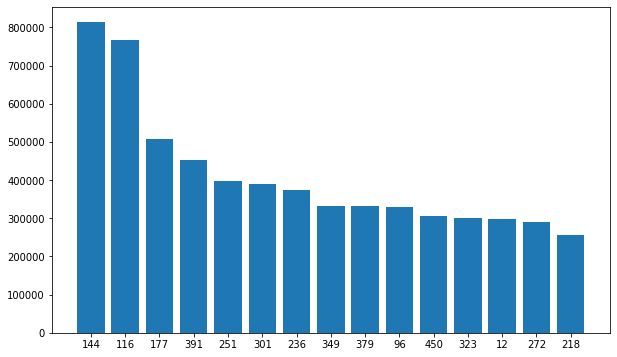

In [29]:
fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(10)  
fig.set_figheight(6) 

plt.show()

5.	Можно для каждого пользователя вывести по каждому столбцу таблицы всех его проектов максимальное значение по столбцу, чтобы понять насколько большие проекты он выполнял с точки зрения наличий тех или иных атрибутов

In [30]:
proj_by_user.head()

project_creation_timestamp  project_has_audio  project_has_button  \
13                   1455016287                  0                   0   
59                   1483031157                  0                   0   
52                   1482306383                  0                   0   
40                   1479213741                  0                   2   
302                  1523851989                  0                   0   

     project_has_buttonClicked_input  project_has_checkbox_input  \
13                                 0                           0   
59                                 0                           0   
52                                 0                           0   
40                                 0                           0   
302                                0                           0   

     project_has_externalHtml  project_has_fileAudio_input  \
13                          0                            0   
59                          0                            0   
52                          0                            0   
40                          0                            0   
302                         0                            0   

     project_has_fileImg_input  project_has_fileVideo_input  \
13                           0                            0   
59                           0                            0   
52                           0                            0   
40                           0                            0   
302                          0                            0   

     project_has_file_input  ...  project_has_suggest_input  \
13                        0  ...                          0   
59                        0  ...                          0   
52                        0  ...                          0   
40                        0  ...                          0   
302                       0  ...                          0   

     project_has_textarea_input  project_has_video  project_id  \
13                            0                  2          14   
59                            0                  0          60   
52                            0                  0          53   
40                            0                  0          41   
302                           0                  0         303   

     project_instruction_FK  project_instruction_language  \
13                33.269493                            ru   
59                34.007831                            ru   
52                 5.454828                            ru   
40                16.917249                            ru   
302              -13.418978                            ru   

     project_instruction_len  project_instruction_wordCount  \
13                    4153.0                          443.0   
59                    2327.0                          249.0   
52                    2505.0                          279.0   
40                    2583.0                          282.0   
302                   5779.0                          615.0   

     project_required_fields  project_spec_length  
13                         1                 1110  
59                         1                  839  
52                         2                  527  
40                         1                  630  
302                        1                 1546  

[5 rows x 28 columns]

In [31]:
col_names = proj_by_user.drop(['project_creation_timestamp', 'project_id', 'project_instruction_language'], axis=1).columns
col_names

Index(['project_has_audio', 'project_has_button',
       'project_has_buttonClicked_input', 'project_has_checkbox_input',
       'project_has_externalHtml', 'project_has_fileAudio_input',
       'project_has_fileImg_input', 'project_has_fileVideo_input',
       'project_has_file_input', 'project_has_iframe', 'project_has_image',
       'project_has_imageAnnotation_input', 'project_has_radio_input',
       'project_has_sbs', 'project_has_select_input',
       'project_has_sourcesRecorder_input', 'project_has_string_input',
       'project_has_suggest_input', 'project_has_textarea_input',
       'project_has_video', 'project_instruction_FK',
       'project_instruction_len', 'project_instruction_wordCount',
       'project_required_fields', 'project_spec_length'],
      dtype='object')

In [32]:
res5 = [max(proj_by_user[i]) for i in col_names]
res5

[0,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 2,
 4,
 0,
 12,
 10,
 0,
 0,
 10,
 0,
 1,
 2,
 54.97981731852568,
 6282.0,
 663.0,
 2,
 4781]

In [33]:
# выделим ненулевые значения
x = []
y = []
for i in range(len(res5)):
    if res5[i] != 0:
        y.append(res5[i])
        x.append(col_names[i])

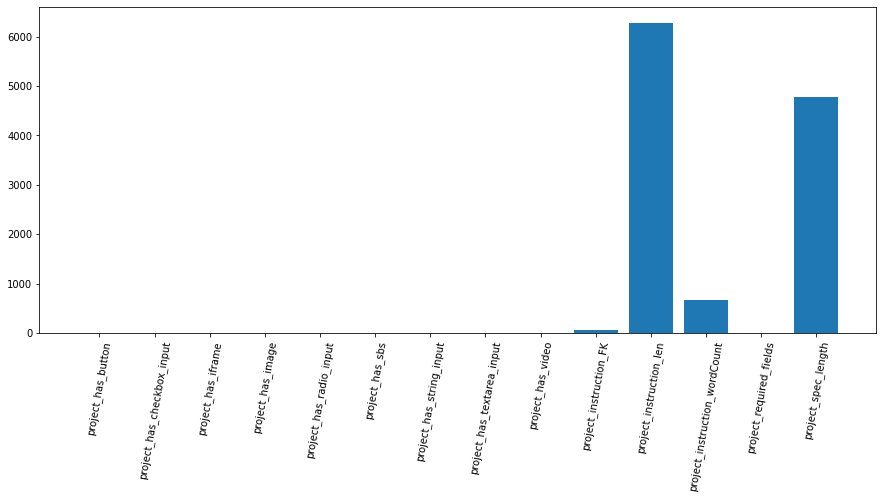

In [34]:
fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(15)  
fig.set_figheight(6) 

plt.xticks(rotation = 80)

plt.show()

In [35]:
col_names1 = col_names[:-5]
col_names2 = col_names[-5:]

res5_1 = res5[:-5]
res5_2 = res5[-5:]

In [36]:
# выделим ненулевые значения
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(res5_1)):
    if res5_1[i] != 0:
        y1.append(res5_1[i])
        x1.append(col_names1[i])
        
for i in range(len(res5_2)):
    if res5_2[i] != 0:
        y2.append(res5_2[i])
        x2.append(col_names2[i])

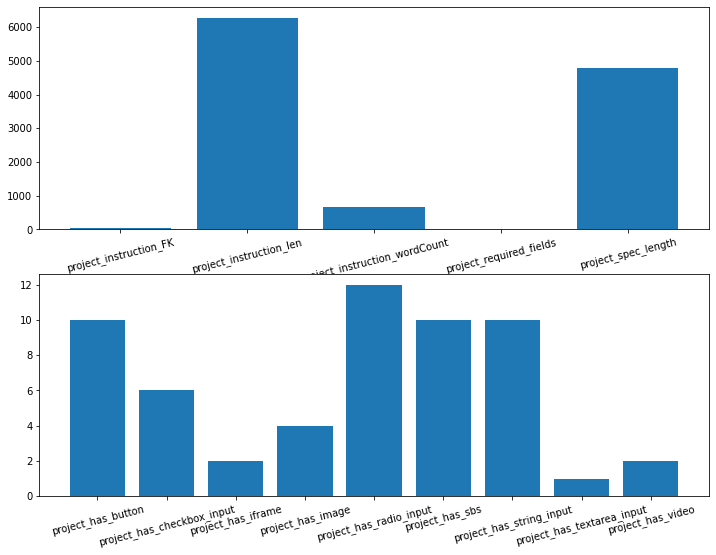

In [37]:
fig, axes = plt.subplots(2, 1)

axes[0].bar(x2, y2)
axes[0].tick_params(axis='x', labelrotation = 14)
axes[1].bar(x1, y1)
axes[1].tick_params(axis='x', labelrotation = 14)

fig.set_figwidth(12) 
fig.set_figheight(9)    

plt.show()

6.	Рассмотрим среднее и медиану по каждому столбцу. Может оказаться, что получится выделить какие-то атрибуты, которые находятся в большинстве проектов и возможно присутствуют в большом количестве

In [38]:
proj_by_user.head()

project_creation_timestamp  project_has_audio  project_has_button  \
13                   1455016287                  0                   0   
59                   1483031157                  0                   0   
52                   1482306383                  0                   0   
40                   1479213741                  0                   2   
302                  1523851989                  0                   0   

     project_has_buttonClicked_input  project_has_checkbox_input  \
13                                 0                           0   
59                                 0                           0   
52                                 0                           0   
40                                 0                           0   
302                                0                           0   

     project_has_externalHtml  project_has_fileAudio_input  \
13                          0                            0   
59                          0                            0   
52                          0                            0   
40                          0                            0   
302                         0                            0   

     project_has_fileImg_input  project_has_fileVideo_input  \
13                           0                            0   
59                           0                            0   
52                           0                            0   
40                           0                            0   
302                          0                            0   

     project_has_file_input  ...  project_has_suggest_input  \
13                        0  ...                          0   
59                        0  ...                          0   
52                        0  ...                          0   
40                        0  ...                          0   
302                       0  ...                          0   

     project_has_textarea_input  project_has_video  project_id  \
13                            0                  2          14   
59                            0                  0          60   
52                            0                  0          53   
40                            0                  0          41   
302                           0                  0         303   

     project_instruction_FK  project_instruction_language  \
13                33.269493                            ru   
59                34.007831                            ru   
52                 5.454828                            ru   
40                16.917249                            ru   
302              -13.418978                            ru   

     project_instruction_len  project_instruction_wordCount  \
13                    4153.0                          443.0   
59                    2327.0                          249.0   
52                    2505.0                          279.0   
40                    2583.0                          282.0   
302                   5779.0                          615.0   

     project_required_fields  project_spec_length  
13                         1                 1110  
59                         1                  839  
52                         2                  527  
40                         1                  630  
302                        1                 1546  

[5 rows x 28 columns]

In [39]:
col_names1

Index(['project_has_audio', 'project_has_button',
       'project_has_buttonClicked_input', 'project_has_checkbox_input',
       'project_has_externalHtml', 'project_has_fileAudio_input',
       'project_has_fileImg_input', 'project_has_fileVideo_input',
       'project_has_file_input', 'project_has_iframe', 'project_has_image',
       'project_has_imageAnnotation_input', 'project_has_radio_input',
       'project_has_sbs', 'project_has_select_input',
       'project_has_sourcesRecorder_input', 'project_has_string_input',
       'project_has_suggest_input', 'project_has_textarea_input',
       'project_has_video'],
      dtype='object')

In [40]:
res6_mean = [proj_by_user[i].mean() for i in col_names1]
res6_median = [statistics.median(proj_by_user[i]) for i in col_names1]

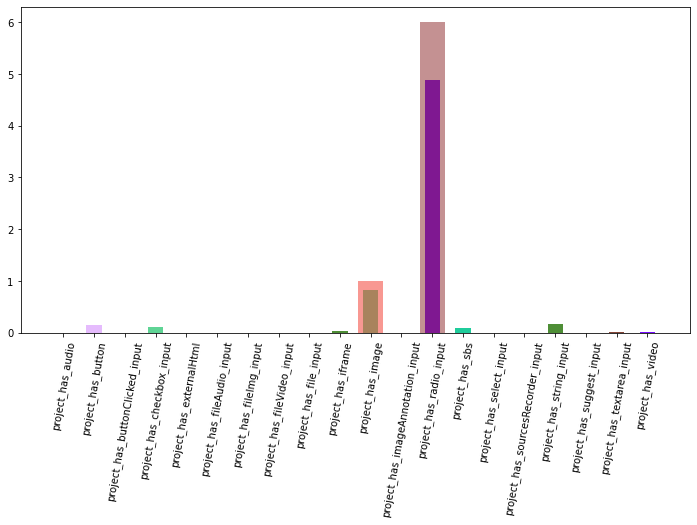

In [41]:
fig, ax = plt.subplots()

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(col_names1, res6_mean, color = color_rectangle, width = 0.5)

color_rectangle = np.random.rand(7, 4)    # RGBA
color_rectangle[:,3] = 0.5
ax.bar(col_names1, res6_median, color = color_rectangle)

fig.set_figwidth(12)    
fig.set_figheight(6)    

plt.xticks(rotation = 80)

plt.show()

7.	Просуммировать каждый столбец из таблицы выполненных проектов и посмотреть сколько раз пользователю встречались, например, аудиофайлы

In [42]:
proj_by_user.head()

project_creation_timestamp  project_has_audio  project_has_button  \
13                   1455016287                  0                   0   
59                   1483031157                  0                   0   
52                   1482306383                  0                   0   
40                   1479213741                  0                   2   
302                  1523851989                  0                   0   

     project_has_buttonClicked_input  project_has_checkbox_input  \
13                                 0                           0   
59                                 0                           0   
52                                 0                           0   
40                                 0                           0   
302                                0                           0   

     project_has_externalHtml  project_has_fileAudio_input  \
13                          0                            0   
59                          0                            0   
52                          0                            0   
40                          0                            0   
302                         0                            0   

     project_has_fileImg_input  project_has_fileVideo_input  \
13                           0                            0   
59                           0                            0   
52                           0                            0   
40                           0                            0   
302                          0                            0   

     project_has_file_input  ...  project_has_suggest_input  \
13                        0  ...                          0   
59                        0  ...                          0   
52                        0  ...                          0   
40                        0  ...                          0   
302                       0  ...                          0   

     project_has_textarea_input  project_has_video  project_id  \
13                            0                  2          14   
59                            0                  0          60   
52                            0                  0          53   
40                            0                  0          41   
302                           0                  0         303   

     project_instruction_FK  project_instruction_language  \
13                33.269493                            ru   
59                34.007831                            ru   
52                 5.454828                            ru   
40                16.917249                            ru   
302              -13.418978                            ru   

     project_instruction_len  project_instruction_wordCount  \
13                    4153.0                          443.0   
59                    2327.0                          249.0   
52                    2505.0                          279.0   
40                    2583.0                          282.0   
302                   5779.0                          615.0   

     project_required_fields  project_spec_length  
13                         1                 1110  
59                         1                  839  
52                         2                  527  
40                         1                  630  
302                        1                 1546  

[5 rows x 28 columns]

In [43]:
col_names1

Index(['project_has_audio', 'project_has_button',
       'project_has_buttonClicked_input', 'project_has_checkbox_input',
       'project_has_externalHtml', 'project_has_fileAudio_input',
       'project_has_fileImg_input', 'project_has_fileVideo_input',
       'project_has_file_input', 'project_has_iframe', 'project_has_image',
       'project_has_imageAnnotation_input', 'project_has_radio_input',
       'project_has_sbs', 'project_has_select_input',
       'project_has_sourcesRecorder_input', 'project_has_string_input',
       'project_has_suggest_input', 'project_has_textarea_input',
       'project_has_video'],
      dtype='object')

In [44]:
res7 = np.array([sum(proj_by_user[i]) for i in col_names1])
res7

array([  0,  18,   0,  12,   0,   0,   0,   0,   0,   3,  96,   0, 561,
        10,   0,   0,  20,   0,   1,   2])

In [45]:
normalized_res7 = list(preprocessing.normalize([res7])[0])
normalized_res7

[0.0,
 0.03157802404788321,
 0.0,
 0.02105201603192214,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005263004007980535,
 0.1684161282553771,
 0.0,
 0.9841817494923599,
 0.017543346693268447,
 0.0,
 0.0,
 0.035086693386536895,
 0.0,
 0.0017543346693268448,
 0.0035086693386536896]

In [46]:
# выделим ненулевые значения
x = []
y = []
for i in range(len(normalized_res7)):
    if normalized_res7[i] != 0:
        y.append(normalized_res7[i])
        x.append(col_names1[i])

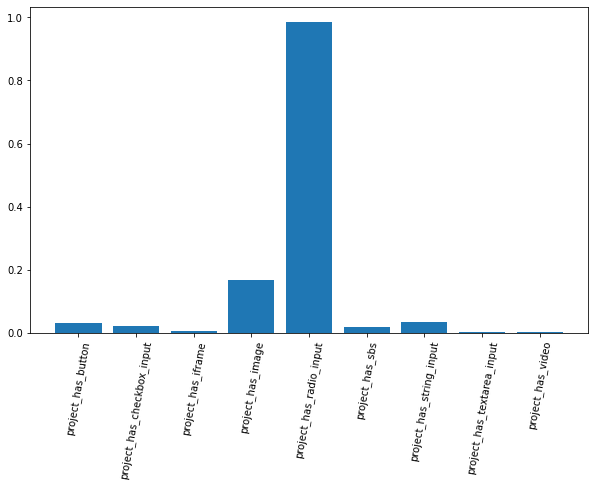

In [47]:
fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(10)  
fig.set_figheight(6) 

plt.xticks(rotation = 80)

plt.show()

9.	Можно посмотреть активность пользователя. то есть количество выполненных проектов. Если у пользователя мало проектов, то скорее всего ему не понравился тот проект, с которого он начал и нужно предложить что-то новое, без элементов из предыдущего проекта. А если пользователь уже давно, то у него уже есть сформировавшиеся предпочтения

In [48]:
count_proj_of_user = len(proj_by_user)
count_proj_of_user

115

In [49]:
# выведем количество проектов для нескольких пользователей
res9 = []
for i in range(10):
    users_projects = list(assignments[assignments['user_id'] == unique_user_id[i]]['assignment_project_id']) # список id проектов, которые выполнил пользователь
    index_list = np.array(users_projects) - 1 # список индексов проектов
    res9.append(len(projects.iloc[list(index_list)]))

In [50]:
res9

[216, 1, 115, 214, 1193, 1, 77, 141, 460, 241]

10.	Рассмотрим как долго пользователь использует этот сервис

In [51]:
users_projects = assignments[assignments['user_id'] == user]
users_projects

assignment_gs_correct_count  assignment_gs_count  \
2                                   9                   15   
10398                               5                   10   
21122                               5                    6   
53249                              15                   18   
350907                              3                   12   
...                               ...                  ...   
16199790                            1                    1   
16199793                            1                    1   
16199794                            1                    1   
16199795                            1                    1   
16245028                            1                    1   

                                 assignment_id  assignment_price  \
2         3aea0026-faae-4845-8708-9bf323ff8a77              0.00   
10398     462ac7be-2204-45f6-b6e4-3a450cd72589              0.00   
21122     89151026-6b4e-493c-984b-a4f379b4f14d              0.00   
53249     957e5a0d-5bf9-4b80-a04e-78f8732f4b55              0.00   
350907    4f8212dc-03d8-45ad-a902-70c8a718493b              0.00   
...                                        ...               ...   
16199790  4b180e20-ff6c-4a75-b02c-e0c7b94c18e6              0.00   
16199793  ba78d1e6-5fbe-4302-9d81-b884d4394b0e              0.00   
16199794  7985659e-655d-406f-a900-e082331e90a8              0.00   
16199795  7df97db4-6c88-4b5e-86d3-2388f60c2fa7              0.00   
16245028  a5c46979-88d2-48f1-8ee4-99f09bd7b80b              0.01   

          assignment_project_id  assignment_start_time assignment_status  \
2                            14             1538148115          APPROVED   
10398                        60             1538196215          APPROVED   
21122                        53             1539001245          APPROVED   
53249                        41             1538149389          APPROVED   
350907                      303             1538148883          APPROVED   
...                         ...                    ...               ...   
16199790                    144             1538286928          APPROVED   
16199793                    144             1538286983          APPROVED   
16199794                    144             1538286998          APPROVED   
16199795                    144             1538287006          APPROVED   
16245028                     12             1538374823          APPROVED   

          assignment_submit_time assignment_type    device_category  \
2                     1538148369           train  PERSONAL_COMPUTER   
10398                 1538196278           train  PERSONAL_COMPUTER   
21122                 1539001421           train  PERSONAL_COMPUTER   
53249                 1538149530           train  PERSONAL_COMPUTER   
350907                1538149263           train  PERSONAL_COMPUTER   
...                          ...             ...                ...   
16199790              1538286947            exam  PERSONAL_COMPUTER   
16199793              1538286988            exam  PERSONAL_COMPUTER   
16199794              1538287005            exam  PERSONAL_COMPUTER   
16199795              1538287014            exam  PERSONAL_COMPUTER   
16245028              1538375359         regular  PERSONAL_COMPUTER   

          microtasks_count os_family                           user_id  
2                       15   WINDOWS  49c203950e65419eb472ef7b527db377  
10398                   10   WINDOWS  49c203950e65419eb472ef7b527db377  
21122                    6   WINDOWS  49c203950e65419eb472ef7b527db377  
53249                   18   WINDOWS  49c203950e65419eb472ef7b527db377  
350907                  12   WINDOWS  49c203950e65419eb472ef7b527db377  
...                    ...       ...                               ...  
16199790                 1   WINDOWS  49c203950e65419eb472ef7b527db377  
16199793                 1   WINDOWS  49c203950e65419eb472ef7b527db377  
16199794                 

In [52]:
start_time = min(users_projects['assignment_start_time'])
end_time = max(users_projects['assignment_submit_time'])

In [53]:
print('Данный пользователь выполняет задания уже ', end_time - start_time)

Данный пользователь выполняет задания уже  853843


# Рассмотрим 60%, 20% и 20% времени и выделим пользователей, которые выполняли задания с 60% до 80%

In [19]:
assignments_sort_by_time = assignments.sort_values('assignment_start_time')

In [4]:
assignments_sort_by_time.head()

assignment_gs_correct_count  assignment_gs_count  \
461526                              0                    0   
15881947                            0                    0   
15892591                            0                    0   
12794709                            0                    0   
15892593                            0                    0   

                                 assignment_id  assignment_price  \
461526    9eff8e06-1309-4a22-9baa-74ed09abc14e              0.01   
15881947  ee0b0c71-913e-4cd1-9939-b430db0b3106              0.01   
15892591  02d6ff89-d37d-4011-bb46-366a8a6c48b5              0.01   
12794709  0f0a6519-c158-4d92-becb-875c84257327              0.01   
15892593  4ca3d774-5aca-4c48-b26f-4f53d10293a6              0.01   

          assignment_project_id  assignment_start_time assignment_status  \
461526                       55             1535500920         SUBMITTED   
15881947                    157             1535500921          APPROVED   
15892591                     55             1535500943          APPROVED   
12794709                    157             1535501007          APPROVED   
15892593                     55             1535501013          APPROVED   

          assignment_submit_time assignment_type    device_category  \
461526                1535500961         regular  PERSONAL_COMPUTER   
15881947              1535500971         regular  PERSONAL_COMPUTER   
15892591              1535501076         regular  PERSONAL_COMPUTER   
12794709              1535501196         regular  PERSONAL_COMPUTER   
15892593              1535501099         regular  PERSONAL_COMPUTER   

          microtasks_count os_family                           user_id  
461526                  26   WINDOWS  05b660f5cf1440298a347b884b0a8e5e  
15881947                28   WINDOWS  cf7f9f5a30d5499d9e02db003ad0ef22  
15892591                26   WINDOWS  f1998fe576f240158c0bb4d03165ad35  
12794709                30   WINDOWS  d667502b3f1e4b4b868180e0cf5887fe  
15892593                26   WINDOWS  aec84b53a8f7438fa3c7895aefa2490c

### Возьмем срез данных с 60% до 80% и получим список пользователей данного промежутка времени

In [20]:
a = int(len(assignments_sort_by_time) * 0.6)
b = int(len(assignments_sort_by_time) * 0.8)
a, b

(11110395, 14813860)

In [21]:
assignments60_80 = assignments_sort_by_time.iloc[list(range(a, b+1))]
assignments60_80.head()

assignment_gs_correct_count  assignment_gs_count  \
14499827                            3                    4   
8331336                             4                    4   
15772412                            8                    9   
11413980                            2                    2   
10979528                            1                    1   

                                 assignment_id  assignment_price  \
14499827  481d1e35-06bc-411e-a604-84b0846fc68a              0.08   
8331336   58cf2faa-a6eb-46f9-af2a-307ff7fdc3a6              0.08   
15772412  7dd48d5d-30d8-4d23-9a4c-fc2f923aa9c3              0.00   
11413980  87e9d835-37eb-40ec-aea3-2febc28a1004              0.04   
10979528  b287f57a-37ab-435e-a3fb-a852f990ba57              0.03   

          assignment_project_id  assignment_start_time assignment_status  \
14499827                    138             1541448543          APPROVED   
8331336                     138             1541448543          APPROVED   
15772412                    359             1541448543          APPROVED   
11413980                    129             1541448544          APPROVED   
10979528                     63             1541448544          APPROVED   

          assignment_submit_time assignment_type    device_category  \
14499827              1541449155         regular  PERSONAL_COMPUTER   
8331336               1541449203         regular  PERSONAL_COMPUTER   
15772412              1541448605           train  PERSONAL_COMPUTER   
11413980              1541448765         regular  PERSONAL_COMPUTER   
10979528              1541448793         regular  PERSONAL_COMPUTER   

          microtasks_count os_family                           user_id  
14499827                25   WINDOWS  638767ca7fbe412a88189385d0649d88  
8331336                 25   WINDOWS  57ae4c5e88774bb492ccd2c4fc3aa152  
15772412                 9   WINDOWS  c585594636cf48d9841a766836953931  
11413980                20   WINDOWS  9d572241a81f461f97605bf893d0445f  
10979528                 8   WINDOWS  833da9e8ce2b4035aa4ad8863cba95bc

In [22]:
users60_80 = assignments60_80['user_id'].unique()
len(users60_80)

43858

# На основе полученных данных построим для выделенных пользователей статистическую таблицу

В данной таблице будут следующие столбцы:
1. сумма столбцов по основной таблице
2. сумма столбцов по бинарной таблице
3. среднее, медианное и максимальное значение по каждому столбцу
4. количество проектов
5. длительность нахождения на сайте

In [24]:
# сгенерируем названия столбцов для будущей таблицы
names_proj = projects.columns[1:].drop(['project_id', 'project_instruction_language']) # названия всех основных столбцов
id_user = ['id_user'] # id пользователя
sum_proj = [i + '_sum' for i in names_proj] # суммарное значение столбцов основной таблицы проектов
sum_proj_bin = [i + '_sum_bin' for i in users_projects_bin.columns] # суммарное значение столбцов бинарной таблицы проектов
mean_proj = [i + '_mean' for i in names_proj] # среднее значение столбцов основной таблицы проектов
median_proj = [i + '_med' for i in names_proj] # медианное значение столбцов основной таблицы проектов
max_proj = [i + '_max' for i in names_proj] # максимальное значение столбцов основной таблицы проектов
number_of_proj = ['number_of_proj'] # общее количество проектов
time_on_web = ['time_on_web'] # время на сайте

In [25]:
names60_80 = id_user + sum_proj + sum_proj_bin + mean_proj + median_proj + max_proj + number_of_proj + time_on_web
len(names60_80)

137

Таким образом в таблице получается 137 столбцов

Возьмем первые 60% данных для формирования статистики

In [26]:
assignments60 = assignments_sort_by_time.iloc[list(range(a+1))]
assignments60.head()

assignment_gs_correct_count  assignment_gs_count  \
461526                              0                    0   
15881947                            0                    0   
15892591                            0                    0   
12794709                            0                    0   
15892593                            0                    0   

                                 assignment_id  assignment_price  \
461526    9eff8e06-1309-4a22-9baa-74ed09abc14e              0.01   
15881947  ee0b0c71-913e-4cd1-9939-b430db0b3106              0.01   
15892591  02d6ff89-d37d-4011-bb46-366a8a6c48b5              0.01   
12794709  0f0a6519-c158-4d92-becb-875c84257327              0.01   
15892593  4ca3d774-5aca-4c48-b26f-4f53d10293a6              0.01   

          assignment_project_id  assignment_start_time assignment_status  \
461526                       55             1535500920         SUBMITTED   
15881947                    157             1535500921          APPROVED   
15892591                     55             1535500943          APPROVED   
12794709                    157             1535501007          APPROVED   
15892593                     55             1535501013          APPROVED   

          assignment_submit_time assignment_type    device_category  \
461526                1535500961         regular  PERSONAL_COMPUTER   
15881947              1535500971         regular  PERSONAL_COMPUTER   
15892591              1535501076         regular  PERSONAL_COMPUTER   
12794709              1535501196         regular  PERSONAL_COMPUTER   
15892593              1535501099         regular  PERSONAL_COMPUTER   

          microtasks_count os_family                           user_id  
461526                  26   WINDOWS  05b660f5cf1440298a347b884b0a8e5e  
15881947                28   WINDOWS  cf7f9f5a30d5499d9e02db003ad0ef22  
15892591                26   WINDOWS  f1998fe576f240158c0bb4d03165ad35  
12794709                30   WINDOWS  d667502b3f1e4b4b868180e0cf5887fe  
15892593                26   WINDOWS  aec84b53a8f7438fa3c7895aefa2490c

In [27]:
# рассмотрим список уникальных пользователей в данной таблице
users60 = assignments60['user_id'].unique()
len(users60)

105183

In [113]:
k = 0
l = len(users60_80)

with open("stats.csv", mode="a", encoding='utf-8') as w_file:
    file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\r")
    file_writer.writerow(names60_80)
    for i in users60_80:
        if i in users60:
            proj_of_user_list = list(assignments60[assignments60['user_id'] == i]['assignment_project_id'])
            index_list = np.array(proj_of_user_list) - 1 # список индексов проектов
            users_projects_bin = projects_bin.iloc[list(index_list)] # все выполненные проекты, представленные бинарной таблицей
            users_projects = projects.iloc[list(index_list)] # все выполненные проекты, представленные бинарной таблицей

            sum_proj = [sum(users_projects[j]) for j in names_proj]
            sum_bin_proj = [sum(users_projects_bin[j]) for j in users_projects_bin.columns]
            mean_proj = [users_projects[j].mean() for j in names_proj]
            med_proj = [statistics.median(users_projects[j]) for j in names_proj]
            max_proj = [max(users_projects[j]) for j in names_proj]
            users_proj = [len(users_projects)]
            time_on_website = [max(assignments60[assignments60['user_id'] == i]['assignment_submit_time']) - min(assignments60[assignments60['user_id'] == i]['assignment_submit_time'])]

            file_writer.writerow([i] + sum_proj + sum_bin_proj + mean_proj + med_proj + max_proj + users_proj + time_on_website)
        k += 1
        print(k, 'из', l)

1 из 43858
2 из 43858
3 из 43858
4 из 43858
5 из 43858
6 из 43858
7 из 43858
8 из 43858
9 из 43858
10 из 43858
11 из 43858
12 из 43858
13 из 43858
14 из 43858
15 из 43858
16 из 43858
17 из 43858
18 из 43858
19 из 43858
20 из 43858
21 из 43858
22 из 43858
23 из 43858
24 из 43858
25 из 43858
26 из 43858
27 из 43858
28 из 43858
29 из 43858
30 из 43858
31 из 43858
32 из 43858
33 из 43858
34 из 43858
35 из 43858
36 из 43858
37 из 43858
38 из 43858
39 из 43858
40 из 43858
41 из 43858
42 из 43858
43 из 43858
44 из 43858
45 из 43858
46 из 43858
47 из 43858
48 из 43858
49 из 43858
50 из 43858
51 из 43858
52 из 43858
53 из 43858
54 из 43858
55 из 43858
56 из 43858
57 из 43858
58 из 43858
59 из 43858
60 из 43858
61 из 43858
62 из 43858
63 из 43858
64 из 43858
65 из 43858
66 из 43858
67 из 43858
68 из 43858
69 из 43858
70 из 43858
71 из 43858
72 из 43858
73 из 43858
74 из 43858
75 из 43858
76 из 43858
77 из 43858
78 из 43858
79 из 43858
80 из 43858
81 из 43858
82 из 43858
83 из 43858
84 из 43858
8

640 из 43858
641 из 43858
642 из 43858
643 из 43858
644 из 43858
645 из 43858
646 из 43858
647 из 43858
648 из 43858
649 из 43858
650 из 43858
651 из 43858
652 из 43858
653 из 43858
654 из 43858
655 из 43858
656 из 43858
657 из 43858
658 из 43858
659 из 43858
660 из 43858
661 из 43858
662 из 43858
663 из 43858
664 из 43858
665 из 43858
666 из 43858
667 из 43858
668 из 43858
669 из 43858
670 из 43858
671 из 43858
672 из 43858
673 из 43858
674 из 43858
675 из 43858
676 из 43858
677 из 43858
678 из 43858
679 из 43858
680 из 43858
681 из 43858
682 из 43858
683 из 43858
684 из 43858
685 из 43858
686 из 43858
687 из 43858
688 из 43858
689 из 43858
690 из 43858
691 из 43858
692 из 43858
693 из 43858
694 из 43858
695 из 43858
696 из 43858
697 из 43858
698 из 43858
699 из 43858
700 из 43858
701 из 43858
702 из 43858
703 из 43858
704 из 43858
705 из 43858
706 из 43858
707 из 43858
708 из 43858
709 из 43858
710 из 43858
711 из 43858
712 из 43858
713 из 43858
714 из 43858
715 из 43858
716 из 43858

1251 из 43858
1252 из 43858
1253 из 43858
1254 из 43858
1255 из 43858
1256 из 43858
1257 из 43858
1258 из 43858
1259 из 43858
1260 из 43858
1261 из 43858
1262 из 43858
1263 из 43858
1264 из 43858
1265 из 43858
1266 из 43858
1267 из 43858
1268 из 43858
1269 из 43858
1270 из 43858
1271 из 43858
1272 из 43858
1273 из 43858
1274 из 43858
1275 из 43858
1276 из 43858
1277 из 43858
1278 из 43858
1279 из 43858
1280 из 43858
1281 из 43858
1282 из 43858
1283 из 43858
1284 из 43858
1285 из 43858
1286 из 43858
1287 из 43858
1288 из 43858
1289 из 43858
1290 из 43858
1291 из 43858
1292 из 43858
1293 из 43858
1294 из 43858
1295 из 43858
1296 из 43858
1297 из 43858
1298 из 43858
1299 из 43858
1300 из 43858
1301 из 43858
1302 из 43858
1303 из 43858
1304 из 43858
1305 из 43858
1306 из 43858
1307 из 43858
1308 из 43858
1309 из 43858
1310 из 43858
1311 из 43858
1312 из 43858
1313 из 43858
1314 из 43858
1315 из 43858
1316 из 43858
1317 из 43858
1318 из 43858
1319 из 43858
1320 из 43858
1321 из 43858
1322 и

1837 из 43858
1838 из 43858
1839 из 43858
1840 из 43858
1841 из 43858
1842 из 43858
1843 из 43858
1844 из 43858
1845 из 43858
1846 из 43858
1847 из 43858
1848 из 43858
1849 из 43858
1850 из 43858
1851 из 43858
1852 из 43858
1853 из 43858
1854 из 43858
1855 из 43858
1856 из 43858
1857 из 43858
1858 из 43858
1859 из 43858
1860 из 43858
1861 из 43858
1862 из 43858
1863 из 43858
1864 из 43858
1865 из 43858
1866 из 43858
1867 из 43858
1868 из 43858
1869 из 43858
1870 из 43858
1871 из 43858
1872 из 43858
1873 из 43858
1874 из 43858
1875 из 43858
1876 из 43858
1877 из 43858
1878 из 43858
1879 из 43858
1880 из 43858
1881 из 43858
1882 из 43858
1883 из 43858
1884 из 43858
1885 из 43858
1886 из 43858
1887 из 43858
1888 из 43858
1889 из 43858
1890 из 43858
1891 из 43858
1892 из 43858
1893 из 43858
1894 из 43858
1895 из 43858
1896 из 43858
1897 из 43858
1898 из 43858
1899 из 43858
1900 из 43858
1901 из 43858
1902 из 43858
1903 из 43858
1904 из 43858
1905 из 43858
1906 из 43858
1907 из 43858
1908 и

2423 из 43858
2424 из 43858
2425 из 43858
2426 из 43858
2427 из 43858
2428 из 43858
2429 из 43858
2430 из 43858
2431 из 43858
2432 из 43858
2433 из 43858
2434 из 43858
2435 из 43858
2436 из 43858
2437 из 43858
2438 из 43858
2439 из 43858
2440 из 43858
2441 из 43858
2442 из 43858
2443 из 43858
2444 из 43858
2445 из 43858
2446 из 43858
2447 из 43858
2448 из 43858
2449 из 43858
2450 из 43858
2451 из 43858
2452 из 43858
2453 из 43858
2454 из 43858
2455 из 43858
2456 из 43858
2457 из 43858
2458 из 43858
2459 из 43858
2460 из 43858
2461 из 43858
2462 из 43858
2463 из 43858
2464 из 43858
2465 из 43858
2466 из 43858
2467 из 43858
2468 из 43858
2469 из 43858
2470 из 43858
2471 из 43858
2472 из 43858
2473 из 43858
2474 из 43858
2475 из 43858
2476 из 43858
2477 из 43858
2478 из 43858
2479 из 43858
2480 из 43858
2481 из 43858
2482 из 43858
2483 из 43858
2484 из 43858
2485 из 43858
2486 из 43858
2487 из 43858
2488 из 43858
2489 из 43858
2490 из 43858
2491 из 43858
2492 из 43858
2493 из 43858
2494 и

3009 из 43858
3010 из 43858
3011 из 43858
3012 из 43858
3013 из 43858
3014 из 43858
3015 из 43858
3016 из 43858
3017 из 43858
3018 из 43858
3019 из 43858
3020 из 43858
3021 из 43858
3022 из 43858
3023 из 43858
3024 из 43858
3025 из 43858
3026 из 43858
3027 из 43858
3028 из 43858
3029 из 43858
3030 из 43858
3031 из 43858
3032 из 43858
3033 из 43858
3034 из 43858
3035 из 43858
3036 из 43858
3037 из 43858
3038 из 43858
3039 из 43858
3040 из 43858
3041 из 43858
3042 из 43858
3043 из 43858
3044 из 43858
3045 из 43858
3046 из 43858
3047 из 43858
3048 из 43858
3049 из 43858
3050 из 43858
3051 из 43858
3052 из 43858
3053 из 43858
3054 из 43858
3055 из 43858
3056 из 43858
3057 из 43858
3058 из 43858
3059 из 43858
3060 из 43858
3061 из 43858
3062 из 43858
3063 из 43858
3064 из 43858
3065 из 43858
3066 из 43858
3067 из 43858
3068 из 43858
3069 из 43858
3070 из 43858
3071 из 43858
3072 из 43858
3073 из 43858
3074 из 43858
3075 из 43858
3076 из 43858
3077 из 43858
3078 из 43858
3079 из 43858
3080 и

3595 из 43858
3596 из 43858
3597 из 43858
3598 из 43858
3599 из 43858
3600 из 43858
3601 из 43858
3602 из 43858
3603 из 43858
3604 из 43858
3605 из 43858
3606 из 43858
3607 из 43858
3608 из 43858
3609 из 43858
3610 из 43858
3611 из 43858
3612 из 43858
3613 из 43858
3614 из 43858
3615 из 43858
3616 из 43858
3617 из 43858
3618 из 43858
3619 из 43858
3620 из 43858
3621 из 43858
3622 из 43858
3623 из 43858
3624 из 43858
3625 из 43858
3626 из 43858
3627 из 43858
3628 из 43858
3629 из 43858
3630 из 43858
3631 из 43858
3632 из 43858
3633 из 43858
3634 из 43858
3635 из 43858
3636 из 43858
3637 из 43858
3638 из 43858
3639 из 43858
3640 из 43858
3641 из 43858
3642 из 43858
3643 из 43858
3644 из 43858
3645 из 43858
3646 из 43858
3647 из 43858
3648 из 43858
3649 из 43858
3650 из 43858
3651 из 43858
3652 из 43858
3653 из 43858
3654 из 43858
3655 из 43858
3656 из 43858
3657 из 43858
3658 из 43858
3659 из 43858
3660 из 43858
3661 из 43858
3662 из 43858
3663 из 43858
3664 из 43858
3665 из 43858
3666 и

4181 из 43858
4182 из 43858
4183 из 43858
4184 из 43858
4185 из 43858
4186 из 43858
4187 из 43858
4188 из 43858
4189 из 43858
4190 из 43858
4191 из 43858
4192 из 43858
4193 из 43858
4194 из 43858
4195 из 43858
4196 из 43858
4197 из 43858
4198 из 43858
4199 из 43858
4200 из 43858
4201 из 43858
4202 из 43858
4203 из 43858
4204 из 43858
4205 из 43858
4206 из 43858
4207 из 43858
4208 из 43858
4209 из 43858
4210 из 43858
4211 из 43858
4212 из 43858
4213 из 43858
4214 из 43858
4215 из 43858
4216 из 43858
4217 из 43858
4218 из 43858
4219 из 43858
4220 из 43858
4221 из 43858
4222 из 43858
4223 из 43858
4224 из 43858
4225 из 43858
4226 из 43858
4227 из 43858
4228 из 43858
4229 из 43858
4230 из 43858
4231 из 43858
4232 из 43858
4233 из 43858
4234 из 43858
4235 из 43858
4236 из 43858
4237 из 43858
4238 из 43858
4239 из 43858
4240 из 43858
4241 из 43858
4242 из 43858
4243 из 43858
4244 из 43858
4245 из 43858
4246 из 43858
4247 из 43858
4248 из 43858
4249 из 43858
4250 из 43858
4251 из 43858
4252 и

4767 из 43858
4768 из 43858
4769 из 43858
4770 из 43858
4771 из 43858
4772 из 43858
4773 из 43858
4774 из 43858
4775 из 43858
4776 из 43858
4777 из 43858
4778 из 43858
4779 из 43858
4780 из 43858
4781 из 43858
4782 из 43858
4783 из 43858
4784 из 43858
4785 из 43858
4786 из 43858
4787 из 43858
4788 из 43858
4789 из 43858
4790 из 43858
4791 из 43858
4792 из 43858
4793 из 43858
4794 из 43858
4795 из 43858
4796 из 43858
4797 из 43858
4798 из 43858
4799 из 43858
4800 из 43858
4801 из 43858
4802 из 43858
4803 из 43858
4804 из 43858
4805 из 43858
4806 из 43858
4807 из 43858
4808 из 43858
4809 из 43858
4810 из 43858
4811 из 43858
4812 из 43858
4813 из 43858
4814 из 43858
4815 из 43858
4816 из 43858
4817 из 43858
4818 из 43858
4819 из 43858
4820 из 43858
4821 из 43858
4822 из 43858
4823 из 43858
4824 из 43858
4825 из 43858
4826 из 43858
4827 из 43858
4828 из 43858
4829 из 43858
4830 из 43858
4831 из 43858
4832 из 43858
4833 из 43858
4834 из 43858
4835 из 43858
4836 из 43858
4837 из 43858
4838 и

5353 из 43858
5354 из 43858
5355 из 43858
5356 из 43858
5357 из 43858
5358 из 43858
5359 из 43858
5360 из 43858
5361 из 43858
5362 из 43858
5363 из 43858
5364 из 43858
5365 из 43858
5366 из 43858
5367 из 43858
5368 из 43858
5369 из 43858
5370 из 43858
5371 из 43858
5372 из 43858
5373 из 43858
5374 из 43858
5375 из 43858
5376 из 43858
5377 из 43858
5378 из 43858
5379 из 43858
5380 из 43858
5381 из 43858
5382 из 43858
5383 из 43858
5384 из 43858
5385 из 43858
5386 из 43858
5387 из 43858
5388 из 43858
5389 из 43858
5390 из 43858
5391 из 43858
5392 из 43858
5393 из 43858
5394 из 43858
5395 из 43858
5396 из 43858
5397 из 43858
5398 из 43858
5399 из 43858
5400 из 43858
5401 из 43858
5402 из 43858
5403 из 43858
5404 из 43858
5405 из 43858
5406 из 43858
5407 из 43858
5408 из 43858
5409 из 43858
5410 из 43858
5411 из 43858
5412 из 43858
5413 из 43858
5414 из 43858
5415 из 43858
5416 из 43858
5417 из 43858
5418 из 43858
5419 из 43858
5420 из 43858
5421 из 43858
5422 из 43858
5423 из 43858
5424 и

5940 из 43858
5941 из 43858
5942 из 43858
5943 из 43858
5944 из 43858
5945 из 43858
5946 из 43858
5947 из 43858
5948 из 43858
5949 из 43858
5950 из 43858
5951 из 43858
5952 из 43858
5953 из 43858
5954 из 43858
5955 из 43858
5956 из 43858
5957 из 43858
5958 из 43858
5959 из 43858
5960 из 43858
5961 из 43858
5962 из 43858
5963 из 43858
5964 из 43858
5965 из 43858
5966 из 43858
5967 из 43858
5968 из 43858
5969 из 43858
5970 из 43858
5971 из 43858
5972 из 43858
5973 из 43858
5974 из 43858
5975 из 43858
5976 из 43858
5977 из 43858
5978 из 43858
5979 из 43858
5980 из 43858
5981 из 43858
5982 из 43858
5983 из 43858
5984 из 43858
5985 из 43858
5986 из 43858
5987 из 43858
5988 из 43858
5989 из 43858
5990 из 43858
5991 из 43858
5992 из 43858
5993 из 43858
5994 из 43858
5995 из 43858
5996 из 43858
5997 из 43858
5998 из 43858
5999 из 43858
6000 из 43858
6001 из 43858
6002 из 43858
6003 из 43858
6004 из 43858
6005 из 43858
6006 из 43858
6007 из 43858
6008 из 43858
6009 из 43858
6010 из 43858
6011 и

6527 из 43858
6528 из 43858
6529 из 43858
6530 из 43858
6531 из 43858
6532 из 43858
6533 из 43858
6534 из 43858
6535 из 43858
6536 из 43858
6537 из 43858
6538 из 43858
6539 из 43858
6540 из 43858
6541 из 43858
6542 из 43858
6543 из 43858
6544 из 43858
6545 из 43858
6546 из 43858
6547 из 43858
6548 из 43858
6549 из 43858
6550 из 43858
6551 из 43858
6552 из 43858
6553 из 43858
6554 из 43858
6555 из 43858
6556 из 43858
6557 из 43858
6558 из 43858
6559 из 43858
6560 из 43858
6561 из 43858
6562 из 43858
6563 из 43858
6564 из 43858
6565 из 43858
6566 из 43858
6567 из 43858
6568 из 43858
6569 из 43858
6570 из 43858
6571 из 43858
6572 из 43858
6573 из 43858
6574 из 43858
6575 из 43858
6576 из 43858
6577 из 43858
6578 из 43858
6579 из 43858
6580 из 43858
6581 из 43858
6582 из 43858
6583 из 43858
6584 из 43858
6585 из 43858
6586 из 43858
6587 из 43858
6588 из 43858
6589 из 43858
6590 из 43858
6591 из 43858
6592 из 43858
6593 из 43858
6594 из 43858
6595 из 43858
6596 из 43858
6597 из 43858
6598 и

7113 из 43858
7114 из 43858
7115 из 43858
7116 из 43858
7117 из 43858
7118 из 43858
7119 из 43858
7120 из 43858
7121 из 43858
7122 из 43858
7123 из 43858
7124 из 43858
7125 из 43858
7126 из 43858
7127 из 43858
7128 из 43858
7129 из 43858
7130 из 43858
7131 из 43858
7132 из 43858
7133 из 43858
7134 из 43858
7135 из 43858
7136 из 43858
7137 из 43858
7138 из 43858
7139 из 43858
7140 из 43858
7141 из 43858
7142 из 43858
7143 из 43858
7144 из 43858
7145 из 43858
7146 из 43858
7147 из 43858
7148 из 43858
7149 из 43858
7150 из 43858
7151 из 43858
7152 из 43858
7153 из 43858
7154 из 43858
7155 из 43858
7156 из 43858
7157 из 43858
7158 из 43858
7159 из 43858
7160 из 43858
7161 из 43858
7162 из 43858
7163 из 43858
7164 из 43858
7165 из 43858
7166 из 43858
7167 из 43858
7168 из 43858
7169 из 43858
7170 из 43858
7171 из 43858
7172 из 43858
7173 из 43858
7174 из 43858
7175 из 43858
7176 из 43858
7177 из 43858
7178 из 43858
7179 из 43858
7180 из 43858
7181 из 43858
7182 из 43858
7183 из 43858
7184 и

7700 из 43858
7701 из 43858
7702 из 43858
7703 из 43858
7704 из 43858
7705 из 43858
7706 из 43858
7707 из 43858
7708 из 43858
7709 из 43858
7710 из 43858
7711 из 43858
7712 из 43858
7713 из 43858
7714 из 43858
7715 из 43858
7716 из 43858
7717 из 43858
7718 из 43858
7719 из 43858
7720 из 43858
7721 из 43858
7722 из 43858
7723 из 43858
7724 из 43858
7725 из 43858
7726 из 43858
7727 из 43858
7728 из 43858
7729 из 43858
7730 из 43858
7731 из 43858
7732 из 43858
7733 из 43858
7734 из 43858
7735 из 43858
7736 из 43858
7737 из 43858
7738 из 43858
7739 из 43858
7740 из 43858
7741 из 43858
7742 из 43858
7743 из 43858
7744 из 43858
7745 из 43858
7746 из 43858
7747 из 43858
7748 из 43858
7749 из 43858
7750 из 43858
7751 из 43858
7752 из 43858
7753 из 43858
7754 из 43858
7755 из 43858
7756 из 43858
7757 из 43858
7758 из 43858
7759 из 43858
7760 из 43858
7761 из 43858
7762 из 43858
7763 из 43858
7764 из 43858
7765 из 43858
7766 из 43858
7767 из 43858
7768 из 43858
7769 из 43858
7770 из 43858
7771 и

8288 из 43858
8289 из 43858
8290 из 43858
8291 из 43858
8292 из 43858
8293 из 43858
8294 из 43858
8295 из 43858
8296 из 43858
8297 из 43858
8298 из 43858
8299 из 43858
8300 из 43858
8301 из 43858
8302 из 43858
8303 из 43858
8304 из 43858
8305 из 43858
8306 из 43858
8307 из 43858
8308 из 43858
8309 из 43858
8310 из 43858
8311 из 43858
8312 из 43858
8313 из 43858
8314 из 43858
8315 из 43858
8316 из 43858
8317 из 43858
8318 из 43858
8319 из 43858
8320 из 43858
8321 из 43858
8322 из 43858
8323 из 43858
8324 из 43858
8325 из 43858
8326 из 43858
8327 из 43858
8328 из 43858
8329 из 43858
8330 из 43858
8331 из 43858
8332 из 43858
8333 из 43858
8334 из 43858
8335 из 43858
8336 из 43858
8337 из 43858
8338 из 43858
8339 из 43858
8340 из 43858
8341 из 43858
8342 из 43858
8343 из 43858
8344 из 43858
8345 из 43858
8346 из 43858
8347 из 43858
8348 из 43858
8349 из 43858
8350 из 43858
8351 из 43858
8352 из 43858
8353 из 43858
8354 из 43858
8355 из 43858
8356 из 43858
8357 из 43858
8358 из 43858
8359 и

8874 из 43858
8875 из 43858
8876 из 43858
8877 из 43858
8878 из 43858
8879 из 43858
8880 из 43858
8881 из 43858
8882 из 43858
8883 из 43858
8884 из 43858
8885 из 43858
8886 из 43858
8887 из 43858
8888 из 43858
8889 из 43858
8890 из 43858
8891 из 43858
8892 из 43858
8893 из 43858
8894 из 43858
8895 из 43858
8896 из 43858
8897 из 43858
8898 из 43858
8899 из 43858
8900 из 43858
8901 из 43858
8902 из 43858
8903 из 43858
8904 из 43858
8905 из 43858
8906 из 43858
8907 из 43858
8908 из 43858
8909 из 43858
8910 из 43858
8911 из 43858
8912 из 43858
8913 из 43858
8914 из 43858
8915 из 43858
8916 из 43858
8917 из 43858
8918 из 43858
8919 из 43858
8920 из 43858
8921 из 43858
8922 из 43858
8923 из 43858
8924 из 43858
8925 из 43858
8926 из 43858
8927 из 43858
8928 из 43858
8929 из 43858
8930 из 43858
8931 из 43858
8932 из 43858
8933 из 43858
8934 из 43858
8935 из 43858
8936 из 43858
8937 из 43858
8938 из 43858
8939 из 43858
8940 из 43858
8941 из 43858
8942 из 43858
8943 из 43858
8944 из 43858
8945 и

9461 из 43858
9462 из 43858
9463 из 43858
9464 из 43858
9465 из 43858
9466 из 43858
9467 из 43858
9468 из 43858
9469 из 43858
9470 из 43858
9471 из 43858
9472 из 43858
9473 из 43858
9474 из 43858
9475 из 43858
9476 из 43858
9477 из 43858
9478 из 43858
9479 из 43858
9480 из 43858
9481 из 43858
9482 из 43858
9483 из 43858
9484 из 43858
9485 из 43858
9486 из 43858
9487 из 43858
9488 из 43858
9489 из 43858
9490 из 43858
9491 из 43858
9492 из 43858
9493 из 43858
9494 из 43858
9495 из 43858
9496 из 43858
9497 из 43858
9498 из 43858
9499 из 43858
9500 из 43858
9501 из 43858
9502 из 43858
9503 из 43858
9504 из 43858
9505 из 43858
9506 из 43858
9507 из 43858
9508 из 43858
9509 из 43858
9510 из 43858
9511 из 43858
9512 из 43858
9513 из 43858
9514 из 43858
9515 из 43858
9516 из 43858
9517 из 43858
9518 из 43858
9519 из 43858
9520 из 43858
9521 из 43858
9522 из 43858
9523 из 43858
9524 из 43858
9525 из 43858
9526 из 43858
9527 из 43858
9528 из 43858
9529 из 43858
9530 из 43858
9531 из 43858
9532 и

10046 из 43858
10047 из 43858
10048 из 43858
10049 из 43858
10050 из 43858
10051 из 43858
10052 из 43858
10053 из 43858
10054 из 43858
10055 из 43858
10056 из 43858
10057 из 43858
10058 из 43858
10059 из 43858
10060 из 43858
10061 из 43858
10062 из 43858
10063 из 43858
10064 из 43858
10065 из 43858
10066 из 43858
10067 из 43858
10068 из 43858
10069 из 43858
10070 из 43858
10071 из 43858
10072 из 43858
10073 из 43858
10074 из 43858
10075 из 43858
10076 из 43858
10077 из 43858
10078 из 43858
10079 из 43858
10080 из 43858
10081 из 43858
10082 из 43858
10083 из 43858
10084 из 43858
10085 из 43858
10086 из 43858
10087 из 43858
10088 из 43858
10089 из 43858
10090 из 43858
10091 из 43858
10092 из 43858
10093 из 43858
10094 из 43858
10095 из 43858
10096 из 43858
10097 из 43858
10098 из 43858
10099 из 43858
10100 из 43858
10101 из 43858
10102 из 43858
10103 из 43858
10104 из 43858
10105 из 43858
10106 из 43858
10107 из 43858
10108 из 43858
10109 из 43858
10110 из 43858
10111 из 43858
10112 из 4

10596 из 43858
10597 из 43858
10598 из 43858
10599 из 43858
10600 из 43858
10601 из 43858
10602 из 43858
10603 из 43858
10604 из 43858
10605 из 43858
10606 из 43858
10607 из 43858
10608 из 43858
10609 из 43858
10610 из 43858
10611 из 43858
10612 из 43858
10613 из 43858
10614 из 43858
10615 из 43858
10616 из 43858
10617 из 43858
10618 из 43858
10619 из 43858
10620 из 43858
10621 из 43858
10622 из 43858
10623 из 43858
10624 из 43858
10625 из 43858
10626 из 43858
10627 из 43858
10628 из 43858
10629 из 43858
10630 из 43858
10631 из 43858
10632 из 43858
10633 из 43858
10634 из 43858
10635 из 43858
10636 из 43858
10637 из 43858
10638 из 43858
10639 из 43858
10640 из 43858
10641 из 43858
10642 из 43858
10643 из 43858
10644 из 43858
10645 из 43858
10646 из 43858
10647 из 43858
10648 из 43858
10649 из 43858
10650 из 43858
10651 из 43858
10652 из 43858
10653 из 43858
10654 из 43858
10655 из 43858
10656 из 43858
10657 из 43858
10658 из 43858
10659 из 43858
10660 из 43858
10661 из 43858
10662 из 4

11144 из 43858
11145 из 43858
11146 из 43858
11147 из 43858
11148 из 43858
11149 из 43858
11150 из 43858
11151 из 43858
11152 из 43858
11153 из 43858
11154 из 43858
11155 из 43858
11156 из 43858
11157 из 43858
11158 из 43858
11159 из 43858
11160 из 43858
11161 из 43858
11162 из 43858
11163 из 43858
11164 из 43858
11165 из 43858
11166 из 43858
11167 из 43858
11168 из 43858
11169 из 43858
11170 из 43858
11171 из 43858
11172 из 43858
11173 из 43858
11174 из 43858
11175 из 43858
11176 из 43858
11177 из 43858
11178 из 43858
11179 из 43858
11180 из 43858
11181 из 43858
11182 из 43858
11183 из 43858
11184 из 43858
11185 из 43858
11186 из 43858
11187 из 43858
11188 из 43858
11189 из 43858
11190 из 43858
11191 из 43858
11192 из 43858
11193 из 43858
11194 из 43858
11195 из 43858
11196 из 43858
11197 из 43858
11198 из 43858
11199 из 43858
11200 из 43858
11201 из 43858
11202 из 43858
11203 из 43858
11204 из 43858
11205 из 43858
11206 из 43858
11207 из 43858
11208 из 43858
11209 из 43858
11210 из 4

11693 из 43858
11694 из 43858
11695 из 43858
11696 из 43858
11697 из 43858
11698 из 43858
11699 из 43858
11700 из 43858
11701 из 43858
11702 из 43858
11703 из 43858
11704 из 43858
11705 из 43858
11706 из 43858
11707 из 43858
11708 из 43858
11709 из 43858
11710 из 43858
11711 из 43858
11712 из 43858
11713 из 43858
11714 из 43858
11715 из 43858
11716 из 43858
11717 из 43858
11718 из 43858
11719 из 43858
11720 из 43858
11721 из 43858
11722 из 43858
11723 из 43858
11724 из 43858
11725 из 43858
11726 из 43858
11727 из 43858
11728 из 43858
11729 из 43858
11730 из 43858
11731 из 43858
11732 из 43858
11733 из 43858
11734 из 43858
11735 из 43858
11736 из 43858
11737 из 43858
11738 из 43858
11739 из 43858
11740 из 43858
11741 из 43858
11742 из 43858
11743 из 43858
11744 из 43858
11745 из 43858
11746 из 43858
11747 из 43858
11748 из 43858
11749 из 43858
11750 из 43858
11751 из 43858
11752 из 43858
11753 из 43858
11754 из 43858
11755 из 43858
11756 из 43858
11757 из 43858
11758 из 43858
11759 из 4

12242 из 43858
12243 из 43858
12244 из 43858
12245 из 43858
12246 из 43858
12247 из 43858
12248 из 43858
12249 из 43858
12250 из 43858
12251 из 43858
12252 из 43858
12253 из 43858
12254 из 43858
12255 из 43858
12256 из 43858
12257 из 43858
12258 из 43858
12259 из 43858
12260 из 43858
12261 из 43858
12262 из 43858
12263 из 43858
12264 из 43858
12265 из 43858
12266 из 43858
12267 из 43858
12268 из 43858
12269 из 43858
12270 из 43858
12271 из 43858
12272 из 43858
12273 из 43858
12274 из 43858
12275 из 43858
12276 из 43858
12277 из 43858
12278 из 43858
12279 из 43858
12280 из 43858
12281 из 43858
12282 из 43858
12283 из 43858
12284 из 43858
12285 из 43858
12286 из 43858
12287 из 43858
12288 из 43858
12289 из 43858
12290 из 43858
12291 из 43858
12292 из 43858
12293 из 43858
12294 из 43858
12295 из 43858
12296 из 43858
12297 из 43858
12298 из 43858
12299 из 43858
12300 из 43858
12301 из 43858
12302 из 43858
12303 из 43858
12304 из 43858
12305 из 43858
12306 из 43858
12307 из 43858
12308 из 4

12792 из 43858
12793 из 43858
12794 из 43858
12795 из 43858
12796 из 43858
12797 из 43858
12798 из 43858
12799 из 43858
12800 из 43858
12801 из 43858
12802 из 43858
12803 из 43858
12804 из 43858
12805 из 43858
12806 из 43858
12807 из 43858
12808 из 43858
12809 из 43858
12810 из 43858
12811 из 43858
12812 из 43858
12813 из 43858
12814 из 43858
12815 из 43858
12816 из 43858
12817 из 43858
12818 из 43858
12819 из 43858
12820 из 43858
12821 из 43858
12822 из 43858
12823 из 43858
12824 из 43858
12825 из 43858
12826 из 43858
12827 из 43858
12828 из 43858
12829 из 43858
12830 из 43858
12831 из 43858
12832 из 43858
12833 из 43858
12834 из 43858
12835 из 43858
12836 из 43858
12837 из 43858
12838 из 43858
12839 из 43858
12840 из 43858
12841 из 43858
12842 из 43858
12843 из 43858
12844 из 43858
12845 из 43858
12846 из 43858
12847 из 43858
12848 из 43858
12849 из 43858
12850 из 43858
12851 из 43858
12852 из 43858
12853 из 43858
12854 из 43858
12855 из 43858
12856 из 43858
12857 из 43858
12858 из 4

13339 из 43858
13340 из 43858
13341 из 43858
13342 из 43858
13343 из 43858
13344 из 43858
13345 из 43858
13346 из 43858
13347 из 43858
13348 из 43858
13349 из 43858
13350 из 43858
13351 из 43858
13352 из 43858
13353 из 43858
13354 из 43858
13355 из 43858
13356 из 43858
13357 из 43858
13358 из 43858
13359 из 43858
13360 из 43858
13361 из 43858
13362 из 43858
13363 из 43858
13364 из 43858
13365 из 43858
13366 из 43858
13367 из 43858
13368 из 43858
13369 из 43858
13370 из 43858
13371 из 43858
13372 из 43858
13373 из 43858
13374 из 43858
13375 из 43858
13376 из 43858
13377 из 43858
13378 из 43858
13379 из 43858
13380 из 43858
13381 из 43858
13382 из 43858
13383 из 43858
13384 из 43858
13385 из 43858
13386 из 43858
13387 из 43858
13388 из 43858
13389 из 43858
13390 из 43858
13391 из 43858
13392 из 43858
13393 из 43858
13394 из 43858
13395 из 43858
13396 из 43858
13397 из 43858
13398 из 43858
13399 из 43858
13400 из 43858
13401 из 43858
13402 из 43858
13403 из 43858
13404 из 43858
13405 из 4

13887 из 43858
13888 из 43858
13889 из 43858
13890 из 43858
13891 из 43858
13892 из 43858
13893 из 43858
13894 из 43858
13895 из 43858
13896 из 43858
13897 из 43858
13898 из 43858
13899 из 43858
13900 из 43858
13901 из 43858
13902 из 43858
13903 из 43858
13904 из 43858
13905 из 43858
13906 из 43858
13907 из 43858
13908 из 43858
13909 из 43858
13910 из 43858
13911 из 43858
13912 из 43858
13913 из 43858
13914 из 43858
13915 из 43858
13916 из 43858
13917 из 43858
13918 из 43858
13919 из 43858
13920 из 43858
13921 из 43858
13922 из 43858
13923 из 43858
13924 из 43858
13925 из 43858
13926 из 43858
13927 из 43858
13928 из 43858
13929 из 43858
13930 из 43858
13931 из 43858
13932 из 43858
13933 из 43858
13934 из 43858
13935 из 43858
13936 из 43858
13937 из 43858
13938 из 43858
13939 из 43858
13940 из 43858
13941 из 43858
13942 из 43858
13943 из 43858
13944 из 43858
13945 из 43858
13946 из 43858
13947 из 43858
13948 из 43858
13949 из 43858
13950 из 43858
13951 из 43858
13952 из 43858
13953 из 4

14435 из 43858
14436 из 43858
14437 из 43858
14438 из 43858
14439 из 43858
14440 из 43858
14441 из 43858
14442 из 43858
14443 из 43858
14444 из 43858
14445 из 43858
14446 из 43858
14447 из 43858
14448 из 43858
14449 из 43858
14450 из 43858
14451 из 43858
14452 из 43858
14453 из 43858
14454 из 43858
14455 из 43858
14456 из 43858
14457 из 43858
14458 из 43858
14459 из 43858
14460 из 43858
14461 из 43858
14462 из 43858
14463 из 43858
14464 из 43858
14465 из 43858
14466 из 43858
14467 из 43858
14468 из 43858
14469 из 43858
14470 из 43858
14471 из 43858
14472 из 43858
14473 из 43858
14474 из 43858
14475 из 43858
14476 из 43858
14477 из 43858
14478 из 43858
14479 из 43858
14480 из 43858
14481 из 43858
14482 из 43858
14483 из 43858
14484 из 43858
14485 из 43858
14486 из 43858
14487 из 43858
14488 из 43858
14489 из 43858
14490 из 43858
14491 из 43858
14492 из 43858
14493 из 43858
14494 из 43858
14495 из 43858
14496 из 43858
14497 из 43858
14498 из 43858
14499 из 43858
14500 из 43858
14501 из 4

14985 из 43858
14986 из 43858
14987 из 43858
14988 из 43858
14989 из 43858
14990 из 43858
14991 из 43858
14992 из 43858
14993 из 43858
14994 из 43858
14995 из 43858
14996 из 43858
14997 из 43858
14998 из 43858
14999 из 43858
15000 из 43858
15001 из 43858
15002 из 43858
15003 из 43858
15004 из 43858
15005 из 43858
15006 из 43858
15007 из 43858
15008 из 43858
15009 из 43858
15010 из 43858
15011 из 43858
15012 из 43858
15013 из 43858
15014 из 43858
15015 из 43858
15016 из 43858
15017 из 43858
15018 из 43858
15019 из 43858
15020 из 43858
15021 из 43858
15022 из 43858
15023 из 43858
15024 из 43858
15025 из 43858
15026 из 43858
15027 из 43858
15028 из 43858
15029 из 43858
15030 из 43858
15031 из 43858
15032 из 43858
15033 из 43858
15034 из 43858
15035 из 43858
15036 из 43858
15037 из 43858
15038 из 43858
15039 из 43858
15040 из 43858
15041 из 43858
15042 из 43858
15043 из 43858
15044 из 43858
15045 из 43858
15046 из 43858
15047 из 43858
15048 из 43858
15049 из 43858
15050 из 43858
15051 из 4

15532 из 43858
15533 из 43858
15534 из 43858
15535 из 43858
15536 из 43858
15537 из 43858
15538 из 43858
15539 из 43858
15540 из 43858
15541 из 43858
15542 из 43858
15543 из 43858
15544 из 43858
15545 из 43858
15546 из 43858
15547 из 43858
15548 из 43858
15549 из 43858
15550 из 43858
15551 из 43858
15552 из 43858
15553 из 43858
15554 из 43858
15555 из 43858
15556 из 43858
15557 из 43858
15558 из 43858
15559 из 43858
15560 из 43858
15561 из 43858
15562 из 43858
15563 из 43858
15564 из 43858
15565 из 43858
15566 из 43858
15567 из 43858
15568 из 43858
15569 из 43858
15570 из 43858
15571 из 43858
15572 из 43858
15573 из 43858
15574 из 43858
15575 из 43858
15576 из 43858
15577 из 43858
15578 из 43858
15579 из 43858
15580 из 43858
15581 из 43858
15582 из 43858
15583 из 43858
15584 из 43858
15585 из 43858
15586 из 43858
15587 из 43858
15588 из 43858
15589 из 43858
15590 из 43858
15591 из 43858
15592 из 43858
15593 из 43858
15594 из 43858
15595 из 43858
15596 из 43858
15597 из 43858
15598 из 4

16079 из 43858
16080 из 43858
16081 из 43858
16082 из 43858
16083 из 43858
16084 из 43858
16085 из 43858
16086 из 43858
16087 из 43858
16088 из 43858
16089 из 43858
16090 из 43858
16091 из 43858
16092 из 43858
16093 из 43858
16094 из 43858
16095 из 43858
16096 из 43858
16097 из 43858
16098 из 43858
16099 из 43858
16100 из 43858
16101 из 43858
16102 из 43858
16103 из 43858
16104 из 43858
16105 из 43858
16106 из 43858
16107 из 43858
16108 из 43858
16109 из 43858
16110 из 43858
16111 из 43858
16112 из 43858
16113 из 43858
16114 из 43858
16115 из 43858
16116 из 43858
16117 из 43858
16118 из 43858
16119 из 43858
16120 из 43858
16121 из 43858
16122 из 43858
16123 из 43858
16124 из 43858
16125 из 43858
16126 из 43858
16127 из 43858
16128 из 43858
16129 из 43858
16130 из 43858
16131 из 43858
16132 из 43858
16133 из 43858
16134 из 43858
16135 из 43858
16136 из 43858
16137 из 43858
16138 из 43858
16139 из 43858
16140 из 43858
16141 из 43858
16142 из 43858
16143 из 43858
16144 из 43858
16145 из 4

16626 из 43858
16627 из 43858
16628 из 43858
16629 из 43858
16630 из 43858
16631 из 43858
16632 из 43858
16633 из 43858
16634 из 43858
16635 из 43858
16636 из 43858
16637 из 43858
16638 из 43858
16639 из 43858
16640 из 43858
16641 из 43858
16642 из 43858
16643 из 43858
16644 из 43858
16645 из 43858
16646 из 43858
16647 из 43858
16648 из 43858
16649 из 43858
16650 из 43858
16651 из 43858
16652 из 43858
16653 из 43858
16654 из 43858
16655 из 43858
16656 из 43858
16657 из 43858
16658 из 43858
16659 из 43858
16660 из 43858
16661 из 43858
16662 из 43858
16663 из 43858
16664 из 43858
16665 из 43858
16666 из 43858
16667 из 43858
16668 из 43858
16669 из 43858
16670 из 43858
16671 из 43858
16672 из 43858
16673 из 43858
16674 из 43858
16675 из 43858
16676 из 43858
16677 из 43858
16678 из 43858
16679 из 43858
16680 из 43858
16681 из 43858
16682 из 43858
16683 из 43858
16684 из 43858
16685 из 43858
16686 из 43858
16687 из 43858
16688 из 43858
16689 из 43858
16690 из 43858
16691 из 43858
16692 из 4

17173 из 43858
17174 из 43858
17175 из 43858
17176 из 43858
17177 из 43858
17178 из 43858
17179 из 43858
17180 из 43858
17181 из 43858
17182 из 43858
17183 из 43858
17184 из 43858
17185 из 43858
17186 из 43858
17187 из 43858
17188 из 43858
17189 из 43858
17190 из 43858
17191 из 43858
17192 из 43858
17193 из 43858
17194 из 43858
17195 из 43858
17196 из 43858
17197 из 43858
17198 из 43858
17199 из 43858
17200 из 43858
17201 из 43858
17202 из 43858
17203 из 43858
17204 из 43858
17205 из 43858
17206 из 43858
17207 из 43858
17208 из 43858
17209 из 43858
17210 из 43858
17211 из 43858
17212 из 43858
17213 из 43858
17214 из 43858
17215 из 43858
17216 из 43858
17217 из 43858
17218 из 43858
17219 из 43858
17220 из 43858
17221 из 43858
17222 из 43858
17223 из 43858
17224 из 43858
17225 из 43858
17226 из 43858
17227 из 43858
17228 из 43858
17229 из 43858
17230 из 43858
17231 из 43858
17232 из 43858
17233 из 43858
17234 из 43858
17235 из 43858
17236 из 43858
17237 из 43858
17238 из 43858
17239 из 4

17724 из 43858
17725 из 43858
17726 из 43858
17727 из 43858
17728 из 43858
17729 из 43858
17730 из 43858
17731 из 43858
17732 из 43858
17733 из 43858
17734 из 43858
17735 из 43858
17736 из 43858
17737 из 43858
17738 из 43858
17739 из 43858
17740 из 43858
17741 из 43858
17742 из 43858
17743 из 43858
17744 из 43858
17745 из 43858
17746 из 43858
17747 из 43858
17748 из 43858
17749 из 43858
17750 из 43858
17751 из 43858
17752 из 43858
17753 из 43858
17754 из 43858
17755 из 43858
17756 из 43858
17757 из 43858
17758 из 43858
17759 из 43858
17760 из 43858
17761 из 43858
17762 из 43858
17763 из 43858
17764 из 43858
17765 из 43858
17766 из 43858
17767 из 43858
17768 из 43858
17769 из 43858
17770 из 43858
17771 из 43858
17772 из 43858
17773 из 43858
17774 из 43858
17775 из 43858
17776 из 43858
17777 из 43858
17778 из 43858
17779 из 43858
17780 из 43858
17781 из 43858
17782 из 43858
17783 из 43858
17784 из 43858
17785 из 43858
17786 из 43858
17787 из 43858
17788 из 43858
17789 из 43858
17790 из 4

18278 из 43858
18279 из 43858
18280 из 43858
18281 из 43858
18282 из 43858
18283 из 43858
18284 из 43858
18285 из 43858
18286 из 43858
18287 из 43858
18288 из 43858
18289 из 43858
18290 из 43858
18291 из 43858
18292 из 43858
18293 из 43858
18294 из 43858
18295 из 43858
18296 из 43858
18297 из 43858
18298 из 43858
18299 из 43858
18300 из 43858
18301 из 43858
18302 из 43858
18303 из 43858
18304 из 43858
18305 из 43858
18306 из 43858
18307 из 43858
18308 из 43858
18309 из 43858
18310 из 43858
18311 из 43858
18312 из 43858
18313 из 43858
18314 из 43858
18315 из 43858
18316 из 43858
18317 из 43858
18318 из 43858
18319 из 43858
18320 из 43858
18321 из 43858
18322 из 43858
18323 из 43858
18324 из 43858
18325 из 43858
18326 из 43858
18327 из 43858
18328 из 43858
18329 из 43858
18330 из 43858
18331 из 43858
18332 из 43858
18333 из 43858
18334 из 43858
18335 из 43858
18336 из 43858
18337 из 43858
18338 из 43858
18339 из 43858
18340 из 43858
18341 из 43858
18342 из 43858
18343 из 43858
18344 из 4

18827 из 43858
18828 из 43858
18829 из 43858
18830 из 43858
18831 из 43858
18832 из 43858
18833 из 43858
18834 из 43858
18835 из 43858
18836 из 43858
18837 из 43858
18838 из 43858
18839 из 43858
18840 из 43858
18841 из 43858
18842 из 43858
18843 из 43858
18844 из 43858
18845 из 43858
18846 из 43858
18847 из 43858
18848 из 43858
18849 из 43858
18850 из 43858
18851 из 43858
18852 из 43858
18853 из 43858
18854 из 43858
18855 из 43858
18856 из 43858
18857 из 43858
18858 из 43858
18859 из 43858
18860 из 43858
18861 из 43858
18862 из 43858
18863 из 43858
18864 из 43858
18865 из 43858
18866 из 43858
18867 из 43858
18868 из 43858
18869 из 43858
18870 из 43858
18871 из 43858
18872 из 43858
18873 из 43858
18874 из 43858
18875 из 43858
18876 из 43858
18877 из 43858
18878 из 43858
18879 из 43858
18880 из 43858
18881 из 43858
18882 из 43858
18883 из 43858
18884 из 43858
18885 из 43858
18886 из 43858
18887 из 43858
18888 из 43858
18889 из 43858
18890 из 43858
18891 из 43858
18892 из 43858
18893 из 4

19374 из 43858
19375 из 43858
19376 из 43858
19377 из 43858
19378 из 43858
19379 из 43858
19380 из 43858
19381 из 43858
19382 из 43858
19383 из 43858
19384 из 43858
19385 из 43858
19386 из 43858
19387 из 43858
19388 из 43858
19389 из 43858
19390 из 43858
19391 из 43858
19392 из 43858
19393 из 43858
19394 из 43858
19395 из 43858
19396 из 43858
19397 из 43858
19398 из 43858
19399 из 43858
19400 из 43858
19401 из 43858
19402 из 43858
19403 из 43858
19404 из 43858
19405 из 43858
19406 из 43858
19407 из 43858
19408 из 43858
19409 из 43858
19410 из 43858
19411 из 43858
19412 из 43858
19413 из 43858
19414 из 43858
19415 из 43858
19416 из 43858
19417 из 43858
19418 из 43858
19419 из 43858
19420 из 43858
19421 из 43858
19422 из 43858
19423 из 43858
19424 из 43858
19425 из 43858
19426 из 43858
19427 из 43858
19428 из 43858
19429 из 43858
19430 из 43858
19431 из 43858
19432 из 43858
19433 из 43858
19434 из 43858
19435 из 43858
19436 из 43858
19437 из 43858
19438 из 43858
19439 из 43858
19440 из 4

19921 из 43858
19922 из 43858
19923 из 43858
19924 из 43858
19925 из 43858
19926 из 43858
19927 из 43858
19928 из 43858
19929 из 43858
19930 из 43858
19931 из 43858
19932 из 43858
19933 из 43858
19934 из 43858
19935 из 43858
19936 из 43858
19937 из 43858
19938 из 43858
19939 из 43858
19940 из 43858
19941 из 43858
19942 из 43858
19943 из 43858
19944 из 43858
19945 из 43858
19946 из 43858
19947 из 43858
19948 из 43858
19949 из 43858
19950 из 43858
19951 из 43858
19952 из 43858
19953 из 43858
19954 из 43858
19955 из 43858
19956 из 43858
19957 из 43858
19958 из 43858
19959 из 43858
19960 из 43858
19961 из 43858
19962 из 43858
19963 из 43858
19964 из 43858
19965 из 43858
19966 из 43858
19967 из 43858
19968 из 43858
19969 из 43858
19970 из 43858
19971 из 43858
19972 из 43858
19973 из 43858
19974 из 43858
19975 из 43858
19976 из 43858
19977 из 43858
19978 из 43858
19979 из 43858
19980 из 43858
19981 из 43858
19982 из 43858
19983 из 43858
19984 из 43858
19985 из 43858
19986 из 43858
19987 из 4

20471 из 43858
20472 из 43858
20473 из 43858
20474 из 43858
20475 из 43858
20476 из 43858
20477 из 43858
20478 из 43858
20479 из 43858
20480 из 43858
20481 из 43858
20482 из 43858
20483 из 43858
20484 из 43858
20485 из 43858
20486 из 43858
20487 из 43858
20488 из 43858
20489 из 43858
20490 из 43858
20491 из 43858
20492 из 43858
20493 из 43858
20494 из 43858
20495 из 43858
20496 из 43858
20497 из 43858
20498 из 43858
20499 из 43858
20500 из 43858
20501 из 43858
20502 из 43858
20503 из 43858
20504 из 43858
20505 из 43858
20506 из 43858
20507 из 43858
20508 из 43858
20509 из 43858
20510 из 43858
20511 из 43858
20512 из 43858
20513 из 43858
20514 из 43858
20515 из 43858
20516 из 43858
20517 из 43858
20518 из 43858
20519 из 43858
20520 из 43858
20521 из 43858
20522 из 43858
20523 из 43858
20524 из 43858
20525 из 43858
20526 из 43858
20527 из 43858
20528 из 43858
20529 из 43858
20530 из 43858
20531 из 43858
20532 из 43858
20533 из 43858
20534 из 43858
20535 из 43858
20536 из 43858
20537 из 4

21018 из 43858
21019 из 43858
21020 из 43858
21021 из 43858
21022 из 43858
21023 из 43858
21024 из 43858
21025 из 43858
21026 из 43858
21027 из 43858
21028 из 43858
21029 из 43858
21030 из 43858
21031 из 43858
21032 из 43858
21033 из 43858
21034 из 43858
21035 из 43858
21036 из 43858
21037 из 43858
21038 из 43858
21039 из 43858
21040 из 43858
21041 из 43858
21042 из 43858
21043 из 43858
21044 из 43858
21045 из 43858
21046 из 43858
21047 из 43858
21048 из 43858
21049 из 43858
21050 из 43858
21051 из 43858
21052 из 43858
21053 из 43858
21054 из 43858
21055 из 43858
21056 из 43858
21057 из 43858
21058 из 43858
21059 из 43858
21060 из 43858
21061 из 43858
21062 из 43858
21063 из 43858
21064 из 43858
21065 из 43858
21066 из 43858
21067 из 43858
21068 из 43858
21069 из 43858
21070 из 43858
21071 из 43858
21072 из 43858
21073 из 43858
21074 из 43858
21075 из 43858
21076 из 43858
21077 из 43858
21078 из 43858
21079 из 43858
21080 из 43858
21081 из 43858
21082 из 43858
21083 из 43858
21084 из 4

21578 из 43858
21579 из 43858
21580 из 43858
21581 из 43858
21582 из 43858
21583 из 43858
21584 из 43858
21585 из 43858
21586 из 43858
21587 из 43858
21588 из 43858
21589 из 43858
21590 из 43858
21591 из 43858
21592 из 43858
21593 из 43858
21594 из 43858
21595 из 43858
21596 из 43858
21597 из 43858
21598 из 43858
21599 из 43858
21600 из 43858
21601 из 43858
21602 из 43858
21603 из 43858
21604 из 43858
21605 из 43858
21606 из 43858
21607 из 43858
21608 из 43858
21609 из 43858
21610 из 43858
21611 из 43858
21612 из 43858
21613 из 43858
21614 из 43858
21615 из 43858
21616 из 43858
21617 из 43858
21618 из 43858
21619 из 43858
21620 из 43858
21621 из 43858
21622 из 43858
21623 из 43858
21624 из 43858
21625 из 43858
21626 из 43858
21627 из 43858
21628 из 43858
21629 из 43858
21630 из 43858
21631 из 43858
21632 из 43858
21633 из 43858
21634 из 43858
21635 из 43858
21636 из 43858
21637 из 43858
21638 из 43858
21639 из 43858
21640 из 43858
21641 из 43858
21642 из 43858
21643 из 43858
21644 из 4

22125 из 43858
22126 из 43858
22127 из 43858
22128 из 43858
22129 из 43858
22130 из 43858
22131 из 43858
22132 из 43858
22133 из 43858
22134 из 43858
22135 из 43858
22136 из 43858
22137 из 43858
22138 из 43858
22139 из 43858
22140 из 43858
22141 из 43858
22142 из 43858
22143 из 43858
22144 из 43858
22145 из 43858
22146 из 43858
22147 из 43858
22148 из 43858
22149 из 43858
22150 из 43858
22151 из 43858
22152 из 43858
22153 из 43858
22154 из 43858
22155 из 43858
22156 из 43858
22157 из 43858
22158 из 43858
22159 из 43858
22160 из 43858
22161 из 43858
22162 из 43858
22163 из 43858
22164 из 43858
22165 из 43858
22166 из 43858
22167 из 43858
22168 из 43858
22169 из 43858
22170 из 43858
22171 из 43858
22172 из 43858
22173 из 43858
22174 из 43858
22175 из 43858
22176 из 43858
22177 из 43858
22178 из 43858
22179 из 43858
22180 из 43858
22181 из 43858
22182 из 43858
22183 из 43858
22184 из 43858
22185 из 43858
22186 из 43858
22187 из 43858
22188 из 43858
22189 из 43858
22190 из 43858
22191 из 4

22676 из 43858
22677 из 43858
22678 из 43858
22679 из 43858
22680 из 43858
22681 из 43858
22682 из 43858
22683 из 43858
22684 из 43858
22685 из 43858
22686 из 43858
22687 из 43858
22688 из 43858
22689 из 43858
22690 из 43858
22691 из 43858
22692 из 43858
22693 из 43858
22694 из 43858
22695 из 43858
22696 из 43858
22697 из 43858
22698 из 43858
22699 из 43858
22700 из 43858
22701 из 43858
22702 из 43858
22703 из 43858
22704 из 43858
22705 из 43858
22706 из 43858
22707 из 43858
22708 из 43858
22709 из 43858
22710 из 43858
22711 из 43858
22712 из 43858
22713 из 43858
22714 из 43858
22715 из 43858
22716 из 43858
22717 из 43858
22718 из 43858
22719 из 43858
22720 из 43858
22721 из 43858
22722 из 43858
22723 из 43858
22724 из 43858
22725 из 43858
22726 из 43858
22727 из 43858
22728 из 43858
22729 из 43858
22730 из 43858
22731 из 43858
22732 из 43858
22733 из 43858
22734 из 43858
22735 из 43858
22736 из 43858
22737 из 43858
22738 из 43858
22739 из 43858
22740 из 43858
22741 из 43858
22742 из 4

23224 из 43858
23225 из 43858
23226 из 43858
23227 из 43858
23228 из 43858
23229 из 43858
23230 из 43858
23231 из 43858
23232 из 43858
23233 из 43858
23234 из 43858
23235 из 43858
23236 из 43858
23237 из 43858
23238 из 43858
23239 из 43858
23240 из 43858
23241 из 43858
23242 из 43858
23243 из 43858
23244 из 43858
23245 из 43858
23246 из 43858
23247 из 43858
23248 из 43858
23249 из 43858
23250 из 43858
23251 из 43858
23252 из 43858
23253 из 43858
23254 из 43858
23255 из 43858
23256 из 43858
23257 из 43858
23258 из 43858
23259 из 43858
23260 из 43858
23261 из 43858
23262 из 43858
23263 из 43858
23264 из 43858
23265 из 43858
23266 из 43858
23267 из 43858
23268 из 43858
23269 из 43858
23270 из 43858
23271 из 43858
23272 из 43858
23273 из 43858
23274 из 43858
23275 из 43858
23276 из 43858
23277 из 43858
23278 из 43858
23279 из 43858
23280 из 43858
23281 из 43858
23282 из 43858
23283 из 43858
23284 из 43858
23285 из 43858
23286 из 43858
23287 из 43858
23288 из 43858
23289 из 43858
23290 из 4

23773 из 43858
23774 из 43858
23775 из 43858
23776 из 43858
23777 из 43858
23778 из 43858
23779 из 43858
23780 из 43858
23781 из 43858
23782 из 43858
23783 из 43858
23784 из 43858
23785 из 43858
23786 из 43858
23787 из 43858
23788 из 43858
23789 из 43858
23790 из 43858
23791 из 43858
23792 из 43858
23793 из 43858
23794 из 43858
23795 из 43858
23796 из 43858
23797 из 43858
23798 из 43858
23799 из 43858
23800 из 43858
23801 из 43858
23802 из 43858
23803 из 43858
23804 из 43858
23805 из 43858
23806 из 43858
23807 из 43858
23808 из 43858
23809 из 43858
23810 из 43858
23811 из 43858
23812 из 43858
23813 из 43858
23814 из 43858
23815 из 43858
23816 из 43858
23817 из 43858
23818 из 43858
23819 из 43858
23820 из 43858
23821 из 43858
23822 из 43858
23823 из 43858
23824 из 43858
23825 из 43858
23826 из 43858
23827 из 43858
23828 из 43858
23829 из 43858
23830 из 43858
23831 из 43858
23832 из 43858
23833 из 43858
23834 из 43858
23835 из 43858
23836 из 43858
23837 из 43858
23838 из 43858
23839 из 4

24323 из 43858
24324 из 43858
24325 из 43858
24326 из 43858
24327 из 43858
24328 из 43858
24329 из 43858
24330 из 43858
24331 из 43858
24332 из 43858
24333 из 43858
24334 из 43858
24335 из 43858
24336 из 43858
24337 из 43858
24338 из 43858
24339 из 43858
24340 из 43858
24341 из 43858
24342 из 43858
24343 из 43858
24344 из 43858
24345 из 43858
24346 из 43858
24347 из 43858
24348 из 43858
24349 из 43858
24350 из 43858
24351 из 43858
24352 из 43858
24353 из 43858
24354 из 43858
24355 из 43858
24356 из 43858
24357 из 43858
24358 из 43858
24359 из 43858
24360 из 43858
24361 из 43858
24362 из 43858
24363 из 43858
24364 из 43858
24365 из 43858
24366 из 43858
24367 из 43858
24368 из 43858
24369 из 43858
24370 из 43858
24371 из 43858
24372 из 43858
24373 из 43858
24374 из 43858
24375 из 43858
24376 из 43858
24377 из 43858
24378 из 43858
24379 из 43858
24380 из 43858
24381 из 43858
24382 из 43858
24383 из 43858
24384 из 43858
24385 из 43858
24386 из 43858
24387 из 43858
24388 из 43858
24389 из 4

24878 из 43858
24879 из 43858
24880 из 43858
24881 из 43858
24882 из 43858
24883 из 43858
24884 из 43858
24885 из 43858
24886 из 43858
24887 из 43858
24888 из 43858
24889 из 43858
24890 из 43858
24891 из 43858
24892 из 43858
24893 из 43858
24894 из 43858
24895 из 43858
24896 из 43858
24897 из 43858
24898 из 43858
24899 из 43858
24900 из 43858
24901 из 43858
24902 из 43858
24903 из 43858
24904 из 43858
24905 из 43858
24906 из 43858
24907 из 43858
24908 из 43858
24909 из 43858
24910 из 43858
24911 из 43858
24912 из 43858
24913 из 43858
24914 из 43858
24915 из 43858
24916 из 43858
24917 из 43858
24918 из 43858
24919 из 43858
24920 из 43858
24921 из 43858
24922 из 43858
24923 из 43858
24924 из 43858
24925 из 43858
24926 из 43858
24927 из 43858
24928 из 43858
24929 из 43858
24930 из 43858
24931 из 43858
24932 из 43858
24933 из 43858
24934 из 43858
24935 из 43858
24936 из 43858
24937 из 43858
24938 из 43858
24939 из 43858
24940 из 43858
24941 из 43858
24942 из 43858
24943 из 43858
24944 из 4

25427 из 43858
25428 из 43858
25429 из 43858
25430 из 43858
25431 из 43858
25432 из 43858
25433 из 43858
25434 из 43858
25435 из 43858
25436 из 43858
25437 из 43858
25438 из 43858
25439 из 43858
25440 из 43858
25441 из 43858
25442 из 43858
25443 из 43858
25444 из 43858
25445 из 43858
25446 из 43858
25447 из 43858
25448 из 43858
25449 из 43858
25450 из 43858
25451 из 43858
25452 из 43858
25453 из 43858
25454 из 43858
25455 из 43858
25456 из 43858
25457 из 43858
25458 из 43858
25459 из 43858
25460 из 43858
25461 из 43858
25462 из 43858
25463 из 43858
25464 из 43858
25465 из 43858
25466 из 43858
25467 из 43858
25468 из 43858
25469 из 43858
25470 из 43858
25471 из 43858
25472 из 43858
25473 из 43858
25474 из 43858
25475 из 43858
25476 из 43858
25477 из 43858
25478 из 43858
25479 из 43858
25480 из 43858
25481 из 43858
25482 из 43858
25483 из 43858
25484 из 43858
25485 из 43858
25486 из 43858
25487 из 43858
25488 из 43858
25489 из 43858
25490 из 43858
25491 из 43858
25492 из 43858
25493 из 4

25978 из 43858
25979 из 43858
25980 из 43858
25981 из 43858
25982 из 43858
25983 из 43858
25984 из 43858
25985 из 43858
25986 из 43858
25987 из 43858
25988 из 43858
25989 из 43858
25990 из 43858
25991 из 43858
25992 из 43858
25993 из 43858
25994 из 43858
25995 из 43858
25996 из 43858
25997 из 43858
25998 из 43858
25999 из 43858
26000 из 43858
26001 из 43858
26002 из 43858
26003 из 43858
26004 из 43858
26005 из 43858
26006 из 43858
26007 из 43858
26008 из 43858
26009 из 43858
26010 из 43858
26011 из 43858
26012 из 43858
26013 из 43858
26014 из 43858
26015 из 43858
26016 из 43858
26017 из 43858
26018 из 43858
26019 из 43858
26020 из 43858
26021 из 43858
26022 из 43858
26023 из 43858
26024 из 43858
26025 из 43858
26026 из 43858
26027 из 43858
26028 из 43858
26029 из 43858
26030 из 43858
26031 из 43858
26032 из 43858
26033 из 43858
26034 из 43858
26035 из 43858
26036 из 43858
26037 из 43858
26038 из 43858
26039 из 43858
26040 из 43858
26041 из 43858
26042 из 43858
26043 из 43858
26044 из 4

26525 из 43858
26526 из 43858
26527 из 43858
26528 из 43858
26529 из 43858
26530 из 43858
26531 из 43858
26532 из 43858
26533 из 43858
26534 из 43858
26535 из 43858
26536 из 43858
26537 из 43858
26538 из 43858
26539 из 43858
26540 из 43858
26541 из 43858
26542 из 43858
26543 из 43858
26544 из 43858
26545 из 43858
26546 из 43858
26547 из 43858
26548 из 43858
26549 из 43858
26550 из 43858
26551 из 43858
26552 из 43858
26553 из 43858
26554 из 43858
26555 из 43858
26556 из 43858
26557 из 43858
26558 из 43858
26559 из 43858
26560 из 43858
26561 из 43858
26562 из 43858
26563 из 43858
26564 из 43858
26565 из 43858
26566 из 43858
26567 из 43858
26568 из 43858
26569 из 43858
26570 из 43858
26571 из 43858
26572 из 43858
26573 из 43858
26574 из 43858
26575 из 43858
26576 из 43858
26577 из 43858
26578 из 43858
26579 из 43858
26580 из 43858
26581 из 43858
26582 из 43858
26583 из 43858
26584 из 43858
26585 из 43858
26586 из 43858
26587 из 43858
26588 из 43858
26589 из 43858
26590 из 43858
26591 из 4

27073 из 43858
27074 из 43858
27075 из 43858
27076 из 43858
27077 из 43858
27078 из 43858
27079 из 43858
27080 из 43858
27081 из 43858
27082 из 43858
27083 из 43858
27084 из 43858
27085 из 43858
27086 из 43858
27087 из 43858
27088 из 43858
27089 из 43858
27090 из 43858
27091 из 43858
27092 из 43858
27093 из 43858
27094 из 43858
27095 из 43858
27096 из 43858
27097 из 43858
27098 из 43858
27099 из 43858
27100 из 43858
27101 из 43858
27102 из 43858
27103 из 43858
27104 из 43858
27105 из 43858
27106 из 43858
27107 из 43858
27108 из 43858
27109 из 43858
27110 из 43858
27111 из 43858
27112 из 43858
27113 из 43858
27114 из 43858
27115 из 43858
27116 из 43858
27117 из 43858
27118 из 43858
27119 из 43858
27120 из 43858
27121 из 43858
27122 из 43858
27123 из 43858
27124 из 43858
27125 из 43858
27126 из 43858
27127 из 43858
27128 из 43858
27129 из 43858
27130 из 43858
27131 из 43858
27132 из 43858
27133 из 43858
27134 из 43858
27135 из 43858
27136 из 43858
27137 из 43858
27138 из 43858
27139 из 4

27624 из 43858
27625 из 43858
27626 из 43858
27627 из 43858
27628 из 43858
27629 из 43858
27630 из 43858
27631 из 43858
27632 из 43858
27633 из 43858
27634 из 43858
27635 из 43858
27636 из 43858
27637 из 43858
27638 из 43858
27639 из 43858
27640 из 43858
27641 из 43858
27642 из 43858
27643 из 43858
27644 из 43858
27645 из 43858
27646 из 43858
27647 из 43858
27648 из 43858
27649 из 43858
27650 из 43858
27651 из 43858
27652 из 43858
27653 из 43858
27654 из 43858
27655 из 43858
27656 из 43858
27657 из 43858
27658 из 43858
27659 из 43858
27660 из 43858
27661 из 43858
27662 из 43858
27663 из 43858
27664 из 43858
27665 из 43858
27666 из 43858
27667 из 43858
27668 из 43858
27669 из 43858
27670 из 43858
27671 из 43858
27672 из 43858
27673 из 43858
27674 из 43858
27675 из 43858
27676 из 43858
27677 из 43858
27678 из 43858
27679 из 43858
27680 из 43858
27681 из 43858
27682 из 43858
27683 из 43858
27684 из 43858
27685 из 43858
27686 из 43858
27687 из 43858
27688 из 43858
27689 из 43858
27690 из 4

28174 из 43858
28175 из 43858
28176 из 43858
28177 из 43858
28178 из 43858
28179 из 43858
28180 из 43858
28181 из 43858
28182 из 43858
28183 из 43858
28184 из 43858
28185 из 43858
28186 из 43858
28187 из 43858
28188 из 43858
28189 из 43858
28190 из 43858
28191 из 43858
28192 из 43858
28193 из 43858
28194 из 43858
28195 из 43858
28196 из 43858
28197 из 43858
28198 из 43858
28199 из 43858
28200 из 43858
28201 из 43858
28202 из 43858
28203 из 43858
28204 из 43858
28205 из 43858
28206 из 43858
28207 из 43858
28208 из 43858
28209 из 43858
28210 из 43858
28211 из 43858
28212 из 43858
28213 из 43858
28214 из 43858
28215 из 43858
28216 из 43858
28217 из 43858
28218 из 43858
28219 из 43858
28220 из 43858
28221 из 43858
28222 из 43858
28223 из 43858
28224 из 43858
28225 из 43858
28226 из 43858
28227 из 43858
28228 из 43858
28229 из 43858
28230 из 43858
28231 из 43858
28232 из 43858
28233 из 43858
28234 из 43858
28235 из 43858
28236 из 43858
28237 из 43858
28238 из 43858
28239 из 43858
28240 из 4

28722 из 43858
28723 из 43858
28724 из 43858
28725 из 43858
28726 из 43858
28727 из 43858
28728 из 43858
28729 из 43858
28730 из 43858
28731 из 43858
28732 из 43858
28733 из 43858
28734 из 43858
28735 из 43858
28736 из 43858
28737 из 43858
28738 из 43858
28739 из 43858
28740 из 43858
28741 из 43858
28742 из 43858
28743 из 43858
28744 из 43858
28745 из 43858
28746 из 43858
28747 из 43858
28748 из 43858
28749 из 43858
28750 из 43858
28751 из 43858
28752 из 43858
28753 из 43858
28754 из 43858
28755 из 43858
28756 из 43858
28757 из 43858
28758 из 43858
28759 из 43858
28760 из 43858
28761 из 43858
28762 из 43858
28763 из 43858
28764 из 43858
28765 из 43858
28766 из 43858
28767 из 43858
28768 из 43858
28769 из 43858
28770 из 43858
28771 из 43858
28772 из 43858
28773 из 43858
28774 из 43858
28775 из 43858
28776 из 43858
28777 из 43858
28778 из 43858
28779 из 43858
28780 из 43858
28781 из 43858
28782 из 43858
28783 из 43858
28784 из 43858
28785 из 43858
28786 из 43858
28787 из 43858
28788 из 4

29274 из 43858
29275 из 43858
29276 из 43858
29277 из 43858
29278 из 43858
29279 из 43858
29280 из 43858
29281 из 43858
29282 из 43858
29283 из 43858
29284 из 43858
29285 из 43858
29286 из 43858
29287 из 43858
29288 из 43858
29289 из 43858
29290 из 43858
29291 из 43858
29292 из 43858
29293 из 43858
29294 из 43858
29295 из 43858
29296 из 43858
29297 из 43858
29298 из 43858
29299 из 43858
29300 из 43858
29301 из 43858
29302 из 43858
29303 из 43858
29304 из 43858
29305 из 43858
29306 из 43858
29307 из 43858
29308 из 43858
29309 из 43858
29310 из 43858
29311 из 43858
29312 из 43858
29313 из 43858
29314 из 43858
29315 из 43858
29316 из 43858
29317 из 43858
29318 из 43858
29319 из 43858
29320 из 43858
29321 из 43858
29322 из 43858
29323 из 43858
29324 из 43858
29325 из 43858
29326 из 43858
29327 из 43858
29328 из 43858
29329 из 43858
29330 из 43858
29331 из 43858
29332 из 43858
29333 из 43858
29334 из 43858
29335 из 43858
29336 из 43858
29337 из 43858
29338 из 43858
29339 из 43858
29340 из 4

29823 из 43858
29824 из 43858
29825 из 43858
29826 из 43858
29827 из 43858
29828 из 43858
29829 из 43858
29830 из 43858
29831 из 43858
29832 из 43858
29833 из 43858
29834 из 43858
29835 из 43858
29836 из 43858
29837 из 43858
29838 из 43858
29839 из 43858
29840 из 43858
29841 из 43858
29842 из 43858
29843 из 43858
29844 из 43858
29845 из 43858
29846 из 43858
29847 из 43858
29848 из 43858
29849 из 43858
29850 из 43858
29851 из 43858
29852 из 43858
29853 из 43858
29854 из 43858
29855 из 43858
29856 из 43858
29857 из 43858
29858 из 43858
29859 из 43858
29860 из 43858
29861 из 43858
29862 из 43858
29863 из 43858
29864 из 43858
29865 из 43858
29866 из 43858
29867 из 43858
29868 из 43858
29869 из 43858
29870 из 43858
29871 из 43858
29872 из 43858
29873 из 43858
29874 из 43858
29875 из 43858
29876 из 43858
29877 из 43858
29878 из 43858
29879 из 43858
29880 из 43858
29881 из 43858
29882 из 43858
29883 из 43858
29884 из 43858
29885 из 43858
29886 из 43858
29887 из 43858
29888 из 43858
29889 из 4

30373 из 43858
30374 из 43858
30375 из 43858
30376 из 43858
30377 из 43858
30378 из 43858
30379 из 43858
30380 из 43858
30381 из 43858
30382 из 43858
30383 из 43858
30384 из 43858
30385 из 43858
30386 из 43858
30387 из 43858
30388 из 43858
30389 из 43858
30390 из 43858
30391 из 43858
30392 из 43858
30393 из 43858
30394 из 43858
30395 из 43858
30396 из 43858
30397 из 43858
30398 из 43858
30399 из 43858
30400 из 43858
30401 из 43858
30402 из 43858
30403 из 43858
30404 из 43858
30405 из 43858
30406 из 43858
30407 из 43858
30408 из 43858
30409 из 43858
30410 из 43858
30411 из 43858
30412 из 43858
30413 из 43858
30414 из 43858
30415 из 43858
30416 из 43858
30417 из 43858
30418 из 43858
30419 из 43858
30420 из 43858
30421 из 43858
30422 из 43858
30423 из 43858
30424 из 43858
30425 из 43858
30426 из 43858
30427 из 43858
30428 из 43858
30429 из 43858
30430 из 43858
30431 из 43858
30432 из 43858
30433 из 43858
30434 из 43858
30435 из 43858
30436 из 43858
30437 из 43858
30438 из 43858
30439 из 4

30923 из 43858
30924 из 43858
30925 из 43858
30926 из 43858
30927 из 43858
30928 из 43858
30929 из 43858
30930 из 43858
30931 из 43858
30932 из 43858
30933 из 43858
30934 из 43858
30935 из 43858
30936 из 43858
30937 из 43858
30938 из 43858
30939 из 43858
30940 из 43858
30941 из 43858
30942 из 43858
30943 из 43858
30944 из 43858
30945 из 43858
30946 из 43858
30947 из 43858
30948 из 43858
30949 из 43858
30950 из 43858
30951 из 43858
30952 из 43858
30953 из 43858
30954 из 43858
30955 из 43858
30956 из 43858
30957 из 43858
30958 из 43858
30959 из 43858
30960 из 43858
30961 из 43858
30962 из 43858
30963 из 43858
30964 из 43858
30965 из 43858
30966 из 43858
30967 из 43858
30968 из 43858
30969 из 43858
30970 из 43858
30971 из 43858
30972 из 43858
30973 из 43858
30974 из 43858
30975 из 43858
30976 из 43858
30977 из 43858
30978 из 43858
30979 из 43858
30980 из 43858
30981 из 43858
30982 из 43858
30983 из 43858
30984 из 43858
30985 из 43858
30986 из 43858
30987 из 43858
30988 из 43858
30989 из 4

31474 из 43858
31475 из 43858
31476 из 43858
31477 из 43858
31478 из 43858
31479 из 43858
31480 из 43858
31481 из 43858
31482 из 43858
31483 из 43858
31484 из 43858
31485 из 43858
31486 из 43858
31487 из 43858
31488 из 43858
31489 из 43858
31490 из 43858
31491 из 43858
31492 из 43858
31493 из 43858
31494 из 43858
31495 из 43858
31496 из 43858
31497 из 43858
31498 из 43858
31499 из 43858
31500 из 43858
31501 из 43858
31502 из 43858
31503 из 43858
31504 из 43858
31505 из 43858
31506 из 43858
31507 из 43858
31508 из 43858
31509 из 43858
31510 из 43858
31511 из 43858
31512 из 43858
31513 из 43858
31514 из 43858
31515 из 43858
31516 из 43858
31517 из 43858
31518 из 43858
31519 из 43858
31520 из 43858
31521 из 43858
31522 из 43858
31523 из 43858
31524 из 43858
31525 из 43858
31526 из 43858
31527 из 43858
31528 из 43858
31529 из 43858
31530 из 43858
31531 из 43858
31532 из 43858
31533 из 43858
31534 из 43858
31535 из 43858
31536 из 43858
31537 из 43858
31538 из 43858
31539 из 43858
31540 из 4

32021 из 43858
32022 из 43858
32023 из 43858
32024 из 43858
32025 из 43858
32026 из 43858
32027 из 43858
32028 из 43858
32029 из 43858
32030 из 43858
32031 из 43858
32032 из 43858
32033 из 43858
32034 из 43858
32035 из 43858
32036 из 43858
32037 из 43858
32038 из 43858
32039 из 43858
32040 из 43858
32041 из 43858
32042 из 43858
32043 из 43858
32044 из 43858
32045 из 43858
32046 из 43858
32047 из 43858
32048 из 43858
32049 из 43858
32050 из 43858
32051 из 43858
32052 из 43858
32053 из 43858
32054 из 43858
32055 из 43858
32056 из 43858
32057 из 43858
32058 из 43858
32059 из 43858
32060 из 43858
32061 из 43858
32062 из 43858
32063 из 43858
32064 из 43858
32065 из 43858
32066 из 43858
32067 из 43858
32068 из 43858
32069 из 43858
32070 из 43858
32071 из 43858
32072 из 43858
32073 из 43858
32074 из 43858
32075 из 43858
32076 из 43858
32077 из 43858
32078 из 43858
32079 из 43858
32080 из 43858
32081 из 43858
32082 из 43858
32083 из 43858
32084 из 43858
32085 из 43858
32086 из 43858
32087 из 4

32570 из 43858
32571 из 43858
32572 из 43858
32573 из 43858
32574 из 43858
32575 из 43858
32576 из 43858
32577 из 43858
32578 из 43858
32579 из 43858
32580 из 43858
32581 из 43858
32582 из 43858
32583 из 43858
32584 из 43858
32585 из 43858
32586 из 43858
32587 из 43858
32588 из 43858
32589 из 43858
32590 из 43858
32591 из 43858
32592 из 43858
32593 из 43858
32594 из 43858
32595 из 43858
32596 из 43858
32597 из 43858
32598 из 43858
32599 из 43858
32600 из 43858
32601 из 43858
32602 из 43858
32603 из 43858
32604 из 43858
32605 из 43858
32606 из 43858
32607 из 43858
32608 из 43858
32609 из 43858
32610 из 43858
32611 из 43858
32612 из 43858
32613 из 43858
32614 из 43858
32615 из 43858
32616 из 43858
32617 из 43858
32618 из 43858
32619 из 43858
32620 из 43858
32621 из 43858
32622 из 43858
32623 из 43858
32624 из 43858
32625 из 43858
32626 из 43858
32627 из 43858
32628 из 43858
32629 из 43858
32630 из 43858
32631 из 43858
32632 из 43858
32633 из 43858
32634 из 43858
32635 из 43858
32636 из 4

33119 из 43858
33120 из 43858
33121 из 43858
33122 из 43858
33123 из 43858
33124 из 43858
33125 из 43858
33126 из 43858
33127 из 43858
33128 из 43858
33129 из 43858
33130 из 43858
33131 из 43858
33132 из 43858
33133 из 43858
33134 из 43858
33135 из 43858
33136 из 43858
33137 из 43858
33138 из 43858
33139 из 43858
33140 из 43858
33141 из 43858
33142 из 43858
33143 из 43858
33144 из 43858
33145 из 43858
33146 из 43858
33147 из 43858
33148 из 43858
33149 из 43858
33150 из 43858
33151 из 43858
33152 из 43858
33153 из 43858
33154 из 43858
33155 из 43858
33156 из 43858
33157 из 43858
33158 из 43858
33159 из 43858
33160 из 43858
33161 из 43858
33162 из 43858
33163 из 43858
33164 из 43858
33165 из 43858
33166 из 43858
33167 из 43858
33168 из 43858
33169 из 43858
33170 из 43858
33171 из 43858
33172 из 43858
33173 из 43858
33174 из 43858
33175 из 43858
33176 из 43858
33177 из 43858
33178 из 43858
33179 из 43858
33180 из 43858
33181 из 43858
33182 из 43858
33183 из 43858
33184 из 43858
33185 из 4

33669 из 43858
33670 из 43858
33671 из 43858
33672 из 43858
33673 из 43858
33674 из 43858
33675 из 43858
33676 из 43858
33677 из 43858
33678 из 43858
33679 из 43858
33680 из 43858
33681 из 43858
33682 из 43858
33683 из 43858
33684 из 43858
33685 из 43858
33686 из 43858
33687 из 43858
33688 из 43858
33689 из 43858
33690 из 43858
33691 из 43858
33692 из 43858
33693 из 43858
33694 из 43858
33695 из 43858
33696 из 43858
33697 из 43858
33698 из 43858
33699 из 43858
33700 из 43858
33701 из 43858
33702 из 43858
33703 из 43858
33704 из 43858
33705 из 43858
33706 из 43858
33707 из 43858
33708 из 43858
33709 из 43858
33710 из 43858
33711 из 43858
33712 из 43858
33713 из 43858
33714 из 43858
33715 из 43858
33716 из 43858
33717 из 43858
33718 из 43858
33719 из 43858
33720 из 43858
33721 из 43858
33722 из 43858
33723 из 43858
33724 из 43858
33725 из 43858
33726 из 43858
33727 из 43858
33728 из 43858
33729 из 43858
33730 из 43858
33731 из 43858
33732 из 43858
33733 из 43858
33734 из 43858
33735 из 4

34217 из 43858
34218 из 43858
34219 из 43858
34220 из 43858
34221 из 43858
34222 из 43858
34223 из 43858
34224 из 43858
34225 из 43858
34226 из 43858
34227 из 43858
34228 из 43858
34229 из 43858
34230 из 43858
34231 из 43858
34232 из 43858
34233 из 43858
34234 из 43858
34235 из 43858
34236 из 43858
34237 из 43858
34238 из 43858
34239 из 43858
34240 из 43858
34241 из 43858
34242 из 43858
34243 из 43858
34244 из 43858
34245 из 43858
34246 из 43858
34247 из 43858
34248 из 43858
34249 из 43858
34250 из 43858
34251 из 43858
34252 из 43858
34253 из 43858
34254 из 43858
34255 из 43858
34256 из 43858
34257 из 43858
34258 из 43858
34259 из 43858
34260 из 43858
34261 из 43858
34262 из 43858
34263 из 43858
34264 из 43858
34265 из 43858
34266 из 43858
34267 из 43858
34268 из 43858
34269 из 43858
34270 из 43858
34271 из 43858
34272 из 43858
34273 из 43858
34274 из 43858
34275 из 43858
34276 из 43858
34277 из 43858
34278 из 43858
34279 из 43858
34280 из 43858
34281 из 43858
34282 из 43858
34283 из 4

34768 из 43858
34769 из 43858
34770 из 43858
34771 из 43858
34772 из 43858
34773 из 43858
34774 из 43858
34775 из 43858
34776 из 43858
34777 из 43858
34778 из 43858
34779 из 43858
34780 из 43858
34781 из 43858
34782 из 43858
34783 из 43858
34784 из 43858
34785 из 43858
34786 из 43858
34787 из 43858
34788 из 43858
34789 из 43858
34790 из 43858
34791 из 43858
34792 из 43858
34793 из 43858
34794 из 43858
34795 из 43858
34796 из 43858
34797 из 43858
34798 из 43858
34799 из 43858
34800 из 43858
34801 из 43858
34802 из 43858
34803 из 43858
34804 из 43858
34805 из 43858
34806 из 43858
34807 из 43858
34808 из 43858
34809 из 43858
34810 из 43858
34811 из 43858
34812 из 43858
34813 из 43858
34814 из 43858
34815 из 43858
34816 из 43858
34817 из 43858
34818 из 43858
34819 из 43858
34820 из 43858
34821 из 43858
34822 из 43858
34823 из 43858
34824 из 43858
34825 из 43858
34826 из 43858
34827 из 43858
34828 из 43858
34829 из 43858
34830 из 43858
34831 из 43858
34832 из 43858
34833 из 43858
34834 из 4

35318 из 43858
35319 из 43858
35320 из 43858
35321 из 43858
35322 из 43858
35323 из 43858
35324 из 43858
35325 из 43858
35326 из 43858
35327 из 43858
35328 из 43858
35329 из 43858
35330 из 43858
35331 из 43858
35332 из 43858
35333 из 43858
35334 из 43858
35335 из 43858
35336 из 43858
35337 из 43858
35338 из 43858
35339 из 43858
35340 из 43858
35341 из 43858
35342 из 43858
35343 из 43858
35344 из 43858
35345 из 43858
35346 из 43858
35347 из 43858
35348 из 43858
35349 из 43858
35350 из 43858
35351 из 43858
35352 из 43858
35353 из 43858
35354 из 43858
35355 из 43858
35356 из 43858
35357 из 43858
35358 из 43858
35359 из 43858
35360 из 43858
35361 из 43858
35362 из 43858
35363 из 43858
35364 из 43858
35365 из 43858
35366 из 43858
35367 из 43858
35368 из 43858
35369 из 43858
35370 из 43858
35371 из 43858
35372 из 43858
35373 из 43858
35374 из 43858
35375 из 43858
35376 из 43858
35377 из 43858
35378 из 43858
35379 из 43858
35380 из 43858
35381 из 43858
35382 из 43858
35383 из 43858
35384 из 4

35868 из 43858
35869 из 43858
35870 из 43858
35871 из 43858
35872 из 43858
35873 из 43858
35874 из 43858
35875 из 43858
35876 из 43858
35877 из 43858
35878 из 43858
35879 из 43858
35880 из 43858
35881 из 43858
35882 из 43858
35883 из 43858
35884 из 43858
35885 из 43858
35886 из 43858
35887 из 43858
35888 из 43858
35889 из 43858
35890 из 43858
35891 из 43858
35892 из 43858
35893 из 43858
35894 из 43858
35895 из 43858
35896 из 43858
35897 из 43858
35898 из 43858
35899 из 43858
35900 из 43858
35901 из 43858
35902 из 43858
35903 из 43858
35904 из 43858
35905 из 43858
35906 из 43858
35907 из 43858
35908 из 43858
35909 из 43858
35910 из 43858
35911 из 43858
35912 из 43858
35913 из 43858
35914 из 43858
35915 из 43858
35916 из 43858
35917 из 43858
35918 из 43858
35919 из 43858
35920 из 43858
35921 из 43858
35922 из 43858
35923 из 43858
35924 из 43858
35925 из 43858
35926 из 43858
35927 из 43858
35928 из 43858
35929 из 43858
35930 из 43858
35931 из 43858
35932 из 43858
35933 из 43858
35934 из 4

36417 из 43858
36418 из 43858
36419 из 43858
36420 из 43858
36421 из 43858
36422 из 43858
36423 из 43858
36424 из 43858
36425 из 43858
36426 из 43858
36427 из 43858
36428 из 43858
36429 из 43858
36430 из 43858
36431 из 43858
36432 из 43858
36433 из 43858
36434 из 43858
36435 из 43858
36436 из 43858
36437 из 43858
36438 из 43858
36439 из 43858
36440 из 43858
36441 из 43858
36442 из 43858
36443 из 43858
36444 из 43858
36445 из 43858
36446 из 43858
36447 из 43858
36448 из 43858
36449 из 43858
36450 из 43858
36451 из 43858
36452 из 43858
36453 из 43858
36454 из 43858
36455 из 43858
36456 из 43858
36457 из 43858
36458 из 43858
36459 из 43858
36460 из 43858
36461 из 43858
36462 из 43858
36463 из 43858
36464 из 43858
36465 из 43858
36466 из 43858
36467 из 43858
36468 из 43858
36469 из 43858
36470 из 43858
36471 из 43858
36472 из 43858
36473 из 43858
36474 из 43858
36475 из 43858
36476 из 43858
36477 из 43858
36478 из 43858
36479 из 43858
36480 из 43858
36481 из 43858
36482 из 43858
36483 из 4

36965 из 43858
36966 из 43858
36967 из 43858
36968 из 43858
36969 из 43858
36970 из 43858
36971 из 43858
36972 из 43858
36973 из 43858
36974 из 43858
36975 из 43858
36976 из 43858
36977 из 43858
36978 из 43858
36979 из 43858
36980 из 43858
36981 из 43858
36982 из 43858
36983 из 43858
36984 из 43858
36985 из 43858
36986 из 43858
36987 из 43858
36988 из 43858
36989 из 43858
36990 из 43858
36991 из 43858
36992 из 43858
36993 из 43858
36994 из 43858
36995 из 43858
36996 из 43858
36997 из 43858
36998 из 43858
36999 из 43858
37000 из 43858
37001 из 43858
37002 из 43858
37003 из 43858
37004 из 43858
37005 из 43858
37006 из 43858
37007 из 43858
37008 из 43858
37009 из 43858
37010 из 43858
37011 из 43858
37012 из 43858
37013 из 43858
37014 из 43858
37015 из 43858
37016 из 43858
37017 из 43858
37018 из 43858
37019 из 43858
37020 из 43858
37021 из 43858
37022 из 43858
37023 из 43858
37024 из 43858
37025 из 43858
37026 из 43858
37027 из 43858
37028 из 43858
37029 из 43858
37030 из 43858
37031 из 4

37516 из 43858
37517 из 43858
37518 из 43858
37519 из 43858
37520 из 43858
37521 из 43858
37522 из 43858
37523 из 43858
37524 из 43858
37525 из 43858
37526 из 43858
37527 из 43858
37528 из 43858
37529 из 43858
37530 из 43858
37531 из 43858
37532 из 43858
37533 из 43858
37534 из 43858
37535 из 43858
37536 из 43858
37537 из 43858
37538 из 43858
37539 из 43858
37540 из 43858
37541 из 43858
37542 из 43858
37543 из 43858
37544 из 43858
37545 из 43858
37546 из 43858
37547 из 43858
37548 из 43858
37549 из 43858
37550 из 43858
37551 из 43858
37552 из 43858
37553 из 43858
37554 из 43858
37555 из 43858
37556 из 43858
37557 из 43858
37558 из 43858
37559 из 43858
37560 из 43858
37561 из 43858
37562 из 43858
37563 из 43858
37564 из 43858
37565 из 43858
37566 из 43858
37567 из 43858
37568 из 43858
37569 из 43858
37570 из 43858
37571 из 43858
37572 из 43858
37573 из 43858
37574 из 43858
37575 из 43858
37576 из 43858
37577 из 43858
37578 из 43858
37579 из 43858
37580 из 43858
37581 из 43858
37582 из 4

38064 из 43858
38065 из 43858
38066 из 43858
38067 из 43858
38068 из 43858
38069 из 43858
38070 из 43858
38071 из 43858
38072 из 43858
38073 из 43858
38074 из 43858
38075 из 43858
38076 из 43858
38077 из 43858
38078 из 43858
38079 из 43858
38080 из 43858
38081 из 43858
38082 из 43858
38083 из 43858
38084 из 43858
38085 из 43858
38086 из 43858
38087 из 43858
38088 из 43858
38089 из 43858
38090 из 43858
38091 из 43858
38092 из 43858
38093 из 43858
38094 из 43858
38095 из 43858
38096 из 43858
38097 из 43858
38098 из 43858
38099 из 43858
38100 из 43858
38101 из 43858
38102 из 43858
38103 из 43858
38104 из 43858
38105 из 43858
38106 из 43858
38107 из 43858
38108 из 43858
38109 из 43858
38110 из 43858
38111 из 43858
38112 из 43858
38113 из 43858
38114 из 43858
38115 из 43858
38116 из 43858
38117 из 43858
38118 из 43858
38119 из 43858
38120 из 43858
38121 из 43858
38122 из 43858
38123 из 43858
38124 из 43858
38125 из 43858
38126 из 43858
38127 из 43858
38128 из 43858
38129 из 43858
38130 из 4

38613 из 43858
38614 из 43858
38615 из 43858
38616 из 43858
38617 из 43858
38618 из 43858
38619 из 43858
38620 из 43858
38621 из 43858
38622 из 43858
38623 из 43858
38624 из 43858
38625 из 43858
38626 из 43858
38627 из 43858
38628 из 43858
38629 из 43858
38630 из 43858
38631 из 43858
38632 из 43858
38633 из 43858
38634 из 43858
38635 из 43858
38636 из 43858
38637 из 43858
38638 из 43858
38639 из 43858
38640 из 43858
38641 из 43858
38642 из 43858
38643 из 43858
38644 из 43858
38645 из 43858
38646 из 43858
38647 из 43858
38648 из 43858
38649 из 43858
38650 из 43858
38651 из 43858
38652 из 43858
38653 из 43858
38654 из 43858
38655 из 43858
38656 из 43858
38657 из 43858
38658 из 43858
38659 из 43858
38660 из 43858
38661 из 43858
38662 из 43858
38663 из 43858
38664 из 43858
38665 из 43858
38666 из 43858
38667 из 43858
38668 из 43858
38669 из 43858
38670 из 43858
38671 из 43858
38672 из 43858
38673 из 43858
38674 из 43858
38675 из 43858
38676 из 43858
38677 из 43858
38678 из 43858
38679 из 4

39165 из 43858
39166 из 43858
39167 из 43858
39168 из 43858
39169 из 43858
39170 из 43858
39171 из 43858
39172 из 43858
39173 из 43858
39174 из 43858
39175 из 43858
39176 из 43858
39177 из 43858
39178 из 43858
39179 из 43858
39180 из 43858
39181 из 43858
39182 из 43858
39183 из 43858
39184 из 43858
39185 из 43858
39186 из 43858
39187 из 43858
39188 из 43858
39189 из 43858
39190 из 43858
39191 из 43858
39192 из 43858
39193 из 43858
39194 из 43858
39195 из 43858
39196 из 43858
39197 из 43858
39198 из 43858
39199 из 43858
39200 из 43858
39201 из 43858
39202 из 43858
39203 из 43858
39204 из 43858
39205 из 43858
39206 из 43858
39207 из 43858
39208 из 43858
39209 из 43858
39210 из 43858
39211 из 43858
39212 из 43858
39213 из 43858
39214 из 43858
39215 из 43858
39216 из 43858
39217 из 43858
39218 из 43858
39219 из 43858
39220 из 43858
39221 из 43858
39222 из 43858
39223 из 43858
39224 из 43858
39225 из 43858
39226 из 43858
39227 из 43858
39228 из 43858
39229 из 43858
39230 из 43858
39231 из 4

39735 из 43858
39736 из 43858
39737 из 43858
39738 из 43858
39739 из 43858
39740 из 43858
39741 из 43858
39742 из 43858
39743 из 43858
39744 из 43858
39745 из 43858
39746 из 43858
39747 из 43858
39748 из 43858
39749 из 43858
39750 из 43858
39751 из 43858
39752 из 43858
39753 из 43858
39754 из 43858
39755 из 43858
39756 из 43858
39757 из 43858
39758 из 43858
39759 из 43858
39760 из 43858
39761 из 43858
39762 из 43858
39763 из 43858
39764 из 43858
39765 из 43858
39766 из 43858
39767 из 43858
39768 из 43858
39769 из 43858
39770 из 43858
39771 из 43858
39772 из 43858
39773 из 43858
39774 из 43858
39775 из 43858
39776 из 43858
39777 из 43858
39778 из 43858
39779 из 43858
39780 из 43858
39781 из 43858
39782 из 43858
39783 из 43858
39784 из 43858
39785 из 43858
39786 из 43858
39787 из 43858
39788 из 43858
39789 из 43858
39790 из 43858
39791 из 43858
39792 из 43858
39793 из 43858
39794 из 43858
39795 из 43858
39796 из 43858
39797 из 43858
39798 из 43858
39799 из 43858
39800 из 43858
39801 из 4

40290 из 43858
40291 из 43858
40292 из 43858
40293 из 43858
40294 из 43858
40295 из 43858
40296 из 43858
40297 из 43858
40298 из 43858
40299 из 43858
40300 из 43858
40301 из 43858
40302 из 43858
40303 из 43858
40304 из 43858
40305 из 43858
40306 из 43858
40307 из 43858
40308 из 43858
40309 из 43858
40310 из 43858
40311 из 43858
40312 из 43858
40313 из 43858
40314 из 43858
40315 из 43858
40316 из 43858
40317 из 43858
40318 из 43858
40319 из 43858
40320 из 43858
40321 из 43858
40322 из 43858
40323 из 43858
40324 из 43858
40325 из 43858
40326 из 43858
40327 из 43858
40328 из 43858
40329 из 43858
40330 из 43858
40331 из 43858
40332 из 43858
40333 из 43858
40334 из 43858
40335 из 43858
40336 из 43858
40337 из 43858
40338 из 43858
40339 из 43858
40340 из 43858
40341 из 43858
40342 из 43858
40343 из 43858
40344 из 43858
40345 из 43858
40346 из 43858
40347 из 43858
40348 из 43858
40349 из 43858
40350 из 43858
40351 из 43858
40352 из 43858
40353 из 43858
40354 из 43858
40355 из 43858
40356 из 4

40840 из 43858
40841 из 43858
40842 из 43858
40843 из 43858
40844 из 43858
40845 из 43858
40846 из 43858
40847 из 43858
40848 из 43858
40849 из 43858
40850 из 43858
40851 из 43858
40852 из 43858
40853 из 43858
40854 из 43858
40855 из 43858
40856 из 43858
40857 из 43858
40858 из 43858
40859 из 43858
40860 из 43858
40861 из 43858
40862 из 43858
40863 из 43858
40864 из 43858
40865 из 43858
40866 из 43858
40867 из 43858
40868 из 43858
40869 из 43858
40870 из 43858
40871 из 43858
40872 из 43858
40873 из 43858
40874 из 43858
40875 из 43858
40876 из 43858
40877 из 43858
40878 из 43858
40879 из 43858
40880 из 43858
40881 из 43858
40882 из 43858
40883 из 43858
40884 из 43858
40885 из 43858
40886 из 43858
40887 из 43858
40888 из 43858
40889 из 43858
40890 из 43858
40891 из 43858
40892 из 43858
40893 из 43858
40894 из 43858
40895 из 43858
40896 из 43858
40897 из 43858
40898 из 43858
40899 из 43858
40900 из 43858
40901 из 43858
40902 из 43858
40903 из 43858
40904 из 43858
40905 из 43858
40906 из 4

41392 из 43858
41393 из 43858
41394 из 43858
41395 из 43858
41396 из 43858
41397 из 43858
41398 из 43858
41399 из 43858
41400 из 43858
41401 из 43858
41402 из 43858
41403 из 43858
41404 из 43858
41405 из 43858
41406 из 43858
41407 из 43858
41408 из 43858
41409 из 43858
41410 из 43858
41411 из 43858
41412 из 43858
41413 из 43858
41414 из 43858
41415 из 43858
41416 из 43858
41417 из 43858
41418 из 43858
41419 из 43858
41420 из 43858
41421 из 43858
41422 из 43858
41423 из 43858
41424 из 43858
41425 из 43858
41426 из 43858
41427 из 43858
41428 из 43858
41429 из 43858
41430 из 43858
41431 из 43858
41432 из 43858
41433 из 43858
41434 из 43858
41435 из 43858
41436 из 43858
41437 из 43858
41438 из 43858
41439 из 43858
41440 из 43858
41441 из 43858
41442 из 43858
41443 из 43858
41444 из 43858
41445 из 43858
41446 из 43858
41447 из 43858
41448 из 43858
41449 из 43858
41450 из 43858
41451 из 43858
41452 из 43858
41453 из 43858
41454 из 43858
41455 из 43858
41456 из 43858
41457 из 43858
41458 из 4

41942 из 43858
41943 из 43858
41944 из 43858
41945 из 43858
41946 из 43858
41947 из 43858
41948 из 43858
41949 из 43858
41950 из 43858
41951 из 43858
41952 из 43858
41953 из 43858
41954 из 43858
41955 из 43858
41956 из 43858
41957 из 43858
41958 из 43858
41959 из 43858
41960 из 43858
41961 из 43858
41962 из 43858
41963 из 43858
41964 из 43858
41965 из 43858
41966 из 43858
41967 из 43858
41968 из 43858
41969 из 43858
41970 из 43858
41971 из 43858
41972 из 43858
41973 из 43858
41974 из 43858
41975 из 43858
41976 из 43858
41977 из 43858
41978 из 43858
41979 из 43858
41980 из 43858
41981 из 43858
41982 из 43858
41983 из 43858
41984 из 43858
41985 из 43858
41986 из 43858
41987 из 43858
41988 из 43858
41989 из 43858
41990 из 43858
41991 из 43858
41992 из 43858
41993 из 43858
41994 из 43858
41995 из 43858
41996 из 43858
41997 из 43858
41998 из 43858
41999 из 43858
42000 из 43858
42001 из 43858
42002 из 43858
42003 из 43858
42004 из 43858
42005 из 43858
42006 из 43858
42007 из 43858
42008 из 4

42493 из 43858
42494 из 43858
42495 из 43858
42496 из 43858
42497 из 43858
42498 из 43858
42499 из 43858
42500 из 43858
42501 из 43858
42502 из 43858
42503 из 43858
42504 из 43858
42505 из 43858
42506 из 43858
42507 из 43858
42508 из 43858
42509 из 43858
42510 из 43858
42511 из 43858
42512 из 43858
42513 из 43858
42514 из 43858
42515 из 43858
42516 из 43858
42517 из 43858
42518 из 43858
42519 из 43858
42520 из 43858
42521 из 43858
42522 из 43858
42523 из 43858
42524 из 43858
42525 из 43858
42526 из 43858
42527 из 43858
42528 из 43858
42529 из 43858
42530 из 43858
42531 из 43858
42532 из 43858
42533 из 43858
42534 из 43858
42535 из 43858
42536 из 43858
42537 из 43858
42538 из 43858
42539 из 43858
42540 из 43858
42541 из 43858
42542 из 43858
42543 из 43858
42544 из 43858
42545 из 43858
42546 из 43858
42547 из 43858
42548 из 43858
42549 из 43858
42550 из 43858
42551 из 43858
42552 из 43858
42553 из 43858
42554 из 43858
42555 из 43858
42556 из 43858
42557 из 43858
42558 из 43858
42559 из 4

43042 из 43858
43043 из 43858
43044 из 43858
43045 из 43858
43046 из 43858
43047 из 43858
43048 из 43858
43049 из 43858
43050 из 43858
43051 из 43858
43052 из 43858
43053 из 43858
43054 из 43858
43055 из 43858
43056 из 43858
43057 из 43858
43058 из 43858
43059 из 43858
43060 из 43858
43061 из 43858
43062 из 43858
43063 из 43858
43064 из 43858
43065 из 43858
43066 из 43858
43067 из 43858
43068 из 43858
43069 из 43858
43070 из 43858
43071 из 43858
43072 из 43858
43073 из 43858
43074 из 43858
43075 из 43858
43076 из 43858
43077 из 43858
43078 из 43858
43079 из 43858
43080 из 43858
43081 из 43858
43082 из 43858
43083 из 43858
43084 из 43858
43085 из 43858
43086 из 43858
43087 из 43858
43088 из 43858
43089 из 43858
43090 из 43858
43091 из 43858
43092 из 43858
43093 из 43858
43094 из 43858
43095 из 43858
43096 из 43858
43097 из 43858
43098 из 43858
43099 из 43858
43100 из 43858
43101 из 43858
43102 из 43858
43103 из 43858
43104 из 43858
43105 из 43858
43106 из 43858
43107 из 43858
43108 из 4

43601 из 43858
43602 из 43858
43603 из 43858
43604 из 43858
43605 из 43858
43606 из 43858
43607 из 43858
43608 из 43858
43609 из 43858
43610 из 43858
43611 из 43858
43612 из 43858
43613 из 43858
43614 из 43858
43615 из 43858
43616 из 43858
43617 из 43858
43618 из 43858
43619 из 43858
43620 из 43858
43621 из 43858
43622 из 43858
43623 из 43858
43624 из 43858
43625 из 43858
43626 из 43858
43627 из 43858
43628 из 43858
43629 из 43858
43630 из 43858
43631 из 43858
43632 из 43858
43633 из 43858
43634 из 43858
43635 из 43858
43636 из 43858
43637 из 43858
43638 из 43858
43639 из 43858
43640 из 43858
43641 из 43858
43642 из 43858
43643 из 43858
43644 из 43858
43645 из 43858
43646 из 43858
43647 из 43858
43648 из 43858
43649 из 43858
43650 из 43858
43651 из 43858
43652 из 43858
43653 из 43858
43654 из 43858
43655 из 43858
43656 из 43858
43657 из 43858
43658 из 43858
43659 из 43858
43660 из 43858
43661 из 43858
43662 из 43858
43663 из 43858
43664 из 43858
43665 из 43858
43666 из 43858
43667 из 4

In [28]:
df = pd.read_csv('stats.csv')
df.head()

id_user  project_has_audio_sum  \
0  638767ca7fbe412a88189385d0649d88                    302   
1  57ae4c5e88774bb492ccd2c4fc3aa152                    107   
2  c585594636cf48d9841a766836953931                      0   
3  9d572241a81f461f97605bf893d0445f                      5   
4  833da9e8ce2b4035aa4ad8863cba95bc                    364   

   project_has_button_sum  project_has_buttonClicked_input_sum  \
0                     328                                    0   
1                     115                                    0   
2                      14                                    0   
3                    9637                                    0   
4                       5                                    0   

   project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                            2338                             0   
1                             161                             0   
2                              17                             4   
3                             349                             0   
4                             656                             0   

   project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                0                           0  ...   
1                                0                           0  ...   
2                                0                           0  ...   
3                                0                           0  ...   
4                                0                           0  ...   

   project_has_suggest_input_max  project_has_textarea_input_max  \
0                              0                               1   
1                             32                               1   
2                              0                               1   
3                              0                               1   
4                              1                               1   

   project_has_video_max  project_instruction_FK_max  \
0                      0                   53.985000   
1                      0                   45.994130   
2                      0                   38.816289   
3                      0                   47.510393   
4                      0                   47.256207   

   project_instruction_len_max  project_instruction_wordCount_max  \
0                      14294.0                             1340.0   
1                      17377.0                             1675.0   
2                      10148.0                             1105.0   
3                      11000.0                             1057.0   
4                       5731.0                              617.0   

   project_required_fields_max  project_spec_length_max  number_of_proj  \
0                            7                    13244            1996   
1                           10                    12045             713   
2                            2                     3738             105   
3                            5                     4302            2794   
4                            7                     5800            3295   

   time_on_web  
0      5896412  
1      2769854  
2      1501293  
3      1482726  
4      5890422  

[5 rows x 137 columns]

In [29]:
df

id_user  project_has_audio_sum  \
0      638767ca7fbe412a88189385d0649d88                    302   
1      57ae4c5e88774bb492ccd2c4fc3aa152                    107   
2      c585594636cf48d9841a766836953931                      0   
3      9d572241a81f461f97605bf893d0445f                      5   
4      833da9e8ce2b4035aa4ad8863cba95bc                    364   
...                                 ...                    ...   
17210  4ed6306a86d14234a96a8bbb7a9ce348                      0   
17211  45c668113fee4fd681bdc2e0fba096ee                      0   
17212  c5f8d9767da24be8a24cb8139afc72fe                      0   
17213  952e16b9be1941939bf498ded3236bd2                      0   
17214  d7542a5f8f4b42e2af3599f34be77bca                      5   

       project_has_button_sum  project_has_buttonClicked_input_sum  \
0                         328                                    0   
1                         115                                    0   
2                          14                                    0   
3                        9637                                    0   
4                           5                                    0   
...                       ...                                  ...   
17210                      16                                    0   
17211                       0                                    0   
17212                       0                                    0   
17213                       1                                    0   
17214                       0                                    0   

       project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                2338                             0   
1                                 161                             0   
2                                  17                             4   
3                                 349                             0   
4                                 656                             0   
...                               ...                           ...   
17210                             106                            19   
17211                               0                             0   
17212                               0                             0   
17213                               0                             0   
17214                               0                             0   

       project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   
...                                ...                            ...   
17210                                0                              0   
17211                                0                              0   
17212                                0                              0   
17213                                0                              0   
17214                                0                              0   

       project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                    0                           0  ...   
1                                    0                           0  ...   
2                                    0                           0  ...   
3                                    0                           0  ...   
4                                    0                           0  ...   
...                                ...                         ...  ...   
17210                                0                           0  ...   
17211                                0                           0  

# Обучающая выборка

In [30]:
train = []
train_name = list(df.columns) + list(projects.columns.drop(['project_creation_timestamp', 'project_id', 'project_instruction_language'])) + ['Y']
train_name

['id_user',
 'project_has_audio_sum',
 'project_has_button_sum',
 'project_has_buttonClicked_input_sum',
 'project_has_checkbox_input_sum',
 'project_has_externalHtml_sum',
 'project_has_fileAudio_input_sum',
 'project_has_fileImg_input_sum',
 'project_has_fileVideo_input_sum',
 'project_has_file_input_sum',
 'project_has_iframe_sum',
 'project_has_image_sum',
 'project_has_imageAnnotation_input_sum',
 'project_has_radio_input_sum',
 'project_has_sbs_sum',
 'project_has_select_input_sum',
 'project_has_sourcesRecorder_input_sum',
 'project_has_string_input_sum',
 'project_has_suggest_input_sum',
 'project_has_textarea_input_sum',
 'project_has_video_sum',
 'project_instruction_FK_sum',
 'project_instruction_len_sum',
 'project_instruction_wordCount_sum',
 'project_required_fields_sum',
 'project_spec_length_sum',
 'project_has_audio_sum_bin',
 'project_has_button_sum_bin',
 'project_has_buttonClicked_input_sum_bin',
 'project_has_checkbox_input_sum_bin',
 'project_has_externalHtml_sum_

In [31]:
proj_id = list(projects['project_id']) # список всех проектов
proj_train = projects.drop(['project_creation_timestamp', 'project_id', 'project_instruction_language'], axis=1)

In [38]:
with open("train.csv", mode="a", encoding='utf-8') as w_file:
    file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\r")
    file_writer.writerow(train_name)

    for i in range(len(df)):
        print(i, ' из ', len(df))
        vals = list(df.loc[i].values)
        user_id = vals[0]
        proj_of_user_list = list(assignments60_80[assignments60_80['user_id'] == user_id]['assignment_project_id']) # список проектов
        k = 0
        for j in proj_id:
            if j in proj_of_user_list:
                file_writer.writerow(vals + list(projects.loc[k].drop(['project_creation_timestamp', 'project_id', 'project_instruction_language']).values) + [1])
            else:
                r = random.random()
                if r >= 0.4:
                    file_writer.writerow(vals + list(projects.loc[k].drop(['project_creation_timestamp', 'project_id', 'project_instruction_language']).values) + [0])
            k += 1

0  из  17215
1  из  17215
2  из  17215
3  из  17215
4  из  17215
5  из  17215
6  из  17215
7  из  17215
8  из  17215
9  из  17215
10  из  17215
11  из  17215
12  из  17215
13  из  17215
14  из  17215
15  из  17215
16  из  17215
17  из  17215
18  из  17215
19  из  17215
20  из  17215
21  из  17215
22  из  17215
23  из  17215
24  из  17215
25  из  17215
26  из  17215
27  из  17215
28  из  17215
29  из  17215
30  из  17215
31  из  17215
32  из  17215
33  из  17215
34  из  17215
35  из  17215
36  из  17215
37  из  17215
38  из  17215
39  из  17215
40  из  17215
41  из  17215
42  из  17215
43  из  17215
44  из  17215
45  из  17215
46  из  17215
47  из  17215
48  из  17215
49  из  17215
50  из  17215
51  из  17215
52  из  17215
53  из  17215
54  из  17215
55  из  17215
56  из  17215
57  из  17215
58  из  17215
59  из  17215
60  из  17215
61  из  17215
62  из  17215
63  из  17215
64  из  17215
65  из  17215
66  из  17215
67  из  17215
68  из  17215
69  из  17215
70  из  17215
71  из  17215
72

555  из  17215
556  из  17215
557  из  17215
558  из  17215
559  из  17215
560  из  17215
561  из  17215
562  из  17215
563  из  17215
564  из  17215
565  из  17215
566  из  17215
567  из  17215
568  из  17215
569  из  17215
570  из  17215
571  из  17215
572  из  17215
573  из  17215
574  из  17215
575  из  17215
576  из  17215
577  из  17215
578  из  17215
579  из  17215
580  из  17215
581  из  17215
582  из  17215
583  из  17215
584  из  17215
585  из  17215
586  из  17215
587  из  17215
588  из  17215
589  из  17215
590  из  17215
591  из  17215
592  из  17215
593  из  17215
594  из  17215
595  из  17215
596  из  17215
597  из  17215
598  из  17215
599  из  17215
600  из  17215
601  из  17215
602  из  17215
603  из  17215
604  из  17215
605  из  17215
606  из  17215
607  из  17215
608  из  17215
609  из  17215
610  из  17215
611  из  17215
612  из  17215
613  из  17215
614  из  17215
615  из  17215
616  из  17215
617  из  17215
618  из  17215
619  из  17215
620  из  17215
621  из  1

1096  из  17215
1097  из  17215
1098  из  17215
1099  из  17215
1100  из  17215
1101  из  17215
1102  из  17215
1103  из  17215
1104  из  17215
1105  из  17215
1106  из  17215
1107  из  17215
1108  из  17215
1109  из  17215
1110  из  17215
1111  из  17215
1112  из  17215
1113  из  17215
1114  из  17215
1115  из  17215
1116  из  17215
1117  из  17215
1118  из  17215
1119  из  17215
1120  из  17215
1121  из  17215
1122  из  17215
1123  из  17215
1124  из  17215
1125  из  17215
1126  из  17215
1127  из  17215
1128  из  17215
1129  из  17215
1130  из  17215
1131  из  17215
1132  из  17215
1133  из  17215
1134  из  17215
1135  из  17215
1136  из  17215
1137  из  17215
1138  из  17215
1139  из  17215
1140  из  17215
1141  из  17215
1142  из  17215
1143  из  17215
1144  из  17215
1145  из  17215
1146  из  17215
1147  из  17215
1148  из  17215
1149  из  17215
1150  из  17215
1151  из  17215
1152  из  17215
1153  из  17215
1154  из  17215
1155  из  17215
1156  из  17215
1157  из  17215
1158  из

1610  из  17215
1611  из  17215
1612  из  17215
1613  из  17215
1614  из  17215
1615  из  17215
1616  из  17215
1617  из  17215
1618  из  17215
1619  из  17215
1620  из  17215
1621  из  17215
1622  из  17215
1623  из  17215
1624  из  17215
1625  из  17215
1626  из  17215
1627  из  17215
1628  из  17215
1629  из  17215
1630  из  17215
1631  из  17215
1632  из  17215
1633  из  17215
1634  из  17215
1635  из  17215
1636  из  17215
1637  из  17215
1638  из  17215
1639  из  17215
1640  из  17215
1641  из  17215
1642  из  17215
1643  из  17215
1644  из  17215
1645  из  17215
1646  из  17215
1647  из  17215
1648  из  17215
1649  из  17215
1650  из  17215
1651  из  17215
1652  из  17215
1653  из  17215
1654  из  17215
1655  из  17215
1656  из  17215
1657  из  17215
1658  из  17215
1659  из  17215
1660  из  17215
1661  из  17215
1662  из  17215
1663  из  17215
1664  из  17215
1665  из  17215
1666  из  17215
1667  из  17215
1668  из  17215
1669  из  17215
1670  из  17215
1671  из  17215
1672  из

2123  из  17215
2124  из  17215
2125  из  17215
2126  из  17215
2127  из  17215
2128  из  17215
2129  из  17215
2130  из  17215
2131  из  17215
2132  из  17215
2133  из  17215
2134  из  17215
2135  из  17215
2136  из  17215
2137  из  17215
2138  из  17215
2139  из  17215
2140  из  17215
2141  из  17215
2142  из  17215
2143  из  17215
2144  из  17215
2145  из  17215
2146  из  17215
2147  из  17215
2148  из  17215
2149  из  17215
2150  из  17215
2151  из  17215
2152  из  17215
2153  из  17215
2154  из  17215
2155  из  17215
2156  из  17215
2157  из  17215
2158  из  17215
2159  из  17215
2160  из  17215
2161  из  17215
2162  из  17215
2163  из  17215
2164  из  17215
2165  из  17215
2166  из  17215
2167  из  17215
2168  из  17215
2169  из  17215
2170  из  17215
2171  из  17215
2172  из  17215
2173  из  17215
2174  из  17215
2175  из  17215
2176  из  17215
2177  из  17215
2178  из  17215
2179  из  17215
2180  из  17215
2181  из  17215
2182  из  17215
2183  из  17215
2184  из  17215
2185  из

2638  из  17215
2639  из  17215
2640  из  17215
2641  из  17215
2642  из  17215
2643  из  17215
2644  из  17215
2645  из  17215
2646  из  17215
2647  из  17215
2648  из  17215
2649  из  17215
2650  из  17215
2651  из  17215
2652  из  17215
2653  из  17215
2654  из  17215
2655  из  17215
2656  из  17215
2657  из  17215
2658  из  17215
2659  из  17215
2660  из  17215
2661  из  17215
2662  из  17215
2663  из  17215
2664  из  17215
2665  из  17215
2666  из  17215
2667  из  17215
2668  из  17215
2669  из  17215
2670  из  17215
2671  из  17215
2672  из  17215
2673  из  17215
2674  из  17215
2675  из  17215
2676  из  17215
2677  из  17215
2678  из  17215
2679  из  17215
2680  из  17215
2681  из  17215
2682  из  17215
2683  из  17215
2684  из  17215
2685  из  17215
2686  из  17215
2687  из  17215
2688  из  17215
2689  из  17215
2690  из  17215
2691  из  17215
2692  из  17215
2693  из  17215
2694  из  17215
2695  из  17215
2696  из  17215
2697  из  17215
2698  из  17215
2699  из  17215
2700  из

3151  из  17215
3152  из  17215
3153  из  17215
3154  из  17215
3155  из  17215
3156  из  17215
3157  из  17215
3158  из  17215
3159  из  17215
3160  из  17215
3161  из  17215
3162  из  17215
3163  из  17215
3164  из  17215
3165  из  17215
3166  из  17215
3167  из  17215
3168  из  17215
3169  из  17215
3170  из  17215
3171  из  17215
3172  из  17215
3173  из  17215
3174  из  17215
3175  из  17215
3176  из  17215
3177  из  17215
3178  из  17215
3179  из  17215
3180  из  17215
3181  из  17215
3182  из  17215
3183  из  17215
3184  из  17215
3185  из  17215
3186  из  17215
3187  из  17215
3188  из  17215
3189  из  17215
3190  из  17215
3191  из  17215
3192  из  17215
3193  из  17215
3194  из  17215
3195  из  17215
3196  из  17215
3197  из  17215
3198  из  17215
3199  из  17215
3200  из  17215
3201  из  17215
3202  из  17215
3203  из  17215
3204  из  17215
3205  из  17215
3206  из  17215
3207  из  17215
3208  из  17215
3209  из  17215
3210  из  17215
3211  из  17215
3212  из  17215
3213  из

3665  из  17215
3666  из  17215
3667  из  17215
3668  из  17215
3669  из  17215
3670  из  17215
3671  из  17215
3672  из  17215
3673  из  17215
3674  из  17215
3675  из  17215
3676  из  17215
3677  из  17215
3678  из  17215
3679  из  17215
3680  из  17215
3681  из  17215
3682  из  17215
3683  из  17215
3684  из  17215
3685  из  17215
3686  из  17215
3687  из  17215
3688  из  17215
3689  из  17215
3690  из  17215
3691  из  17215
3692  из  17215
3693  из  17215
3694  из  17215
3695  из  17215
3696  из  17215
3697  из  17215
3698  из  17215
3699  из  17215
3700  из  17215
3701  из  17215
3702  из  17215
3703  из  17215
3704  из  17215
3705  из  17215
3706  из  17215
3707  из  17215
3708  из  17215
3709  из  17215
3710  из  17215
3711  из  17215
3712  из  17215
3713  из  17215
3714  из  17215
3715  из  17215
3716  из  17215
3717  из  17215
3718  из  17215
3719  из  17215
3720  из  17215
3721  из  17215
3722  из  17215
3723  из  17215
3724  из  17215
3725  из  17215
3726  из  17215
3727  из

4179  из  17215
4180  из  17215
4181  из  17215
4182  из  17215
4183  из  17215
4184  из  17215
4185  из  17215
4186  из  17215
4187  из  17215
4188  из  17215
4189  из  17215
4190  из  17215
4191  из  17215
4192  из  17215
4193  из  17215
4194  из  17215
4195  из  17215
4196  из  17215
4197  из  17215
4198  из  17215
4199  из  17215
4200  из  17215
4201  из  17215
4202  из  17215
4203  из  17215
4204  из  17215
4205  из  17215
4206  из  17215
4207  из  17215
4208  из  17215
4209  из  17215
4210  из  17215
4211  из  17215
4212  из  17215
4213  из  17215
4214  из  17215
4215  из  17215
4216  из  17215
4217  из  17215
4218  из  17215
4219  из  17215
4220  из  17215
4221  из  17215
4222  из  17215
4223  из  17215
4224  из  17215
4225  из  17215
4226  из  17215
4227  из  17215
4228  из  17215
4229  из  17215
4230  из  17215
4231  из  17215
4232  из  17215
4233  из  17215
4234  из  17215
4235  из  17215
4236  из  17215
4237  из  17215
4238  из  17215
4239  из  17215
4240  из  17215
4241  из

4692  из  17215
4693  из  17215
4694  из  17215
4695  из  17215
4696  из  17215
4697  из  17215
4698  из  17215
4699  из  17215
4700  из  17215
4701  из  17215
4702  из  17215
4703  из  17215
4704  из  17215
4705  из  17215
4706  из  17215
4707  из  17215
4708  из  17215
4709  из  17215
4710  из  17215
4711  из  17215
4712  из  17215
4713  из  17215
4714  из  17215
4715  из  17215
4716  из  17215
4717  из  17215
4718  из  17215
4719  из  17215
4720  из  17215
4721  из  17215
4722  из  17215
4723  из  17215
4724  из  17215
4725  из  17215
4726  из  17215
4727  из  17215
4728  из  17215
4729  из  17215
4730  из  17215
4731  из  17215
4732  из  17215
4733  из  17215
4734  из  17215
4735  из  17215
4736  из  17215
4737  из  17215
4738  из  17215
4739  из  17215
4740  из  17215
4741  из  17215
4742  из  17215
4743  из  17215
4744  из  17215
4745  из  17215
4746  из  17215
4747  из  17215
4748  из  17215
4749  из  17215
4750  из  17215
4751  из  17215
4752  из  17215
4753  из  17215
4754  из

5206  из  17215
5207  из  17215
5208  из  17215
5209  из  17215
5210  из  17215
5211  из  17215
5212  из  17215
5213  из  17215
5214  из  17215
5215  из  17215
5216  из  17215
5217  из  17215
5218  из  17215
5219  из  17215
5220  из  17215
5221  из  17215
5222  из  17215
5223  из  17215
5224  из  17215
5225  из  17215
5226  из  17215
5227  из  17215
5228  из  17215
5229  из  17215
5230  из  17215
5231  из  17215
5232  из  17215
5233  из  17215
5234  из  17215
5235  из  17215
5236  из  17215
5237  из  17215
5238  из  17215
5239  из  17215
5240  из  17215
5241  из  17215
5242  из  17215
5243  из  17215
5244  из  17215
5245  из  17215
5246  из  17215
5247  из  17215
5248  из  17215
5249  из  17215
5250  из  17215
5251  из  17215
5252  из  17215
5253  из  17215
5254  из  17215
5255  из  17215
5256  из  17215
5257  из  17215
5258  из  17215
5259  из  17215
5260  из  17215
5261  из  17215
5262  из  17215
5263  из  17215
5264  из  17215
5265  из  17215
5266  из  17215
5267  из  17215
5268  из

5719  из  17215
5720  из  17215
5721  из  17215
5722  из  17215
5723  из  17215
5724  из  17215
5725  из  17215
5726  из  17215
5727  из  17215
5728  из  17215
5729  из  17215
5730  из  17215
5731  из  17215
5732  из  17215
5733  из  17215
5734  из  17215
5735  из  17215
5736  из  17215
5737  из  17215
5738  из  17215
5739  из  17215
5740  из  17215
5741  из  17215
5742  из  17215
5743  из  17215
5744  из  17215
5745  из  17215
5746  из  17215
5747  из  17215
5748  из  17215
5749  из  17215
5750  из  17215
5751  из  17215
5752  из  17215
5753  из  17215
5754  из  17215
5755  из  17215
5756  из  17215
5757  из  17215
5758  из  17215
5759  из  17215
5760  из  17215
5761  из  17215
5762  из  17215
5763  из  17215
5764  из  17215
5765  из  17215
5766  из  17215
5767  из  17215
5768  из  17215
5769  из  17215
5770  из  17215
5771  из  17215
5772  из  17215
5773  из  17215
5774  из  17215
5775  из  17215
5776  из  17215
5777  из  17215
5778  из  17215
5779  из  17215
5780  из  17215
5781  из

6232  из  17215
6233  из  17215
6234  из  17215
6235  из  17215
6236  из  17215
6237  из  17215
6238  из  17215
6239  из  17215
6240  из  17215
6241  из  17215
6242  из  17215
6243  из  17215
6244  из  17215
6245  из  17215
6246  из  17215
6247  из  17215
6248  из  17215
6249  из  17215
6250  из  17215
6251  из  17215
6252  из  17215
6253  из  17215
6254  из  17215
6255  из  17215
6256  из  17215
6257  из  17215
6258  из  17215
6259  из  17215
6260  из  17215
6261  из  17215
6262  из  17215
6263  из  17215
6264  из  17215
6265  из  17215
6266  из  17215
6267  из  17215
6268  из  17215
6269  из  17215
6270  из  17215
6271  из  17215
6272  из  17215
6273  из  17215
6274  из  17215
6275  из  17215
6276  из  17215
6277  из  17215
6278  из  17215
6279  из  17215
6280  из  17215
6281  из  17215
6282  из  17215
6283  из  17215
6284  из  17215
6285  из  17215
6286  из  17215
6287  из  17215
6288  из  17215
6289  из  17215
6290  из  17215
6291  из  17215
6292  из  17215
6293  из  17215
6294  из

6747  из  17215
6748  из  17215
6749  из  17215
6750  из  17215
6751  из  17215
6752  из  17215
6753  из  17215
6754  из  17215
6755  из  17215
6756  из  17215
6757  из  17215
6758  из  17215
6759  из  17215
6760  из  17215
6761  из  17215
6762  из  17215
6763  из  17215
6764  из  17215
6765  из  17215
6766  из  17215
6767  из  17215
6768  из  17215
6769  из  17215
6770  из  17215
6771  из  17215
6772  из  17215
6773  из  17215
6774  из  17215
6775  из  17215
6776  из  17215
6777  из  17215
6778  из  17215
6779  из  17215
6780  из  17215
6781  из  17215
6782  из  17215
6783  из  17215
6784  из  17215
6785  из  17215
6786  из  17215
6787  из  17215
6788  из  17215
6789  из  17215
6790  из  17215
6791  из  17215
6792  из  17215
6793  из  17215
6794  из  17215
6795  из  17215
6796  из  17215
6797  из  17215
6798  из  17215
6799  из  17215
6800  из  17215
6801  из  17215
6802  из  17215
6803  из  17215
6804  из  17215
6805  из  17215
6806  из  17215
6807  из  17215
6808  из  17215
6809  из

7260  из  17215
7261  из  17215
7262  из  17215
7263  из  17215
7264  из  17215
7265  из  17215
7266  из  17215
7267  из  17215
7268  из  17215
7269  из  17215
7270  из  17215
7271  из  17215
7272  из  17215
7273  из  17215
7274  из  17215
7275  из  17215
7276  из  17215
7277  из  17215
7278  из  17215
7279  из  17215
7280  из  17215
7281  из  17215
7282  из  17215
7283  из  17215
7284  из  17215
7285  из  17215
7286  из  17215
7287  из  17215
7288  из  17215
7289  из  17215
7290  из  17215
7291  из  17215
7292  из  17215
7293  из  17215
7294  из  17215
7295  из  17215
7296  из  17215
7297  из  17215
7298  из  17215
7299  из  17215
7300  из  17215
7301  из  17215
7302  из  17215
7303  из  17215
7304  из  17215
7305  из  17215
7306  из  17215
7307  из  17215
7308  из  17215
7309  из  17215
7310  из  17215
7311  из  17215
7312  из  17215
7313  из  17215
7314  из  17215
7315  из  17215
7316  из  17215
7317  из  17215
7318  из  17215
7319  из  17215
7320  из  17215
7321  из  17215
7322  из

7773  из  17215
7774  из  17215
7775  из  17215
7776  из  17215
7777  из  17215
7778  из  17215
7779  из  17215
7780  из  17215
7781  из  17215
7782  из  17215
7783  из  17215
7784  из  17215
7785  из  17215
7786  из  17215
7787  из  17215
7788  из  17215
7789  из  17215
7790  из  17215
7791  из  17215
7792  из  17215
7793  из  17215
7794  из  17215
7795  из  17215
7796  из  17215
7797  из  17215
7798  из  17215
7799  из  17215
7800  из  17215
7801  из  17215
7802  из  17215
7803  из  17215
7804  из  17215
7805  из  17215
7806  из  17215
7807  из  17215
7808  из  17215
7809  из  17215
7810  из  17215
7811  из  17215
7812  из  17215
7813  из  17215
7814  из  17215
7815  из  17215
7816  из  17215
7817  из  17215
7818  из  17215
7819  из  17215
7820  из  17215
7821  из  17215
7822  из  17215
7823  из  17215
7824  из  17215
7825  из  17215
7826  из  17215
7827  из  17215
7828  из  17215
7829  из  17215
7830  из  17215
7831  из  17215
7832  из  17215
7833  из  17215
7834  из  17215
7835  из

8288  из  17215
8289  из  17215
8290  из  17215
8291  из  17215
8292  из  17215
8293  из  17215
8294  из  17215
8295  из  17215
8296  из  17215
8297  из  17215
8298  из  17215
8299  из  17215
8300  из  17215
8301  из  17215
8302  из  17215
8303  из  17215
8304  из  17215
8305  из  17215
8306  из  17215
8307  из  17215
8308  из  17215
8309  из  17215
8310  из  17215
8311  из  17215
8312  из  17215
8313  из  17215
8314  из  17215
8315  из  17215
8316  из  17215
8317  из  17215
8318  из  17215
8319  из  17215
8320  из  17215
8321  из  17215
8322  из  17215
8323  из  17215
8324  из  17215
8325  из  17215
8326  из  17215
8327  из  17215
8328  из  17215
8329  из  17215
8330  из  17215
8331  из  17215
8332  из  17215
8333  из  17215
8334  из  17215
8335  из  17215
8336  из  17215
8337  из  17215
8338  из  17215
8339  из  17215
8340  из  17215
8341  из  17215
8342  из  17215
8343  из  17215
8344  из  17215
8345  из  17215
8346  из  17215
8347  из  17215
8348  из  17215
8349  из  17215
8350  из

8801  из  17215
8802  из  17215
8803  из  17215
8804  из  17215
8805  из  17215
8806  из  17215
8807  из  17215
8808  из  17215
8809  из  17215
8810  из  17215
8811  из  17215
8812  из  17215
8813  из  17215
8814  из  17215
8815  из  17215
8816  из  17215
8817  из  17215
8818  из  17215
8819  из  17215
8820  из  17215
8821  из  17215
8822  из  17215
8823  из  17215
8824  из  17215
8825  из  17215
8826  из  17215
8827  из  17215
8828  из  17215
8829  из  17215
8830  из  17215
8831  из  17215
8832  из  17215
8833  из  17215
8834  из  17215
8835  из  17215
8836  из  17215
8837  из  17215
8838  из  17215
8839  из  17215
8840  из  17215
8841  из  17215
8842  из  17215
8843  из  17215
8844  из  17215
8845  из  17215
8846  из  17215
8847  из  17215
8848  из  17215
8849  из  17215
8850  из  17215
8851  из  17215
8852  из  17215
8853  из  17215
8854  из  17215
8855  из  17215
8856  из  17215
8857  из  17215
8858  из  17215
8859  из  17215
8860  из  17215
8861  из  17215
8862  из  17215
8863  из

9315  из  17215
9316  из  17215
9317  из  17215
9318  из  17215
9319  из  17215
9320  из  17215
9321  из  17215
9322  из  17215
9323  из  17215
9324  из  17215
9325  из  17215
9326  из  17215
9327  из  17215
9328  из  17215
9329  из  17215
9330  из  17215
9331  из  17215
9332  из  17215
9333  из  17215
9334  из  17215
9335  из  17215
9336  из  17215
9337  из  17215
9338  из  17215
9339  из  17215
9340  из  17215
9341  из  17215
9342  из  17215
9343  из  17215
9344  из  17215
9345  из  17215
9346  из  17215
9347  из  17215
9348  из  17215
9349  из  17215
9350  из  17215
9351  из  17215
9352  из  17215
9353  из  17215
9354  из  17215
9355  из  17215
9356  из  17215
9357  из  17215
9358  из  17215
9359  из  17215
9360  из  17215
9361  из  17215
9362  из  17215
9363  из  17215
9364  из  17215
9365  из  17215
9366  из  17215
9367  из  17215
9368  из  17215
9369  из  17215
9370  из  17215
9371  из  17215
9372  из  17215
9373  из  17215
9374  из  17215
9375  из  17215
9376  из  17215
9377  из

9829  из  17215
9830  из  17215
9831  из  17215
9832  из  17215
9833  из  17215
9834  из  17215
9835  из  17215
9836  из  17215
9837  из  17215
9838  из  17215
9839  из  17215
9840  из  17215
9841  из  17215
9842  из  17215
9843  из  17215
9844  из  17215
9845  из  17215
9846  из  17215
9847  из  17215
9848  из  17215
9849  из  17215
9850  из  17215
9851  из  17215
9852  из  17215
9853  из  17215
9854  из  17215
9855  из  17215
9856  из  17215
9857  из  17215
9858  из  17215
9859  из  17215
9860  из  17215
9861  из  17215
9862  из  17215
9863  из  17215
9864  из  17215
9865  из  17215
9866  из  17215
9867  из  17215
9868  из  17215
9869  из  17215
9870  из  17215
9871  из  17215
9872  из  17215
9873  из  17215
9874  из  17215
9875  из  17215
9876  из  17215
9877  из  17215
9878  из  17215
9879  из  17215
9880  из  17215
9881  из  17215
9882  из  17215
9883  из  17215
9884  из  17215
9885  из  17215
9886  из  17215
9887  из  17215
9888  из  17215
9889  из  17215
9890  из  17215
9891  из

10321  из  17215
10322  из  17215
10323  из  17215
10324  из  17215
10325  из  17215
10326  из  17215
10327  из  17215
10328  из  17215
10329  из  17215
10330  из  17215
10331  из  17215
10332  из  17215
10333  из  17215
10334  из  17215
10335  из  17215
10336  из  17215
10337  из  17215
10338  из  17215
10339  из  17215
10340  из  17215
10341  из  17215
10342  из  17215
10343  из  17215
10344  из  17215
10345  из  17215
10346  из  17215
10347  из  17215
10348  из  17215
10349  из  17215
10350  из  17215
10351  из  17215
10352  из  17215
10353  из  17215
10354  из  17215
10355  из  17215
10356  из  17215
10357  из  17215
10358  из  17215
10359  из  17215
10360  из  17215
10361  из  17215
10362  из  17215
10363  из  17215
10364  из  17215
10365  из  17215
10366  из  17215
10367  из  17215
10368  из  17215
10369  из  17215
10370  из  17215
10371  из  17215
10372  из  17215
10373  из  17215
10374  из  17215
10375  из  17215
10376  из  17215
10377  из  17215
10378  из  17215
10379  из  172

10803  из  17215
10804  из  17215
10805  из  17215
10806  из  17215
10807  из  17215
10808  из  17215
10809  из  17215
10810  из  17215
10811  из  17215
10812  из  17215
10813  из  17215
10814  из  17215
10815  из  17215
10816  из  17215
10817  из  17215
10818  из  17215
10819  из  17215
10820  из  17215
10821  из  17215
10822  из  17215
10823  из  17215
10824  из  17215
10825  из  17215
10826  из  17215
10827  из  17215
10828  из  17215
10829  из  17215
10830  из  17215
10831  из  17215
10832  из  17215
10833  из  17215
10834  из  17215
10835  из  17215
10836  из  17215
10837  из  17215
10838  из  17215
10839  из  17215
10840  из  17215
10841  из  17215
10842  из  17215
10843  из  17215
10844  из  17215
10845  из  17215
10846  из  17215
10847  из  17215
10848  из  17215
10849  из  17215
10850  из  17215
10851  из  17215
10852  из  17215
10853  из  17215
10854  из  17215
10855  из  17215
10856  из  17215
10857  из  17215
10858  из  17215
10859  из  17215
10860  из  17215
10861  из  172

11285  из  17215
11286  из  17215
11287  из  17215
11288  из  17215
11289  из  17215
11290  из  17215
11291  из  17215
11292  из  17215
11293  из  17215
11294  из  17215
11295  из  17215
11296  из  17215
11297  из  17215
11298  из  17215
11299  из  17215
11300  из  17215
11301  из  17215
11302  из  17215
11303  из  17215
11304  из  17215
11305  из  17215
11306  из  17215
11307  из  17215
11308  из  17215
11309  из  17215
11310  из  17215
11311  из  17215
11312  из  17215
11313  из  17215
11314  из  17215
11315  из  17215
11316  из  17215
11317  из  17215
11318  из  17215
11319  из  17215
11320  из  17215
11321  из  17215
11322  из  17215
11323  из  17215
11324  из  17215
11325  из  17215
11326  из  17215
11327  из  17215
11328  из  17215
11329  из  17215
11330  из  17215
11331  из  17215
11332  из  17215
11333  из  17215
11334  из  17215
11335  из  17215
11336  из  17215
11337  из  17215
11338  из  17215
11339  из  17215
11340  из  17215
11341  из  17215
11342  из  17215
11343  из  172

11767  из  17215
11768  из  17215
11769  из  17215
11770  из  17215
11771  из  17215
11772  из  17215
11773  из  17215
11774  из  17215
11775  из  17215
11776  из  17215
11777  из  17215
11778  из  17215
11779  из  17215
11780  из  17215
11781  из  17215
11782  из  17215
11783  из  17215
11784  из  17215
11785  из  17215
11786  из  17215
11787  из  17215
11788  из  17215
11789  из  17215
11790  из  17215
11791  из  17215
11792  из  17215
11793  из  17215
11794  из  17215
11795  из  17215
11796  из  17215
11797  из  17215
11798  из  17215
11799  из  17215
11800  из  17215
11801  из  17215
11802  из  17215
11803  из  17215
11804  из  17215
11805  из  17215
11806  из  17215
11807  из  17215
11808  из  17215
11809  из  17215
11810  из  17215
11811  из  17215
11812  из  17215
11813  из  17215
11814  из  17215
11815  из  17215
11816  из  17215
11817  из  17215
11818  из  17215
11819  из  17215
11820  из  17215
11821  из  17215
11822  из  17215
11823  из  17215
11824  из  17215
11825  из  172

12251  из  17215
12252  из  17215
12253  из  17215
12254  из  17215
12255  из  17215
12256  из  17215
12257  из  17215
12258  из  17215
12259  из  17215
12260  из  17215
12261  из  17215
12262  из  17215
12263  из  17215
12264  из  17215
12265  из  17215
12266  из  17215
12267  из  17215
12268  из  17215
12269  из  17215
12270  из  17215
12271  из  17215
12272  из  17215
12273  из  17215
12274  из  17215
12275  из  17215
12276  из  17215
12277  из  17215
12278  из  17215
12279  из  17215
12280  из  17215
12281  из  17215
12282  из  17215
12283  из  17215
12284  из  17215
12285  из  17215
12286  из  17215
12287  из  17215
12288  из  17215
12289  из  17215
12290  из  17215
12291  из  17215
12292  из  17215
12293  из  17215
12294  из  17215
12295  из  17215
12296  из  17215
12297  из  17215
12298  из  17215
12299  из  17215
12300  из  17215
12301  из  17215
12302  из  17215
12303  из  17215
12304  из  17215
12305  из  17215
12306  из  17215
12307  из  17215
12308  из  17215
12309  из  172

12733  из  17215
12734  из  17215
12735  из  17215
12736  из  17215
12737  из  17215
12738  из  17215
12739  из  17215
12740  из  17215
12741  из  17215
12742  из  17215
12743  из  17215
12744  из  17215
12745  из  17215
12746  из  17215
12747  из  17215
12748  из  17215
12749  из  17215
12750  из  17215
12751  из  17215
12752  из  17215
12753  из  17215
12754  из  17215
12755  из  17215
12756  из  17215
12757  из  17215
12758  из  17215
12759  из  17215
12760  из  17215
12761  из  17215
12762  из  17215
12763  из  17215
12764  из  17215
12765  из  17215
12766  из  17215
12767  из  17215
12768  из  17215
12769  из  17215
12770  из  17215
12771  из  17215
12772  из  17215
12773  из  17215
12774  из  17215
12775  из  17215
12776  из  17215
12777  из  17215
12778  из  17215
12779  из  17215
12780  из  17215
12781  из  17215
12782  из  17215
12783  из  17215
12784  из  17215
12785  из  17215
12786  из  17215
12787  из  17215
12788  из  17215
12789  из  17215
12790  из  17215
12791  из  172

13216  из  17215
13217  из  17215
13218  из  17215
13219  из  17215
13220  из  17215
13221  из  17215
13222  из  17215
13223  из  17215
13224  из  17215
13225  из  17215
13226  из  17215
13227  из  17215
13228  из  17215
13229  из  17215
13230  из  17215
13231  из  17215
13232  из  17215
13233  из  17215
13234  из  17215
13235  из  17215
13236  из  17215
13237  из  17215
13238  из  17215
13239  из  17215
13240  из  17215
13241  из  17215
13242  из  17215
13243  из  17215
13244  из  17215
13245  из  17215
13246  из  17215
13247  из  17215
13248  из  17215
13249  из  17215
13250  из  17215
13251  из  17215
13252  из  17215
13253  из  17215
13254  из  17215
13255  из  17215
13256  из  17215
13257  из  17215
13258  из  17215
13259  из  17215
13260  из  17215
13261  из  17215
13262  из  17215
13263  из  17215
13264  из  17215
13265  из  17215
13266  из  17215
13267  из  17215
13268  из  17215
13269  из  17215
13270  из  17215
13271  из  17215
13272  из  17215
13273  из  17215
13274  из  172

13699  из  17215
13700  из  17215
13701  из  17215
13702  из  17215
13703  из  17215
13704  из  17215
13705  из  17215
13706  из  17215
13707  из  17215
13708  из  17215
13709  из  17215
13710  из  17215
13711  из  17215
13712  из  17215
13713  из  17215
13714  из  17215
13715  из  17215
13716  из  17215
13717  из  17215
13718  из  17215
13719  из  17215
13720  из  17215
13721  из  17215
13722  из  17215
13723  из  17215
13724  из  17215
13725  из  17215
13726  из  17215
13727  из  17215
13728  из  17215
13729  из  17215
13730  из  17215
13731  из  17215
13732  из  17215
13733  из  17215
13734  из  17215
13735  из  17215
13736  из  17215
13737  из  17215
13738  из  17215
13739  из  17215
13740  из  17215
13741  из  17215
13742  из  17215
13743  из  17215
13744  из  17215
13745  из  17215
13746  из  17215
13747  из  17215
13748  из  17215
13749  из  17215
13750  из  17215
13751  из  17215
13752  из  17215
13753  из  17215
13754  из  17215
13755  из  17215
13756  из  17215
13757  из  172

14181  из  17215
14182  из  17215
14183  из  17215
14184  из  17215
14185  из  17215
14186  из  17215
14187  из  17215
14188  из  17215
14189  из  17215
14190  из  17215
14191  из  17215
14192  из  17215
14193  из  17215
14194  из  17215
14195  из  17215
14196  из  17215
14197  из  17215
14198  из  17215
14199  из  17215
14200  из  17215
14201  из  17215
14202  из  17215
14203  из  17215
14204  из  17215
14205  из  17215
14206  из  17215
14207  из  17215
14208  из  17215
14209  из  17215
14210  из  17215
14211  из  17215
14212  из  17215
14213  из  17215
14214  из  17215
14215  из  17215
14216  из  17215
14217  из  17215
14218  из  17215
14219  из  17215
14220  из  17215
14221  из  17215
14222  из  17215
14223  из  17215
14224  из  17215
14225  из  17215
14226  из  17215
14227  из  17215
14228  из  17215
14229  из  17215
14230  из  17215
14231  из  17215
14232  из  17215
14233  из  17215
14234  из  17215
14235  из  17215
14236  из  17215
14237  из  17215
14238  из  17215
14239  из  172

14664  из  17215
14665  из  17215
14666  из  17215
14667  из  17215
14668  из  17215
14669  из  17215
14670  из  17215
14671  из  17215
14672  из  17215
14673  из  17215
14674  из  17215
14675  из  17215
14676  из  17215
14677  из  17215
14678  из  17215
14679  из  17215
14680  из  17215
14681  из  17215
14682  из  17215
14683  из  17215
14684  из  17215
14685  из  17215
14686  из  17215
14687  из  17215
14688  из  17215
14689  из  17215
14690  из  17215
14691  из  17215
14692  из  17215
14693  из  17215
14694  из  17215
14695  из  17215
14696  из  17215
14697  из  17215
14698  из  17215
14699  из  17215
14700  из  17215
14701  из  17215
14702  из  17215
14703  из  17215
14704  из  17215
14705  из  17215
14706  из  17215
14707  из  17215
14708  из  17215
14709  из  17215
14710  из  17215
14711  из  17215
14712  из  17215
14713  из  17215
14714  из  17215
14715  из  17215
14716  из  17215
14717  из  17215
14718  из  17215
14719  из  17215
14720  из  17215
14721  из  17215
14722  из  172

15148  из  17215
15149  из  17215
15150  из  17215
15151  из  17215
15152  из  17215
15153  из  17215
15154  из  17215
15155  из  17215
15156  из  17215
15157  из  17215
15158  из  17215
15159  из  17215
15160  из  17215
15161  из  17215
15162  из  17215
15163  из  17215
15164  из  17215
15165  из  17215
15166  из  17215
15167  из  17215
15168  из  17215
15169  из  17215
15170  из  17215
15171  из  17215
15172  из  17215
15173  из  17215
15174  из  17215
15175  из  17215
15176  из  17215
15177  из  17215
15178  из  17215
15179  из  17215
15180  из  17215
15181  из  17215
15182  из  17215
15183  из  17215
15184  из  17215
15185  из  17215
15186  из  17215
15187  из  17215
15188  из  17215
15189  из  17215
15190  из  17215
15191  из  17215
15192  из  17215
15193  из  17215
15194  из  17215
15195  из  17215
15196  из  17215
15197  из  17215
15198  из  17215
15199  из  17215
15200  из  17215
15201  из  17215
15202  из  17215
15203  из  17215
15204  из  17215
15205  из  17215
15206  из  172

15631  из  17215
15632  из  17215
15633  из  17215
15634  из  17215
15635  из  17215
15636  из  17215
15637  из  17215
15638  из  17215
15639  из  17215
15640  из  17215
15641  из  17215
15642  из  17215
15643  из  17215
15644  из  17215
15645  из  17215
15646  из  17215
15647  из  17215
15648  из  17215
15649  из  17215
15650  из  17215
15651  из  17215
15652  из  17215
15653  из  17215
15654  из  17215
15655  из  17215
15656  из  17215
15657  из  17215
15658  из  17215
15659  из  17215
15660  из  17215
15661  из  17215
15662  из  17215
15663  из  17215
15664  из  17215
15665  из  17215
15666  из  17215
15667  из  17215
15668  из  17215
15669  из  17215
15670  из  17215
15671  из  17215
15672  из  17215
15673  из  17215
15674  из  17215
15675  из  17215
15676  из  17215
15677  из  17215
15678  из  17215
15679  из  17215
15680  из  17215
15681  из  17215
15682  из  17215
15683  из  17215
15684  из  17215
15685  из  17215
15686  из  17215
15687  из  17215
15688  из  17215
15689  из  172

16114  из  17215
16115  из  17215
16116  из  17215
16117  из  17215
16118  из  17215
16119  из  17215
16120  из  17215
16121  из  17215
16122  из  17215
16123  из  17215
16124  из  17215
16125  из  17215
16126  из  17215
16127  из  17215
16128  из  17215
16129  из  17215
16130  из  17215
16131  из  17215
16132  из  17215
16133  из  17215
16134  из  17215
16135  из  17215
16136  из  17215
16137  из  17215
16138  из  17215
16139  из  17215
16140  из  17215
16141  из  17215
16142  из  17215
16143  из  17215
16144  из  17215
16145  из  17215
16146  из  17215
16147  из  17215
16148  из  17215
16149  из  17215
16150  из  17215
16151  из  17215
16152  из  17215
16153  из  17215
16154  из  17215
16155  из  17215
16156  из  17215
16157  из  17215
16158  из  17215
16159  из  17215
16160  из  17215
16161  из  17215
16162  из  17215
16163  из  17215
16164  из  17215
16165  из  17215
16166  из  17215
16167  из  17215
16168  из  17215
16169  из  17215
16170  из  17215
16171  из  17215
16172  из  172

16597  из  17215
16598  из  17215
16599  из  17215
16600  из  17215
16601  из  17215
16602  из  17215
16603  из  17215
16604  из  17215
16605  из  17215
16606  из  17215
16607  из  17215
16608  из  17215
16609  из  17215
16610  из  17215
16611  из  17215
16612  из  17215
16613  из  17215
16614  из  17215
16615  из  17215
16616  из  17215
16617  из  17215
16618  из  17215
16619  из  17215
16620  из  17215
16621  из  17215
16622  из  17215
16623  из  17215
16624  из  17215
16625  из  17215
16626  из  17215
16627  из  17215
16628  из  17215
16629  из  17215
16630  из  17215
16631  из  17215
16632  из  17215
16633  из  17215
16634  из  17215
16635  из  17215
16636  из  17215
16637  из  17215
16638  из  17215
16639  из  17215
16640  из  17215
16641  из  17215
16642  из  17215
16643  из  17215
16644  из  17215
16645  из  17215
16646  из  17215
16647  из  17215
16648  из  17215
16649  из  17215
16650  из  17215
16651  из  17215
16652  из  17215
16653  из  17215
16654  из  17215
16655  из  172

17080  из  17215
17081  из  17215
17082  из  17215
17083  из  17215
17084  из  17215
17085  из  17215
17086  из  17215
17087  из  17215
17088  из  17215
17089  из  17215
17090  из  17215
17091  из  17215
17092  из  17215
17093  из  17215
17094  из  17215
17095  из  17215
17096  из  17215
17097  из  17215
17098  из  17215
17099  из  17215
17100  из  17215
17101  из  17215
17102  из  17215
17103  из  17215
17104  из  17215
17105  из  17215
17106  из  17215
17107  из  17215
17108  из  17215
17109  из  17215
17110  из  17215
17111  из  17215
17112  из  17215
17113  из  17215
17114  из  17215
17115  из  17215
17116  из  17215
17117  из  17215
17118  из  17215
17119  из  17215
17120  из  17215
17121  из  17215
17122  из  17215
17123  из  17215
17124  из  17215
17125  из  17215
17126  из  17215
17127  из  17215
17128  из  17215
17129  из  17215
17130  из  17215
17131  из  17215
17132  из  17215
17133  из  17215
17134  из  17215
17135  из  17215
17136  из  17215
17137  из  17215
17138  из  172

In [2]:
train_data = pd.read_csv('train.csv')
train_data

id_user  project_has_audio_sum  \
0        638767ca7fbe412a88189385d0649d88                    302   
1        638767ca7fbe412a88189385d0649d88                    302   
2        638767ca7fbe412a88189385d0649d88                    302   
3        638767ca7fbe412a88189385d0649d88                    302   
4        638767ca7fbe412a88189385d0649d88                    302   
...                                   ...                    ...   
8013458  d7542a5f8f4b42e2af3599f34be77bca                      5   
8013459  d7542a5f8f4b42e2af3599f34be77bca                      5   
8013460  d7542a5f8f4b42e2af3599f34be77bca                      5   
8013461  d7542a5f8f4b42e2af3599f34be77bca                      5   
8013462  d7542a5f8f4b42e2af3599f34be77bca                      5   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                           328                                    0   
1                           328                                    0   
2                           328                                    0   
3                           328                                    0   
4                           328                                    0   
...                         ...                                  ...   
8013458                       0                                    0   
8013459                       0                                    0   
8013460                       0                                    0   
8013461                       0                                    0   
8013462                       0                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                  2338                             0   
1                                  2338                             0   
2                                  2338                             0   
3                                  2338                             0   
4                                  2338                             0   
...                                 ...                           ...   
8013458                               0                             0   
8013459                               0                             0   
8013460                               0                             0   
8013461                               0                             0   
8013462                               0                             0   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
8013458                                0                              0   
8013459                                0                              0   
8013460                                0                              0   
8013461                                0                              0   
8013462                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
8013458                            

In [40]:
train_data['Y'].value_counts()

0    7791612
1     221851
Name: Y, dtype: int64

# Создадим тестовую выборку, для этого составим статистическую таблицу по 80% данным для тех пользователей, которые были активны на сайте в последние 20% времени

In [21]:
assignments80 = assignments_sort_by_time.iloc[list(range(b+1))] # первые 80% записей
assignments80_100 = assignments_sort_by_time.iloc[list(range(b, len(assignments_sort_by_time)))] # последние 20% записей

In [44]:
len(assignments80_100), len(assignments60_80)

(3703465, 3703466)

In [22]:
unique_users_80 = assignments80['user_id'].unique() # список уникальныйх пользователей за 80% времени
unique_users_80_100 = assignments80_100['user_id'].unique() # список уникальныйх пользователей за за последние 20% времени

In [80]:
k = 0
l = len(unique_users_80_100)

with open("stats_for_test.csv", mode="a", encoding='utf-8') as w_file:
    file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\r")
    file_writer.writerow(names60_80)
    for i in unique_users_80_100:
        if i in unique_users_80:
            proj_of_user_list = list(assignments80[assignments80['user_id'] == i]['assignment_project_id'])
            index_list = np.array(proj_of_user_list) - 1 # список индексов проектов
            users_projects_bin = projects_bin.iloc[list(index_list)] # все выполненные проекты, представленные бинарной таблицей
            users_projects = projects.iloc[list(index_list)] # все выполненные проекты, представленные бинарной таблицей

            sum_proj = [sum(users_projects[j]) for j in names_proj]
            sum_bin_proj = [sum(users_projects_bin[j]) for j in users_projects_bin.columns]
            mean_proj = [users_projects[j].mean() for j in names_proj]
            med_proj = [statistics.median(users_projects[j]) for j in names_proj]
            max_proj = [max(users_projects[j]) for j in names_proj]
            users_proj = [len(users_projects)]
            time_on_website = [max(assignments80[assignments80['user_id'] == i]['assignment_submit_time']) - min(assignments80[assignments80['user_id'] == i]['assignment_submit_time'])]

            file_writer.writerow([i] + sum_proj + sum_bin_proj + mean_proj + med_proj + max_proj + users_proj + time_on_website)
        k += 1
        print(k, 'из', l)

1 из 47797
2 из 47797
3 из 47797
4 из 47797
5 из 47797
6 из 47797
7 из 47797
8 из 47797
9 из 47797
10 из 47797
11 из 47797
12 из 47797
13 из 47797
14 из 47797
15 из 47797
16 из 47797
17 из 47797
18 из 47797
19 из 47797
20 из 47797
21 из 47797
22 из 47797
23 из 47797
24 из 47797
25 из 47797
26 из 47797
27 из 47797
28 из 47797
29 из 47797
30 из 47797
31 из 47797
32 из 47797
33 из 47797
34 из 47797
35 из 47797
36 из 47797
37 из 47797
38 из 47797
39 из 47797
40 из 47797
41 из 47797
42 из 47797
43 из 47797
44 из 47797
45 из 47797
46 из 47797
47 из 47797
48 из 47797
49 из 47797
50 из 47797
51 из 47797
52 из 47797
53 из 47797
54 из 47797
55 из 47797
56 из 47797
57 из 47797
58 из 47797
59 из 47797
60 из 47797
61 из 47797
62 из 47797
63 из 47797
64 из 47797
65 из 47797
66 из 47797
67 из 47797
68 из 47797
69 из 47797
70 из 47797
71 из 47797
72 из 47797
73 из 47797
74 из 47797
75 из 47797
76 из 47797
77 из 47797
78 из 47797
79 из 47797
80 из 47797
81 из 47797
82 из 47797
83 из 47797
84 из 47797
8

640 из 47797
641 из 47797
642 из 47797
643 из 47797
644 из 47797
645 из 47797
646 из 47797
647 из 47797
648 из 47797
649 из 47797
650 из 47797
651 из 47797
652 из 47797
653 из 47797
654 из 47797
655 из 47797
656 из 47797
657 из 47797
658 из 47797
659 из 47797
660 из 47797
661 из 47797
662 из 47797
663 из 47797
664 из 47797
665 из 47797
666 из 47797
667 из 47797
668 из 47797
669 из 47797
670 из 47797
671 из 47797
672 из 47797
673 из 47797
674 из 47797
675 из 47797
676 из 47797
677 из 47797
678 из 47797
679 из 47797
680 из 47797
681 из 47797
682 из 47797
683 из 47797
684 из 47797
685 из 47797
686 из 47797
687 из 47797
688 из 47797
689 из 47797
690 из 47797
691 из 47797
692 из 47797
693 из 47797
694 из 47797
695 из 47797
696 из 47797
697 из 47797
698 из 47797
699 из 47797
700 из 47797
701 из 47797
702 из 47797
703 из 47797
704 из 47797
705 из 47797
706 из 47797
707 из 47797
708 из 47797
709 из 47797
710 из 47797
711 из 47797
712 из 47797
713 из 47797
714 из 47797
715 из 47797
716 из 47797

1251 из 47797
1252 из 47797
1253 из 47797
1254 из 47797
1255 из 47797
1256 из 47797
1257 из 47797
1258 из 47797
1259 из 47797
1260 из 47797
1261 из 47797
1262 из 47797
1263 из 47797
1264 из 47797
1265 из 47797
1266 из 47797
1267 из 47797
1268 из 47797
1269 из 47797
1270 из 47797
1271 из 47797
1272 из 47797
1273 из 47797
1274 из 47797
1275 из 47797
1276 из 47797
1277 из 47797
1278 из 47797
1279 из 47797
1280 из 47797
1281 из 47797
1282 из 47797
1283 из 47797
1284 из 47797
1285 из 47797
1286 из 47797
1287 из 47797
1288 из 47797
1289 из 47797
1290 из 47797
1291 из 47797
1292 из 47797
1293 из 47797
1294 из 47797
1295 из 47797
1296 из 47797
1297 из 47797
1298 из 47797
1299 из 47797
1300 из 47797
1301 из 47797
1302 из 47797
1303 из 47797
1304 из 47797
1305 из 47797
1306 из 47797
1307 из 47797
1308 из 47797
1309 из 47797
1310 из 47797
1311 из 47797
1312 из 47797
1313 из 47797
1314 из 47797
1315 из 47797
1316 из 47797
1317 из 47797
1318 из 47797
1319 из 47797
1320 из 47797
1321 из 47797
1322 и

1837 из 47797
1838 из 47797
1839 из 47797
1840 из 47797
1841 из 47797
1842 из 47797
1843 из 47797
1844 из 47797
1845 из 47797
1846 из 47797
1847 из 47797
1848 из 47797
1849 из 47797
1850 из 47797
1851 из 47797
1852 из 47797
1853 из 47797
1854 из 47797
1855 из 47797
1856 из 47797
1857 из 47797
1858 из 47797
1859 из 47797
1860 из 47797
1861 из 47797
1862 из 47797
1863 из 47797
1864 из 47797
1865 из 47797
1866 из 47797
1867 из 47797
1868 из 47797
1869 из 47797
1870 из 47797
1871 из 47797
1872 из 47797
1873 из 47797
1874 из 47797
1875 из 47797
1876 из 47797
1877 из 47797
1878 из 47797
1879 из 47797
1880 из 47797
1881 из 47797
1882 из 47797
1883 из 47797
1884 из 47797
1885 из 47797
1886 из 47797
1887 из 47797
1888 из 47797
1889 из 47797
1890 из 47797
1891 из 47797
1892 из 47797
1893 из 47797
1894 из 47797
1895 из 47797
1896 из 47797
1897 из 47797
1898 из 47797
1899 из 47797
1900 из 47797
1901 из 47797
1902 из 47797
1903 из 47797
1904 из 47797
1905 из 47797
1906 из 47797
1907 из 47797
1908 и

2423 из 47797
2424 из 47797
2425 из 47797
2426 из 47797
2427 из 47797
2428 из 47797
2429 из 47797
2430 из 47797
2431 из 47797
2432 из 47797
2433 из 47797
2434 из 47797
2435 из 47797
2436 из 47797
2437 из 47797
2438 из 47797
2439 из 47797
2440 из 47797
2441 из 47797
2442 из 47797
2443 из 47797
2444 из 47797
2445 из 47797
2446 из 47797
2447 из 47797
2448 из 47797
2449 из 47797
2450 из 47797
2451 из 47797
2452 из 47797
2453 из 47797
2454 из 47797
2455 из 47797
2456 из 47797
2457 из 47797
2458 из 47797
2459 из 47797
2460 из 47797
2461 из 47797
2462 из 47797
2463 из 47797
2464 из 47797
2465 из 47797
2466 из 47797
2467 из 47797
2468 из 47797
2469 из 47797
2470 из 47797
2471 из 47797
2472 из 47797
2473 из 47797
2474 из 47797
2475 из 47797
2476 из 47797
2477 из 47797
2478 из 47797
2479 из 47797
2480 из 47797
2481 из 47797
2482 из 47797
2483 из 47797
2484 из 47797
2485 из 47797
2486 из 47797
2487 из 47797
2488 из 47797
2489 из 47797
2490 из 47797
2491 из 47797
2492 из 47797
2493 из 47797
2494 и

3009 из 47797
3010 из 47797
3011 из 47797
3012 из 47797
3013 из 47797
3014 из 47797
3015 из 47797
3016 из 47797
3017 из 47797
3018 из 47797
3019 из 47797
3020 из 47797
3021 из 47797
3022 из 47797
3023 из 47797
3024 из 47797
3025 из 47797
3026 из 47797
3027 из 47797
3028 из 47797
3029 из 47797
3030 из 47797
3031 из 47797
3032 из 47797
3033 из 47797
3034 из 47797
3035 из 47797
3036 из 47797
3037 из 47797
3038 из 47797
3039 из 47797
3040 из 47797
3041 из 47797
3042 из 47797
3043 из 47797
3044 из 47797
3045 из 47797
3046 из 47797
3047 из 47797
3048 из 47797
3049 из 47797
3050 из 47797
3051 из 47797
3052 из 47797
3053 из 47797
3054 из 47797
3055 из 47797
3056 из 47797
3057 из 47797
3058 из 47797
3059 из 47797
3060 из 47797
3061 из 47797
3062 из 47797
3063 из 47797
3064 из 47797
3065 из 47797
3066 из 47797
3067 из 47797
3068 из 47797
3069 из 47797
3070 из 47797
3071 из 47797
3072 из 47797
3073 из 47797
3074 из 47797
3075 из 47797
3076 из 47797
3077 из 47797
3078 из 47797
3079 из 47797
3080 и

3595 из 47797
3596 из 47797
3597 из 47797
3598 из 47797
3599 из 47797
3600 из 47797
3601 из 47797
3602 из 47797
3603 из 47797
3604 из 47797
3605 из 47797
3606 из 47797
3607 из 47797
3608 из 47797
3609 из 47797
3610 из 47797
3611 из 47797
3612 из 47797
3613 из 47797
3614 из 47797
3615 из 47797
3616 из 47797
3617 из 47797
3618 из 47797
3619 из 47797
3620 из 47797
3621 из 47797
3622 из 47797
3623 из 47797
3624 из 47797
3625 из 47797
3626 из 47797
3627 из 47797
3628 из 47797
3629 из 47797
3630 из 47797
3631 из 47797
3632 из 47797
3633 из 47797
3634 из 47797
3635 из 47797
3636 из 47797
3637 из 47797
3638 из 47797
3639 из 47797
3640 из 47797
3641 из 47797
3642 из 47797
3643 из 47797
3644 из 47797
3645 из 47797
3646 из 47797
3647 из 47797
3648 из 47797
3649 из 47797
3650 из 47797
3651 из 47797
3652 из 47797
3653 из 47797
3654 из 47797
3655 из 47797
3656 из 47797
3657 из 47797
3658 из 47797
3659 из 47797
3660 из 47797
3661 из 47797
3662 из 47797
3663 из 47797
3664 из 47797
3665 из 47797
3666 и

4181 из 47797
4182 из 47797
4183 из 47797
4184 из 47797
4185 из 47797
4186 из 47797
4187 из 47797
4188 из 47797
4189 из 47797
4190 из 47797
4191 из 47797
4192 из 47797
4193 из 47797
4194 из 47797
4195 из 47797
4196 из 47797
4197 из 47797
4198 из 47797
4199 из 47797
4200 из 47797
4201 из 47797
4202 из 47797
4203 из 47797
4204 из 47797
4205 из 47797
4206 из 47797
4207 из 47797
4208 из 47797
4209 из 47797
4210 из 47797
4211 из 47797
4212 из 47797
4213 из 47797
4214 из 47797
4215 из 47797
4216 из 47797
4217 из 47797
4218 из 47797
4219 из 47797
4220 из 47797
4221 из 47797
4222 из 47797
4223 из 47797
4224 из 47797
4225 из 47797
4226 из 47797
4227 из 47797
4228 из 47797
4229 из 47797
4230 из 47797
4231 из 47797
4232 из 47797
4233 из 47797
4234 из 47797
4235 из 47797
4236 из 47797
4237 из 47797
4238 из 47797
4239 из 47797
4240 из 47797
4241 из 47797
4242 из 47797
4243 из 47797
4244 из 47797
4245 из 47797
4246 из 47797
4247 из 47797
4248 из 47797
4249 из 47797
4250 из 47797
4251 из 47797
4252 и

4767 из 47797
4768 из 47797
4769 из 47797
4770 из 47797
4771 из 47797
4772 из 47797
4773 из 47797
4774 из 47797
4775 из 47797
4776 из 47797
4777 из 47797
4778 из 47797
4779 из 47797
4780 из 47797
4781 из 47797
4782 из 47797
4783 из 47797
4784 из 47797
4785 из 47797
4786 из 47797
4787 из 47797
4788 из 47797
4789 из 47797
4790 из 47797
4791 из 47797
4792 из 47797
4793 из 47797
4794 из 47797
4795 из 47797
4796 из 47797
4797 из 47797
4798 из 47797
4799 из 47797
4800 из 47797
4801 из 47797
4802 из 47797
4803 из 47797
4804 из 47797
4805 из 47797
4806 из 47797
4807 из 47797
4808 из 47797
4809 из 47797
4810 из 47797
4811 из 47797
4812 из 47797
4813 из 47797
4814 из 47797
4815 из 47797
4816 из 47797
4817 из 47797
4818 из 47797
4819 из 47797
4820 из 47797
4821 из 47797
4822 из 47797
4823 из 47797
4824 из 47797
4825 из 47797
4826 из 47797
4827 из 47797
4828 из 47797
4829 из 47797
4830 из 47797
4831 из 47797
4832 из 47797
4833 из 47797
4834 из 47797
4835 из 47797
4836 из 47797
4837 из 47797
4838 и

5353 из 47797
5354 из 47797
5355 из 47797
5356 из 47797
5357 из 47797
5358 из 47797
5359 из 47797
5360 из 47797
5361 из 47797
5362 из 47797
5363 из 47797
5364 из 47797
5365 из 47797
5366 из 47797
5367 из 47797
5368 из 47797
5369 из 47797
5370 из 47797
5371 из 47797
5372 из 47797
5373 из 47797
5374 из 47797
5375 из 47797
5376 из 47797
5377 из 47797
5378 из 47797
5379 из 47797
5380 из 47797
5381 из 47797
5382 из 47797
5383 из 47797
5384 из 47797
5385 из 47797
5386 из 47797
5387 из 47797
5388 из 47797
5389 из 47797
5390 из 47797
5391 из 47797
5392 из 47797
5393 из 47797
5394 из 47797
5395 из 47797
5396 из 47797
5397 из 47797
5398 из 47797
5399 из 47797
5400 из 47797
5401 из 47797
5402 из 47797
5403 из 47797
5404 из 47797
5405 из 47797
5406 из 47797
5407 из 47797
5408 из 47797
5409 из 47797
5410 из 47797
5411 из 47797
5412 из 47797
5413 из 47797
5414 из 47797
5415 из 47797
5416 из 47797
5417 из 47797
5418 из 47797
5419 из 47797
5420 из 47797
5421 из 47797
5422 из 47797
5423 из 47797
5424 и

5939 из 47797
5940 из 47797
5941 из 47797
5942 из 47797
5943 из 47797
5944 из 47797
5945 из 47797
5946 из 47797
5947 из 47797
5948 из 47797
5949 из 47797
5950 из 47797
5951 из 47797
5952 из 47797
5953 из 47797
5954 из 47797
5955 из 47797
5956 из 47797
5957 из 47797
5958 из 47797
5959 из 47797
5960 из 47797
5961 из 47797
5962 из 47797
5963 из 47797
5964 из 47797
5965 из 47797
5966 из 47797
5967 из 47797
5968 из 47797
5969 из 47797
5970 из 47797
5971 из 47797
5972 из 47797
5973 из 47797
5974 из 47797
5975 из 47797
5976 из 47797
5977 из 47797
5978 из 47797
5979 из 47797
5980 из 47797
5981 из 47797
5982 из 47797
5983 из 47797
5984 из 47797
5985 из 47797
5986 из 47797
5987 из 47797
5988 из 47797
5989 из 47797
5990 из 47797
5991 из 47797
5992 из 47797
5993 из 47797
5994 из 47797
5995 из 47797
5996 из 47797
5997 из 47797
5998 из 47797
5999 из 47797
6000 из 47797
6001 из 47797
6002 из 47797
6003 из 47797
6004 из 47797
6005 из 47797
6006 из 47797
6007 из 47797
6008 из 47797
6009 из 47797
6010 и

6525 из 47797
6526 из 47797
6527 из 47797
6528 из 47797
6529 из 47797
6530 из 47797
6531 из 47797
6532 из 47797
6533 из 47797
6534 из 47797
6535 из 47797
6536 из 47797
6537 из 47797
6538 из 47797
6539 из 47797
6540 из 47797
6541 из 47797
6542 из 47797
6543 из 47797
6544 из 47797
6545 из 47797
6546 из 47797
6547 из 47797
6548 из 47797
6549 из 47797
6550 из 47797
6551 из 47797
6552 из 47797
6553 из 47797
6554 из 47797
6555 из 47797
6556 из 47797
6557 из 47797
6558 из 47797
6559 из 47797
6560 из 47797
6561 из 47797
6562 из 47797
6563 из 47797
6564 из 47797
6565 из 47797
6566 из 47797
6567 из 47797
6568 из 47797
6569 из 47797
6570 из 47797
6571 из 47797
6572 из 47797
6573 из 47797
6574 из 47797
6575 из 47797
6576 из 47797
6577 из 47797
6578 из 47797
6579 из 47797
6580 из 47797
6581 из 47797
6582 из 47797
6583 из 47797
6584 из 47797
6585 из 47797
6586 из 47797
6587 из 47797
6588 из 47797
6589 из 47797
6590 из 47797
6591 из 47797
6592 из 47797
6593 из 47797
6594 из 47797
6595 из 47797
6596 и

7111 из 47797
7112 из 47797
7113 из 47797
7114 из 47797
7115 из 47797
7116 из 47797
7117 из 47797
7118 из 47797
7119 из 47797
7120 из 47797
7121 из 47797
7122 из 47797
7123 из 47797
7124 из 47797
7125 из 47797
7126 из 47797
7127 из 47797
7128 из 47797
7129 из 47797
7130 из 47797
7131 из 47797
7132 из 47797
7133 из 47797
7134 из 47797
7135 из 47797
7136 из 47797
7137 из 47797
7138 из 47797
7139 из 47797
7140 из 47797
7141 из 47797
7142 из 47797
7143 из 47797
7144 из 47797
7145 из 47797
7146 из 47797
7147 из 47797
7148 из 47797
7149 из 47797
7150 из 47797
7151 из 47797
7152 из 47797
7153 из 47797
7154 из 47797
7155 из 47797
7156 из 47797
7157 из 47797
7158 из 47797
7159 из 47797
7160 из 47797
7161 из 47797
7162 из 47797
7163 из 47797
7164 из 47797
7165 из 47797
7166 из 47797
7167 из 47797
7168 из 47797
7169 из 47797
7170 из 47797
7171 из 47797
7172 из 47797
7173 из 47797
7174 из 47797
7175 из 47797
7176 из 47797
7177 из 47797
7178 из 47797
7179 из 47797
7180 из 47797
7181 из 47797
7182 и

7697 из 47797
7698 из 47797
7699 из 47797
7700 из 47797
7701 из 47797
7702 из 47797
7703 из 47797
7704 из 47797
7705 из 47797
7706 из 47797
7707 из 47797
7708 из 47797
7709 из 47797
7710 из 47797
7711 из 47797
7712 из 47797
7713 из 47797
7714 из 47797
7715 из 47797
7716 из 47797
7717 из 47797
7718 из 47797
7719 из 47797
7720 из 47797
7721 из 47797
7722 из 47797
7723 из 47797
7724 из 47797
7725 из 47797
7726 из 47797
7727 из 47797
7728 из 47797
7729 из 47797
7730 из 47797
7731 из 47797
7732 из 47797
7733 из 47797
7734 из 47797
7735 из 47797
7736 из 47797
7737 из 47797
7738 из 47797
7739 из 47797
7740 из 47797
7741 из 47797
7742 из 47797
7743 из 47797
7744 из 47797
7745 из 47797
7746 из 47797
7747 из 47797
7748 из 47797
7749 из 47797
7750 из 47797
7751 из 47797
7752 из 47797
7753 из 47797
7754 из 47797
7755 из 47797
7756 из 47797
7757 из 47797
7758 из 47797
7759 из 47797
7760 из 47797
7761 из 47797
7762 из 47797
7763 из 47797
7764 из 47797
7765 из 47797
7766 из 47797
7767 из 47797
7768 и

8283 из 47797
8284 из 47797
8285 из 47797
8286 из 47797
8287 из 47797
8288 из 47797
8289 из 47797
8290 из 47797
8291 из 47797
8292 из 47797
8293 из 47797
8294 из 47797
8295 из 47797
8296 из 47797
8297 из 47797
8298 из 47797
8299 из 47797
8300 из 47797
8301 из 47797
8302 из 47797
8303 из 47797
8304 из 47797
8305 из 47797
8306 из 47797
8307 из 47797
8308 из 47797
8309 из 47797
8310 из 47797
8311 из 47797
8312 из 47797
8313 из 47797
8314 из 47797
8315 из 47797
8316 из 47797
8317 из 47797
8318 из 47797
8319 из 47797
8320 из 47797
8321 из 47797
8322 из 47797
8323 из 47797
8324 из 47797
8325 из 47797
8326 из 47797
8327 из 47797
8328 из 47797
8329 из 47797
8330 из 47797
8331 из 47797
8332 из 47797
8333 из 47797
8334 из 47797
8335 из 47797
8336 из 47797
8337 из 47797
8338 из 47797
8339 из 47797
8340 из 47797
8341 из 47797
8342 из 47797
8343 из 47797
8344 из 47797
8345 из 47797
8346 из 47797
8347 из 47797
8348 из 47797
8349 из 47797
8350 из 47797
8351 из 47797
8352 из 47797
8353 из 47797
8354 и

8869 из 47797
8870 из 47797
8871 из 47797
8872 из 47797
8873 из 47797
8874 из 47797
8875 из 47797
8876 из 47797
8877 из 47797
8878 из 47797
8879 из 47797
8880 из 47797
8881 из 47797
8882 из 47797
8883 из 47797
8884 из 47797
8885 из 47797
8886 из 47797
8887 из 47797
8888 из 47797
8889 из 47797
8890 из 47797
8891 из 47797
8892 из 47797
8893 из 47797
8894 из 47797
8895 из 47797
8896 из 47797
8897 из 47797
8898 из 47797
8899 из 47797
8900 из 47797
8901 из 47797
8902 из 47797
8903 из 47797
8904 из 47797
8905 из 47797
8906 из 47797
8907 из 47797
8908 из 47797
8909 из 47797
8910 из 47797
8911 из 47797
8912 из 47797
8913 из 47797
8914 из 47797
8915 из 47797
8916 из 47797
8917 из 47797
8918 из 47797
8919 из 47797
8920 из 47797
8921 из 47797
8922 из 47797
8923 из 47797
8924 из 47797
8925 из 47797
8926 из 47797
8927 из 47797
8928 из 47797
8929 из 47797
8930 из 47797
8931 из 47797
8932 из 47797
8933 из 47797
8934 из 47797
8935 из 47797
8936 из 47797
8937 из 47797
8938 из 47797
8939 из 47797
8940 и

9455 из 47797
9456 из 47797
9457 из 47797
9458 из 47797
9459 из 47797
9460 из 47797
9461 из 47797
9462 из 47797
9463 из 47797
9464 из 47797
9465 из 47797
9466 из 47797
9467 из 47797
9468 из 47797
9469 из 47797
9470 из 47797
9471 из 47797
9472 из 47797
9473 из 47797
9474 из 47797
9475 из 47797
9476 из 47797
9477 из 47797
9478 из 47797
9479 из 47797
9480 из 47797
9481 из 47797
9482 из 47797
9483 из 47797
9484 из 47797
9485 из 47797
9486 из 47797
9487 из 47797
9488 из 47797
9489 из 47797
9490 из 47797
9491 из 47797
9492 из 47797
9493 из 47797
9494 из 47797
9495 из 47797
9496 из 47797
9497 из 47797
9498 из 47797
9499 из 47797
9500 из 47797
9501 из 47797
9502 из 47797
9503 из 47797
9504 из 47797
9505 из 47797
9506 из 47797
9507 из 47797
9508 из 47797
9509 из 47797
9510 из 47797
9511 из 47797
9512 из 47797
9513 из 47797
9514 из 47797
9515 из 47797
9516 из 47797
9517 из 47797
9518 из 47797
9519 из 47797
9520 из 47797
9521 из 47797
9522 из 47797
9523 из 47797
9524 из 47797
9525 из 47797
9526 и

10038 из 47797
10039 из 47797
10040 из 47797
10041 из 47797
10042 из 47797
10043 из 47797
10044 из 47797
10045 из 47797
10046 из 47797
10047 из 47797
10048 из 47797
10049 из 47797
10050 из 47797
10051 из 47797
10052 из 47797
10053 из 47797
10054 из 47797
10055 из 47797
10056 из 47797
10057 из 47797
10058 из 47797
10059 из 47797
10060 из 47797
10061 из 47797
10062 из 47797
10063 из 47797
10064 из 47797
10065 из 47797
10066 из 47797
10067 из 47797
10068 из 47797
10069 из 47797
10070 из 47797
10071 из 47797
10072 из 47797
10073 из 47797
10074 из 47797
10075 из 47797
10076 из 47797
10077 из 47797
10078 из 47797
10079 из 47797
10080 из 47797
10081 из 47797
10082 из 47797
10083 из 47797
10084 из 47797
10085 из 47797
10086 из 47797
10087 из 47797
10088 из 47797
10089 из 47797
10090 из 47797
10091 из 47797
10092 из 47797
10093 из 47797
10094 из 47797
10095 из 47797
10096 из 47797
10097 из 47797
10098 из 47797
10099 из 47797
10100 из 47797
10101 из 47797
10102 из 47797
10103 из 47797
10104 из 4

10586 из 47797
10587 из 47797
10588 из 47797
10589 из 47797
10590 из 47797
10591 из 47797
10592 из 47797
10593 из 47797
10594 из 47797
10595 из 47797
10596 из 47797
10597 из 47797
10598 из 47797
10599 из 47797
10600 из 47797
10601 из 47797
10602 из 47797
10603 из 47797
10604 из 47797
10605 из 47797
10606 из 47797
10607 из 47797
10608 из 47797
10609 из 47797
10610 из 47797
10611 из 47797
10612 из 47797
10613 из 47797
10614 из 47797
10615 из 47797
10616 из 47797
10617 из 47797
10618 из 47797
10619 из 47797
10620 из 47797
10621 из 47797
10622 из 47797
10623 из 47797
10624 из 47797
10625 из 47797
10626 из 47797
10627 из 47797
10628 из 47797
10629 из 47797
10630 из 47797
10631 из 47797
10632 из 47797
10633 из 47797
10634 из 47797
10635 из 47797
10636 из 47797
10637 из 47797
10638 из 47797
10639 из 47797
10640 из 47797
10641 из 47797
10642 из 47797
10643 из 47797
10644 из 47797
10645 из 47797
10646 из 47797
10647 из 47797
10648 из 47797
10649 из 47797
10650 из 47797
10651 из 47797
10652 из 4

11133 из 47797
11134 из 47797
11135 из 47797
11136 из 47797
11137 из 47797
11138 из 47797
11139 из 47797
11140 из 47797
11141 из 47797
11142 из 47797
11143 из 47797
11144 из 47797
11145 из 47797
11146 из 47797
11147 из 47797
11148 из 47797
11149 из 47797
11150 из 47797
11151 из 47797
11152 из 47797
11153 из 47797
11154 из 47797
11155 из 47797
11156 из 47797
11157 из 47797
11158 из 47797
11159 из 47797
11160 из 47797
11161 из 47797
11162 из 47797
11163 из 47797
11164 из 47797
11165 из 47797
11166 из 47797
11167 из 47797
11168 из 47797
11169 из 47797
11170 из 47797
11171 из 47797
11172 из 47797
11173 из 47797
11174 из 47797
11175 из 47797
11176 из 47797
11177 из 47797
11178 из 47797
11179 из 47797
11180 из 47797
11181 из 47797
11182 из 47797
11183 из 47797
11184 из 47797
11185 из 47797
11186 из 47797
11187 из 47797
11188 из 47797
11189 из 47797
11190 из 47797
11191 из 47797
11192 из 47797
11193 из 47797
11194 из 47797
11195 из 47797
11196 из 47797
11197 из 47797
11198 из 47797
11199 из 4

11680 из 47797
11681 из 47797
11682 из 47797
11683 из 47797
11684 из 47797
11685 из 47797
11686 из 47797
11687 из 47797
11688 из 47797
11689 из 47797
11690 из 47797
11691 из 47797
11692 из 47797
11693 из 47797
11694 из 47797
11695 из 47797
11696 из 47797
11697 из 47797
11698 из 47797
11699 из 47797
11700 из 47797
11701 из 47797
11702 из 47797
11703 из 47797
11704 из 47797
11705 из 47797
11706 из 47797
11707 из 47797
11708 из 47797
11709 из 47797
11710 из 47797
11711 из 47797
11712 из 47797
11713 из 47797
11714 из 47797
11715 из 47797
11716 из 47797
11717 из 47797
11718 из 47797
11719 из 47797
11720 из 47797
11721 из 47797
11722 из 47797
11723 из 47797
11724 из 47797
11725 из 47797
11726 из 47797
11727 из 47797
11728 из 47797
11729 из 47797
11730 из 47797
11731 из 47797
11732 из 47797
11733 из 47797
11734 из 47797
11735 из 47797
11736 из 47797
11737 из 47797
11738 из 47797
11739 из 47797
11740 из 47797
11741 из 47797
11742 из 47797
11743 из 47797
11744 из 47797
11745 из 47797
11746 из 4

12228 из 47797
12229 из 47797
12230 из 47797
12231 из 47797
12232 из 47797
12233 из 47797
12234 из 47797
12235 из 47797
12236 из 47797
12237 из 47797
12238 из 47797
12239 из 47797
12240 из 47797
12241 из 47797
12242 из 47797
12243 из 47797
12244 из 47797
12245 из 47797
12246 из 47797
12247 из 47797
12248 из 47797
12249 из 47797
12250 из 47797
12251 из 47797
12252 из 47797
12253 из 47797
12254 из 47797
12255 из 47797
12256 из 47797
12257 из 47797
12258 из 47797
12259 из 47797
12260 из 47797
12261 из 47797
12262 из 47797
12263 из 47797
12264 из 47797
12265 из 47797
12266 из 47797
12267 из 47797
12268 из 47797
12269 из 47797
12270 из 47797
12271 из 47797
12272 из 47797
12273 из 47797
12274 из 47797
12275 из 47797
12276 из 47797
12277 из 47797
12278 из 47797
12279 из 47797
12280 из 47797
12281 из 47797
12282 из 47797
12283 из 47797
12284 из 47797
12285 из 47797
12286 из 47797
12287 из 47797
12288 из 47797
12289 из 47797
12290 из 47797
12291 из 47797
12292 из 47797
12293 из 47797
12294 из 4

12775 из 47797
12776 из 47797
12777 из 47797
12778 из 47797
12779 из 47797
12780 из 47797
12781 из 47797
12782 из 47797
12783 из 47797
12784 из 47797
12785 из 47797
12786 из 47797
12787 из 47797
12788 из 47797
12789 из 47797
12790 из 47797
12791 из 47797
12792 из 47797
12793 из 47797
12794 из 47797
12795 из 47797
12796 из 47797
12797 из 47797
12798 из 47797
12799 из 47797
12800 из 47797
12801 из 47797
12802 из 47797
12803 из 47797
12804 из 47797
12805 из 47797
12806 из 47797
12807 из 47797
12808 из 47797
12809 из 47797
12810 из 47797
12811 из 47797
12812 из 47797
12813 из 47797
12814 из 47797
12815 из 47797
12816 из 47797
12817 из 47797
12818 из 47797
12819 из 47797
12820 из 47797
12821 из 47797
12822 из 47797
12823 из 47797
12824 из 47797
12825 из 47797
12826 из 47797
12827 из 47797
12828 из 47797
12829 из 47797
12830 из 47797
12831 из 47797
12832 из 47797
12833 из 47797
12834 из 47797
12835 из 47797
12836 из 47797
12837 из 47797
12838 из 47797
12839 из 47797
12840 из 47797
12841 из 4

13322 из 47797
13323 из 47797
13324 из 47797
13325 из 47797
13326 из 47797
13327 из 47797
13328 из 47797
13329 из 47797
13330 из 47797
13331 из 47797
13332 из 47797
13333 из 47797
13334 из 47797
13335 из 47797
13336 из 47797
13337 из 47797
13338 из 47797
13339 из 47797
13340 из 47797
13341 из 47797
13342 из 47797
13343 из 47797
13344 из 47797
13345 из 47797
13346 из 47797
13347 из 47797
13348 из 47797
13349 из 47797
13350 из 47797
13351 из 47797
13352 из 47797
13353 из 47797
13354 из 47797
13355 из 47797
13356 из 47797
13357 из 47797
13358 из 47797
13359 из 47797
13360 из 47797
13361 из 47797
13362 из 47797
13363 из 47797
13364 из 47797
13365 из 47797
13366 из 47797
13367 из 47797
13368 из 47797
13369 из 47797
13370 из 47797
13371 из 47797
13372 из 47797
13373 из 47797
13374 из 47797
13375 из 47797
13376 из 47797
13377 из 47797
13378 из 47797
13379 из 47797
13380 из 47797
13381 из 47797
13382 из 47797
13383 из 47797
13384 из 47797
13385 из 47797
13386 из 47797
13387 из 47797
13388 из 4

13869 из 47797
13870 из 47797
13871 из 47797
13872 из 47797
13873 из 47797
13874 из 47797
13875 из 47797
13876 из 47797
13877 из 47797
13878 из 47797
13879 из 47797
13880 из 47797
13881 из 47797
13882 из 47797
13883 из 47797
13884 из 47797
13885 из 47797
13886 из 47797
13887 из 47797
13888 из 47797
13889 из 47797
13890 из 47797
13891 из 47797
13892 из 47797
13893 из 47797
13894 из 47797
13895 из 47797
13896 из 47797
13897 из 47797
13898 из 47797
13899 из 47797
13900 из 47797
13901 из 47797
13902 из 47797
13903 из 47797
13904 из 47797
13905 из 47797
13906 из 47797
13907 из 47797
13908 из 47797
13909 из 47797
13910 из 47797
13911 из 47797
13912 из 47797
13913 из 47797
13914 из 47797
13915 из 47797
13916 из 47797
13917 из 47797
13918 из 47797
13919 из 47797
13920 из 47797
13921 из 47797
13922 из 47797
13923 из 47797
13924 из 47797
13925 из 47797
13926 из 47797
13927 из 47797
13928 из 47797
13929 из 47797
13930 из 47797
13931 из 47797
13932 из 47797
13933 из 47797
13934 из 47797
13935 из 4

14417 из 47797
14418 из 47797
14419 из 47797
14420 из 47797
14421 из 47797
14422 из 47797
14423 из 47797
14424 из 47797
14425 из 47797
14426 из 47797
14427 из 47797
14428 из 47797
14429 из 47797
14430 из 47797
14431 из 47797
14432 из 47797
14433 из 47797
14434 из 47797
14435 из 47797
14436 из 47797
14437 из 47797
14438 из 47797
14439 из 47797
14440 из 47797
14441 из 47797
14442 из 47797
14443 из 47797
14444 из 47797
14445 из 47797
14446 из 47797
14447 из 47797
14448 из 47797
14449 из 47797
14450 из 47797
14451 из 47797
14452 из 47797
14453 из 47797
14454 из 47797
14455 из 47797
14456 из 47797
14457 из 47797
14458 из 47797
14459 из 47797
14460 из 47797
14461 из 47797
14462 из 47797
14463 из 47797
14464 из 47797
14465 из 47797
14466 из 47797
14467 из 47797
14468 из 47797
14469 из 47797
14470 из 47797
14471 из 47797
14472 из 47797
14473 из 47797
14474 из 47797
14475 из 47797
14476 из 47797
14477 из 47797
14478 из 47797
14479 из 47797
14480 из 47797
14481 из 47797
14482 из 47797
14483 из 4

14964 из 47797
14965 из 47797
14966 из 47797
14967 из 47797
14968 из 47797
14969 из 47797
14970 из 47797
14971 из 47797
14972 из 47797
14973 из 47797
14974 из 47797
14975 из 47797
14976 из 47797
14977 из 47797
14978 из 47797
14979 из 47797
14980 из 47797
14981 из 47797
14982 из 47797
14983 из 47797
14984 из 47797
14985 из 47797
14986 из 47797
14987 из 47797
14988 из 47797
14989 из 47797
14990 из 47797
14991 из 47797
14992 из 47797
14993 из 47797
14994 из 47797
14995 из 47797
14996 из 47797
14997 из 47797
14998 из 47797
14999 из 47797
15000 из 47797
15001 из 47797
15002 из 47797
15003 из 47797
15004 из 47797
15005 из 47797
15006 из 47797
15007 из 47797
15008 из 47797
15009 из 47797
15010 из 47797
15011 из 47797
15012 из 47797
15013 из 47797
15014 из 47797
15015 из 47797
15016 из 47797
15017 из 47797
15018 из 47797
15019 из 47797
15020 из 47797
15021 из 47797
15022 из 47797
15023 из 47797
15024 из 47797
15025 из 47797
15026 из 47797
15027 из 47797
15028 из 47797
15029 из 47797
15030 из 4

15516 из 47797
15517 из 47797
15518 из 47797
15519 из 47797
15520 из 47797
15521 из 47797
15522 из 47797
15523 из 47797
15524 из 47797
15525 из 47797
15526 из 47797
15527 из 47797
15528 из 47797
15529 из 47797
15530 из 47797
15531 из 47797
15532 из 47797
15533 из 47797
15534 из 47797
15535 из 47797
15536 из 47797
15537 из 47797
15538 из 47797
15539 из 47797
15540 из 47797
15541 из 47797
15542 из 47797
15543 из 47797
15544 из 47797
15545 из 47797
15546 из 47797
15547 из 47797
15548 из 47797
15549 из 47797
15550 из 47797
15551 из 47797
15552 из 47797
15553 из 47797
15554 из 47797
15555 из 47797
15556 из 47797
15557 из 47797
15558 из 47797
15559 из 47797
15560 из 47797
15561 из 47797
15562 из 47797
15563 из 47797
15564 из 47797
15565 из 47797
15566 из 47797
15567 из 47797
15568 из 47797
15569 из 47797
15570 из 47797
15571 из 47797
15572 из 47797
15573 из 47797
15574 из 47797
15575 из 47797
15576 из 47797
15577 из 47797
15578 из 47797
15579 из 47797
15580 из 47797
15581 из 47797
15582 из 4

16065 из 47797
16066 из 47797
16067 из 47797
16068 из 47797
16069 из 47797
16070 из 47797
16071 из 47797
16072 из 47797
16073 из 47797
16074 из 47797
16075 из 47797
16076 из 47797
16077 из 47797
16078 из 47797
16079 из 47797
16080 из 47797
16081 из 47797
16082 из 47797
16083 из 47797
16084 из 47797
16085 из 47797
16086 из 47797
16087 из 47797
16088 из 47797
16089 из 47797
16090 из 47797
16091 из 47797
16092 из 47797
16093 из 47797
16094 из 47797
16095 из 47797
16096 из 47797
16097 из 47797
16098 из 47797
16099 из 47797
16100 из 47797
16101 из 47797
16102 из 47797
16103 из 47797
16104 из 47797
16105 из 47797
16106 из 47797
16107 из 47797
16108 из 47797
16109 из 47797
16110 из 47797
16111 из 47797
16112 из 47797
16113 из 47797
16114 из 47797
16115 из 47797
16116 из 47797
16117 из 47797
16118 из 47797
16119 из 47797
16120 из 47797
16121 из 47797
16122 из 47797
16123 из 47797
16124 из 47797
16125 из 47797
16126 из 47797
16127 из 47797
16128 из 47797
16129 из 47797
16130 из 47797
16131 из 4

16612 из 47797
16613 из 47797
16614 из 47797
16615 из 47797
16616 из 47797
16617 из 47797
16618 из 47797
16619 из 47797
16620 из 47797
16621 из 47797
16622 из 47797
16623 из 47797
16624 из 47797
16625 из 47797
16626 из 47797
16627 из 47797
16628 из 47797
16629 из 47797
16630 из 47797
16631 из 47797
16632 из 47797
16633 из 47797
16634 из 47797
16635 из 47797
16636 из 47797
16637 из 47797
16638 из 47797
16639 из 47797
16640 из 47797
16641 из 47797
16642 из 47797
16643 из 47797
16644 из 47797
16645 из 47797
16646 из 47797
16647 из 47797
16648 из 47797
16649 из 47797
16650 из 47797
16651 из 47797
16652 из 47797
16653 из 47797
16654 из 47797
16655 из 47797
16656 из 47797
16657 из 47797
16658 из 47797
16659 из 47797
16660 из 47797
16661 из 47797
16662 из 47797
16663 из 47797
16664 из 47797
16665 из 47797
16666 из 47797
16667 из 47797
16668 из 47797
16669 из 47797
16670 из 47797
16671 из 47797
16672 из 47797
16673 из 47797
16674 из 47797
16675 из 47797
16676 из 47797
16677 из 47797
16678 из 4

17159 из 47797
17160 из 47797
17161 из 47797
17162 из 47797
17163 из 47797
17164 из 47797
17165 из 47797
17166 из 47797
17167 из 47797
17168 из 47797
17169 из 47797
17170 из 47797
17171 из 47797
17172 из 47797
17173 из 47797
17174 из 47797
17175 из 47797
17176 из 47797
17177 из 47797
17178 из 47797
17179 из 47797
17180 из 47797
17181 из 47797
17182 из 47797
17183 из 47797
17184 из 47797
17185 из 47797
17186 из 47797
17187 из 47797
17188 из 47797
17189 из 47797
17190 из 47797
17191 из 47797
17192 из 47797
17193 из 47797
17194 из 47797
17195 из 47797
17196 из 47797
17197 из 47797
17198 из 47797
17199 из 47797
17200 из 47797
17201 из 47797
17202 из 47797
17203 из 47797
17204 из 47797
17205 из 47797
17206 из 47797
17207 из 47797
17208 из 47797
17209 из 47797
17210 из 47797
17211 из 47797
17212 из 47797
17213 из 47797
17214 из 47797
17215 из 47797
17216 из 47797
17217 из 47797
17218 из 47797
17219 из 47797
17220 из 47797
17221 из 47797
17222 из 47797
17223 из 47797
17224 из 47797
17225 из 4

17707 из 47797
17708 из 47797
17709 из 47797
17710 из 47797
17711 из 47797
17712 из 47797
17713 из 47797
17714 из 47797
17715 из 47797
17716 из 47797
17717 из 47797
17718 из 47797
17719 из 47797
17720 из 47797
17721 из 47797
17722 из 47797
17723 из 47797
17724 из 47797
17725 из 47797
17726 из 47797
17727 из 47797
17728 из 47797
17729 из 47797
17730 из 47797
17731 из 47797
17732 из 47797
17733 из 47797
17734 из 47797
17735 из 47797
17736 из 47797
17737 из 47797
17738 из 47797
17739 из 47797
17740 из 47797
17741 из 47797
17742 из 47797
17743 из 47797
17744 из 47797
17745 из 47797
17746 из 47797
17747 из 47797
17748 из 47797
17749 из 47797
17750 из 47797
17751 из 47797
17752 из 47797
17753 из 47797
17754 из 47797
17755 из 47797
17756 из 47797
17757 из 47797
17758 из 47797
17759 из 47797
17760 из 47797
17761 из 47797
17762 из 47797
17763 из 47797
17764 из 47797
17765 из 47797
17766 из 47797
17767 из 47797
17768 из 47797
17769 из 47797
17770 из 47797
17771 из 47797
17772 из 47797
17773 из 4

18254 из 47797
18255 из 47797
18256 из 47797
18257 из 47797
18258 из 47797
18259 из 47797
18260 из 47797
18261 из 47797
18262 из 47797
18263 из 47797
18264 из 47797
18265 из 47797
18266 из 47797
18267 из 47797
18268 из 47797
18269 из 47797
18270 из 47797
18271 из 47797
18272 из 47797
18273 из 47797
18274 из 47797
18275 из 47797
18276 из 47797
18277 из 47797
18278 из 47797
18279 из 47797
18280 из 47797
18281 из 47797
18282 из 47797
18283 из 47797
18284 из 47797
18285 из 47797
18286 из 47797
18287 из 47797
18288 из 47797
18289 из 47797
18290 из 47797
18291 из 47797
18292 из 47797
18293 из 47797
18294 из 47797
18295 из 47797
18296 из 47797
18297 из 47797
18298 из 47797
18299 из 47797
18300 из 47797
18301 из 47797
18302 из 47797
18303 из 47797
18304 из 47797
18305 из 47797
18306 из 47797
18307 из 47797
18308 из 47797
18309 из 47797
18310 из 47797
18311 из 47797
18312 из 47797
18313 из 47797
18314 из 47797
18315 из 47797
18316 из 47797
18317 из 47797
18318 из 47797
18319 из 47797
18320 из 4

18801 из 47797
18802 из 47797
18803 из 47797
18804 из 47797
18805 из 47797
18806 из 47797
18807 из 47797
18808 из 47797
18809 из 47797
18810 из 47797
18811 из 47797
18812 из 47797
18813 из 47797
18814 из 47797
18815 из 47797
18816 из 47797
18817 из 47797
18818 из 47797
18819 из 47797
18820 из 47797
18821 из 47797
18822 из 47797
18823 из 47797
18824 из 47797
18825 из 47797
18826 из 47797
18827 из 47797
18828 из 47797
18829 из 47797
18830 из 47797
18831 из 47797
18832 из 47797
18833 из 47797
18834 из 47797
18835 из 47797
18836 из 47797
18837 из 47797
18838 из 47797
18839 из 47797
18840 из 47797
18841 из 47797
18842 из 47797
18843 из 47797
18844 из 47797
18845 из 47797
18846 из 47797
18847 из 47797
18848 из 47797
18849 из 47797
18850 из 47797
18851 из 47797
18852 из 47797
18853 из 47797
18854 из 47797
18855 из 47797
18856 из 47797
18857 из 47797
18858 из 47797
18859 из 47797
18860 из 47797
18861 из 47797
18862 из 47797
18863 из 47797
18864 из 47797
18865 из 47797
18866 из 47797
18867 из 4

19350 из 47797
19351 из 47797
19352 из 47797
19353 из 47797
19354 из 47797
19355 из 47797
19356 из 47797
19357 из 47797
19358 из 47797
19359 из 47797
19360 из 47797
19361 из 47797
19362 из 47797
19363 из 47797
19364 из 47797
19365 из 47797
19366 из 47797
19367 из 47797
19368 из 47797
19369 из 47797
19370 из 47797
19371 из 47797
19372 из 47797
19373 из 47797
19374 из 47797
19375 из 47797
19376 из 47797
19377 из 47797
19378 из 47797
19379 из 47797
19380 из 47797
19381 из 47797
19382 из 47797
19383 из 47797
19384 из 47797
19385 из 47797
19386 из 47797
19387 из 47797
19388 из 47797
19389 из 47797
19390 из 47797
19391 из 47797
19392 из 47797
19393 из 47797
19394 из 47797
19395 из 47797
19396 из 47797
19397 из 47797
19398 из 47797
19399 из 47797
19400 из 47797
19401 из 47797
19402 из 47797
19403 из 47797
19404 из 47797
19405 из 47797
19406 из 47797
19407 из 47797
19408 из 47797
19409 из 47797
19410 из 47797
19411 из 47797
19412 из 47797
19413 из 47797
19414 из 47797
19415 из 47797
19416 из 4

19901 из 47797
19902 из 47797
19903 из 47797
19904 из 47797
19905 из 47797
19906 из 47797
19907 из 47797
19908 из 47797
19909 из 47797
19910 из 47797
19911 из 47797
19912 из 47797
19913 из 47797
19914 из 47797
19915 из 47797
19916 из 47797
19917 из 47797
19918 из 47797
19919 из 47797
19920 из 47797
19921 из 47797
19922 из 47797
19923 из 47797
19924 из 47797
19925 из 47797
19926 из 47797
19927 из 47797
19928 из 47797
19929 из 47797
19930 из 47797
19931 из 47797
19932 из 47797
19933 из 47797
19934 из 47797
19935 из 47797
19936 из 47797
19937 из 47797
19938 из 47797
19939 из 47797
19940 из 47797
19941 из 47797
19942 из 47797
19943 из 47797
19944 из 47797
19945 из 47797
19946 из 47797
19947 из 47797
19948 из 47797
19949 из 47797
19950 из 47797
19951 из 47797
19952 из 47797
19953 из 47797
19954 из 47797
19955 из 47797
19956 из 47797
19957 из 47797
19958 из 47797
19959 из 47797
19960 из 47797
19961 из 47797
19962 из 47797
19963 из 47797
19964 из 47797
19965 из 47797
19966 из 47797
19967 из 4

20450 из 47797
20451 из 47797
20452 из 47797
20453 из 47797
20454 из 47797
20455 из 47797
20456 из 47797
20457 из 47797
20458 из 47797
20459 из 47797
20460 из 47797
20461 из 47797
20462 из 47797
20463 из 47797
20464 из 47797
20465 из 47797
20466 из 47797
20467 из 47797
20468 из 47797
20469 из 47797
20470 из 47797
20471 из 47797
20472 из 47797
20473 из 47797
20474 из 47797
20475 из 47797
20476 из 47797
20477 из 47797
20478 из 47797
20479 из 47797
20480 из 47797
20481 из 47797
20482 из 47797
20483 из 47797
20484 из 47797
20485 из 47797
20486 из 47797
20487 из 47797
20488 из 47797
20489 из 47797
20490 из 47797
20491 из 47797
20492 из 47797
20493 из 47797
20494 из 47797
20495 из 47797
20496 из 47797
20497 из 47797
20498 из 47797
20499 из 47797
20500 из 47797
20501 из 47797
20502 из 47797
20503 из 47797
20504 из 47797
20505 из 47797
20506 из 47797
20507 из 47797
20508 из 47797
20509 из 47797
20510 из 47797
20511 из 47797
20512 из 47797
20513 из 47797
20514 из 47797
20515 из 47797
20516 из 4

21000 из 47797
21001 из 47797
21002 из 47797
21003 из 47797
21004 из 47797
21005 из 47797
21006 из 47797
21007 из 47797
21008 из 47797
21009 из 47797
21010 из 47797
21011 из 47797
21012 из 47797
21013 из 47797
21014 из 47797
21015 из 47797
21016 из 47797
21017 из 47797
21018 из 47797
21019 из 47797
21020 из 47797
21021 из 47797
21022 из 47797
21023 из 47797
21024 из 47797
21025 из 47797
21026 из 47797
21027 из 47797
21028 из 47797
21029 из 47797
21030 из 47797
21031 из 47797
21032 из 47797
21033 из 47797
21034 из 47797
21035 из 47797
21036 из 47797
21037 из 47797
21038 из 47797
21039 из 47797
21040 из 47797
21041 из 47797
21042 из 47797
21043 из 47797
21044 из 47797
21045 из 47797
21046 из 47797
21047 из 47797
21048 из 47797
21049 из 47797
21050 из 47797
21051 из 47797
21052 из 47797
21053 из 47797
21054 из 47797
21055 из 47797
21056 из 47797
21057 из 47797
21058 из 47797
21059 из 47797
21060 из 47797
21061 из 47797
21062 из 47797
21063 из 47797
21064 из 47797
21065 из 47797
21066 из 4

21549 из 47797
21550 из 47797
21551 из 47797
21552 из 47797
21553 из 47797
21554 из 47797
21555 из 47797
21556 из 47797
21557 из 47797
21558 из 47797
21559 из 47797
21560 из 47797
21561 из 47797
21562 из 47797
21563 из 47797
21564 из 47797
21565 из 47797
21566 из 47797
21567 из 47797
21568 из 47797
21569 из 47797
21570 из 47797
21571 из 47797
21572 из 47797
21573 из 47797
21574 из 47797
21575 из 47797
21576 из 47797
21577 из 47797
21578 из 47797
21579 из 47797
21580 из 47797
21581 из 47797
21582 из 47797
21583 из 47797
21584 из 47797
21585 из 47797
21586 из 47797
21587 из 47797
21588 из 47797
21589 из 47797
21590 из 47797
21591 из 47797
21592 из 47797
21593 из 47797
21594 из 47797
21595 из 47797
21596 из 47797
21597 из 47797
21598 из 47797
21599 из 47797
21600 из 47797
21601 из 47797
21602 из 47797
21603 из 47797
21604 из 47797
21605 из 47797
21606 из 47797
21607 из 47797
21608 из 47797
21609 из 47797
21610 из 47797
21611 из 47797
21612 из 47797
21613 из 47797
21614 из 47797
21615 из 4

22096 из 47797
22097 из 47797
22098 из 47797
22099 из 47797
22100 из 47797
22101 из 47797
22102 из 47797
22103 из 47797
22104 из 47797
22105 из 47797
22106 из 47797
22107 из 47797
22108 из 47797
22109 из 47797
22110 из 47797
22111 из 47797
22112 из 47797
22113 из 47797
22114 из 47797
22115 из 47797
22116 из 47797
22117 из 47797
22118 из 47797
22119 из 47797
22120 из 47797
22121 из 47797
22122 из 47797
22123 из 47797
22124 из 47797
22125 из 47797
22126 из 47797
22127 из 47797
22128 из 47797
22129 из 47797
22130 из 47797
22131 из 47797
22132 из 47797
22133 из 47797
22134 из 47797
22135 из 47797
22136 из 47797
22137 из 47797
22138 из 47797
22139 из 47797
22140 из 47797
22141 из 47797
22142 из 47797
22143 из 47797
22144 из 47797
22145 из 47797
22146 из 47797
22147 из 47797
22148 из 47797
22149 из 47797
22150 из 47797
22151 из 47797
22152 из 47797
22153 из 47797
22154 из 47797
22155 из 47797
22156 из 47797
22157 из 47797
22158 из 47797
22159 из 47797
22160 из 47797
22161 из 47797
22162 из 4

22643 из 47797
22644 из 47797
22645 из 47797
22646 из 47797
22647 из 47797
22648 из 47797
22649 из 47797
22650 из 47797
22651 из 47797
22652 из 47797
22653 из 47797
22654 из 47797
22655 из 47797
22656 из 47797
22657 из 47797
22658 из 47797
22659 из 47797
22660 из 47797
22661 из 47797
22662 из 47797
22663 из 47797
22664 из 47797
22665 из 47797
22666 из 47797
22667 из 47797
22668 из 47797
22669 из 47797
22670 из 47797
22671 из 47797
22672 из 47797
22673 из 47797
22674 из 47797
22675 из 47797
22676 из 47797
22677 из 47797
22678 из 47797
22679 из 47797
22680 из 47797
22681 из 47797
22682 из 47797
22683 из 47797
22684 из 47797
22685 из 47797
22686 из 47797
22687 из 47797
22688 из 47797
22689 из 47797
22690 из 47797
22691 из 47797
22692 из 47797
22693 из 47797
22694 из 47797
22695 из 47797
22696 из 47797
22697 из 47797
22698 из 47797
22699 из 47797
22700 из 47797
22701 из 47797
22702 из 47797
22703 из 47797
22704 из 47797
22705 из 47797
22706 из 47797
22707 из 47797
22708 из 47797
22709 из 4

23192 из 47797
23193 из 47797
23194 из 47797
23195 из 47797
23196 из 47797
23197 из 47797
23198 из 47797
23199 из 47797
23200 из 47797
23201 из 47797
23202 из 47797
23203 из 47797
23204 из 47797
23205 из 47797
23206 из 47797
23207 из 47797
23208 из 47797
23209 из 47797
23210 из 47797
23211 из 47797
23212 из 47797
23213 из 47797
23214 из 47797
23215 из 47797
23216 из 47797
23217 из 47797
23218 из 47797
23219 из 47797
23220 из 47797
23221 из 47797
23222 из 47797
23223 из 47797
23224 из 47797
23225 из 47797
23226 из 47797
23227 из 47797
23228 из 47797
23229 из 47797
23230 из 47797
23231 из 47797
23232 из 47797
23233 из 47797
23234 из 47797
23235 из 47797
23236 из 47797
23237 из 47797
23238 из 47797
23239 из 47797
23240 из 47797
23241 из 47797
23242 из 47797
23243 из 47797
23244 из 47797
23245 из 47797
23246 из 47797
23247 из 47797
23248 из 47797
23249 из 47797
23250 из 47797
23251 из 47797
23252 из 47797
23253 из 47797
23254 из 47797
23255 из 47797
23256 из 47797
23257 из 47797
23258 из 4

23743 из 47797
23744 из 47797
23745 из 47797
23746 из 47797
23747 из 47797
23748 из 47797
23749 из 47797
23750 из 47797
23751 из 47797
23752 из 47797
23753 из 47797
23754 из 47797
23755 из 47797
23756 из 47797
23757 из 47797
23758 из 47797
23759 из 47797
23760 из 47797
23761 из 47797
23762 из 47797
23763 из 47797
23764 из 47797
23765 из 47797
23766 из 47797
23767 из 47797
23768 из 47797
23769 из 47797
23770 из 47797
23771 из 47797
23772 из 47797
23773 из 47797
23774 из 47797
23775 из 47797
23776 из 47797
23777 из 47797
23778 из 47797
23779 из 47797
23780 из 47797
23781 из 47797
23782 из 47797
23783 из 47797
23784 из 47797
23785 из 47797
23786 из 47797
23787 из 47797
23788 из 47797
23789 из 47797
23790 из 47797
23791 из 47797
23792 из 47797
23793 из 47797
23794 из 47797
23795 из 47797
23796 из 47797
23797 из 47797
23798 из 47797
23799 из 47797
23800 из 47797
23801 из 47797
23802 из 47797
23803 из 47797
23804 из 47797
23805 из 47797
23806 из 47797
23807 из 47797
23808 из 47797
23809 из 4

24294 из 47797
24295 из 47797
24296 из 47797
24297 из 47797
24298 из 47797
24299 из 47797
24300 из 47797
24301 из 47797
24302 из 47797
24303 из 47797
24304 из 47797
24305 из 47797
24306 из 47797
24307 из 47797
24308 из 47797
24309 из 47797
24310 из 47797
24311 из 47797
24312 из 47797
24313 из 47797
24314 из 47797
24315 из 47797
24316 из 47797
24317 из 47797
24318 из 47797
24319 из 47797
24320 из 47797
24321 из 47797
24322 из 47797
24323 из 47797
24324 из 47797
24325 из 47797
24326 из 47797
24327 из 47797
24328 из 47797
24329 из 47797
24330 из 47797
24331 из 47797
24332 из 47797
24333 из 47797
24334 из 47797
24335 из 47797
24336 из 47797
24337 из 47797
24338 из 47797
24339 из 47797
24340 из 47797
24341 из 47797
24342 из 47797
24343 из 47797
24344 из 47797
24345 из 47797
24346 из 47797
24347 из 47797
24348 из 47797
24349 из 47797
24350 из 47797
24351 из 47797
24352 из 47797
24353 из 47797
24354 из 47797
24355 из 47797
24356 из 47797
24357 из 47797
24358 из 47797
24359 из 47797
24360 из 4

24845 из 47797
24846 из 47797
24847 из 47797
24848 из 47797
24849 из 47797
24850 из 47797
24851 из 47797
24852 из 47797
24853 из 47797
24854 из 47797
24855 из 47797
24856 из 47797
24857 из 47797
24858 из 47797
24859 из 47797
24860 из 47797
24861 из 47797
24862 из 47797
24863 из 47797
24864 из 47797
24865 из 47797
24866 из 47797
24867 из 47797
24868 из 47797
24869 из 47797
24870 из 47797
24871 из 47797
24872 из 47797
24873 из 47797
24874 из 47797
24875 из 47797
24876 из 47797
24877 из 47797
24878 из 47797
24879 из 47797
24880 из 47797
24881 из 47797
24882 из 47797
24883 из 47797
24884 из 47797
24885 из 47797
24886 из 47797
24887 из 47797
24888 из 47797
24889 из 47797
24890 из 47797
24891 из 47797
24892 из 47797
24893 из 47797
24894 из 47797
24895 из 47797
24896 из 47797
24897 из 47797
24898 из 47797
24899 из 47797
24900 из 47797
24901 из 47797
24902 из 47797
24903 из 47797
24904 из 47797
24905 из 47797
24906 из 47797
24907 из 47797
24908 из 47797
24909 из 47797
24910 из 47797
24911 из 4

25406 из 47797
25407 из 47797
25408 из 47797
25409 из 47797
25410 из 47797
25411 из 47797
25412 из 47797
25413 из 47797
25414 из 47797
25415 из 47797
25416 из 47797
25417 из 47797
25418 из 47797
25419 из 47797
25420 из 47797
25421 из 47797
25422 из 47797
25423 из 47797
25424 из 47797
25425 из 47797
25426 из 47797
25427 из 47797
25428 из 47797
25429 из 47797
25430 из 47797
25431 из 47797
25432 из 47797
25433 из 47797
25434 из 47797
25435 из 47797
25436 из 47797
25437 из 47797
25438 из 47797
25439 из 47797
25440 из 47797
25441 из 47797
25442 из 47797
25443 из 47797
25444 из 47797
25445 из 47797
25446 из 47797
25447 из 47797
25448 из 47797
25449 из 47797
25450 из 47797
25451 из 47797
25452 из 47797
25453 из 47797
25454 из 47797
25455 из 47797
25456 из 47797
25457 из 47797
25458 из 47797
25459 из 47797
25460 из 47797
25461 из 47797
25462 из 47797
25463 из 47797
25464 из 47797
25465 из 47797
25466 из 47797
25467 из 47797
25468 из 47797
25469 из 47797
25470 из 47797
25471 из 47797
25472 из 4

25960 из 47797
25961 из 47797
25962 из 47797
25963 из 47797
25964 из 47797
25965 из 47797
25966 из 47797
25967 из 47797
25968 из 47797
25969 из 47797
25970 из 47797
25971 из 47797
25972 из 47797
25973 из 47797
25974 из 47797
25975 из 47797
25976 из 47797
25977 из 47797
25978 из 47797
25979 из 47797
25980 из 47797
25981 из 47797
25982 из 47797
25983 из 47797
25984 из 47797
25985 из 47797
25986 из 47797
25987 из 47797
25988 из 47797
25989 из 47797
25990 из 47797
25991 из 47797
25992 из 47797
25993 из 47797
25994 из 47797
25995 из 47797
25996 из 47797
25997 из 47797
25998 из 47797
25999 из 47797
26000 из 47797
26001 из 47797
26002 из 47797
26003 из 47797
26004 из 47797
26005 из 47797
26006 из 47797
26007 из 47797
26008 из 47797
26009 из 47797
26010 из 47797
26011 из 47797
26012 из 47797
26013 из 47797
26014 из 47797
26015 из 47797
26016 из 47797
26017 из 47797
26018 из 47797
26019 из 47797
26020 из 47797
26021 из 47797
26022 из 47797
26023 из 47797
26024 из 47797
26025 из 47797
26026 из 4

26507 из 47797
26508 из 47797
26509 из 47797
26510 из 47797
26511 из 47797
26512 из 47797
26513 из 47797
26514 из 47797
26515 из 47797
26516 из 47797
26517 из 47797
26518 из 47797
26519 из 47797
26520 из 47797
26521 из 47797
26522 из 47797
26523 из 47797
26524 из 47797
26525 из 47797
26526 из 47797
26527 из 47797
26528 из 47797
26529 из 47797
26530 из 47797
26531 из 47797
26532 из 47797
26533 из 47797
26534 из 47797
26535 из 47797
26536 из 47797
26537 из 47797
26538 из 47797
26539 из 47797
26540 из 47797
26541 из 47797
26542 из 47797
26543 из 47797
26544 из 47797
26545 из 47797
26546 из 47797
26547 из 47797
26548 из 47797
26549 из 47797
26550 из 47797
26551 из 47797
26552 из 47797
26553 из 47797
26554 из 47797
26555 из 47797
26556 из 47797
26557 из 47797
26558 из 47797
26559 из 47797
26560 из 47797
26561 из 47797
26562 из 47797
26563 из 47797
26564 из 47797
26565 из 47797
26566 из 47797
26567 из 47797
26568 из 47797
26569 из 47797
26570 из 47797
26571 из 47797
26572 из 47797
26573 из 4

27055 из 47797
27056 из 47797
27057 из 47797
27058 из 47797
27059 из 47797
27060 из 47797
27061 из 47797
27062 из 47797
27063 из 47797
27064 из 47797
27065 из 47797
27066 из 47797
27067 из 47797
27068 из 47797
27069 из 47797
27070 из 47797
27071 из 47797
27072 из 47797
27073 из 47797
27074 из 47797
27075 из 47797
27076 из 47797
27077 из 47797
27078 из 47797
27079 из 47797
27080 из 47797
27081 из 47797
27082 из 47797
27083 из 47797
27084 из 47797
27085 из 47797
27086 из 47797
27087 из 47797
27088 из 47797
27089 из 47797
27090 из 47797
27091 из 47797
27092 из 47797
27093 из 47797
27094 из 47797
27095 из 47797
27096 из 47797
27097 из 47797
27098 из 47797
27099 из 47797
27100 из 47797
27101 из 47797
27102 из 47797
27103 из 47797
27104 из 47797
27105 из 47797
27106 из 47797
27107 из 47797
27108 из 47797
27109 из 47797
27110 из 47797
27111 из 47797
27112 из 47797
27113 из 47797
27114 из 47797
27115 из 47797
27116 из 47797
27117 из 47797
27118 из 47797
27119 из 47797
27120 из 47797
27121 из 4

27602 из 47797
27603 из 47797
27604 из 47797
27605 из 47797
27606 из 47797
27607 из 47797
27608 из 47797
27609 из 47797
27610 из 47797
27611 из 47797
27612 из 47797
27613 из 47797
27614 из 47797
27615 из 47797
27616 из 47797
27617 из 47797
27618 из 47797
27619 из 47797
27620 из 47797
27621 из 47797
27622 из 47797
27623 из 47797
27624 из 47797
27625 из 47797
27626 из 47797
27627 из 47797
27628 из 47797
27629 из 47797
27630 из 47797
27631 из 47797
27632 из 47797
27633 из 47797
27634 из 47797
27635 из 47797
27636 из 47797
27637 из 47797
27638 из 47797
27639 из 47797
27640 из 47797
27641 из 47797
27642 из 47797
27643 из 47797
27644 из 47797
27645 из 47797
27646 из 47797
27647 из 47797
27648 из 47797
27649 из 47797
27650 из 47797
27651 из 47797
27652 из 47797
27653 из 47797
27654 из 47797
27655 из 47797
27656 из 47797
27657 из 47797
27658 из 47797
27659 из 47797
27660 из 47797
27661 из 47797
27662 из 47797
27663 из 47797
27664 из 47797
27665 из 47797
27666 из 47797
27667 из 47797
27668 из 4

28151 из 47797
28152 из 47797
28153 из 47797
28154 из 47797
28155 из 47797
28156 из 47797
28157 из 47797
28158 из 47797
28159 из 47797
28160 из 47797
28161 из 47797
28162 из 47797
28163 из 47797
28164 из 47797
28165 из 47797
28166 из 47797
28167 из 47797
28168 из 47797
28169 из 47797
28170 из 47797
28171 из 47797
28172 из 47797
28173 из 47797
28174 из 47797
28175 из 47797
28176 из 47797
28177 из 47797
28178 из 47797
28179 из 47797
28180 из 47797
28181 из 47797
28182 из 47797
28183 из 47797
28184 из 47797
28185 из 47797
28186 из 47797
28187 из 47797
28188 из 47797
28189 из 47797
28190 из 47797
28191 из 47797
28192 из 47797
28193 из 47797
28194 из 47797
28195 из 47797
28196 из 47797
28197 из 47797
28198 из 47797
28199 из 47797
28200 из 47797
28201 из 47797
28202 из 47797
28203 из 47797
28204 из 47797
28205 из 47797
28206 из 47797
28207 из 47797
28208 из 47797
28209 из 47797
28210 из 47797
28211 из 47797
28212 из 47797
28213 из 47797
28214 из 47797
28215 из 47797
28216 из 47797
28217 из 4

28700 из 47797
28701 из 47797
28702 из 47797
28703 из 47797
28704 из 47797
28705 из 47797
28706 из 47797
28707 из 47797
28708 из 47797
28709 из 47797
28710 из 47797
28711 из 47797
28712 из 47797
28713 из 47797
28714 из 47797
28715 из 47797
28716 из 47797
28717 из 47797
28718 из 47797
28719 из 47797
28720 из 47797
28721 из 47797
28722 из 47797
28723 из 47797
28724 из 47797
28725 из 47797
28726 из 47797
28727 из 47797
28728 из 47797
28729 из 47797
28730 из 47797
28731 из 47797
28732 из 47797
28733 из 47797
28734 из 47797
28735 из 47797
28736 из 47797
28737 из 47797
28738 из 47797
28739 из 47797
28740 из 47797
28741 из 47797
28742 из 47797
28743 из 47797
28744 из 47797
28745 из 47797
28746 из 47797
28747 из 47797
28748 из 47797
28749 из 47797
28750 из 47797
28751 из 47797
28752 из 47797
28753 из 47797
28754 из 47797
28755 из 47797
28756 из 47797
28757 из 47797
28758 из 47797
28759 из 47797
28760 из 47797
28761 из 47797
28762 из 47797
28763 из 47797
28764 из 47797
28765 из 47797
28766 из 4

29251 из 47797
29252 из 47797
29253 из 47797
29254 из 47797
29255 из 47797
29256 из 47797
29257 из 47797
29258 из 47797
29259 из 47797
29260 из 47797
29261 из 47797
29262 из 47797
29263 из 47797
29264 из 47797
29265 из 47797
29266 из 47797
29267 из 47797
29268 из 47797
29269 из 47797
29270 из 47797
29271 из 47797
29272 из 47797
29273 из 47797
29274 из 47797
29275 из 47797
29276 из 47797
29277 из 47797
29278 из 47797
29279 из 47797
29280 из 47797
29281 из 47797
29282 из 47797
29283 из 47797
29284 из 47797
29285 из 47797
29286 из 47797
29287 из 47797
29288 из 47797
29289 из 47797
29290 из 47797
29291 из 47797
29292 из 47797
29293 из 47797
29294 из 47797
29295 из 47797
29296 из 47797
29297 из 47797
29298 из 47797
29299 из 47797
29300 из 47797
29301 из 47797
29302 из 47797
29303 из 47797
29304 из 47797
29305 из 47797
29306 из 47797
29307 из 47797
29308 из 47797
29309 из 47797
29310 из 47797
29311 из 47797
29312 из 47797
29313 из 47797
29314 из 47797
29315 из 47797
29316 из 47797
29317 из 4

29800 из 47797
29801 из 47797
29802 из 47797
29803 из 47797
29804 из 47797
29805 из 47797
29806 из 47797
29807 из 47797
29808 из 47797
29809 из 47797
29810 из 47797
29811 из 47797
29812 из 47797
29813 из 47797
29814 из 47797
29815 из 47797
29816 из 47797
29817 из 47797
29818 из 47797
29819 из 47797
29820 из 47797
29821 из 47797
29822 из 47797
29823 из 47797
29824 из 47797
29825 из 47797
29826 из 47797
29827 из 47797
29828 из 47797
29829 из 47797
29830 из 47797
29831 из 47797
29832 из 47797
29833 из 47797
29834 из 47797
29835 из 47797
29836 из 47797
29837 из 47797
29838 из 47797
29839 из 47797
29840 из 47797
29841 из 47797
29842 из 47797
29843 из 47797
29844 из 47797
29845 из 47797
29846 из 47797
29847 из 47797
29848 из 47797
29849 из 47797
29850 из 47797
29851 из 47797
29852 из 47797
29853 из 47797
29854 из 47797
29855 из 47797
29856 из 47797
29857 из 47797
29858 из 47797
29859 из 47797
29860 из 47797
29861 из 47797
29862 из 47797
29863 из 47797
29864 из 47797
29865 из 47797
29866 из 4

30350 из 47797
30351 из 47797
30352 из 47797
30353 из 47797
30354 из 47797
30355 из 47797
30356 из 47797
30357 из 47797
30358 из 47797
30359 из 47797
30360 из 47797
30361 из 47797
30362 из 47797
30363 из 47797
30364 из 47797
30365 из 47797
30366 из 47797
30367 из 47797
30368 из 47797
30369 из 47797
30370 из 47797
30371 из 47797
30372 из 47797
30373 из 47797
30374 из 47797
30375 из 47797
30376 из 47797
30377 из 47797
30378 из 47797
30379 из 47797
30380 из 47797
30381 из 47797
30382 из 47797
30383 из 47797
30384 из 47797
30385 из 47797
30386 из 47797
30387 из 47797
30388 из 47797
30389 из 47797
30390 из 47797
30391 из 47797
30392 из 47797
30393 из 47797
30394 из 47797
30395 из 47797
30396 из 47797
30397 из 47797
30398 из 47797
30399 из 47797
30400 из 47797
30401 из 47797
30402 из 47797
30403 из 47797
30404 из 47797
30405 из 47797
30406 из 47797
30407 из 47797
30408 из 47797
30409 из 47797
30410 из 47797
30411 из 47797
30412 из 47797
30413 из 47797
30414 из 47797
30415 из 47797
30416 из 4

30897 из 47797
30898 из 47797
30899 из 47797
30900 из 47797
30901 из 47797
30902 из 47797
30903 из 47797
30904 из 47797
30905 из 47797
30906 из 47797
30907 из 47797
30908 из 47797
30909 из 47797
30910 из 47797
30911 из 47797
30912 из 47797
30913 из 47797
30914 из 47797
30915 из 47797
30916 из 47797
30917 из 47797
30918 из 47797
30919 из 47797
30920 из 47797
30921 из 47797
30922 из 47797
30923 из 47797
30924 из 47797
30925 из 47797
30926 из 47797
30927 из 47797
30928 из 47797
30929 из 47797
30930 из 47797
30931 из 47797
30932 из 47797
30933 из 47797
30934 из 47797
30935 из 47797
30936 из 47797
30937 из 47797
30938 из 47797
30939 из 47797
30940 из 47797
30941 из 47797
30942 из 47797
30943 из 47797
30944 из 47797
30945 из 47797
30946 из 47797
30947 из 47797
30948 из 47797
30949 из 47797
30950 из 47797
30951 из 47797
30952 из 47797
30953 из 47797
30954 из 47797
30955 из 47797
30956 из 47797
30957 из 47797
30958 из 47797
30959 из 47797
30960 из 47797
30961 из 47797
30962 из 47797
30963 из 4

31444 из 47797
31445 из 47797
31446 из 47797
31447 из 47797
31448 из 47797
31449 из 47797
31450 из 47797
31451 из 47797
31452 из 47797
31453 из 47797
31454 из 47797
31455 из 47797
31456 из 47797
31457 из 47797
31458 из 47797
31459 из 47797
31460 из 47797
31461 из 47797
31462 из 47797
31463 из 47797
31464 из 47797
31465 из 47797
31466 из 47797
31467 из 47797
31468 из 47797
31469 из 47797
31470 из 47797
31471 из 47797
31472 из 47797
31473 из 47797
31474 из 47797
31475 из 47797
31476 из 47797
31477 из 47797
31478 из 47797
31479 из 47797
31480 из 47797
31481 из 47797
31482 из 47797
31483 из 47797
31484 из 47797
31485 из 47797
31486 из 47797
31487 из 47797
31488 из 47797
31489 из 47797
31490 из 47797
31491 из 47797
31492 из 47797
31493 из 47797
31494 из 47797
31495 из 47797
31496 из 47797
31497 из 47797
31498 из 47797
31499 из 47797
31500 из 47797
31501 из 47797
31502 из 47797
31503 из 47797
31504 из 47797
31505 из 47797
31506 из 47797
31507 из 47797
31508 из 47797
31509 из 47797
31510 из 4

31991 из 47797
31992 из 47797
31993 из 47797
31994 из 47797
31995 из 47797
31996 из 47797
31997 из 47797
31998 из 47797
31999 из 47797
32000 из 47797
32001 из 47797
32002 из 47797
32003 из 47797
32004 из 47797
32005 из 47797
32006 из 47797
32007 из 47797
32008 из 47797
32009 из 47797
32010 из 47797
32011 из 47797
32012 из 47797
32013 из 47797
32014 из 47797
32015 из 47797
32016 из 47797
32017 из 47797
32018 из 47797
32019 из 47797
32020 из 47797
32021 из 47797
32022 из 47797
32023 из 47797
32024 из 47797
32025 из 47797
32026 из 47797
32027 из 47797
32028 из 47797
32029 из 47797
32030 из 47797
32031 из 47797
32032 из 47797
32033 из 47797
32034 из 47797
32035 из 47797
32036 из 47797
32037 из 47797
32038 из 47797
32039 из 47797
32040 из 47797
32041 из 47797
32042 из 47797
32043 из 47797
32044 из 47797
32045 из 47797
32046 из 47797
32047 из 47797
32048 из 47797
32049 из 47797
32050 из 47797
32051 из 47797
32052 из 47797
32053 из 47797
32054 из 47797
32055 из 47797
32056 из 47797
32057 из 4

32550 из 47797
32551 из 47797
32552 из 47797
32553 из 47797
32554 из 47797
32555 из 47797
32556 из 47797
32557 из 47797
32558 из 47797
32559 из 47797
32560 из 47797
32561 из 47797
32562 из 47797
32563 из 47797
32564 из 47797
32565 из 47797
32566 из 47797
32567 из 47797
32568 из 47797
32569 из 47797
32570 из 47797
32571 из 47797
32572 из 47797
32573 из 47797
32574 из 47797
32575 из 47797
32576 из 47797
32577 из 47797
32578 из 47797
32579 из 47797
32580 из 47797
32581 из 47797
32582 из 47797
32583 из 47797
32584 из 47797
32585 из 47797
32586 из 47797
32587 из 47797
32588 из 47797
32589 из 47797
32590 из 47797
32591 из 47797
32592 из 47797
32593 из 47797
32594 из 47797
32595 из 47797
32596 из 47797
32597 из 47797
32598 из 47797
32599 из 47797
32600 из 47797
32601 из 47797
32602 из 47797
32603 из 47797
32604 из 47797
32605 из 47797
32606 из 47797
32607 из 47797
32608 из 47797
32609 из 47797
32610 из 47797
32611 из 47797
32612 из 47797
32613 из 47797
32614 из 47797
32615 из 47797
32616 из 4

33101 из 47797
33102 из 47797
33103 из 47797
33104 из 47797
33105 из 47797
33106 из 47797
33107 из 47797
33108 из 47797
33109 из 47797
33110 из 47797
33111 из 47797
33112 из 47797
33113 из 47797
33114 из 47797
33115 из 47797
33116 из 47797
33117 из 47797
33118 из 47797
33119 из 47797
33120 из 47797
33121 из 47797
33122 из 47797
33123 из 47797
33124 из 47797
33125 из 47797
33126 из 47797
33127 из 47797
33128 из 47797
33129 из 47797
33130 из 47797
33131 из 47797
33132 из 47797
33133 из 47797
33134 из 47797
33135 из 47797
33136 из 47797
33137 из 47797
33138 из 47797
33139 из 47797
33140 из 47797
33141 из 47797
33142 из 47797
33143 из 47797
33144 из 47797
33145 из 47797
33146 из 47797
33147 из 47797
33148 из 47797
33149 из 47797
33150 из 47797
33151 из 47797
33152 из 47797
33153 из 47797
33154 из 47797
33155 из 47797
33156 из 47797
33157 из 47797
33158 из 47797
33159 из 47797
33160 из 47797
33161 из 47797
33162 из 47797
33163 из 47797
33164 из 47797
33165 из 47797
33166 из 47797
33167 из 4

33652 из 47797
33653 из 47797
33654 из 47797
33655 из 47797
33656 из 47797
33657 из 47797
33658 из 47797
33659 из 47797
33660 из 47797
33661 из 47797
33662 из 47797
33663 из 47797
33664 из 47797
33665 из 47797
33666 из 47797
33667 из 47797
33668 из 47797
33669 из 47797
33670 из 47797
33671 из 47797
33672 из 47797
33673 из 47797
33674 из 47797
33675 из 47797
33676 из 47797
33677 из 47797
33678 из 47797
33679 из 47797
33680 из 47797
33681 из 47797
33682 из 47797
33683 из 47797
33684 из 47797
33685 из 47797
33686 из 47797
33687 из 47797
33688 из 47797
33689 из 47797
33690 из 47797
33691 из 47797
33692 из 47797
33693 из 47797
33694 из 47797
33695 из 47797
33696 из 47797
33697 из 47797
33698 из 47797
33699 из 47797
33700 из 47797
33701 из 47797
33702 из 47797
33703 из 47797
33704 из 47797
33705 из 47797
33706 из 47797
33707 из 47797
33708 из 47797
33709 из 47797
33710 из 47797
33711 из 47797
33712 из 47797
33713 из 47797
33714 из 47797
33715 из 47797
33716 из 47797
33717 из 47797
33718 из 4

34203 из 47797
34204 из 47797
34205 из 47797
34206 из 47797
34207 из 47797
34208 из 47797
34209 из 47797
34210 из 47797
34211 из 47797
34212 из 47797
34213 из 47797
34214 из 47797
34215 из 47797
34216 из 47797
34217 из 47797
34218 из 47797
34219 из 47797
34220 из 47797
34221 из 47797
34222 из 47797
34223 из 47797
34224 из 47797
34225 из 47797
34226 из 47797
34227 из 47797
34228 из 47797
34229 из 47797
34230 из 47797
34231 из 47797
34232 из 47797
34233 из 47797
34234 из 47797
34235 из 47797
34236 из 47797
34237 из 47797
34238 из 47797
34239 из 47797
34240 из 47797
34241 из 47797
34242 из 47797
34243 из 47797
34244 из 47797
34245 из 47797
34246 из 47797
34247 из 47797
34248 из 47797
34249 из 47797
34250 из 47797
34251 из 47797
34252 из 47797
34253 из 47797
34254 из 47797
34255 из 47797
34256 из 47797
34257 из 47797
34258 из 47797
34259 из 47797
34260 из 47797
34261 из 47797
34262 из 47797
34263 из 47797
34264 из 47797
34265 из 47797
34266 из 47797
34267 из 47797
34268 из 47797
34269 из 4

34752 из 47797
34753 из 47797
34754 из 47797
34755 из 47797
34756 из 47797
34757 из 47797
34758 из 47797
34759 из 47797
34760 из 47797
34761 из 47797
34762 из 47797
34763 из 47797
34764 из 47797
34765 из 47797
34766 из 47797
34767 из 47797
34768 из 47797
34769 из 47797
34770 из 47797
34771 из 47797
34772 из 47797
34773 из 47797
34774 из 47797
34775 из 47797
34776 из 47797
34777 из 47797
34778 из 47797
34779 из 47797
34780 из 47797
34781 из 47797
34782 из 47797
34783 из 47797
34784 из 47797
34785 из 47797
34786 из 47797
34787 из 47797
34788 из 47797
34789 из 47797
34790 из 47797
34791 из 47797
34792 из 47797
34793 из 47797
34794 из 47797
34795 из 47797
34796 из 47797
34797 из 47797
34798 из 47797
34799 из 47797
34800 из 47797
34801 из 47797
34802 из 47797
34803 из 47797
34804 из 47797
34805 из 47797
34806 из 47797
34807 из 47797
34808 из 47797
34809 из 47797
34810 из 47797
34811 из 47797
34812 из 47797
34813 из 47797
34814 из 47797
34815 из 47797
34816 из 47797
34817 из 47797
34818 из 4

35302 из 47797
35303 из 47797
35304 из 47797
35305 из 47797
35306 из 47797
35307 из 47797
35308 из 47797
35309 из 47797
35310 из 47797
35311 из 47797
35312 из 47797
35313 из 47797
35314 из 47797
35315 из 47797
35316 из 47797
35317 из 47797
35318 из 47797
35319 из 47797
35320 из 47797
35321 из 47797
35322 из 47797
35323 из 47797
35324 из 47797
35325 из 47797
35326 из 47797
35327 из 47797
35328 из 47797
35329 из 47797
35330 из 47797
35331 из 47797
35332 из 47797
35333 из 47797
35334 из 47797
35335 из 47797
35336 из 47797
35337 из 47797
35338 из 47797
35339 из 47797
35340 из 47797
35341 из 47797
35342 из 47797
35343 из 47797
35344 из 47797
35345 из 47797
35346 из 47797
35347 из 47797
35348 из 47797
35349 из 47797
35350 из 47797
35351 из 47797
35352 из 47797
35353 из 47797
35354 из 47797
35355 из 47797
35356 из 47797
35357 из 47797
35358 из 47797
35359 из 47797
35360 из 47797
35361 из 47797
35362 из 47797
35363 из 47797
35364 из 47797
35365 из 47797
35366 из 47797
35367 из 47797
35368 из 4

35850 из 47797
35851 из 47797
35852 из 47797
35853 из 47797
35854 из 47797
35855 из 47797
35856 из 47797
35857 из 47797
35858 из 47797
35859 из 47797
35860 из 47797
35861 из 47797
35862 из 47797
35863 из 47797
35864 из 47797
35865 из 47797
35866 из 47797
35867 из 47797
35868 из 47797
35869 из 47797
35870 из 47797
35871 из 47797
35872 из 47797
35873 из 47797
35874 из 47797
35875 из 47797
35876 из 47797
35877 из 47797
35878 из 47797
35879 из 47797
35880 из 47797
35881 из 47797
35882 из 47797
35883 из 47797
35884 из 47797
35885 из 47797
35886 из 47797
35887 из 47797
35888 из 47797
35889 из 47797
35890 из 47797
35891 из 47797
35892 из 47797
35893 из 47797
35894 из 47797
35895 из 47797
35896 из 47797
35897 из 47797
35898 из 47797
35899 из 47797
35900 из 47797
35901 из 47797
35902 из 47797
35903 из 47797
35904 из 47797
35905 из 47797
35906 из 47797
35907 из 47797
35908 из 47797
35909 из 47797
35910 из 47797
35911 из 47797
35912 из 47797
35913 из 47797
35914 из 47797
35915 из 47797
35916 из 4

36399 из 47797
36400 из 47797
36401 из 47797
36402 из 47797
36403 из 47797
36404 из 47797
36405 из 47797
36406 из 47797
36407 из 47797
36408 из 47797
36409 из 47797
36410 из 47797
36411 из 47797
36412 из 47797
36413 из 47797
36414 из 47797
36415 из 47797
36416 из 47797
36417 из 47797
36418 из 47797
36419 из 47797
36420 из 47797
36421 из 47797
36422 из 47797
36423 из 47797
36424 из 47797
36425 из 47797
36426 из 47797
36427 из 47797
36428 из 47797
36429 из 47797
36430 из 47797
36431 из 47797
36432 из 47797
36433 из 47797
36434 из 47797
36435 из 47797
36436 из 47797
36437 из 47797
36438 из 47797
36439 из 47797
36440 из 47797
36441 из 47797
36442 из 47797
36443 из 47797
36444 из 47797
36445 из 47797
36446 из 47797
36447 из 47797
36448 из 47797
36449 из 47797
36450 из 47797
36451 из 47797
36452 из 47797
36453 из 47797
36454 из 47797
36455 из 47797
36456 из 47797
36457 из 47797
36458 из 47797
36459 из 47797
36460 из 47797
36461 из 47797
36462 из 47797
36463 из 47797
36464 из 47797
36465 из 4

36957 из 47797
36958 из 47797
36959 из 47797
36960 из 47797
36961 из 47797
36962 из 47797
36963 из 47797
36964 из 47797
36965 из 47797
36966 из 47797
36967 из 47797
36968 из 47797
36969 из 47797
36970 из 47797
36971 из 47797
36972 из 47797
36973 из 47797
36974 из 47797
36975 из 47797
36976 из 47797
36977 из 47797
36978 из 47797
36979 из 47797
36980 из 47797
36981 из 47797
36982 из 47797
36983 из 47797
36984 из 47797
36985 из 47797
36986 из 47797
36987 из 47797
36988 из 47797
36989 из 47797
36990 из 47797
36991 из 47797
36992 из 47797
36993 из 47797
36994 из 47797
36995 из 47797
36996 из 47797
36997 из 47797
36998 из 47797
36999 из 47797
37000 из 47797
37001 из 47797
37002 из 47797
37003 из 47797
37004 из 47797
37005 из 47797
37006 из 47797
37007 из 47797
37008 из 47797
37009 из 47797
37010 из 47797
37011 из 47797
37012 из 47797
37013 из 47797
37014 из 47797
37015 из 47797
37016 из 47797
37017 из 47797
37018 из 47797
37019 из 47797
37020 из 47797
37021 из 47797
37022 из 47797
37023 из 4

37505 из 47797
37506 из 47797
37507 из 47797
37508 из 47797
37509 из 47797
37510 из 47797
37511 из 47797
37512 из 47797
37513 из 47797
37514 из 47797
37515 из 47797
37516 из 47797
37517 из 47797
37518 из 47797
37519 из 47797
37520 из 47797
37521 из 47797
37522 из 47797
37523 из 47797
37524 из 47797
37525 из 47797
37526 из 47797
37527 из 47797
37528 из 47797
37529 из 47797
37530 из 47797
37531 из 47797
37532 из 47797
37533 из 47797
37534 из 47797
37535 из 47797
37536 из 47797
37537 из 47797
37538 из 47797
37539 из 47797
37540 из 47797
37541 из 47797
37542 из 47797
37543 из 47797
37544 из 47797
37545 из 47797
37546 из 47797
37547 из 47797
37548 из 47797
37549 из 47797
37550 из 47797
37551 из 47797
37552 из 47797
37553 из 47797
37554 из 47797
37555 из 47797
37556 из 47797
37557 из 47797
37558 из 47797
37559 из 47797
37560 из 47797
37561 из 47797
37562 из 47797
37563 из 47797
37564 из 47797
37565 из 47797
37566 из 47797
37567 из 47797
37568 из 47797
37569 из 47797
37570 из 47797
37571 из 4

38054 из 47797
38055 из 47797
38056 из 47797
38057 из 47797
38058 из 47797
38059 из 47797
38060 из 47797
38061 из 47797
38062 из 47797
38063 из 47797
38064 из 47797
38065 из 47797
38066 из 47797
38067 из 47797
38068 из 47797
38069 из 47797
38070 из 47797
38071 из 47797
38072 из 47797
38073 из 47797
38074 из 47797
38075 из 47797
38076 из 47797
38077 из 47797
38078 из 47797
38079 из 47797
38080 из 47797
38081 из 47797
38082 из 47797
38083 из 47797
38084 из 47797
38085 из 47797
38086 из 47797
38087 из 47797
38088 из 47797
38089 из 47797
38090 из 47797
38091 из 47797
38092 из 47797
38093 из 47797
38094 из 47797
38095 из 47797
38096 из 47797
38097 из 47797
38098 из 47797
38099 из 47797
38100 из 47797
38101 из 47797
38102 из 47797
38103 из 47797
38104 из 47797
38105 из 47797
38106 из 47797
38107 из 47797
38108 из 47797
38109 из 47797
38110 из 47797
38111 из 47797
38112 из 47797
38113 из 47797
38114 из 47797
38115 из 47797
38116 из 47797
38117 из 47797
38118 из 47797
38119 из 47797
38120 из 4

38603 из 47797
38604 из 47797
38605 из 47797
38606 из 47797
38607 из 47797
38608 из 47797
38609 из 47797
38610 из 47797
38611 из 47797
38612 из 47797
38613 из 47797
38614 из 47797
38615 из 47797
38616 из 47797
38617 из 47797
38618 из 47797
38619 из 47797
38620 из 47797
38621 из 47797
38622 из 47797
38623 из 47797
38624 из 47797
38625 из 47797
38626 из 47797
38627 из 47797
38628 из 47797
38629 из 47797
38630 из 47797
38631 из 47797
38632 из 47797
38633 из 47797
38634 из 47797
38635 из 47797
38636 из 47797
38637 из 47797
38638 из 47797
38639 из 47797
38640 из 47797
38641 из 47797
38642 из 47797
38643 из 47797
38644 из 47797
38645 из 47797
38646 из 47797
38647 из 47797
38648 из 47797
38649 из 47797
38650 из 47797
38651 из 47797
38652 из 47797
38653 из 47797
38654 из 47797
38655 из 47797
38656 из 47797
38657 из 47797
38658 из 47797
38659 из 47797
38660 из 47797
38661 из 47797
38662 из 47797
38663 из 47797
38664 из 47797
38665 из 47797
38666 из 47797
38667 из 47797
38668 из 47797
38669 из 4

39162 из 47797
39163 из 47797
39164 из 47797
39165 из 47797
39166 из 47797
39167 из 47797
39168 из 47797
39169 из 47797
39170 из 47797
39171 из 47797
39172 из 47797
39173 из 47797
39174 из 47797
39175 из 47797
39176 из 47797
39177 из 47797
39178 из 47797
39179 из 47797
39180 из 47797
39181 из 47797
39182 из 47797
39183 из 47797
39184 из 47797
39185 из 47797
39186 из 47797
39187 из 47797
39188 из 47797
39189 из 47797
39190 из 47797
39191 из 47797
39192 из 47797
39193 из 47797
39194 из 47797
39195 из 47797
39196 из 47797
39197 из 47797
39198 из 47797
39199 из 47797
39200 из 47797
39201 из 47797
39202 из 47797
39203 из 47797
39204 из 47797
39205 из 47797
39206 из 47797
39207 из 47797
39208 из 47797
39209 из 47797
39210 из 47797
39211 из 47797
39212 из 47797
39213 из 47797
39214 из 47797
39215 из 47797
39216 из 47797
39217 из 47797
39218 из 47797
39219 из 47797
39220 из 47797
39221 из 47797
39222 из 47797
39223 из 47797
39224 из 47797
39225 из 47797
39226 из 47797
39227 из 47797
39228 из 4

39710 из 47797
39711 из 47797
39712 из 47797
39713 из 47797
39714 из 47797
39715 из 47797
39716 из 47797
39717 из 47797
39718 из 47797
39719 из 47797
39720 из 47797
39721 из 47797
39722 из 47797
39723 из 47797
39724 из 47797
39725 из 47797
39726 из 47797
39727 из 47797
39728 из 47797
39729 из 47797
39730 из 47797
39731 из 47797
39732 из 47797
39733 из 47797
39734 из 47797
39735 из 47797
39736 из 47797
39737 из 47797
39738 из 47797
39739 из 47797
39740 из 47797
39741 из 47797
39742 из 47797
39743 из 47797
39744 из 47797
39745 из 47797
39746 из 47797
39747 из 47797
39748 из 47797
39749 из 47797
39750 из 47797
39751 из 47797
39752 из 47797
39753 из 47797
39754 из 47797
39755 из 47797
39756 из 47797
39757 из 47797
39758 из 47797
39759 из 47797
39760 из 47797
39761 из 47797
39762 из 47797
39763 из 47797
39764 из 47797
39765 из 47797
39766 из 47797
39767 из 47797
39768 из 47797
39769 из 47797
39770 из 47797
39771 из 47797
39772 из 47797
39773 из 47797
39774 из 47797
39775 из 47797
39776 из 4

40258 из 47797
40259 из 47797
40260 из 47797
40261 из 47797
40262 из 47797
40263 из 47797
40264 из 47797
40265 из 47797
40266 из 47797
40267 из 47797
40268 из 47797
40269 из 47797
40270 из 47797
40271 из 47797
40272 из 47797
40273 из 47797
40274 из 47797
40275 из 47797
40276 из 47797
40277 из 47797
40278 из 47797
40279 из 47797
40280 из 47797
40281 из 47797
40282 из 47797
40283 из 47797
40284 из 47797
40285 из 47797
40286 из 47797
40287 из 47797
40288 из 47797
40289 из 47797
40290 из 47797
40291 из 47797
40292 из 47797
40293 из 47797
40294 из 47797
40295 из 47797
40296 из 47797
40297 из 47797
40298 из 47797
40299 из 47797
40300 из 47797
40301 из 47797
40302 из 47797
40303 из 47797
40304 из 47797
40305 из 47797
40306 из 47797
40307 из 47797
40308 из 47797
40309 из 47797
40310 из 47797
40311 из 47797
40312 из 47797
40313 из 47797
40314 из 47797
40315 из 47797
40316 из 47797
40317 из 47797
40318 из 47797
40319 из 47797
40320 из 47797
40321 из 47797
40322 из 47797
40323 из 47797
40324 из 4

40807 из 47797
40808 из 47797
40809 из 47797
40810 из 47797
40811 из 47797
40812 из 47797
40813 из 47797
40814 из 47797
40815 из 47797
40816 из 47797
40817 из 47797
40818 из 47797
40819 из 47797
40820 из 47797
40821 из 47797
40822 из 47797
40823 из 47797
40824 из 47797
40825 из 47797
40826 из 47797
40827 из 47797
40828 из 47797
40829 из 47797
40830 из 47797
40831 из 47797
40832 из 47797
40833 из 47797
40834 из 47797
40835 из 47797
40836 из 47797
40837 из 47797
40838 из 47797
40839 из 47797
40840 из 47797
40841 из 47797
40842 из 47797
40843 из 47797
40844 из 47797
40845 из 47797
40846 из 47797
40847 из 47797
40848 из 47797
40849 из 47797
40850 из 47797
40851 из 47797
40852 из 47797
40853 из 47797
40854 из 47797
40855 из 47797
40856 из 47797
40857 из 47797
40858 из 47797
40859 из 47797
40860 из 47797
40861 из 47797
40862 из 47797
40863 из 47797
40864 из 47797
40865 из 47797
40866 из 47797
40867 из 47797
40868 из 47797
40869 из 47797
40870 из 47797
40871 из 47797
40872 из 47797
40873 из 4

41354 из 47797
41355 из 47797
41356 из 47797
41357 из 47797
41358 из 47797
41359 из 47797
41360 из 47797
41361 из 47797
41362 из 47797
41363 из 47797
41364 из 47797
41365 из 47797
41366 из 47797
41367 из 47797
41368 из 47797
41369 из 47797
41370 из 47797
41371 из 47797
41372 из 47797
41373 из 47797
41374 из 47797
41375 из 47797
41376 из 47797
41377 из 47797
41378 из 47797
41379 из 47797
41380 из 47797
41381 из 47797
41382 из 47797
41383 из 47797
41384 из 47797
41385 из 47797
41386 из 47797
41387 из 47797
41388 из 47797
41389 из 47797
41390 из 47797
41391 из 47797
41392 из 47797
41393 из 47797
41394 из 47797
41395 из 47797
41396 из 47797
41397 из 47797
41398 из 47797
41399 из 47797
41400 из 47797
41401 из 47797
41402 из 47797
41403 из 47797
41404 из 47797
41405 из 47797
41406 из 47797
41407 из 47797
41408 из 47797
41409 из 47797
41410 из 47797
41411 из 47797
41412 из 47797
41413 из 47797
41414 из 47797
41415 из 47797
41416 из 47797
41417 из 47797
41418 из 47797
41419 из 47797
41420 из 4

41901 из 47797
41902 из 47797
41903 из 47797
41904 из 47797
41905 из 47797
41906 из 47797
41907 из 47797
41908 из 47797
41909 из 47797
41910 из 47797
41911 из 47797
41912 из 47797
41913 из 47797
41914 из 47797
41915 из 47797
41916 из 47797
41917 из 47797
41918 из 47797
41919 из 47797
41920 из 47797
41921 из 47797
41922 из 47797
41923 из 47797
41924 из 47797
41925 из 47797
41926 из 47797
41927 из 47797
41928 из 47797
41929 из 47797
41930 из 47797
41931 из 47797
41932 из 47797
41933 из 47797
41934 из 47797
41935 из 47797
41936 из 47797
41937 из 47797
41938 из 47797
41939 из 47797
41940 из 47797
41941 из 47797
41942 из 47797
41943 из 47797
41944 из 47797
41945 из 47797
41946 из 47797
41947 из 47797
41948 из 47797
41949 из 47797
41950 из 47797
41951 из 47797
41952 из 47797
41953 из 47797
41954 из 47797
41955 из 47797
41956 из 47797
41957 из 47797
41958 из 47797
41959 из 47797
41960 из 47797
41961 из 47797
41962 из 47797
41963 из 47797
41964 из 47797
41965 из 47797
41966 из 47797
41967 из 4

42449 из 47797
42450 из 47797
42451 из 47797
42452 из 47797
42453 из 47797
42454 из 47797
42455 из 47797
42456 из 47797
42457 из 47797
42458 из 47797
42459 из 47797
42460 из 47797
42461 из 47797
42462 из 47797
42463 из 47797
42464 из 47797
42465 из 47797
42466 из 47797
42467 из 47797
42468 из 47797
42469 из 47797
42470 из 47797
42471 из 47797
42472 из 47797
42473 из 47797
42474 из 47797
42475 из 47797
42476 из 47797
42477 из 47797
42478 из 47797
42479 из 47797
42480 из 47797
42481 из 47797
42482 из 47797
42483 из 47797
42484 из 47797
42485 из 47797
42486 из 47797
42487 из 47797
42488 из 47797
42489 из 47797
42490 из 47797
42491 из 47797
42492 из 47797
42493 из 47797
42494 из 47797
42495 из 47797
42496 из 47797
42497 из 47797
42498 из 47797
42499 из 47797
42500 из 47797
42501 из 47797
42502 из 47797
42503 из 47797
42504 из 47797
42505 из 47797
42506 из 47797
42507 из 47797
42508 из 47797
42509 из 47797
42510 из 47797
42511 из 47797
42512 из 47797
42513 из 47797
42514 из 47797
42515 из 4

42998 из 47797
42999 из 47797
43000 из 47797
43001 из 47797
43002 из 47797
43003 из 47797
43004 из 47797
43005 из 47797
43006 из 47797
43007 из 47797
43008 из 47797
43009 из 47797
43010 из 47797
43011 из 47797
43012 из 47797
43013 из 47797
43014 из 47797
43015 из 47797
43016 из 47797
43017 из 47797
43018 из 47797
43019 из 47797
43020 из 47797
43021 из 47797
43022 из 47797
43023 из 47797
43024 из 47797
43025 из 47797
43026 из 47797
43027 из 47797
43028 из 47797
43029 из 47797
43030 из 47797
43031 из 47797
43032 из 47797
43033 из 47797
43034 из 47797
43035 из 47797
43036 из 47797
43037 из 47797
43038 из 47797
43039 из 47797
43040 из 47797
43041 из 47797
43042 из 47797
43043 из 47797
43044 из 47797
43045 из 47797
43046 из 47797
43047 из 47797
43048 из 47797
43049 из 47797
43050 из 47797
43051 из 47797
43052 из 47797
43053 из 47797
43054 из 47797
43055 из 47797
43056 из 47797
43057 из 47797
43058 из 47797
43059 из 47797
43060 из 47797
43061 из 47797
43062 из 47797
43063 из 47797
43064 из 4

43548 из 47797
43549 из 47797
43550 из 47797
43551 из 47797
43552 из 47797
43553 из 47797
43554 из 47797
43555 из 47797
43556 из 47797
43557 из 47797
43558 из 47797
43559 из 47797
43560 из 47797
43561 из 47797
43562 из 47797
43563 из 47797
43564 из 47797
43565 из 47797
43566 из 47797
43567 из 47797
43568 из 47797
43569 из 47797
43570 из 47797
43571 из 47797
43572 из 47797
43573 из 47797
43574 из 47797
43575 из 47797
43576 из 47797
43577 из 47797
43578 из 47797
43579 из 47797
43580 из 47797
43581 из 47797
43582 из 47797
43583 из 47797
43584 из 47797
43585 из 47797
43586 из 47797
43587 из 47797
43588 из 47797
43589 из 47797
43590 из 47797
43591 из 47797
43592 из 47797
43593 из 47797
43594 из 47797
43595 из 47797
43596 из 47797
43597 из 47797
43598 из 47797
43599 из 47797
43600 из 47797
43601 из 47797
43602 из 47797
43603 из 47797
43604 из 47797
43605 из 47797
43606 из 47797
43607 из 47797
43608 из 47797
43609 из 47797
43610 из 47797
43611 из 47797
43612 из 47797
43613 из 47797
43614 из 4

44099 из 47797
44100 из 47797
44101 из 47797
44102 из 47797
44103 из 47797
44104 из 47797
44105 из 47797
44106 из 47797
44107 из 47797
44108 из 47797
44109 из 47797
44110 из 47797
44111 из 47797
44112 из 47797
44113 из 47797
44114 из 47797
44115 из 47797
44116 из 47797
44117 из 47797
44118 из 47797
44119 из 47797
44120 из 47797
44121 из 47797
44122 из 47797
44123 из 47797
44124 из 47797
44125 из 47797
44126 из 47797
44127 из 47797
44128 из 47797
44129 из 47797
44130 из 47797
44131 из 47797
44132 из 47797
44133 из 47797
44134 из 47797
44135 из 47797
44136 из 47797
44137 из 47797
44138 из 47797
44139 из 47797
44140 из 47797
44141 из 47797
44142 из 47797
44143 из 47797
44144 из 47797
44145 из 47797
44146 из 47797
44147 из 47797
44148 из 47797
44149 из 47797
44150 из 47797
44151 из 47797
44152 из 47797
44153 из 47797
44154 из 47797
44155 из 47797
44156 из 47797
44157 из 47797
44158 из 47797
44159 из 47797
44160 из 47797
44161 из 47797
44162 из 47797
44163 из 47797
44164 из 47797
44165 из 4

44648 из 47797
44649 из 47797
44650 из 47797
44651 из 47797
44652 из 47797
44653 из 47797
44654 из 47797
44655 из 47797
44656 из 47797
44657 из 47797
44658 из 47797
44659 из 47797
44660 из 47797
44661 из 47797
44662 из 47797
44663 из 47797
44664 из 47797
44665 из 47797
44666 из 47797
44667 из 47797
44668 из 47797
44669 из 47797
44670 из 47797
44671 из 47797
44672 из 47797
44673 из 47797
44674 из 47797
44675 из 47797
44676 из 47797
44677 из 47797
44678 из 47797
44679 из 47797
44680 из 47797
44681 из 47797
44682 из 47797
44683 из 47797
44684 из 47797
44685 из 47797
44686 из 47797
44687 из 47797
44688 из 47797
44689 из 47797
44690 из 47797
44691 из 47797
44692 из 47797
44693 из 47797
44694 из 47797
44695 из 47797
44696 из 47797
44697 из 47797
44698 из 47797
44699 из 47797
44700 из 47797
44701 из 47797
44702 из 47797
44703 из 47797
44704 из 47797
44705 из 47797
44706 из 47797
44707 из 47797
44708 из 47797
44709 из 47797
44710 из 47797
44711 из 47797
44712 из 47797
44713 из 47797
44714 из 4

45203 из 47797
45204 из 47797
45205 из 47797
45206 из 47797
45207 из 47797
45208 из 47797
45209 из 47797
45210 из 47797
45211 из 47797
45212 из 47797
45213 из 47797
45214 из 47797
45215 из 47797
45216 из 47797
45217 из 47797
45218 из 47797
45219 из 47797
45220 из 47797
45221 из 47797
45222 из 47797
45223 из 47797
45224 из 47797
45225 из 47797
45226 из 47797
45227 из 47797
45228 из 47797
45229 из 47797
45230 из 47797
45231 из 47797
45232 из 47797
45233 из 47797
45234 из 47797
45235 из 47797
45236 из 47797
45237 из 47797
45238 из 47797
45239 из 47797
45240 из 47797
45241 из 47797
45242 из 47797
45243 из 47797
45244 из 47797
45245 из 47797
45246 из 47797
45247 из 47797
45248 из 47797
45249 из 47797
45250 из 47797
45251 из 47797
45252 из 47797
45253 из 47797
45254 из 47797
45255 из 47797
45256 из 47797
45257 из 47797
45258 из 47797
45259 из 47797
45260 из 47797
45261 из 47797
45262 из 47797
45263 из 47797
45264 из 47797
45265 из 47797
45266 из 47797
45267 из 47797
45268 из 47797
45269 из 4

45756 из 47797
45757 из 47797
45758 из 47797
45759 из 47797
45760 из 47797
45761 из 47797
45762 из 47797
45763 из 47797
45764 из 47797
45765 из 47797
45766 из 47797
45767 из 47797
45768 из 47797
45769 из 47797
45770 из 47797
45771 из 47797
45772 из 47797
45773 из 47797
45774 из 47797
45775 из 47797
45776 из 47797
45777 из 47797
45778 из 47797
45779 из 47797
45780 из 47797
45781 из 47797
45782 из 47797
45783 из 47797
45784 из 47797
45785 из 47797
45786 из 47797
45787 из 47797
45788 из 47797
45789 из 47797
45790 из 47797
45791 из 47797
45792 из 47797
45793 из 47797
45794 из 47797
45795 из 47797
45796 из 47797
45797 из 47797
45798 из 47797
45799 из 47797
45800 из 47797
45801 из 47797
45802 из 47797
45803 из 47797
45804 из 47797
45805 из 47797
45806 из 47797
45807 из 47797
45808 из 47797
45809 из 47797
45810 из 47797
45811 из 47797
45812 из 47797
45813 из 47797
45814 из 47797
45815 из 47797
45816 из 47797
45817 из 47797
45818 из 47797
45819 из 47797
45820 из 47797
45821 из 47797
45822 из 4

46317 из 47797
46318 из 47797
46319 из 47797
46320 из 47797
46321 из 47797
46322 из 47797
46323 из 47797
46324 из 47797
46325 из 47797
46326 из 47797
46327 из 47797
46328 из 47797
46329 из 47797
46330 из 47797
46331 из 47797
46332 из 47797
46333 из 47797
46334 из 47797
46335 из 47797
46336 из 47797
46337 из 47797
46338 из 47797
46339 из 47797
46340 из 47797
46341 из 47797
46342 из 47797
46343 из 47797
46344 из 47797
46345 из 47797
46346 из 47797
46347 из 47797
46348 из 47797
46349 из 47797
46350 из 47797
46351 из 47797
46352 из 47797
46353 из 47797
46354 из 47797
46355 из 47797
46356 из 47797
46357 из 47797
46358 из 47797
46359 из 47797
46360 из 47797
46361 из 47797
46362 из 47797
46363 из 47797
46364 из 47797
46365 из 47797
46366 из 47797
46367 из 47797
46368 из 47797
46369 из 47797
46370 из 47797
46371 из 47797
46372 из 47797
46373 из 47797
46374 из 47797
46375 из 47797
46376 из 47797
46377 из 47797
46378 из 47797
46379 из 47797
46380 из 47797
46381 из 47797
46382 из 47797
46383 из 4

46867 из 47797
46868 из 47797
46869 из 47797
46870 из 47797
46871 из 47797
46872 из 47797
46873 из 47797
46874 из 47797
46875 из 47797
46876 из 47797
46877 из 47797
46878 из 47797
46879 из 47797
46880 из 47797
46881 из 47797
46882 из 47797
46883 из 47797
46884 из 47797
46885 из 47797
46886 из 47797
46887 из 47797
46888 из 47797
46889 из 47797
46890 из 47797
46891 из 47797
46892 из 47797
46893 из 47797
46894 из 47797
46895 из 47797
46896 из 47797
46897 из 47797
46898 из 47797
46899 из 47797
46900 из 47797
46901 из 47797
46902 из 47797
46903 из 47797
46904 из 47797
46905 из 47797
46906 из 47797
46907 из 47797
46908 из 47797
46909 из 47797
46910 из 47797
46911 из 47797
46912 из 47797
46913 из 47797
46914 из 47797
46915 из 47797
46916 из 47797
46917 из 47797
46918 из 47797
46919 из 47797
46920 из 47797
46921 из 47797
46922 из 47797
46923 из 47797
46924 из 47797
46925 из 47797
46926 из 47797
46927 из 47797
46928 из 47797
46929 из 47797
46930 из 47797
46931 из 47797
46932 из 47797
46933 из 4

47421 из 47797
47422 из 47797
47423 из 47797
47424 из 47797
47425 из 47797
47426 из 47797
47427 из 47797
47428 из 47797
47429 из 47797
47430 из 47797
47431 из 47797
47432 из 47797
47433 из 47797
47434 из 47797
47435 из 47797
47436 из 47797
47437 из 47797
47438 из 47797
47439 из 47797
47440 из 47797
47441 из 47797
47442 из 47797
47443 из 47797
47444 из 47797
47445 из 47797
47446 из 47797
47447 из 47797
47448 из 47797
47449 из 47797
47450 из 47797
47451 из 47797
47452 из 47797
47453 из 47797
47454 из 47797
47455 из 47797
47456 из 47797
47457 из 47797
47458 из 47797
47459 из 47797
47460 из 47797
47461 из 47797
47462 из 47797
47463 из 47797
47464 из 47797
47465 из 47797
47466 из 47797
47467 из 47797
47468 из 47797
47469 из 47797
47470 из 47797
47471 из 47797
47472 из 47797
47473 из 47797
47474 из 47797
47475 из 47797
47476 из 47797
47477 из 47797
47478 из 47797
47479 из 47797
47480 из 47797
47481 из 47797
47482 из 47797
47483 из 47797
47484 из 47797
47485 из 47797
47486 из 47797
47487 из 4

In [50]:
stats_for_test = pd.read_csv('stats_for_test.csv')
stats_for_test

id_user  project_has_audio_sum  \
0      6f85f6ebde824f6dadcd516769de0729                      0   
1      87ea1cf133184b31ae573dc93c15fe21                      0   
2      cb7856e5b0754237b88c651542c08945                      0   
3      e91ee55da67e4d819229cfd7121923af                      2   
4      e51d252ef8b644babe18a26cca87c114                    427   
...                                 ...                    ...   
18241  a37ed04d1e4f460688cf65ad73e93d39                      0   
18242  b66c2c20d91546e3892be2d948a3a575                      2   
18243  584892d0b493472f86eb8a4226001b6e                     19   
18244  2d9aa178e3f0452a8be6bb76a2f83e28                     16   
18245  67eead612e3e4c1fb5ea061a4ae10989                      3   

       project_has_button_sum  project_has_buttonClicked_input_sum  \
0                           0                                    0   
1                         694                                    0   
2                        1288                                    0   
3                          46                                    0   
4                          41                                    0   
...                       ...                                  ...   
18241                       0                                    0   
18242                       9                                    0   
18243                       8                                    0   
18244                      91                                    0   
18245                       0                                    0   

       project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                   0                             0   
1                                 336                            39   
2                                1063                             0   
3                                   3                             0   
4                                7574                             0   
...                               ...                           ...   
18241                               0                             0   
18242                               0                             0   
18243                               0                             0   
18244                              14                             0   
18245                               0                             0   

       project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              1   
...                                ...                            ...   
18241                                0                              0   
18242                                0                              0   
18243                                0                              0   
18244                                0                              0   
18245                                0                              0   

       project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                    0                           0  ...   
1                                    0                           0  ...   
2                                    0                           0  ...   
3                                    0                           0  ...   
4                                    0                           1  ...   
...                                ...                         ...  ...   
18241                                0                           0  ...   
18242                                0                           0  

## На основе полученных статистик формируем тестовую выборку

In [47]:
test = []
# test_name = list(df.columns) + list(projects.columns.drop(['project_creation_timestamp', 'project_id', 'project_instruction_language'])) + ['Y']
test_name = train_name
test_name

['id_user',
 'project_has_audio_sum',
 'project_has_button_sum',
 'project_has_buttonClicked_input_sum',
 'project_has_checkbox_input_sum',
 'project_has_externalHtml_sum',
 'project_has_fileAudio_input_sum',
 'project_has_fileImg_input_sum',
 'project_has_fileVideo_input_sum',
 'project_has_file_input_sum',
 'project_has_iframe_sum',
 'project_has_image_sum',
 'project_has_imageAnnotation_input_sum',
 'project_has_radio_input_sum',
 'project_has_sbs_sum',
 'project_has_select_input_sum',
 'project_has_sourcesRecorder_input_sum',
 'project_has_string_input_sum',
 'project_has_suggest_input_sum',
 'project_has_textarea_input_sum',
 'project_has_video_sum',
 'project_instruction_FK_sum',
 'project_instruction_len_sum',
 'project_instruction_wordCount_sum',
 'project_required_fields_sum',
 'project_spec_length_sum',
 'project_has_audio_sum_bin',
 'project_has_button_sum_bin',
 'project_has_buttonClicked_input_sum_bin',
 'project_has_checkbox_input_sum_bin',
 'project_has_externalHtml_sum_

In [48]:
proj_id = list(projects['project_id']) # список всех проектов
proj_test = projects.drop(['project_creation_timestamp', 'project_id', 'project_instruction_language'], axis=1)

In [53]:
with open("test.csv", mode="a", encoding='utf-8') as w_file:
    file_writer = csv.writer(w_file, delimiter = ",", lineterminator="\r")
    file_writer.writerow(test_name)

    for i in range(len(stats_for_test)):
        vals = list(stats_for_test.loc[i].values)
        user_id = vals[0]
        proj_of_user_list = list(assignments80_100[assignments80_100['user_id'] == user_id]['assignment_project_id']) # список проектов
        k = 0
        for j in proj_id:
            if j in proj_of_user_list:
                file_writer.writerow(vals + list(projects.loc[k].drop(['project_creation_timestamp', 'project_id', 'project_instruction_language']).values) + [1])
            else:
                r = random.random()
                if r > 0.5:
                    file_writer.writerow(vals + list(projects.loc[k].drop(['project_creation_timestamp', 'project_id', 'project_instruction_language']).values) + [0])
            k += 1

In [3]:
test_data = pd.read_csv('test.csv')
test_data

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
7115799  67eead612e3e4c1fb5ea061a4ae10989                      3   
7115800  67eead612e3e4c1fb5ea061a4ae10989                      3   
7115801  67eead612e3e4c1fb5ea061a4ae10989                      3   
7115802  67eead612e3e4c1fb5ea061a4ae10989                      3   
7115803  67eead612e3e4c1fb5ea061a4ae10989                      3   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
7115799                       0                                    0   
7115800                       0                                    0   
7115801                       0                                    0   
7115802                       0                                    0   
7115803                       0                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
7115799                               0                             0   
7115800                               0                             0   
7115801                               0                             0   
7115802                               0                             0   
7115803                               0                             0   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
7115799                                0                              0   
7115800                                0                              0   
7115801                                0                              0   
7115802                                0                              0   
7115803                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
7115799                            

### Поделим данные на X_train, X_test, Y_train, Y_test

In [1]:
# вспомогающий блок
import pandas as pd

In [2]:
# вспомогающий блок
train_data = pd.read_csv('train.csv', nrows=4000000)
train_data

id_user  project_has_audio_sum  \
0        638767ca7fbe412a88189385d0649d88                    302   
1        638767ca7fbe412a88189385d0649d88                    302   
2        638767ca7fbe412a88189385d0649d88                    302   
3        638767ca7fbe412a88189385d0649d88                    302   
4        638767ca7fbe412a88189385d0649d88                    302   
...                                   ...                    ...   
3999995  83f578d0ab5641b7b86b025b406f3892                      0   
3999996  83f578d0ab5641b7b86b025b406f3892                      0   
3999997  83f578d0ab5641b7b86b025b406f3892                      0   
3999998  83f578d0ab5641b7b86b025b406f3892                      0   
3999999  83f578d0ab5641b7b86b025b406f3892                      0   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                           328                                    0   
1                           328                                    0   
2                           328                                    0   
3                           328                                    0   
4                           328                                    0   
...                         ...                                  ...   
3999995                       1                                    0   
3999996                       1                                    0   
3999997                       1                                    0   
3999998                       1                                    0   
3999999                       1                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                  2338                             0   
1                                  2338                             0   
2                                  2338                             0   
3                                  2338                             0   
4                                  2338                             0   
...                                 ...                           ...   
3999995                               4                             0   
3999996                               4                             0   
3999997                               4                             0   
3999998                               4                             0   
3999999                               4                             0   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [3]:
X_train = (train_data.drop(['id_user', 'Y'], axis=1)).values
Y_train = train_data['Y'].values

In [5]:
test_data = pd.read_csv('test.csv', nrows=4000000)
test_data

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                      8   
3999996  be5f7449475941f1b3d1f96713d54fbd                      8   
3999997  be5f7449475941f1b3d1f96713d54fbd                      8   
3999998  be5f7449475941f1b3d1f96713d54fbd                      8   
3999999  be5f7449475941f1b3d1f96713d54fbd                      8   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
3999995                     248                                    0   
3999996                     248                                    0   
3999997                     248                                    0   
3999998                     248                                    0   
3999999                     248                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
3999995                             256                            41   
3999996                             256                            41   
3999997                             256                            41   
3999998                             256                            41   
3999999                             256                            41   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [6]:
X_test = (test_data.drop(['id_user', 'Y'], axis=1)).values
Y_test = test_data['Y'].values

## Логистическая регрессия

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pickle
from joblib import dump, load
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from heapq import nlargest 
from sklearn.metrics import roc_auc_score

In [12]:
model_log_reg = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

c:\program files\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [13]:
dump(model_log_reg, 'log_reg.joblib')

['log_reg.joblib']

In [12]:
model_log_reg = load('log_reg.joblib')

In [43]:
Y_pred = model_log_reg.predict(X_test)

NameError: name 'model_log_reg' is not defined

In [13]:
Y_pred_proba = model_log_reg.predict_proba(X_test)

In [10]:
(Y_pred_proba.T)[1] # Вероятность единицы

array([0.11676277, 0.11333356, 0.08860585, ..., 0.01717883, 0.02070301,
       0.02242154])

In [17]:
best_recomends = nlargest(10, list((Y_pred_proba.T)[1]))
best_recomends

[0.9996910123052525,
 0.9996901707724075,
 0.9996872612255708,
 0.9996861644681654,
 0.9996860137144922,
 0.9996856406860531,
 0.999685178240326,
 0.9996850132782984,
 0.9996836924376107,
 0.9996835205598296]

In [19]:
# индексы лучших проектов
[list((Y_pred_proba.T)[1]).index(i) for i in best_recomends]

[172055,
 172206,
 172214,
 172077,
 172137,
 171917,
 172000,
 172197,
 171980,
 172044]

In [46]:
roc_auc_score(Y_test,(Y_pred_proba.T)[1])

0.5019121058471919

In [10]:
result = accuracy_score(Y_test, Y_pred)
result

0.95289125

In [12]:
sum(Y_pred), sum(Y_test), len(Y_pred)

(5171, 184002, 4000000)

In [11]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[3811196,    4802],
       [ 183633,     369]], dtype=int64)

<AxesSubplot:>

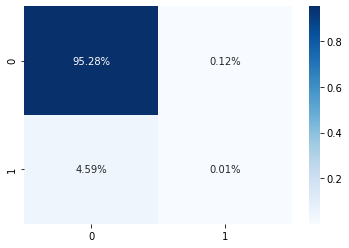

In [19]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

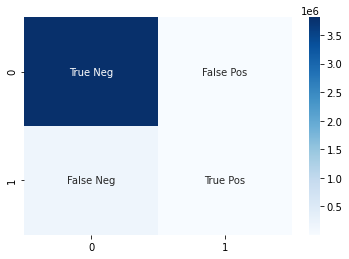

In [22]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [18]:
sum(sum(cf_matrix))

4000000

In [16]:
precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1]) # точность
recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0]) # полнота
print('Точность = ' , precision, '\n', 'Полнота = ' , recall)

Точность =  0.0713595049313479 
 Полнота =  0.0020054129846414715


In [20]:
accuracy = (cf_matrix[1][1] + cf_matrix[0][0]) / sum(sum(cf_matrix))
accuracy

0.95289125

In [14]:
res_log_reg = (Y_pred_proba.T)[1]
res_log_reg

array([0.11676277, 0.11333356, 0.08860585, ..., 0.01717883, 0.02070301,
       0.02242154])

In [15]:
res_df_log_reg = test_data.copy()
res_df_log_reg['pred'] = res_log_reg
res_df_log_reg

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                      8   
3999996  be5f7449475941f1b3d1f96713d54fbd                      8   
3999997  be5f7449475941f1b3d1f96713d54fbd                      8   
3999998  be5f7449475941f1b3d1f96713d54fbd                      8   
3999999  be5f7449475941f1b3d1f96713d54fbd                      8   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
3999995                     248                                    0   
3999996                     248                                    0   
3999997                     248                                    0   
3999998                     248                                    0   
3999999                     248                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
3999995                             256                            41   
3999996                             256                            41   
3999997                             256                            41   
3999998                             256                            41   
3999999                             256                            41   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [16]:
res_df_log_reg.drop(list(res_df_log_reg.columns[1:137]), axis=1, inplace=True)
res_df_log_reg

id_user  project_has_audio  \
0        6f85f6ebde824f6dadcd516769de0729                  0   
1        6f85f6ebde824f6dadcd516769de0729                  0   
2        6f85f6ebde824f6dadcd516769de0729                  0   
3        6f85f6ebde824f6dadcd516769de0729                  0   
4        6f85f6ebde824f6dadcd516769de0729                  0   
...                                   ...                ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                  0   
3999996  be5f7449475941f1b3d1f96713d54fbd                  3   
3999997  be5f7449475941f1b3d1f96713d54fbd                  0   
3999998  be5f7449475941f1b3d1f96713d54fbd                  0   
3999999  be5f7449475941f1b3d1f96713d54fbd                  0   

         project_has_button  project_has_buttonClicked_input  \
0                         1                                0   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         2                                0   
...                     ...                              ...   
3999995                   0                                0   
3999996                   0                                0   
3999997                   7                                0   
3999998                   0                                0   
3999999                   0                                0   

         project_has_checkbox_input  project_has_externalHtml  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   
...                             ...                       ...   
3999995                           0                         0   
3999996                           0                         0   
3999997                           0                         0   
3999998                           0                         0   
3999999                           0                         0   

         project_has_fileAudio_input  project_has_fileImg_input  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
3999995                            0                          0   
3999996                            0                          0   
3999997                            0                          0   
3999998                            0                          0   
3999999                            0                          0   

         project_has_fileVideo_input  project_has_file_input  ...  \
0                                  0                       0  ...   
1                                  0                       0  ...   
2                                  0                       0  ...   
3                                  0                       0  ...   
4                                  0                       0  ...   
...                              ...                     ...  ...   
3999995                            0                       0  ...   
3999996                            0                       0  ...   
3999997                            0                       0  ...   
3999998                            0                       0  ...   
3999999                            0                       0  ...   

         project_has_suggest_input  project_has_textarea_input  \
0              

In [18]:
projects.head()

project_creation_timestamp  project_has_audio  project_has_button  \
0                  1428398401                  0                   1   
1                  1436341103                  0                   0   
2                  1437037937                  0                   0   
3                  1439365405                  0                   0   
4                  1439968554                  0                   1   

   project_has_buttonClicked_input  project_has_checkbox_input  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   project_has_externalHtml  project_has_fileAudio_input  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   project_has_fileImg_input  project_has_fileVideo_input  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   project_has_file_input  ...  project_has_suggest_input  \
0                       0  ...                          0   
1                       0  ...                          0   
2                       0  ...                          0   
3                       0  ...                          0   
4                       0  ...                          0   

   project_has_textarea_input  project_has_video  project_id  \
0                           0                  0           1   
1                           0                  0           2   
2                           0                  0           3   
3                           0                  0           4   
4                           0                  0           5   

   project_instruction_FK  project_instruction_language  \
0               20.068254                            ru   
1               31.446345                            ru   
2              -43.736713                            ru   
3               16.488188                            ru   
4               17.768214                            ru   

   project_instruction_len  project_instruction_wordCount  \
0                   3208.0                          319.0   
1                   3289.0                          312.0   
2                   6288.0                          637.0   
3                   4369.0                          460.0   
4                  38650.0                         3565.0   

   project_required_fields  project_spec_length  
0                        1                 1196  
1                        1                 1663  
2                        1                 2483  
3                        1                  635  
4                        1                 9527  

[5 rows x 28 columns]

In [19]:
projects_help = projects.copy()
proj_id = projects_help['project_id']
projects_help.drop(['project_creation_timestamp', 'project_instruction_language', 'project_id'], axis=1, inplace=True)
projects_help['project_id'] = proj_id
projects_help

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                    0                   1                                0   
1                    0                   0                                0   
2                    0                   0                                0   
3                    0                   0                                0   
4                    0                   1                                0   
..                 ...                 ...                              ...   
762                  0                   0                                0   
763                  0                   0                                0   
764                  0                   0                                0   
765                  0                   0                                0   
766                  0                   0                                0   

     project_has_checkbox_input  project_has_externalHtml  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
..                          ...                       ...   
762                           0                         0   
763                           0                         0   
764                           0                         0   
765                           0                         0   
766                           3                         0   

     project_has_fileAudio_input  project_has_fileImg_input  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
..                           ...                        ...   
762                            0                          0   
763                            0                          0   
764                            0                          0   
765                            0                          0   
766                            0                          0   

     project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                              0                       0                   0   
1                              0                       0                   0   
2                              0                       0                   0   
3                              0                       0                   0   
4                              0                       0                   0   
..                           ...                     ...                 ...   
762                            0                       0                   0   
763                            0                       0                   0   
764                            0                       0                   0   
765                            0                       0                   0   
766                            0                       0                   0   

     ...  project_has_string_input  project_has_suggest_input  \
0    ...                         0                          0   
1    ...                         2                          0   
2    ...                         0                          0   
3    ...                         0                          0   
4    ...                         0                          0   
..   ...                       ...                        ...   
762  ...                         0                          0   
763  ...                         0                          0   
764  ...            

In [20]:
res_with_proj_id_log_reg = (res_df_log_reg.merge(projects_help)).dropna()

In [21]:
res_with_proj_id_log_reg.drop(projects_help.drop('project_id', axis=1).columns, axis=1, inplace=True)
res_with_proj_id_log_reg.head()

id_user  Y      pred  project_id
0  6f85f6ebde824f6dadcd516769de0729  0  0.116763           1
1  cb7856e5b0754237b88c651542c08945  0  0.028497           1
2  e91ee55da67e4d819229cfd7121923af  0  0.158701           1
3  e51d252ef8b644babe18a26cca87c114  0  0.100119           1
4  75cf29a9ad9043bcb3702de0b8f261f9  0  0.088455           1

Составим список уникальных пользователей

In [22]:
res_log_reg_users = res_with_proj_id_log_reg['id_user'].unique()
res_log_reg_users

array(['6f85f6ebde824f6dadcd516769de0729',
       'cb7856e5b0754237b88c651542c08945',
       'e91ee55da67e4d819229cfd7121923af', ...,
       '840d29dcee2241d4a9d017be838304b5',
       '301461bc5c654538a2d39bcf8bb01455',
       'd1e2aa846adf4540ad1dc73124b8536c'], dtype=object)

Рассмотрим все записи, соответствующие одному пользователю.

In [29]:
(res_with_proj_id_log_reg[res_with_proj_id_log_reg['id_user'] == res_log_reg_users[0]].sort_values('pred', ascending=False)).head(10)

id_user  Y      pred  project_id
1049679  6f85f6ebde824f6dadcd516769de0729  0  0.152749         422
1118080  6f85f6ebde824f6dadcd516769de0729  0  0.150745         458
1559666  6f85f6ebde824f6dadcd516769de0729  0  0.150683         609
799144   6f85f6ebde824f6dadcd516769de0729  0  0.150343         322
2019871  6f85f6ebde824f6dadcd516769de0729  0  0.150276         728
1549329  6f85f6ebde824f6dadcd516769de0729  0  0.150147         600
1006384  6f85f6ebde824f6dadcd516769de0729  0  0.149673         403
1626650  6f85f6ebde824f6dadcd516769de0729  0  0.149534         641
1958575  6f85f6ebde824f6dadcd516769de0729  0  0.149475         701
2024954  6f85f6ebde824f6dadcd516769de0729  0  0.149472         729

In [30]:
# расчитаем средний акураси для 10 первых проектов 
accuracy_top10_log_reg = []
for i in res_log_reg_users:
    mean_log_reg = (res_with_proj_id_log_reg[res_with_proj_id_log_reg['id_user'] == i].sort_values('pred', ascending=False)).head(10)['Y'].mean()
    accuracy_top10_log_reg.append(mean_log_reg)

In [33]:
np.array(accuracy_top10_log_reg).mean() # среднее количество верно рекомендованных среди первых десяти

0.011509026687598114

## kNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
kNN = KNeighborsClassifier(n_neighbors=15).fit(X_train, Y_train)

In [29]:
dump(kNN, 'kNN.joblib')

['kNN.joblib']

In [6]:
kNN = load('kNN.joblib')

In [9]:
Y_pred = kNN.predict(X_test)

KeyboardInterrupt: 

In [ ]:
accuracy_score(Y_test, Y_pred)

In [ ]:
cf_matrix_kNN = confusion_matrix(Y_test, Y_pred)
cf_matrix_kNN

In [ ]:
sns.heatmap(cf_matrix_kNN/np.sum(cf_matrix_kNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
classification_report(Y_test, Y_pred)

## Случайный лес

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
tree_model = RandomForestClassifier(max_depth=8).fit(X_train, Y_train)

In [7]:
dump(tree_model, 'tree_model.joblib')

['tree_model.joblib']

In [47]:
tree_model = load('tree_model.joblib')

In [48]:
Y_pred = tree_model.predict(X_test)

In [48]:
Y_pred_proba = tree_model.predict_proba(X_test)

In [10]:
(Y_pred_proba.T)[1] # Вероятность единицы

array([0.03106233, 0.02665291, 0.03154999, ..., 0.03873661, 0.03577542,
       0.04071179])

In [11]:
best_recomends = nlargest(10, list((Y_pred_proba.T)[1]))
best_recomends

[0.29947049666337533,
 0.29483917306069385,
 0.2871840287731405,
 0.2860559006447967,
 0.28554546684982574,
 0.28012866804497794,
 0.2784838505297941,
 0.27661058689200524,
 0.2741092327436775,
 0.27362730903061394]

In [50]:
roc_auc_score(Y_test,(Y_pred_proba.T)[1])

0.7808646274624145

In [11]:
accuracy_score(Y_test, Y_pred)

0.9539995

In [12]:
cf_matrix_tree = confusion_matrix(Y_test, Y_pred)
cf_matrix_tree

array([[3815998,       0],
       [ 184002,       0]], dtype=int64)

<AxesSubplot:>

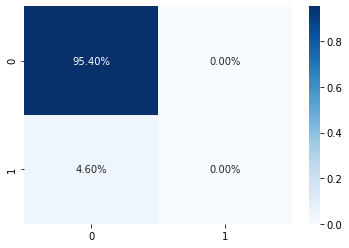

In [13]:
sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True, 
            fmt='.2%', cmap='Blues')

In [49]:
res_RF = (Y_pred_proba.T)[1]
res_RF

array([0.03106233, 0.02665291, 0.03154999, ..., 0.03873661, 0.03577542,
       0.04071179])

In [50]:
res_df_RF = test_data.copy()
res_df_RF['pred'] = res_RF
res_df_RF

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                      8   
3999996  be5f7449475941f1b3d1f96713d54fbd                      8   
3999997  be5f7449475941f1b3d1f96713d54fbd                      8   
3999998  be5f7449475941f1b3d1f96713d54fbd                      8   
3999999  be5f7449475941f1b3d1f96713d54fbd                      8   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
3999995                     248                                    0   
3999996                     248                                    0   
3999997                     248                                    0   
3999998                     248                                    0   
3999999                     248                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
3999995                             256                            41   
3999996                             256                            41   
3999997                             256                            41   
3999998                             256                            41   
3999999                             256                            41   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [51]:
res_df_RF.drop(list(res_df_RF.columns[1:137]), axis=1, inplace=True)
res_df_RF

id_user  project_has_audio  \
0        6f85f6ebde824f6dadcd516769de0729                  0   
1        6f85f6ebde824f6dadcd516769de0729                  0   
2        6f85f6ebde824f6dadcd516769de0729                  0   
3        6f85f6ebde824f6dadcd516769de0729                  0   
4        6f85f6ebde824f6dadcd516769de0729                  0   
...                                   ...                ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                  0   
3999996  be5f7449475941f1b3d1f96713d54fbd                  3   
3999997  be5f7449475941f1b3d1f96713d54fbd                  0   
3999998  be5f7449475941f1b3d1f96713d54fbd                  0   
3999999  be5f7449475941f1b3d1f96713d54fbd                  0   

         project_has_button  project_has_buttonClicked_input  \
0                         1                                0   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         2                                0   
...                     ...                              ...   
3999995                   0                                0   
3999996                   0                                0   
3999997                   7                                0   
3999998                   0                                0   
3999999                   0                                0   

         project_has_checkbox_input  project_has_externalHtml  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   
...                             ...                       ...   
3999995                           0                         0   
3999996                           0                         0   
3999997                           0                         0   
3999998                           0                         0   
3999999                           0                         0   

         project_has_fileAudio_input  project_has_fileImg_input  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
3999995                            0                          0   
3999996                            0                          0   
3999997                            0                          0   
3999998                            0                          0   
3999999                            0                          0   

         project_has_fileVideo_input  project_has_file_input  ...  \
0                                  0                       0  ...   
1                                  0                       0  ...   
2                                  0                       0  ...   
3                                  0                       0  ...   
4                                  0                       0  ...   
...                              ...                     ...  ...   
3999995                            0                       0  ...   
3999996                            0                       0  ...   
3999997                            0                       0  ...   
3999998                            0                       0  ...   
3999999                            0                       0  ...   

         project_has_suggest_input  project_has_textarea_input  \
0              

In [52]:
res_with_proj_id_RF = (res_df_RF.merge(projects_help)).dropna()

In [53]:
res_with_proj_id_RF.drop(projects_help.drop('project_id', axis=1).columns, axis=1, inplace=True)
res_with_proj_id_RF.head()

id_user  Y      pred  project_id
0  6f85f6ebde824f6dadcd516769de0729  0  0.031062           1
1  cb7856e5b0754237b88c651542c08945  0  0.098248           1
2  e91ee55da67e4d819229cfd7121923af  0  0.035560           1
3  e51d252ef8b644babe18a26cca87c114  0  0.074750           1
4  75cf29a9ad9043bcb3702de0b8f261f9  0  0.051467           1

Составим список уникальных пользователей

In [54]:
res_RF_users = res_with_proj_id_RF['id_user'].unique()
res_RF_users

array(['6f85f6ebde824f6dadcd516769de0729',
       'cb7856e5b0754237b88c651542c08945',
       'e91ee55da67e4d819229cfd7121923af', ...,
       '840d29dcee2241d4a9d017be838304b5',
       '301461bc5c654538a2d39bcf8bb01455',
       'd1e2aa846adf4540ad1dc73124b8536c'], dtype=object)

Рассмотрим все записи, соответствующие одному пользователю.

In [55]:
(res_with_proj_id_RF[res_with_proj_id_RF['id_user'] == res_RF_users[0]].sort_values('pred', ascending=False)).head(10)

id_user  Y      pred  project_id
562349   6f85f6ebde824f6dadcd516769de0729  1  0.100907         218
589249   6f85f6ebde824f6dadcd516769de0729  1  0.096428         224
118943   6f85f6ebde824f6dadcd516769de0729  0  0.061072          40
356714   6f85f6ebde824f6dadcd516769de0729  0  0.050349         138
54929    6f85f6ebde824f6dadcd516769de0729  0  0.050314          19
831722   6f85f6ebde824f6dadcd516769de0729  0  0.049494         332
772472   6f85f6ebde824f6dadcd516769de0729  0  0.041570         312
1042799  6f85f6ebde824f6dadcd516769de0729  1  0.040875         418
156492   6f85f6ebde824f6dadcd516769de0729  0  0.040578          53
92601    6f85f6ebde824f6dadcd516769de0729  0  0.040513          32

In [56]:
# расчитаем средний акураси для 10 первых проектов 
accuracy_top10_RF = []
for i in res_RF_users:
    mean_RF = (res_with_proj_id_RF[res_with_proj_id_RF['id_user'] == i].sort_values('pred', ascending=False)).head(10)['Y'].mean()
    accuracy_top10_RF.append(mean_RF)

In [57]:
np.array(accuracy_top10_RF).mean() # среднее количество верно рекомендованных среди первых десяти

0.2872841444270015

## Дерево решений

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
decision_tree_model = DecisionTreeClassifier().fit(X_train, Y_train)

In [8]:
dump(decision_tree_model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [34]:
decision_tree_model = load('decision_tree_model.joblib')

In [13]:
Y_pred = decision_tree_model.predict(X_test)

In [35]:
Y_pred_proba = decision_tree_model.predict_proba(X_test)

In [15]:
(Y_pred_proba.T)[1] # Вероятность единицы

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
best_recomends = nlargest(10, list((Y_pred_proba.T)[1]))
best_recomends

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [17]:
# индексы лучших проектов
[list((Y_pred_proba.T)[1]).index(i) for i in best_recomends]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [53]:
roc_auc_score(Y_test,(Y_pred_proba.T)[1])

0.6417670701794351

In [18]:
accuracy_score(Y_test, Y_pred)

0.9329045

In [19]:
cf_matrix_decision_tree = confusion_matrix(Y_test, Y_pred)
cf_matrix_decision_tree

array([[3673376,  142622],
       [ 125760,   58242]], dtype=int64)

<AxesSubplot:>

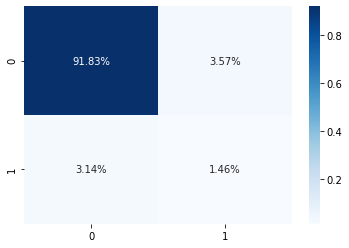

In [20]:
sns.heatmap(cf_matrix_decision_tree/np.sum(cf_matrix_decision_tree), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
res_DT = (Y_pred_proba.T)[1]
res_DT

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
res_df_DT = test_data.copy()
res_df_DT['pred'] = res_DT
res_df_DT

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                      8   
3999996  be5f7449475941f1b3d1f96713d54fbd                      8   
3999997  be5f7449475941f1b3d1f96713d54fbd                      8   
3999998  be5f7449475941f1b3d1f96713d54fbd                      8   
3999999  be5f7449475941f1b3d1f96713d54fbd                      8   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
3999995                     248                                    0   
3999996                     248                                    0   
3999997                     248                                    0   
3999998                     248                                    0   
3999999                     248                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
3999995                             256                            41   
3999996                             256                            41   
3999997                             256                            41   
3999998                             256                            41   
3999999                             256                            41   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [40]:
res_df_DT.drop(list(res_df_DT.columns[1:137]), axis=1, inplace=True)
res_df_DT

id_user  project_has_audio  \
0        6f85f6ebde824f6dadcd516769de0729                  0   
1        6f85f6ebde824f6dadcd516769de0729                  0   
2        6f85f6ebde824f6dadcd516769de0729                  0   
3        6f85f6ebde824f6dadcd516769de0729                  0   
4        6f85f6ebde824f6dadcd516769de0729                  0   
...                                   ...                ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                  0   
3999996  be5f7449475941f1b3d1f96713d54fbd                  3   
3999997  be5f7449475941f1b3d1f96713d54fbd                  0   
3999998  be5f7449475941f1b3d1f96713d54fbd                  0   
3999999  be5f7449475941f1b3d1f96713d54fbd                  0   

         project_has_button  project_has_buttonClicked_input  \
0                         1                                0   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         2                                0   
...                     ...                              ...   
3999995                   0                                0   
3999996                   0                                0   
3999997                   7                                0   
3999998                   0                                0   
3999999                   0                                0   

         project_has_checkbox_input  project_has_externalHtml  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   
...                             ...                       ...   
3999995                           0                         0   
3999996                           0                         0   
3999997                           0                         0   
3999998                           0                         0   
3999999                           0                         0   

         project_has_fileAudio_input  project_has_fileImg_input  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
3999995                            0                          0   
3999996                            0                          0   
3999997                            0                          0   
3999998                            0                          0   
3999999                            0                          0   

         project_has_fileVideo_input  project_has_file_input  ...  \
0                                  0                       0  ...   
1                                  0                       0  ...   
2                                  0                       0  ...   
3                                  0                       0  ...   
4                                  0                       0  ...   
...                              ...                     ...  ...   
3999995                            0                       0  ...   
3999996                            0                       0  ...   
3999997                            0                       0  ...   
3999998                            0                       0  ...   
3999999                            0                       0  ...   

         project_has_suggest_input  project_has_textarea_input  \
0              

In [41]:
res_with_proj_id_DT = (res_df_DT.merge(projects_help)).dropna()

In [42]:
res_with_proj_id_DT.drop(projects_help.drop('project_id', axis=1).columns, axis=1, inplace=True)
res_with_proj_id_DT.head()

id_user  Y  pred  project_id
0  6f85f6ebde824f6dadcd516769de0729  0   0.0           1
1  cb7856e5b0754237b88c651542c08945  0   0.0           1
2  e91ee55da67e4d819229cfd7121923af  0   0.0           1
3  e51d252ef8b644babe18a26cca87c114  0   0.0           1
4  75cf29a9ad9043bcb3702de0b8f261f9  0   1.0           1

Составим список уникальных пользователей

In [43]:
res_DT_users = res_with_proj_id_DT['id_user'].unique()
res_DT_users

array(['6f85f6ebde824f6dadcd516769de0729',
       'cb7856e5b0754237b88c651542c08945',
       'e91ee55da67e4d819229cfd7121923af', ...,
       '840d29dcee2241d4a9d017be838304b5',
       '301461bc5c654538a2d39bcf8bb01455',
       'd1e2aa846adf4540ad1dc73124b8536c'], dtype=object)

Рассмотрим все записи, соответствующие одному пользователю.

In [44]:
(res_with_proj_id_DT[res_with_proj_id_DT['id_user'] == res_DT_users[0]].sort_values('pred', ascending=False)).head(10)

id_user  Y  pred  project_id
985339   6f85f6ebde824f6dadcd516769de0729  0   1.0         395
48279    6f85f6ebde824f6dadcd516769de0729  0   1.0          18
1333275  6f85f6ebde824f6dadcd516769de0729  0   1.0         540
1349816  6f85f6ebde824f6dadcd516769de0729  0   1.0         544
124373   6f85f6ebde824f6dadcd516769de0729  0   1.0          41
346351   6f85f6ebde824f6dadcd516769de0729  0   1.0         132
442343   6f85f6ebde824f6dadcd516769de0729  0   1.0         175
325161   6f85f6ebde824f6dadcd516769de0729  0   1.0         123
1042799  6f85f6ebde824f6dadcd516769de0729  1   1.0         418
1538412  6f85f6ebde824f6dadcd516769de0729  0   1.0         596

In [45]:
# расчитаем средний акураси для 10 первых проектов 
accuracy_top10_DT = []
for i in res_DT_users:
    mean_DT = (res_with_proj_id_DT[res_with_proj_id_DT['id_user'] == i].sort_values('pred', ascending=False)).head(10)['Y'].mean()
    accuracy_top10_DT.append(mean_DT)

In [46]:
np.array(accuracy_top10_DT).mean() # среднее количество верно рекомендованных среди первых десяти

0.22855180533751962

## Градиентный бустинг

In [241]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gb_model1 = GradientBoostingClassifier(n_estimators=200, subsample=0.6, max_depth=8, verbose=1).fit(X_train, Y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3207           0.0177          261.62m
         2           0.3113           0.0087          254.38m
         3           0.3050           0.0062          245.50m
         4           0.3001           0.0054          242.11m
         5           0.2948           0.0045          238.00m
         6           0.2898           0.0047          234.93m
         7           0.2855           0.0037          231.80m
         8           0.2826           0.0036          231.06m
         9           0.2778           0.0047          231.19m
        10           0.2741           0.0031          229.99m
        20           0.2521           0.0019          216.80m
        30           0.2400           0.0007          218.68m
        40           0.2289           0.0012          202.29m
        50           0.2225           0.0003          186.44m
        60           0.2185           0.0004          174.32m
       

In [16]:
gb_model2 = GradientBoostingClassifier(loss='exponential', n_estimators=200, subsample=0.6, max_depth=8, verbose=1).fit(X_train, Y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3842           0.0096          222.91m
         2           0.3748           0.0089          226.00m
         3           0.3676           0.0075          222.60m
         4           0.3610           0.0066          217.58m
         5           0.3552           0.0059          213.03m
         6           0.3501           0.0052          209.85m
         7           0.3447           0.0049          207.42m
         8           0.3400           0.0048          205.91m
         9           0.3348           0.0052          205.08m
        10           0.3308           0.0041          204.16m
        20           0.3001           0.0021          188.77m
        30           0.2815           0.0016          177.58m
        40           0.2687           0.0012          166.95m
        50           0.2578           0.0005          156.25m
        60           0.2511           0.0004          146.15m
       

In [20]:
gb_model3 = GradientBoostingClassifier(n_estimators=250, subsample=0.6, max_depth=10, random_state=7, verbose=1).fit(X_train, Y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3145           0.0229          382.57m
         2           0.3011           0.0118          379.53m
         3           0.2895           0.0111          383.55m
         4           0.2826           0.0079          381.76m
         5           0.2754           0.0057          376.28m
         6           0.2716           0.0047          371.74m
         7           0.2665           0.0044          367.16m
         8           0.2620           0.0043          362.50m
         9           0.2579           0.0038          358.58m
        10           0.2545           0.0027          352.87m
        20           0.2286           0.0014          329.37m
        30           0.2163           0.0007          311.38m
        40           0.2067          -0.0228          294.99m
        50           0.1996           0.0005          280.52m
        60           0.2617          -0.0000          265.10m
       

In [21]:
gb_model4 = GradientBoostingClassifier(loss='exponential', n_estimators=250, subsample=0.6, max_depth=10, random_state=7, verbose=1).fit(X_train, Y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3822           0.0118          365.23m
         2           0.3700           0.0111          369.77m
         3           0.3596           0.0101          368.46m
         4           0.3522           0.0083          363.37m
         5           0.3432           0.0079          361.59m
         6           0.3374           0.0065          358.12m
         7           0.3309           0.0061          352.74m
         8           0.3252           0.0056          348.71m
         9           0.3207           0.0044          343.51m
        10           0.3160           0.0042          341.20m
        20           0.2799           0.0019          320.45m
        30           0.2584           0.0019          302.14m
        40           0.2444           0.0014          286.62m
        50           0.2344           0.0004          272.46m
        60           0.2272           0.0003          257.89m
       

In [22]:
dump(gb_model1, 'gb_model1.joblib')
dump(gb_model2, 'gb_model2.joblib')
dump(gb_model3, 'gb_model3.joblib')
dump(gb_model4, 'gb_model4.joblib')

['gb_model4.joblib']

In [7]:
gb_model1 = load('gb_model1.joblib')
gb_model2 = load('gb_model2.joblib')
gb_model3 = load('gb_model3.joblib')
gb_model4 = load('gb_model4.joblib')

In [8]:
gb_model4 = load('gb_model4.joblib')
Y_pred_proba4 = gb_model4.predict_proba(X_test)

In [8]:
Y_pred1 = gb_model1.predict(X_test)
Y_pred2 = gb_model2.predict(X_test)
Y_pred3 = gb_model3.predict(X_test)
Y_pred4 = gb_model4.predict(X_test)

In [9]:
Y_pred_proba1 = gb_model1.predict_proba(X_test)
Y_pred_proba2 = gb_model2.predict_proba(X_test)
Y_pred_proba3 = gb_model3.predict_proba(X_test)
Y_pred_proba4 = gb_model4.predict_proba(X_test)

In [10]:
roc_auc1 = roc_auc_score(Y_test,(Y_pred_proba1.T)[1])
roc_auc2 = roc_auc_score(Y_test,(Y_pred_proba2.T)[1])
roc_auc3 = roc_auc_score(Y_test,(Y_pred_proba3.T)[1])
roc_auc4 = roc_auc_score(Y_test,(Y_pred_proba4.T)[1])
roc_auc1, roc_auc2, roc_auc3, roc_auc4

(0.890454707211866, 0.8933307264359966, 0.8927881206072589, 0.8962328838463572)

In [24]:
(Y_pred_proba1.T)[1] # Вероятность единицы

array([0.01670018, 0.02149966, 0.00429444, ..., 0.00149297, 0.03858213,
       0.00522363])

In [25]:
(Y_pred_proba2.T)[1] # Вероятность единицы

array([0.01575546, 0.0142346 , 0.00162401, ..., 0.00015622, 0.04308896,
       0.0030046 ])

In [26]:
(Y_pred_proba3.T)[1] # Вероятность единицы

array([0.02200077, 0.01617109, 0.00314485, ..., 0.00099544, 0.06844433,
       0.00246531])

In [27]:
(Y_pred_proba4.T)[1] # Вероятность единицы

array([1.23508064e-02, 8.23130368e-03, 9.74524686e-04, ...,
       4.79901423e-05, 2.63204730e-02, 4.97147435e-04])

In [28]:
best_recomends1 = nlargest(10, list((Y_pred_proba1.T)[1]))
best_recomends2 = nlargest(10, list((Y_pred_proba2.T)[1]))
best_recomends3 = nlargest(10, list((Y_pred_proba3.T)[1]))
best_recomends4 = nlargest(10, list((Y_pred_proba4.T)[1]))
best_recomends1, best_recomends2, best_recomends3, best_recomends4

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.9937834647767455,
  0.9828027060323349,
  0.976001300855581,
  0.9750359570964235,
  0.9688665955627311,
  0.9683383153680719,
  0.966347097591809,
  0.9657463530112123,
  0.964768227796147,
  0.963499591107484],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.9983471428226652,
  0.9959902495464286,
  0.9938147139760283,
  0.9921629299948408,
  0.9907036744400155,
  0.9901327120206784,
  0.9896323794406231,
  0.98956575540463,
  0.9895051408091371,
  0.9891580565129258])

In [29]:
# индексы лучших проектов
[list((Y_pred_proba1.T)[1]).index(i) for i in best_recomends1]

[20784, 20784, 20784, 20784, 20784, 20784, 20784, 20784, 20784, 20784]

In [30]:
[list((Y_pred_proba2.T)[1]).index(i) for i in best_recomends2]

[3626710,
 1434774,
 761715,
 2143458,
 1265755,
 373219,
 1911801,
 1523196,
 3116066,
 1542759]

In [31]:
[list((Y_pred_proba3.T)[1]).index(i) for i in best_recomends3]

[463454,
 463454,
 463454,
 463454,
 463454,
 463454,
 463454,
 463454,
 463454,
 463454]

In [32]:
[list((Y_pred_proba4.T)[1]).index(i) for i in best_recomends4]

[1434774,
 2137184,
 232270,
 2169912,
 302001,
 761715,
 2295498,
 1420673,
 108163,
 547005]

In [33]:
accuracy_score(Y_test, Y_pred1), accuracy_score(Y_test, Y_pred2), accuracy_score(Y_test, Y_pred3), accuracy_score(Y_test, Y_pred4)

(0.95431025, 0.95636975, 0.95314875, 0.956751)

In [34]:
cf_matrix1 = confusion_matrix(Y_test, Y_pred1)
cf_matrix2 = confusion_matrix(Y_test, Y_pred2)
cf_matrix3 = confusion_matrix(Y_test, Y_pred3)
cf_matrix4 = confusion_matrix(Y_test, Y_pred4)
cf_matrix1, cf_matrix2, cf_matrix3, cf_matrix4

(array([[3785847,   30151],
        [ 152608,   31394]], dtype=int64),
 array([[3802036,   13962],
        [ 160559,   23443]], dtype=int64),
 array([[3775169,   40829],
        [ 146576,   37426]], dtype=int64),
 array([[3798183,   17815],
        [ 155181,   28821]], dtype=int64))

<AxesSubplot:>

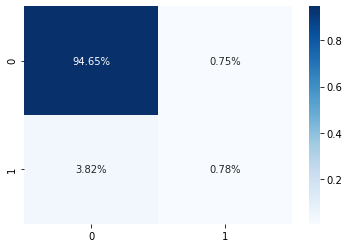

In [35]:
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

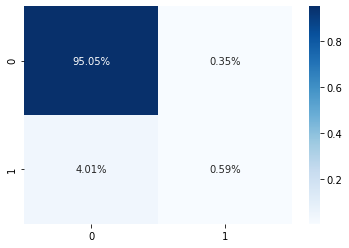

In [36]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

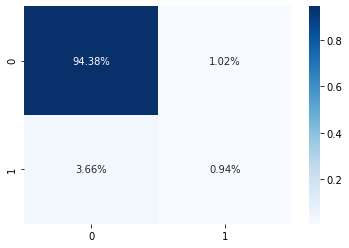

In [37]:
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

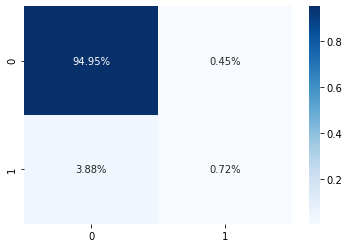

In [38]:
sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True, 
            fmt='.2%', cmap='Blues')

In [60]:
res_GB = (Y_pred_proba4.T)[1]
res_GB

array([1.23508064e-02, 8.23130368e-03, 9.74524686e-04, ...,
       4.79901423e-05, 2.63204730e-02, 4.97147435e-04])

In [61]:
res_df_GB = test_data.copy()
res_df_GB['pred'] = res_GB
res_df_GB

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                      8   
3999996  be5f7449475941f1b3d1f96713d54fbd                      8   
3999997  be5f7449475941f1b3d1f96713d54fbd                      8   
3999998  be5f7449475941f1b3d1f96713d54fbd                      8   
3999999  be5f7449475941f1b3d1f96713d54fbd                      8   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
3999995                     248                                    0   
3999996                     248                                    0   
3999997                     248                                    0   
3999998                     248                                    0   
3999999                     248                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
3999995                             256                            41   
3999996                             256                            41   
3999997                             256                            41   
3999998                             256                            41   
3999999                             256                            41   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [62]:
res_df_GB.drop(list(res_df_GB.columns[1:137]), axis=1, inplace=True)
res_df_GB

id_user  project_has_audio  \
0        6f85f6ebde824f6dadcd516769de0729                  0   
1        6f85f6ebde824f6dadcd516769de0729                  0   
2        6f85f6ebde824f6dadcd516769de0729                  0   
3        6f85f6ebde824f6dadcd516769de0729                  0   
4        6f85f6ebde824f6dadcd516769de0729                  0   
...                                   ...                ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                  0   
3999996  be5f7449475941f1b3d1f96713d54fbd                  3   
3999997  be5f7449475941f1b3d1f96713d54fbd                  0   
3999998  be5f7449475941f1b3d1f96713d54fbd                  0   
3999999  be5f7449475941f1b3d1f96713d54fbd                  0   

         project_has_button  project_has_buttonClicked_input  \
0                         1                                0   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         2                                0   
...                     ...                              ...   
3999995                   0                                0   
3999996                   0                                0   
3999997                   7                                0   
3999998                   0                                0   
3999999                   0                                0   

         project_has_checkbox_input  project_has_externalHtml  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   
...                             ...                       ...   
3999995                           0                         0   
3999996                           0                         0   
3999997                           0                         0   
3999998                           0                         0   
3999999                           0                         0   

         project_has_fileAudio_input  project_has_fileImg_input  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
3999995                            0                          0   
3999996                            0                          0   
3999997                            0                          0   
3999998                            0                          0   
3999999                            0                          0   

         project_has_fileVideo_input  project_has_file_input  ...  \
0                                  0                       0  ...   
1                                  0                       0  ...   
2                                  0                       0  ...   
3                                  0                       0  ...   
4                                  0                       0  ...   
...                              ...                     ...  ...   
3999995                            0                       0  ...   
3999996                            0                       0  ...   
3999997                            0                       0  ...   
3999998                            0                       0  ...   
3999999                            0                       0  ...   

         project_has_suggest_input  project_has_textarea_input  \
0              

In [63]:
res_with_proj_id_GB = (res_df_GB.merge(projects_help)).dropna()

In [64]:
res_with_proj_id_GB.drop(projects_help.drop('project_id', axis=1).columns, axis=1, inplace=True)
res_with_proj_id_GB.head()

id_user  Y      pred  project_id
0  6f85f6ebde824f6dadcd516769de0729  0  0.012351           1
1  cb7856e5b0754237b88c651542c08945  0  0.132654           1
2  e91ee55da67e4d819229cfd7121923af  0  0.014102           1
3  e51d252ef8b644babe18a26cca87c114  0  0.055674           1
4  75cf29a9ad9043bcb3702de0b8f261f9  0  0.048911           1

Составим список уникальных пользователей

In [65]:
res_GB_users = res_with_proj_id_GB['id_user'].unique()
res_GB_users

array(['6f85f6ebde824f6dadcd516769de0729',
       'cb7856e5b0754237b88c651542c08945',
       'e91ee55da67e4d819229cfd7121923af', ...,
       '840d29dcee2241d4a9d017be838304b5',
       '301461bc5c654538a2d39bcf8bb01455',
       'd1e2aa846adf4540ad1dc73124b8536c'], dtype=object)

Рассмотрим все записи, соответствующие одному пользователю.

In [66]:
(res_with_proj_id_GB[res_with_proj_id_GB['id_user'] == res_GB_users[0]].sort_values('pred', ascending=False)).head(10)

id_user  Y      pred  project_id
76717    6f85f6ebde824f6dadcd516769de0729  1  0.454064          26
31667    6f85f6ebde824f6dadcd516769de0729  1  0.333280          12
1042799  6f85f6ebde824f6dadcd516769de0729  1  0.327464         418
1333275  6f85f6ebde824f6dadcd516769de0729  0  0.284129         540
308303   6f85f6ebde824f6dadcd516769de0729  0  0.263758         119
48279    6f85f6ebde824f6dadcd516769de0729  0  0.245961          18
589249   6f85f6ebde824f6dadcd516769de0729  1  0.234859         224
346351   6f85f6ebde824f6dadcd516769de0729  0  0.234003         132
213953   6f85f6ebde824f6dadcd516769de0729  0  0.194505          74
772472   6f85f6ebde824f6dadcd516769de0729  0  0.156239         312

In [67]:
# расчитаем средний акураси для 10 первых проектов 
accuracy_top10_GB = []
for i in res_GB_users:
    mean_GB = (res_with_proj_id_GB[res_with_proj_id_GB['id_user'] == i].sort_values('pred', ascending=False)).head(10)['Y'].mean()
    accuracy_top10_GB.append(mean_GB)

In [68]:
np.array(accuracy_top10_GB).mean() # среднее количество верно рекомендованных среди первых десяти

0.40469976452119316

## Проверка рекомендаций

Будем идти по каждому пользователю и определять для него все вероятности единиц, которые соответствуют проектам. Потом выбираем 10 проектов, которые пользователю рекомендуют и для этих проверок смотрим в действительности выполнил пользователь проект или нет.

In [9]:
res = (Y_pred_proba4.T)[1]
res

array([1.23508064e-02, 8.23130368e-03, 9.74524686e-04, ...,
       4.79901423e-05, 2.63204730e-02, 4.97147435e-04])

In [10]:
res_df = test_data.copy()
res_df['pred'] = res
res_df

id_user  project_has_audio_sum  \
0        6f85f6ebde824f6dadcd516769de0729                      0   
1        6f85f6ebde824f6dadcd516769de0729                      0   
2        6f85f6ebde824f6dadcd516769de0729                      0   
3        6f85f6ebde824f6dadcd516769de0729                      0   
4        6f85f6ebde824f6dadcd516769de0729                      0   
...                                   ...                    ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                      8   
3999996  be5f7449475941f1b3d1f96713d54fbd                      8   
3999997  be5f7449475941f1b3d1f96713d54fbd                      8   
3999998  be5f7449475941f1b3d1f96713d54fbd                      8   
3999999  be5f7449475941f1b3d1f96713d54fbd                      8   

         project_has_button_sum  project_has_buttonClicked_input_sum  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   
...                         ...                                  ...   
3999995                     248                                    0   
3999996                     248                                    0   
3999997                     248                                    0   
3999998                     248                                    0   
3999999                     248                                    0   

         project_has_checkbox_input_sum  project_has_externalHtml_sum  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
...                                 ...                           ...   
3999995                             256                            41   
3999996                             256                            41   
3999997                             256                            41   
3999998                             256                            41   
3999999                             256                            41   

         project_has_fileAudio_input_sum  project_has_fileImg_input_sum  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
3999995                                0                              0   
3999996                                0                              0   
3999997                                0                              0   
3999998                                0                              0   
3999999                                0                              0   

         project_has_fileVideo_input_sum  project_has_file_input_sum  ...  \
0                                      0                           0  ...   
1                                      0                           0  ...   
2                                      0                           0  ...   
3                                      0                           0  ...   
4                                      0                           0  ...   
...                                  ...                         ...  ...   
3999995                            

In [11]:
res_df.drop(list(res_df.columns[1:137]), axis=1, inplace=True)
res_df

id_user  project_has_audio  \
0        6f85f6ebde824f6dadcd516769de0729                  0   
1        6f85f6ebde824f6dadcd516769de0729                  0   
2        6f85f6ebde824f6dadcd516769de0729                  0   
3        6f85f6ebde824f6dadcd516769de0729                  0   
4        6f85f6ebde824f6dadcd516769de0729                  0   
...                                   ...                ...   
3999995  be5f7449475941f1b3d1f96713d54fbd                  0   
3999996  be5f7449475941f1b3d1f96713d54fbd                  3   
3999997  be5f7449475941f1b3d1f96713d54fbd                  0   
3999998  be5f7449475941f1b3d1f96713d54fbd                  0   
3999999  be5f7449475941f1b3d1f96713d54fbd                  0   

         project_has_button  project_has_buttonClicked_input  \
0                         1                                0   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         2                                0   
...                     ...                              ...   
3999995                   0                                0   
3999996                   0                                0   
3999997                   7                                0   
3999998                   0                                0   
3999999                   0                                0   

         project_has_checkbox_input  project_has_externalHtml  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   
...                             ...                       ...   
3999995                           0                         0   
3999996                           0                         0   
3999997                           0                         0   
3999998                           0                         0   
3999999                           0                         0   

         project_has_fileAudio_input  project_has_fileImg_input  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
3999995                            0                          0   
3999996                            0                          0   
3999997                            0                          0   
3999998                            0                          0   
3999999                            0                          0   

         project_has_fileVideo_input  project_has_file_input  ...  \
0                                  0                       0  ...   
1                                  0                       0  ...   
2                                  0                       0  ...   
3                                  0                       0  ...   
4                                  0                       0  ...   
...                              ...                     ...  ...   
3999995                            0                       0  ...   
3999996                            0                       0  ...   
3999997                            0                       0  ...   
3999998                            0                       0  ...   
3999999                            0                       0  ...   

         project_has_suggest_input  project_has_textarea_input  \
0              

In [12]:
projects.head()

project_creation_timestamp  project_has_audio  project_has_button  \
0                  1428398401                  0                   1   
1                  1436341103                  0                   0   
2                  1437037937                  0                   0   
3                  1439365405                  0                   0   
4                  1439968554                  0                   1   

   project_has_buttonClicked_input  project_has_checkbox_input  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   project_has_externalHtml  project_has_fileAudio_input  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   project_has_fileImg_input  project_has_fileVideo_input  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   project_has_file_input  ...  project_has_suggest_input  \
0                       0  ...                          0   
1                       0  ...                          0   
2                       0  ...                          0   
3                       0  ...                          0   
4                       0  ...                          0   

   project_has_textarea_input  project_has_video  project_id  \
0                           0                  0           1   
1                           0                  0           2   
2                           0                  0           3   
3                           0                  0           4   
4                           0                  0           5   

   project_instruction_FK  project_instruction_language  \
0               20.068254                            ru   
1               31.446345                            ru   
2              -43.736713                            ru   
3               16.488188                            ru   
4               17.768214                            ru   

   project_instruction_len  project_instruction_wordCount  \
0                   3208.0                          319.0   
1                   3289.0                          312.0   
2                   6288.0                          637.0   
3                   4369.0                          460.0   
4                  38650.0                         3565.0   

   project_required_fields  project_spec_length  
0                        1                 1196  
1                        1                 1663  
2                        1                 2483  
3                        1                  635  
4                        1                 9527  

[5 rows x 28 columns]

In [13]:
projects_help = projects.copy()
proj_id = projects_help['project_id']
projects_help.drop(['project_creation_timestamp', 'project_instruction_language', 'project_id'], axis=1, inplace=True)
projects_help['project_id'] = proj_id
projects_help

project_has_audio  project_has_button  project_has_buttonClicked_input  \
0                    0                   1                                0   
1                    0                   0                                0   
2                    0                   0                                0   
3                    0                   0                                0   
4                    0                   1                                0   
..                 ...                 ...                              ...   
762                  0                   0                                0   
763                  0                   0                                0   
764                  0                   0                                0   
765                  0                   0                                0   
766                  0                   0                                0   

     project_has_checkbox_input  project_has_externalHtml  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
..                          ...                       ...   
762                           0                         0   
763                           0                         0   
764                           0                         0   
765                           0                         0   
766                           3                         0   

     project_has_fileAudio_input  project_has_fileImg_input  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
..                           ...                        ...   
762                            0                          0   
763                            0                          0   
764                            0                          0   
765                            0                          0   
766                            0                          0   

     project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
0                              0                       0                   0   
1                              0                       0                   0   
2                              0                       0                   0   
3                              0                       0                   0   
4                              0                       0                   0   
..                           ...                     ...                 ...   
762                            0                       0                   0   
763                            0                       0                   0   
764                            0                       0                   0   
765                            0                       0                   0   
766                            0                       0                   0   

     ...  project_has_string_input  project_has_suggest_input  \
0    ...                         0                          0   
1    ...                         2                          0   
2    ...                         0                          0   
3    ...                         0                          0   
4    ...                         0                          0   
..   ...                       ...                        ...   
762  ...                         0                          0   
763  ...                         0                          0   
764  ...            

In [14]:
res_with_proj_id = (res_df.merge(projects_help)).dropna()

In [15]:
res_with_proj_id.drop(projects_help.drop('project_id', axis=1).columns, axis=1, inplace=True)
res_with_proj_id.head()

id_user  Y      pred  project_id
0  6f85f6ebde824f6dadcd516769de0729  0  0.012351           1
1  cb7856e5b0754237b88c651542c08945  0  0.132654           1
2  e91ee55da67e4d819229cfd7121923af  0  0.014102           1
3  e51d252ef8b644babe18a26cca87c114  0  0.055674           1
4  75cf29a9ad9043bcb3702de0b8f261f9  0  0.048911           1

Составим список уникальных пользователей

In [16]:
res_users = res_with_proj_id['id_user'].unique()
res_users

array(['6f85f6ebde824f6dadcd516769de0729',
       'cb7856e5b0754237b88c651542c08945',
       'e91ee55da67e4d819229cfd7121923af', ...,
       '840d29dcee2241d4a9d017be838304b5',
       '301461bc5c654538a2d39bcf8bb01455',
       'd1e2aa846adf4540ad1dc73124b8536c'], dtype=object)

Рассмотрим все записи, соответствующие одному пользователю.

In [56]:
(res_with_proj_id[res_with_proj_id['id_user'] == res_users[1]].sort_values('pred', ascending=False)).head(27)

id_user  Y      pred  project_id
1074450  cb7856e5b0754237b88c651542c08945  1  0.888293         418
48280    cb7856e5b0754237b88c651542c08945  1  0.772881          18
3057436  cb7856e5b0754237b88c651542c08945  1  0.752616         581
3057435  cb7856e5b0754237b88c651542c08945  1  0.752616         582
3057434  cb7856e5b0754237b88c651542c08945  1  0.752616         581
3057437  cb7856e5b0754237b88c651542c08945  1  0.752616         582
1000263  cb7856e5b0754237b88c651542c08945  0  0.704340         390
3032869  cb7856e5b0754237b88c651542c08945  1  0.694939         580
3032866  cb7856e5b0754237b88c651542c08945  1  0.694939         579
3032867  cb7856e5b0754237b88c651542c08945  1  0.694939         580
3032868  cb7856e5b0754237b88c651542c08945  1  0.694939         579
1903269  cb7856e5b0754237b88c651542c08945  1  0.603539         668
835961   cb7856e5b0754237b88c651542c08945  1  0.569784         323
276481   cb7856e5b0754237b88c651542c08945  1  0.567544         103
2551163  cb7856e5b0754237b88c651542c08945  1  0.540220         276
2364406  cb7856e5b0754237b88c651542c08945  0  0.539009         152
31669    cb7856e5b0754237b88c651542c08945  0  0.510570          12
2201676  cb7856e5b0754237b88c651542c08945  0  0.501472          48
2718033  cb7856e5b0754237b88c651542c08945  0  0.478925         370
857453   cb7856e5b0754237b88c651542c08945  0  0.470987         330
2285895  cb7856e5b0754237b88c651542c08945  1  0.461340         100
2723636  cb7856e5b0754237b88c651542c08945  0  0.449445         371
3370054  cb7856e5b0754237b88c651542c08945  1  0.424829          38
2244296  cb7856e5b0754237b88c651542c08945  0  0.385339          70
1081330  cb7856e5b0754237b88c651542c08945  1  0.358405         422
2791791  cb7856e5b0754237b88c651542c08945  0  0.350442         415
3386390  cb7856e5b0754237b88c651542c08945  0  0.337586          80

In [32]:
number_of_projects = []
for i in range(1,11):
    num = sum(((res_with_proj_id[res_with_proj_id['id_user'] == res_users[i]].sort_values('pred', ascending=False))['Y']).values)
    number_of_projects.append(num)

In [33]:
number_of_projects

[32, 25, 21, 35, 44, 5, 14, 90, 63, 84]

### Рассмотрим предпочтения пользователя на последнем промежутке времени

In [34]:
(assignments80_100[assignments80_100['user_id'] == res_users[1]])['assignment_project_id'].value_counts()

450    66
378    36
411    13
27     12
38     11
414    10
103     9
100     9
323     7
540     6
258     5
668     4
18      3
280     2
422     1
418     1
431     1
708     1
334     1
131     1
579     1
582     1
581     1
580     1
59      1
276     1
509     1
Name: assignment_project_id, dtype: int64

In [36]:
index_list_proj_id = list((assignments80_100[assignments80_100['user_id'] == res_users[1]])['assignment_project_id'].value_counts().index - 1)
index_list_proj_id

[449,
 377,
 410,
 26,
 37,
 413,
 102,
 99,
 322,
 539,
 257,
 667,
 17,
 279,
 421,
 417,
 430,
 707,
 333,
 130,
 578,
 581,
 580,
 579,
 58,
 275,
 508]

In [37]:
projects.iloc[index_list_proj_id]

project_creation_timestamp  project_has_audio  project_has_button  \
449                  1535533932                  0                   0   
377                  1530271626                  0                   0   
410                  1532062920                  0                   0   
26                   1468588380                  4                   0   
37                   1477549115                  0                   0   
413                  1532407062                  0                   0   
102                  1496032200                  0                   0   
99                   1494924673                  0                   0   
322                  1525948058                  0                   0   
539                  1538248085                  0                   0   
257                  1519189297                  0                   0   
667                  1541489534                  0                   1   
17                   1458034046                  0                   0   
279                  1521019572                  0                   0   
421                  1533203633                  0                   0   
417                  1532431118                  0                   0   
430                  1534159783                  0                   0   
707                  1542107935                  0                   0   
333                  1527599134                  0                  95   
130                  1499768746                  0                   0   
578                  1539514197                  0                   0   
581                  1539514595                  0                   0   
580                  1539514497                  0                   0   
579                  1539514295                  0                   0   
58                   1482998700                  0                   0   
275                  1520320089                  0                   0   
508                  1537340515                  0                   0   

     project_has_buttonClicked_input  project_has_checkbox_input  \
449                                0                           0   
377                                0                           0   
410                                0                           0   
26                                 0                           0   
37                                 0                           1   
413                                0                           0   
102                                0                           0   
99                                 0                           1   
322                                0                           0   
539                                0                           0   
257                                0                           7   
667                                0                           0   
17                                 0                           0   
279                                0                           0   
421                                0                           0   
417                                0                           0   
430                                0                           2   
707                                0                           0   
333                                0                           0   
130                                0                           0   
578                                0                           4   
581                                0                          14   
580                                0                          14   
579                                0                           4   
58                                 0                           0   
275                                0                           0   
508                                0                           0   

     project_has_externalHt

In [43]:
data_for_hist = (projects.iloc[index_list_proj_id]).drop(['project_creation_timestamp', 'project_instruction_FK', 
                                                          'project_instruction_language', 'project_instruction_len', 
                                                          'project_instruction_wordCount', 'project_required_fields', 
                                                          'project_spec_length'], axis=1)
data_for_hist

project_has_audio  project_has_button  project_has_buttonClicked_input  \
449                  0                   0                                0   
377                  0                   0                                0   
410                  0                   0                                0   
26                   4                   0                                0   
37                   0                   0                                0   
413                  0                   0                                0   
102                  0                   0                                0   
99                   0                   0                                0   
322                  0                   0                                0   
539                  0                   0                                0   
257                  0                   0                                0   
667                  0                   1                                0   
17                   0                   0                                0   
279                  0                   0                                0   
421                  0                   0                                0   
417                  0                   0                                0   
430                  0                   0                                0   
707                  0                   0                                0   
333                  0                  95                                0   
130                  0                   0                                0   
578                  0                   0                                0   
581                  0                   0                                0   
580                  0                   0                                0   
579                  0                   0                                0   
58                   0                   0                                0   
275                  0                   0                                0   
508                  0                   0                                0   

     project_has_checkbox_input  project_has_externalHtml  \
449                           0                         0   
377                           0                         0   
410                           0                         0   
26                            0                         0   
37                            1                         0   
413                           0                         0   
102                           0                         0   
99                            1                         0   
322                           0                         0   
539                           0                         0   
257                           7                         0   
667                           0                         0   
17                            0                         0   
279                           0                         0   
421                           0                         0   
417                           0                         0   
430                           2                         0   
707                           0                         0   
333                           0                         0   
130                           0                         0   
578                           4                         0   
581                          14                         0   
580                          14                         0   
579                           4                         0   
58                            0                         0   
275                           0                         0   
508                           0                         0   

     project_has_fileAudio_input  project_has_fileImg_input  \
449                 

In [55]:
len(data_for_hist)

27

In [44]:
sum(data_for_hist.values)

array([   4,   96,    0,   47,    0,    0,    0,    0,    0,    1,   15,
          0,  136,    5,    2,    0,    0,    0,    0,    0, 9618],
      dtype=int64)

In [51]:
data_for_hist.columns

Index(['project_has_audio', 'project_has_button',
       'project_has_buttonClicked_input', 'project_has_checkbox_input',
       'project_has_externalHtml', 'project_has_fileAudio_input',
       'project_has_fileImg_input', 'project_has_fileVideo_input',
       'project_has_file_input', 'project_has_iframe', 'project_has_image',
       'project_has_imageAnnotation_input', 'project_has_radio_input',
       'project_has_sbs', 'project_has_select_input',
       'project_has_sourcesRecorder_input', 'project_has_string_input',
       'project_has_suggest_input', 'project_has_textarea_input',
       'project_has_video', 'project_id'],
      dtype='object')

In [27]:
projects.iloc[[417,17,580,581,389]]

project_creation_timestamp  project_has_audio  project_has_button  \
417                  1532431118                  0                   0   
17                   1458034046                  0                   0   
580                  1539514497                  0                   0   
581                  1539514595                  0                   0   
389                  1530871110                  0                   0   

     project_has_buttonClicked_input  project_has_checkbox_input  \
417                                0                           0   
17                                 0                           0   
580                                0                          14   
581                                0                          14   
389                                0                           0   

     project_has_externalHtml  project_has_fileAudio_input  \
417                         0                            0   
17                          0                            0   
580                         0                            0   
581                         0                            0   
389                         0                            0   

     project_has_fileImg_input  project_has_fileVideo_input  \
417                          0                            0   
17                           0                            0   
580                          0                            0   
581                          0                            0   
389                          0                            0   

     project_has_file_input  ...  project_has_suggest_input  \
417                       0  ...                          0   
17                        0  ...                          0   
580                       0  ...                          0   
581                       0  ...                          0   
389                       0  ...                          0   

     project_has_textarea_input  project_has_video  project_id  \
417                           0                  0         418   
17                            0                  0          18   
580                           0                  0         581   
581                           0                  0         582   
389                           0                  0         390   

     project_instruction_FK  project_instruction_language  \
417               16.115000                            ru   
17                19.239279                            ru   
580               -4.451667                            ru   
581               -4.451667                            ru   
389               10.800275                            ru   

     project_instruction_len  project_instruction_wordCount  \
417                    285.0                           28.0   
17                    1032.0                          122.0   
580                    232.0                           25.0   
581                    232.0                           25.0   
389                   2165.0                          228.0   

     project_required_fields  project_spec_length  
417                        1                  667  
17                         1                 1561  
580                        7                 3264  
581                        7                 3264  
389                        4                 1185  

[5 rows x 28 columns]

In [28]:
(projects.iloc[[417,17,580,581,389]]).drop(['project_creation_timestamp', 'project_instruction_FK', 
                                          'project_instruction_language', 'project_instruction_len', 
                                          'project_instruction_wordCount', 'project_required_fields', 
                                          'project_spec_length', 'project_has_audio', 'project_has_button',
                                          'project_has_buttonClicked_input', 'project_has_externalHtml', 
                                          'project_has_fileImg_input', 'project_has_fileVideo_input'], axis=1)

project_has_checkbox_input  project_has_fileAudio_input  \
417                           0                            0   
17                            0                            0   
580                          14                            0   
581                          14                            0   
389                           0                            0   

     project_has_file_input  project_has_iframe  project_has_image  \
417                       0                   0                  2   
17                        0                   1                  0   
580                       0                   0                  0   
581                       0                   0                  0   
389                       0                   0                  2   

     project_has_imageAnnotation_input  project_has_radio_input  \
417                                  0                        5   
17                                   0                        4   
580                                  0                       11   
581                                  0                       11   
389                                  0                       10   

     project_has_sbs  project_has_select_input  \
417                0                         0   
17                 0                         0   
580                0                         0   
581                0                         0   
389                0                         0   

     project_has_sourcesRecorder_input  project_has_string_input  \
417                                  0                         0   
17                                   0                         0   
580                                  0                         0   
581                                  0                         0   
389                                  0                         0   

     project_has_suggest_input  project_has_textarea_input  project_has_video  \
417                          0                           0                  0   
17                           0                           0                  0   
580                          0                           0                  0   
581                          0                           0                  0   
389                          0                           0                  0   

     project_id  
417         418  
17           18  
580         581  
581         582  
389         390

In [61]:
ind = ((res_with_proj_id[res_with_proj_id['id_user'] == res_users[1]].sort_values('pred', ascending=False)).head(27)['project_id'] - 1).values

In [64]:
recoms = projects.iloc[list(ind)].drop(['project_creation_timestamp', 'project_instruction_FK', 
                                      'project_instruction_language', 'project_instruction_len', 
                                      'project_instruction_wordCount', 'project_required_fields', 
                                      'project_spec_length'], axis=1)
recoms.head()

project_has_audio  project_has_button  project_has_buttonClicked_input  \
417                  0                   0                                0   
17                   0                   0                                0   
580                  0                   0                                0   
581                  0                   0                                0   
580                  0                   0                                0   

     project_has_checkbox_input  project_has_externalHtml  \
417                           0                         0   
17                            0                         0   
580                          14                         0   
581                          14                         0   
580                          14                         0   

     project_has_fileAudio_input  project_has_fileImg_input  \
417                            0                          0   
17                             0                          0   
580                            0                          0   
581                            0                          0   
580                            0                          0   

     project_has_fileVideo_input  project_has_file_input  project_has_iframe  \
417                            0                       0                   0   
17                             0                       0                   1   
580                            0                       0                   0   
581                            0                       0                   0   
580                            0                       0                   0   

     ...  project_has_imageAnnotation_input  project_has_radio_input  \
417  ...                                  0                        5   
17   ...                                  0                        4   
580  ...                                  0                       11   
581  ...                                  0                       11   
580  ...                                  0                       11   

     project_has_sbs  project_has_select_input  \
417                0                         0   
17                 0                         0   
580                0                         0   
581                0                         0   
580                0                         0   

     project_has_sourcesRecorder_input  project_has_string_input  \
417                                  0                         0   
17                                   0                         0   
580                                  0                         0   
581                                  0                         0   
580                                  0                         0   

     project_has_suggest_input  project_has_textarea_input  project_has_video  \
417                          0                           0                  0   
17                           0                           0                  0   
580                          0                           0                  0   
581                          0                           0                  0   
580                          0                           0                  0   

     project_id  
417         418  
17           18  
580         581  
581         582  
580         581  

[5 rows x 21 columns]

In [65]:
sum(recoms.values)

array([   0,    1,    0,   75,    0,    0,    0,    0,    0,    3,   13,
          0,  168,    0,    0,    0,    0,    0,    1,    0, 9248],
      dtype=int64)

In [66]:
recoms.columns

Index(['project_has_audio', 'project_has_button',
       'project_has_buttonClicked_input', 'project_has_checkbox_input',
       'project_has_externalHtml', 'project_has_fileAudio_input',
       'project_has_fileImg_input', 'project_has_fileVideo_input',
       'project_has_file_input', 'project_has_iframe', 'project_has_image',
       'project_has_imageAnnotation_input', 'project_has_radio_input',
       'project_has_sbs', 'project_has_select_input',
       'project_has_sourcesRecorder_input', 'project_has_string_input',
       'project_has_suggest_input', 'project_has_textarea_input',
       'project_has_video', 'project_id'],
      dtype='object')